# APPENDIX 2

# Santander Customer Transaction Prediction

## Cesar Rene Pabon Bernal
## Professor Iordan Slavov
## Stat 712
## May 20th, 2019
##### I state that  my classmate Peter Salamon assisted with some research

The goal of this project is to develop a statistical model that will accurately predict whether or not a consumer will make a purchase, in the future, based on over 100 different variables collected on the consumer. This analysis was in tandum with a Kaggle competition hosted by Santander, a retail banking company based in Boston, Massachusetts. The competition centered around the same goal of predicting future consumer transactions and also serves as the source of the data use in this analysis which can be found [here](https://www.kaggle.com/c/santander-customer-transaction-prediction/data).    

Seeing as the response varaible we are prediting is a binary classification, will or will not buy, the models we will be morking with are classification models. In search of the best predictive model, we will compare a trio of different models. These will include: Logistic Regression, a Random Forest, and an Artificial Neural Network (NN). Within the past decade, NNs have shown great promise in their ability to turn data into accurate predictions. NNs have been particularly successful when applied to classification problems. For this reason, we will be focusing on the development of a NN model and benchmark it against the other models we explore. Although, if it is determined that another model produces superior results, the focus will be shifted. 

Use the links below to navigate to a particular part of the analysis:
* Exploratory Analysis
* Model building & Selection
    * Logistic Regression
    * Random Forest
    * Neural Network 
* Results 
* Conclusions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score
from sklearn import preprocessing
import random
import keras
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import display
from tqdm import tqdm
%matplotlib inline 

/home/crpbn/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Function to create a histogram
sns.set(font_scale = 1.5)
def make_histogram(val_counts, title = '', xlab = '', ylab = '', x_rotate = 'horizontal', color = 'orchid'):
    plt.figure(figsize=(12,8))
    sns.barplot(val_counts.index, val_counts.values, alpha=0.8, color= color)
    plt.title(title, fontsize=20)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    plt.xticks(rotation = x_rotate)
    plt.show();

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

#import os
#print(os.listdir("../input"))

%matplotlib inline

import gc

## Exploratory Analysis

In [1]:
# Importing the raw data

import pandas as pd
data1 =pd.read_csv('train2.csv')

In [2]:
data1.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [5]:
data1.shape

(200000, 202)

In [6]:
# Taking a look at the data
display(data.head())
data.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
995,train_995,0,10.5429,-3.1313,10.3739,9.9656,10.9067,5.8845,4.3798,15.7348,...,8.2042,6.4283,0.5897,6.6966,14.7842,-1.2417,9.7181,8.0534,16.9017,-9.9803
996,train_996,0,12.9541,-3.5607,9.7151,10.3185,9.4565,-7.2550,5.3609,23.3806,...,4.3408,9.1402,1.2210,9.0327,14.7865,-0.4513,-0.0817,9.3149,16.6190,5.4175
997,train_997,0,4.2341,-8.5367,12.5934,7.9965,7.6001,-3.4218,5.4229,9.5020,...,0.6889,8.6520,5.5282,3.6039,19.9506,-0.0276,4.5771,9.9105,18.1573,-3.1786
998,train_998,0,18.5600,2.3607,9.7861,6.6308,12.0508,4.7447,7.4188,14.2422,...,2.1413,2.8158,1.6778,-2.3275,20.3239,-1.6303,-0.5588,8.5751,16.4195,6.1578
999,train_999,0,10.5495,2.3825,8.0625,6.4870,11.1008,-16.8641,5.4776,17.0345,...,7.4238,10.3924,0.1864,0.4472,11.6450,-1.8638,4.7336,7.6608,18.5593,-15.3099


In [7]:
# Let's get an idea of the dataset's sructure
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 1.5+ MB


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.097000,10.647679,-1.648351,10.614775,6.814442,11.027138,-4.938003,5.403146,16.764215,0.397810,...,3.341257,7.059684,1.964045,3.294545,18.015989,-0.116315,2.324470,8.944601,15.855413,-3.056066
std,0.296106,3.046156,4.133810,2.548399,2.027217,1.664661,7.939377,0.852977,3.433656,3.284590,...,4.648461,2.957009,1.506293,4.014962,3.153784,1.418824,5.342865,0.921052,2.948536,10.442185
min,0.000000,2.825300,-13.202600,4.027300,1.405300,6.648300,-29.013300,2.897800,8.744900,-7.994200,...,-11.593900,-1.215800,-2.221900,-8.922900,10.791200,-4.488300,-12.325500,6.343300,8.180300,-34.420900
25%,0.000000,8.418225,-4.858000,8.619500,5.277250,9.731100,-11.174900,4.787975,14.221250,-2.219825,...,0.026400,4.821325,0.941050,0.578650,15.648075,-1.106525,-1.827975,8.259050,13.908875,-10.925600
50%,0.000000,10.460250,-1.760000,10.560900,6.828200,11.082000,-4.622050,5.412450,16.770500,0.567050,...,3.453500,6.819200,1.983350,3.407250,18.066100,-0.078350,2.612400,8.950800,15.884300,-2.997700
75%,0.000000,12.656275,1.394700,12.455325,8.351650,12.250525,1.090050,5.987425,19.194825,3.013400,...,6.657500,9.051450,2.999925,6.118750,20.420975,0.830625,6.408050,9.645500,18.045275,5.378075
max,1.000000,19.122300,8.416000,18.108400,12.674000,15.110800,17.251600,7.875500,26.284800,8.482900,...,16.211600,15.422500,6.408000,15.600400,26.097500,3.409800,14.843600,11.701200,24.447900,22.248600


In [8]:
# Determining if there are any missing data in the dataset
data.isnull().sum().sum()

0

In [9]:
# Confirming the data type of the 'target' column
display(data['ID_code'].dtype)
data['target'].dtype

dtype('O')

dtype('int64')

In [10]:
# Identifying how many variable pairs possess correlations above 0.5
c = data.corr().abs()
s = c.unstack()
len(s[s > 0.5])

201

In the code above, we calculated the correlation matrix of the variables and turned it into a list. We know that variables will possess a correlation of 1 with itself which means that if we hope to identify different variables that are correlated with eachother, there must be over 200 variable pairs with . a correlation above 0.5. This is because 200 of the pairs are simply variables correlated with themselves. Sure enough, we see that we only have 200 pairs of variables with correlations above 0.5 which tells us that there are no meaningful correlations between the variables in the dataset.

0    90.3
1     9.7
Name: target, dtype: float64

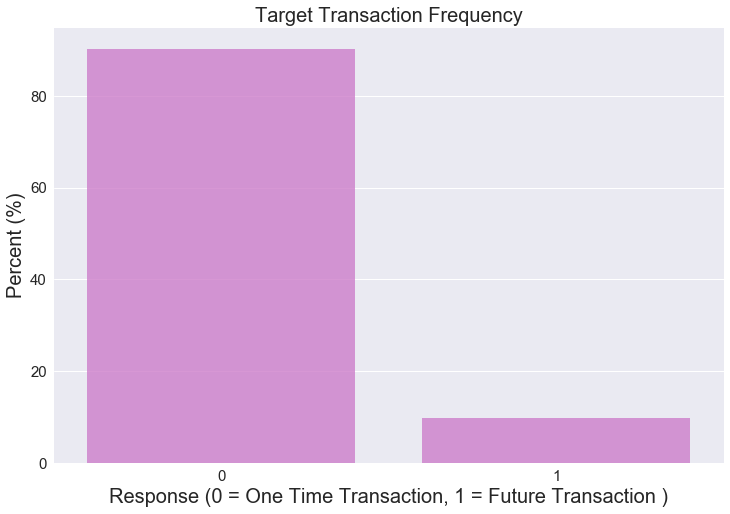

<Figure size 432x288 with 0 Axes>

In [11]:
# Finally, let's obtain a distribution of the 'target' varaible
target_freq = (data['target'].value_counts(normalize=True)*100)
display(target_freq);
foo= make_histogram(target_freq, title = 'Target Transaction Frequency', 
               xlab = 'Response (0 = One Time Transaction, 1 = Future Transaction )', 
               ylab = 'Percent (%)', x_rotate = 'horizontal', color='orchid')

plt.savefig('foo.png')

## Model Building & Selection

Before working with our data any further, we will split it into a train and test set to prevent the injection of subjective bias into the analysis and model.

In [12]:
# Train-test split of dataset

x = data.drop(['ID_code','target'], axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2019, stratify = y)

x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Undersampling the train set

train_data = pd.concat([x_train, y_train], axis=1).reset_index(drop=True)
num_purchases = len(train_data[train_data['target'] == 1])
non_purchase_indices = train_data[train_data['target'] == 0].index
np.random.seed(2019)
random_indices = np.random.choice(non_purchase_indices,num_purchases, replace=False)
purchase_indices = train_data[train_data['target'] == 1].index
under_sample_indices = np.concatenate([purchase_indices,random_indices])
data_us = train_data.loc[under_sample_indices]

x_train_us = data_us.drop(['target'], axis=1)
y_train_us = data_us['target']
x_test_us = x_test
y_test_us = y_test

# 

In [13]:
y_train_us.describe()

count    156.00000
mean       0.50000
std        0.50161
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000
Name: target, dtype: float64

In [14]:
%%time
# Asessing the performance of a random forest with default parameters

# Fitclassification_report(y_test,accuracy_score)ting the model
rfc_us = RandomForestClassifier(random_state=2019)
rfc_us.fit(x_train_us, y_train_us)
# Predicting test set results
predictions = rfc_us.predict(x_test_us)
# Evaluating model accuracy:
print(classification_report(y_test_us, predictions))
print("Accuracy: ",accuracy_score(y_test_us, predictions))
print("AUC: ",roc_auc_score(y_test_us, predictions))

             precision    recall  f1-score   support

          0       0.91      0.65      0.76       181
          1       0.11      0.42      0.18        19

avg / total       0.84      0.63      0.71       200

('Accuracy: ', 0.63)
('AUC: ', 0.5364931666182029)
CPU times: user 48.5 ms, sys: 6 µs, total: 48.5 ms
Wall time: 48 ms


# Add new variable/feature by creating iNNE model for anomaly detection: for future studies

In [15]:
# Data split with no undersampling

#x = data.drop(['ID_code','target'], axis=1)
#y = data['target']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2019, stratify = y)

#x_train = x_train.reset_index(drop=True)
#y_train = y_train.reset_index(drop=True)
#x_test = x_test.reset_index(drop=True)
#y_test =classification_report(y_test,accuracy_score) y_test.reset_index(drop=True)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
sc.fit(x_test)
x_test = sc.transform(x_test)
#sc.fit(y_train)
#y_train = sc.transform(y_train)
#sc.fit(y_test)
#y_test = sc.transform(y_test)


### Logistic Regression

In [17]:
%%time
# Asessing the performance of a logistic regression model with default parameters

# Fitting the model
lm = LogisticRegression(random_state = 2019)
lm.fit(x_train, y_train)
# Predicting test set results
predictions = lm.predict(x_test)
# Evaluating model accuracy:
print(classification_report(y_test, predictions))
print("Accuracy: ",accuracy_score(y_test, predictions))
print("AUC: ",roc_auc_score(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.89      0.90       181
          1       0.17      0.21      0.19        19

avg / total       0.84      0.82      0.83       200

('Accuracy: ', 0.825)
('AUC: ', 0.5500145391102066)
CPU times: user 56.4 ms, sys: 230 µs, total: 56.6 ms
Wall time: 52.2 ms


In [18]:
# A function that calculates the AUC for different combos of parameter values 

def test_param_combos(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, seed = 2019, model=None,
                     class_weight=None, decision_threshold=[0.5], C=[1.0]):
    
    ''' 
    For each parameter, please provide your value, or values, in the form of a list.
    Note that 'predictions' is based on the probability of an observation being class '1'; an obs. is determined
    to be '1' if the class probability is greater than the threshold and '0' otherwise. 
    '''
    
    if model == "lr":
        
        summary_df = pd.DataFrame(columns=['class_weight','decision_threshold','C','AUC'])
        i = 0
        
        for weight in class_weight:
            for thresh in decision_threshold:
                for c in tqdm(C):
                    lm = LogisticRegression(random_state = seed, C = c, class_weight = weight)
                    lm.fit(x_train, y_train)
                    predictions = [1 if x>thresh else 0 for x in lm.predict_proba(x_test)[:,1]]
                    auc = roc_auc_score(y_test, predictions)
                    #print("AUC {}: ".format(i),auc)

                    summary_df.loc[i] = [weight, thresh, c, auc]
                    i+= 1
                    
        return(summary_df)
    
    else:
        pass
        
        
# A function that builds a logistic regression model and calculates metrics for that model 

def lr_model(x_train, y_train, x_test, y_test, seed = 2019,
             class_weight=None, decision_threshold=0.5, C=1.0):
        
    lm = LogisticRegression(random_state = seed, C = C, class_weight = weight)
    lm.fit(x_train, y_train)
    
    if decision_threshold == 0.5:
        predictions = lm.predict(x_test)
    else:
        predictions = [1 if x>decision_threshold else 0 for x in lm.predict_proba(x_test)[:,1]]
    
    print(classification_report(y_test, predictions))
    print("Accuracy: ",accuracy_score(y_test, predictions))
    print("AUC: ",roc_auc_score(y_test, predictions))


In [19]:
%%time
lr_params = test_param_combos(model='lr', 
                              class_weight=[None,'balanced'], 
                              decision_threshold=[0.5, 0.6, 0.7, 0.8, 0.9], 
                              C=[0.001, 0.01, 0.1, 1, 10, 100])

100%|██████████| 6/6 [00:00<00:00, 18.33it/s]

CPU times: user 3.4 s, sys: 23.5 ms, total: 3.43 s
Wall time: 3.48 s


In [20]:
# Quick look at resulting dataframe
lr_params.head()

,class_weight,decision_threshold,C,AUC
0,NaN,0.5,0.001,0.491713
1,NaN,0.5,0.010,0.494475
2,NaN,0.5,0.100,0.554085
3,NaN,0.5,1.000,0.550015
4,NaN,0.5,10.000,0.536202


In [21]:
# Returning the parameters that resulted in the highest AUC 
lr_params.loc[lr_params['AUC'] == max(lr_params['AUC']),:]

,class_weight,decision_threshold,C,AUC
37,balanced,0.6,0.01,0.612387


In [22]:
# Fitting the model:

lm = LogisticRegression(random_state = 2019, class_weight='balanced', C=100)
lm.fit(x_train, y_train)

LogisticRegression(C=100, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=2019,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
# Predicting test set results:

#predictions = lm.predict(x_test)
predictions = [1 if x>0.5 else 0 for x in lm.predict_proba(x_test)[:,1]]

In [24]:
# Evaluating model via test set:

print(classification_report(y_test, predictions))
print("Accuracy: ",accuracy_score(y_test, predictions))
print("AUC: ",roc_auc_score(y_test, predictions))

             precision    recall  f1-score   support

          0       0.92      0.85      0.88       181
          1       0.15      0.26      0.19        19

avg / total       0.84      0.79      0.81       200

('Accuracy: ', 0.79)
('AUC: ', 0.5542308810700785)


In [25]:
#lr_model(x_train, y_train, x_test, y_test, seed = 2019, class_weight=None, decision_threshold=0.5, C=1.0)

### Random Forest

In [26]:
%%time
# Asessing the performance of a random forest with default parameters

# Fitting the model
rfc = RandomForestClassifier(random_state=2019)
rfc.fit(x_train, y_train)
# Predicting test set results
predictions = rfc.predict(x_test)
# Evaluating model accuracy:
print(classification_report(y_test, predictions))
print("Accuracy: ",accuracy_score(y_test, predictions))
print("AUC: ",roc_auc_score(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95       181
          1       0.00      0.00      0.00        19

avg / total       0.82      0.91      0.86       200

('Accuracy: ', 0.905)
('AUC: ', 0.5)
CPU times: user 164 ms, sys: 0 ns, total: 164 ms
Wall time: 181 ms


/home/crpbn/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
# Creating a grid of parmeter values to be optomized
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [],
               'max_features': [],
               'max_depth': [],
               'min_samples_split': [],
               'min_samples_leaf': [],
               'bootstrap': []}

In [28]:
%%time
# Hyperparameter optimization using random search

# Instantiate the random forest model 
rfc = RandomForestClassifier(random_state=2019, verbose=2)
# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all 
# available cores
rscv = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, 
                               random_state=2019, n_jobs = -1, scoring = 'roc_auc')
# Fit the model
rscv.fit(x_train, y_train)
# Return the parameters that resulted in the highest AUC
rscv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=70 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=70 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=70 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=31, min_samples_split=2, max_features=auto, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=31, min_samples_split=2, max_features=auto, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=31, min_samples_split=2, max_features=auto, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=110 
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 1 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 31
building tree 1 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 31
building tree 3 of 31
building tree 2 of 31
building tree 4 of 31
building tree 3 of 31
building tree 3 of 31
building tree 5 of 31
building tree 4 of 31
building tree 1 of 73
building tree 1 of 73
building tree 6 of 31
building tree 4 of 31
building tree 5 of 31
building tree 2 of 73
building tree 7 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 31
building tree 3 of 73
building tree 2 of 73
building tree 8 of 31
building tree 6 of 31
building tree 4 of 73
building tree 6 of 31
building tree 1 of 73
building tree 7 of 31
building tree 3 of 73
building tree 7 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 31
building tree 9 of 31
building tree 4 of 73
building tree 5 of 73
building tree 2 of 73
building tree 8 of 31
building tree 10 of 31
building tree 9 of 31
building tree 5 of 73
building tree 3 of 73
building tree 9 of 31
building tree 1 of 73
building tree 6 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 31
building tree 2 of 73
building tree 10 of 31
building tree 6 of 73
building tree 11 of 31
building tree 4 of 73
building tree 3 of 73
building tree 7 of 73
building tree 7 of 73
building tree 5 of 73
building tree 11 of 31
building tree 8 of 73
building tree 11 of 31
building tree 4 of 73
building tree 12 of 31
building tree 8 of 73
building tree 6 of 73
building tree 12 of 31
building tree 12 of 31
building tree 7 of 73
building tree 9 of 73
building tree 13 of 31
building tree 10 of 73
building tree 1 of 73
building tree 11 of 73
building tree 9 of 73
building tree 5 of 73
building tree 8 of 73
building tree 14 of 31
building tree 12 of 73
building tree 13 of 31
building tree 13 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 73
building tree 2 of 73
building tree 13 of 73
building tree 15 of 31
building tree 6 of 73
building tree 14 of 31
building tree 11 of 73
building tree 14 of 73
building tree 14 of 31
building tree 16 of 31
building tree 9 of 73
building tree 3 of 73
building tree 15 of 31
building tree 7 of 73
building tree 15 of 73
building tree 12 of 73
building tree 8 of 73
building tree 16 of 73
building tree 15 of 31
building tree 4 of 73
building tree 16 of 31
building tree 13 of 73
building tree 10 of 73
building tree 17 of 31
building tree 9 of 73
building tree 17 of 73
building tree 14 of 73
building tree 10 of 73
building tree 18 of 31
building tree 17 of 31
building tree 15 of 73
building tree 11 of 73
building tree 16 of 31
building tree 5 of 73
building tree 19 of 31
building tree 12 of 73
building tree 6 of 73
building tree 18 of 73
building tree 11 of 73
building tree 16 of 73
building tree 18 of 31
building tree 19 of 73
building tree 17 of 31
building tree 13 of 7

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.7s finished


building tree 31 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 30 of 73
building tree 21 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.7s finished


building tree 31 of 31
building tree 22 of 73
building tree 26 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.7s finished


building tree 31 of 73
building tree 32 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 23 of 73
building tree 35 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 36 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 32 of 73
building tree 33 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 27 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 33 of 73
building tree 24 of 73
building tree 37 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 34 of 73
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=31, min_samples_split=2, max_features=auto, max_depth=20, total=   1.0s
building tree 28 of 73
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 38 of 73
building tree 25 of 73
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=31, min_samples_split=2, max_features=auto, max_depth=20, total=   0.9s
building tree 29 of 73
building tree 39 of 73
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=90 


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 34 of 73
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=31, min_samples_split=2, max_features=auto, max_depth=20, total=   1.0s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=90 
building tree 35 of 73
building tree 40 of 73
building tree 26 of 73
building tree 30 of 73
building tree 41 of 73
building tree 27 of 73
building tree 31 of 73
building tree 36 of 73
building tree 35 of 73
building tree 28 of 73
building tree 36 of 73
building tree 42 of 73
building tree 37 of 73
building tree 29 of 73
building tree 37 of 73
building tree 32 of 73
building tree 43 of 73
building tree 33 of 73
building tree 44 of 73
building tree 38 of 73
building tree 30 of 73
building tree 38 of 73
building tree 45 of 73
building tree 34 of 73
building tree 39 of 73
building tree 31 of 73
building tree 35 of 73
building tree 46 of 73
building tree 39 of 73
building tree 40 of 73
building tree 41 of 73
building tree 40 of 73
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 54 of 73
building tree 64 of 73
building tree 51 of 73
building tree 2 of 73
building tree 45 of 73
building tree 55 of 73
building tree 65 of 73
building tree 52 of 73
building tree 3 of 73
building tree 46 of 73
building tree 58 of 73
building tree 4 of 73
building tree 66 of 73
building tree 56 of 73
building tree 59 of 73
building tree 47 of 73
building tree 1 of 94
building tree 67 of 73
building tree 5 of 73
building tree 48 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 60 of 73
building tree 53 of 73
building tree 57 of 73
building tree 6 of 73
building tree 68 of 73
building tree 49 of 73
building tree 61 of 73
building tree 2 of 94
building tree 58 of 73
building tree 59 of 73
building tree 62 of 73
building tree 7 of 73
building tree 69 of 73
building tree 54 of 73
building tree 1 of 94
building tree 50 of 73
building tree 3 of 94
building tree 63 of 73
building tree 70 of 73
building tree 51 of 73
building tree 60 of 73
building tree 64 of 73
building tree 55 of 73
building tree 65 of 73
building tree 61 of 73
building tree 4 of 94
building tree 52 of 73
building tree 8 of 73
building tree 66 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 62 of 73
building tree 2 of 94
building tree 71 of 73
building tree 53 of 73
building tree 56 of 73
building tree 5 of 94
building tree 54 of 73
building tree 9 of 73
building tree 72 of 73
building tree 63 of 73
building tree 57 of 73
building tree 3 of 94
building tree 55 of 73
building tree 67 of 73
building tree 58 of 73
building tree 10 of 73
building tree 6 of 94
building tree 68 of 73
building tree 73 of 73
building tree 4 of 94
building tree 11 of 73
building tree 59 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.3s finished


building tree 69 of 73
building tree 12 of 73
building tree 5 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 64 of 73
building tree 60 of 73
building tree 56 of 73
building tree 13 of 73
building tree 70 of 73
building tree 65 of 73
building tree 57 of 73
building tree 14 of 73
building tree 66 of 73
building tree 7 of 94
building tree 61 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 6 of 94
building tree 71 of 73
building tree 15 of 73
building tree 62 of 73
building tree 16 of 73
building tree 67 of 73
building tree 72 of 73
building tree 58 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 63 of 73
building tree 7 of 94
building tree 17 of 73
building tree 73 of 73
building tree 68 of 73
building tree 8 of 94
building tree 59 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 64 of 73
building tree 18 of 73
building tree 8 of 94
building tree 65 of 73
building tree 60 of 73
building tree 66 of 73
building tree 69 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 19 of 73
building tree 9 of 94
building tree 61 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 70 of 73
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=70, total=   1.8s
building tree 62 of 73
building tree 20 of 73
building tree 9 of 94
building tree 71 of 73
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=90 
building tree 63 of 73
building tree 67 of 73
building tree 21 of 73
building tree 10 of 94
building tree 72 of 73
building tree 10 of 94
building tree 68 of 73
building tree 73 of 73
building tree 64 of 73
building tree 11 of 94
building tree 22 of 73
building tree 65 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 66 of 73
building tree 69 of 73
building tree 11 of 94
building tree 12 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 23 of 73
building tree 13 of 94
building tree 67 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.1s finished


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=70, total=   1.9s
building tree 24 of 73
building tree 12 of 94
building tree 14 of 94
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=60 


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 68 of 73
building tree 13 of 94
building tree 70 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 25 of 73
building tree 69 of 73
building tree 14 of 94
building tree 70 of 73
building tree 71 of 73
building tree 15 of 94
building tree 26 of 73
building tree 15 of 94
building tree 71 of 73
building tree 16 of 94
building tree 16 of 94
building tree 72 of 73
building tree 27 of 73
building tree 17 of 94
building tree 72 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.1s finished


building tree 73 of 73
building tree 28 of 73
building tree 18 of 94
building tree 73 of 73
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=70, total=   1.9s


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.4s finished


building tree 17 of 94
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=60 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 19 of 94
building tree 29 of 73
building tree 18 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.6s finished


building tree 20 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 19 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 21 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 30 of 73
building tree 20 of 94
building tree 31 of 73
building tree 32 of 73
building tree 22 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.1s finished


building tree 21 of 94
building tree 33 of 73
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=110, total=   2.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=60 
building tree 34 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 22 of 94
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=110, total=   2.1s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=20 
building tree 23 of 94
building tree 35 of 73
building tree 23 of 94
building tree 36 of 73
building tree 24 of 94
building tree 37 of 73
building tree 24 of 94
building tree 38 of 73
building tree 25 of 94
building tree 39 of 73
building tree 25 of 94
building tree 26 of 94
building tree 26 of 94
building tree 27 of 94
building tree 40 of 73
building tree 28 of 94
building tree 29 of 94
building tree 41 of 73
building tree 27 of 94
building tree 30 of 94
building tree 31 of 94
building tree 28 of 94
building tree 42 of 73
building tree 29 of 94
building tree 43 of 73
building tree 30 of 94
building tree 44 of 73
building tree 32 of 94
building tree 1 of 94
building tree 31 of 94
building tree 45 of 73
building tree 32 of 94
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 33 of 94
building tree 46 of 73
building tree 34 of 94
building tree 2 of 94
building tree 47 of 73
building tree 35 of 94
building tree 36 of 94
building tree 3 of 94
building tree 48 of 73
building tree 34 of 94
building tree 4 of 94
building tree 49 of 73
building tree 37 of 94
building tree 38 of 94
building tree 35 of 94
building tree 5 of 94
building tree 36 of 94
building tree 50 of 73
building tree 6 of 94
building tree 51 of 73
building tree 7 of 94
building tree 39 of 94
building tree 52 of 73
building tree 37 of 94
building tree 40 of 94
building tree 53 of 73
building tree 8 of 94
building tree 41 of 94
building tree 38 of 94
building tree 54 of 73
building tree 9 of 94
building tree 39 of 94
building tree 55 of 73
building tree 42 of 94
building tree 56 of 73
building tree 10 of 94
building tree 40 of 94
building tree 43 of 94
building tree 11 of 94
building tree 41 of 94
building tree 1 of 94
building tree 57 of 73
building tree 12 of 94
building tree 58 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 45 of 94
building tree 42 of 94
building tree 2 of 94
building tree 13 of 94
building tree 59 of 73
building tree 46 of 94
building tree 43 of 94
building tree 14 of 94
building tree 3 of 94
building tree 47 of 94
building tree 60 of 73
building tree 15 of 94
building tree 4 of 94
building tree 44 of 94
building tree 61 of 73
building tree 48 of 94
building tree 16 of 94
building tree 45 of 94
building tree 62 of 73
building tree 5 of 94
building tree 46 of 94
building tree 49 of 94
building tree 17 of 94
building tree 47 of 94
building tree 63 of 73
building tree 48 of 94
building tree 18 of 94
building tree 50 of 94
building tree 64 of 73
building tree 6 of 94
building tree 51 of 94
building tree 49 of 94
building tree 50 of 94
building tree 19 of 94
building tree 7 of 94
building tree 52 of 94
building tree 65 of 73
building tree 66 of 73
building tree 20 of 94
building tree 51 of 94
building tree 52 of 94
building tree 53 of 94
building tree 8 of 94
building tree 21 o

[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.6s finished


building tree 12 of 94
building tree 58 of 94
building tree 26 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 59 of 94
building tree 1 of 200
building tree 1 of 200
building tree 27 of 94
building tree 13 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 59 of 94
building tree 60 of 94
building tree 28 of 94
building tree 14 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 60 of 94
building tree 61 of 94
building tree 29 of 94
building tree 2 of 200
building tree 2 of 200
building tree 61 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 15 of 94
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=110, total=   2.2s
building tree 3 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=20 
building tree 30 of 94
building tree 62 of 94
building tree 62 of 94
building tree 3 of 200
building tree 31 of 94
building tree 16 of 94
building tree 4 of 200
building tree 63 of 94
building tree 63 of 94
building tree 17 of 94
building tree 4 of 200
building tree 32 of 94
building tree 64 of 94
building tree 5 of 200
building tree 33 of 94
building tree 64 of 94
building tree 65 of 94
building tree 18 of 94
building tree 5 of 200
building tree 34 of 94
building tree 35 of 94
building tree 19 of 94
building tree 66 of 94
building tree 65 of 94
building tree 6 of 200
building tree 6 of 200
building tree 20 of 94
building tree 36 of 94
building tree 67 of 94
building tree 66 of 94
building tree 37 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 94
building tree 69 of 94
building tree 69 of 94
building tree 39 of 94
building tree 9 of 200
building tree 23 of 94
building tree 2 of 200
building tree 70 of 94
building tree 70 of 94
building tree 10 of 200
building tree 71 of 94
building tree 40 of 94
building tree 9 of 200
building tree 24 of 94
building tree 3 of 200
building tree 71 of 94
building tree 11 of 200
building tree 72 of 94
building tree 4 of 200
building tree 25 of 94
building tree 5 of 200
building tree 12 of 200
building tree 72 of 94
building tree 41 of 94
building tree 73 of 94
building tree 26 of 94
building tree 6 of 200
building tree 73 of 94
building tree 10 of 200
building tree 13 of 200
building tree 42 of 94
building tree 74 of 94
building tree 27 of 94
building tree 7 of 200
building tree 74 of 94
building tree 11 of 200
building tree 14 of 200
building tree 75 of 94
building tree 75 of 94
building tree 8 of 200
building tree 28 of 94
building tree 43 of 94
building tree 12 of 200
bui

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 21 of 200
building tree 84 of 94
building tree 17 of 200
building tree 15 of 200
building tree 52 of 94
building tree 2 of 94
building tree 85 of 94
building tree 85 of 94
building tree 34 of 94
building tree 22 of 200
building tree 53 of 94
building tree 86 of 94
building tree 3 of 94
building tree 16 of 200
building tree 35 of 94
building tree 54 of 94
building tree 86 of 94
building tree 23 of 200
building tree 18 of 200
building tree 87 of 94
building tree 4 of 94
building tree 55 of 94
building tree 36 of 94
building tree 17 of 200
building tree 88 of 94
building tree 19 of 200
building tree 5 of 94
building tree 87 of 94
building tree 37 of 94
building tree 18 of 200
building tree 20 of 200
building tree 56 of 94
building tree 89 of 94
building tree 24 of 200
building tree 88 of 94
building tree 38 of 94
building tree 19 of 200
building tree 90 of 94
building tree 89 of 94
building tree 57 of 94
building tree 21 of 200
building tree 25 of 200
building tree 6 of 94
b

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.5s finished


building tree 25 of 200
building tree 30 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 61 of 94
building tree 43 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 94
building tree 23 of 200
building tree 31 of 200
building tree 44 of 94
building tree 12 of 94
building tree 62 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 24 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 26 of 200
building tree 45 of 94
building tree 13 of 94
building tree 25 of 200
building tree 32 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 33 of 200
building tree 26 of 200
building tree 14 of 94
building tree 46 of 94
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=90, total=   3.1s
building tree 63 of 94
building tree 34 of 200
building tree 27 of 200
building tree 64 of 94
building tree 35 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=20 
building tree 15 of 94
building tree 36 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.1s finished


building tree 27 of 200
building tree 65 of 94
building tree 16 of 94
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=90, total=   3.1s
building tree 47 of 94
building tree 48 of 94
building tree 66 of 94
building tree 28 of 200
building tree 28 of 200
building tree 37 of 200
building tree 17 of 94
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 49 of 94
building tree 29 of 200
building tree 67 of 94
building tree 38 of 200
building tree 68 of 94
building tree 29 of 200
building tree 18 of 94
building tree 50 of 94
building tree 30 of 200
building tree 30 of 200
building tree 69 of 94
building tree 39 of 200
building tree 70 of 94
building tree 31 of 200
building tree 19 of 94
building tree 71 of 94
building tree 31 of 200
building tree 40 of 200
building tree 51 of 94
building tree 72 of 94
building tree 20 of 94
building tree 32 of 200
buildi

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 40 of 200
building tree 2 of 94
building tree 62 of 94
building tree 51 of 200
building tree 87 of 94
building tree 32 of 94
building tree 41 of 200
building tree 88 of 94
building tree 33 of 94
building tree 63 of 94
building tree 52 of 200
building tree 41 of 200
building tree 89 of 94
building tree 3 of 94
building tree 42 of 200
building tree 34 of 94
building tree 64 of 94
building tree 90 of 94
building tree 4 of 94
building tree 65 of 94
building tree 35 of 94
building tree 5 of 94
building tree 91 of 94
building tree 42 of 200
building tree 43 of 200
building tree 66 of 94
building tree 43 of 200
building tree 36 of 94
building tree 53 of 200
building tree 92 of 94
building tree 44 of 200
building tree 6 of 94
building tree 44 of 200
building tree 67 of 94
building tree 93 of 94
building tree 45 of 200
building tree 7 of 94
building tree 54 of 200
building tree 68 of 94
building tree 94 of 94
building tree 45 of 200
building tree 37 of 94
building tree 8 of 94
bui

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.5s finished


building tree 55 of 200
building tree 38 of 94
building tree 70 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 46 of 200
building tree 9 of 94
building tree 47 of 200
building tree 39 of 94
building tree 46 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 56 of 200
building tree 10 of 94
building tree 57 of 200
building tree 40 of 94
building tree 71 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 47 of 200
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=90, total=   3.1s
building tree 72 of 94
building tree 11 of 94
building tree 48 of 200
building tree 41 of 94
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 73 of 94
building tree 58 of 200
building tree 48 of 200
building tree 49 of 200
building tree 12 of 94
building tree 59 of 200
building tree 74 of 94
building tree 49 of 200
building tree 42 of 94
building tree 13 of 94
building tree 50 of 200
building tree 75 of 94
building tree 50 of 200
building tree 51 of 200
building tree 14 of 94
building tree 60 of 200
building tree 43 of 94
building tree 15 of 94
building tree 51 of 200
building tree 52 of 200
building tree 44 of 94
building tree 61 of 200
building tree 76 of 94
building tree 53 of 200
building tree 52 of 200
building tree 45 of 94
building tree 62 of 200
bui

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 69 of 200
building tree 62 of 200
building tree 52 of 94
building tree 2 of 200
building tree 23 of 94
building tree 83 of 94
building tree 63 of 200
building tree 61 of 200
building tree 53 of 94
building tree 3 of 200
building tree 70 of 200
building tree 4 of 200
building tree 24 of 94
building tree 84 of 94
building tree 54 of 94
building tree 62 of 200
building tree 64 of 200
building tree 71 of 200
building tree 25 of 94
building tree 5 of 200
building tree 63 of 200
building tree 55 of 94
building tree 72 of 200
building tree 85 of 94
building tree 65 of 200
building tree 56 of 94
building tree 64 of 200
building tree 6 of 200
building tree 26 of 94
building tree 86 of 94
building tree 73 of 200
building tree 7 of 200
building tree 66 of 200
building tree 57 of 94
building tree 27 of 94
building tree 8 of 200
building tree 87 of 94
building tree 65 of 200
building tree 74 of 200
building tree 67 of 200
building tree 28 of 94
building tree 9 of 200
building tree 58 

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    3.0s finished


building tree 65 of 94
building tree 36 of 94
building tree 17 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 73 of 200
building tree 82 of 200
building tree 18 of 200
building tree 76 of 200
building tree 37 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 74 of 200
building tree 66 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 38 of 94
building tree 83 of 200
building tree 19 of 200
building tree 77 of 200
building tree 75 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 20 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=20, total=   3.6s
building tree 67 of 94
building tree 39 of 94
building tree 21 of 200
building tree 84 of 200
building tree 78 of 200
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 40 of 94
building tree 68 of 94
building tree 22 of 200
building tree 79 of 200
building tree 76 of 200
building tree 41 of 94
building tree 23 of 200
building tree 80 of 200
building tree 69 of 94
building tree 77 of 200
building tree 85 of 200
building tree 42 of 94
building tree 24 of 200
building tree 78 of 200
building tree 43 of 94
building tree 86 of 200
building tree 70 of 94
building tree 44 of 94
building tree 81 of 200
building tree 87 of 200
building tree 25 of 200
building tree 79 of 200
building tree 88 of 200
building tree 71 of 94
building tree 26 of 200
building tree 89 of 200

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 73 of 94
building tree 2 of 200
building tree 84 of 200
building tree 47 of 94
building tree 81 of 200
building tree 28 of 200
building tree 91 of 200
building tree 85 of 200
building tree 48 of 94
building tree 74 of 94
building tree 29 of 200
building tree 3 of 200
building tree 92 of 200
building tree 86 of 200
building tree 82 of 200
building tree 75 of 94
building tree 49 of 94
building tree 30 of 200
building tree 4 of 200
building tree 93 of 200
building tree 87 of 200
building tree 83 of 200
building tree 31 of 200
building tree 50 of 94
building tree 32 of 200
building tree 76 of 94
building tree 5 of 200
building tree 84 of 200
building tree 88 of 200
building tree 94 of 200
building tree 33 of 200
building tree 51 of 94
building tree 89 of 200
building tree 6 of 200
building tree 34 of 200
building tree 77 of 94
building tree 52 of 94
building tree 7 of 200
building tree 90 of 200
building tree 35 of 200
building tree 95 of 200
building tree 85 of 200
building 

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.9s finished


building tree 26 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 102 of 200
building tree 52 of 200
building tree 115 of 200
building tree 106 of 200
building tree 27 of 200
building tree 71 of 94
building tree 116 of 200
building tree 53 of 200
building tree 28 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 72 of 94
building tree 29 of 200
building tree 107 of 200
building tree 54 of 200
building tree 117 of 200
building tree 30 of 200
building tree 55 of 200
building tree 73 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=20, total=   3.4s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=10 
building tree 118 of 200
building tree 108 of 200
building tree 56 of 200
building tree 103 of 200
building tree 74 of 94
building tree 31 of 200
building tree 57 of 200
building tree 109 of 200
building tree 104 of 200
building tree 119 of 200
building tree 75 of 94
building tree 58 of 200
building tree 32 of 200
building tree 110 of 200
building tree 33 of 200
building tree 1 of 10
building tree 105 of 200
building tree 120 of 200
building tree 59 of 200
building tree 111 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 34 of 200
building tree 121 of 200
building tree 76 of 94
building tree 2 of 10
building tree 60 of 200
building tree 61 of 200
building tree 112 of 200
building tree 1 of 200
building tree 3 of 10
building tree 106 of 200
building tree 77 of 94
building tree 35 of 200
building tree 4 of 10
building tree 122 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10
building tree 36 of 200
building tree 62 of 200
building tree 78 of 94
building tree 113 of 200
building tree 123 of 200
building tree 6 of 10
building tree 2 of 200
building tree 107 of 200
building tree 37 of 200
building tree 63 of 200
building tree 7 of 10
building tree 114 of 200
building tree 79 of 94
building tree 8 of 10
building tree 124 of 200
building tree 3 of 200
building tree 64 of 200
building tree 108 of 200
building tree 9 of 10
building tree 115 of 200
building tree 38 of 200
building tree 4 of 200
building tree 80 of 94
building tree 65 of 200
building tree 109 of 200
building tree 10 of 10
building tree 125 of 200
building tree 116 of 200
building tree 5 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 39 of 200
building tree 81 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 110 of 200
building tree 117 of 200
building tree 66 of 200
building tree 126 of 200
building tree 118 of 200
building tree 6 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 82 of 94


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 40 of 200
building tree 67 of 200
building tree 119 of 200
building tree 68 of 200
building tree 127 of 200
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=10, total=   0.2s
building tree 83 of 94
building tree 84 of 94
building tree 41 of 200
building tree 7 of 200
building tree 111 of 200
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=10 
building tree 120 of 200
building tree 69 of 200
building tree 112 of 200
building tree 128 of 200
building tree 42 of 200
building tree 8 of 200
building tree 70 of 200
building tree 85 of 94
building tree 121 of 200
building tree 43 of 200
building tree 129 of 200
building tree 113 of 200
building tree 71 of 200
building tree 9 of 200
building tree 44 of 200
building tree 130 of 200
building tree 72 of 200
building tree 122 of 200
building tree 86 of 94
building tree 114 of 200
building tree 10 of 200
building tre

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10
building tree 124 of 200
building tree 88 of 94
building tree 133 of 200
building tree 11 of 200
building tree 3 of 10
building tree 116 of 200
building tree 47 of 200
building tree 4 of 10
building tree 89 of 94
building tree 48 of 200
building tree 125 of 200
building tree 75 of 200
building tree 12 of 200
building tree 5 of 10
building tree 134 of 200
building tree 90 of 94
building tree 49 of 200
building tree 117 of 200
building tree 76 of 200
building tree 13 of 200
building tree 6 of 10
building tree 126 of 200
building tree 91 of 94
building tree 135 of 200
building tree 50 of 200
building tree 7 of 10
building tree 118 of 200
building tree 127 of 200
building tree 14 of 200
building tree 51 of 200
building tree 8 of 10
building tree 77 of 200
building tree 92 of 94
building tree 136 of 200
building tree 119 of 200
building tree 9 of 10
building tree 15 of 200
building tree 128 of 200
building tree 78 of 200
building tree 10 of 10
building tree 120 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 16 of 200
building tree 121 of 200
building tree 137 of 200
building tree 129 of 200
building tree 79 of 200
building tree 17 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 53 of 200
building tree 138 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 80 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 122 of 200
building tree 18 of 200
building tree 94 of 94
building tree 130 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 54 of 200
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=10, total=   0.3s


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.7s finished


[CV] bootstrap=True, min_samples_leaf=1, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=10 
building tree 123 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 81 of 200
building tree 55 of 200
building tree 139 of 200
building tree 131 of 200
building tree 124 of 200
building tree 82 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 125 of 200
building tree 19 of 200
building tree 56 of 200
building tree 140 of 200
building tree 132 of 200
building tree 1 of 10
building tree 141 of 200
building tree 20 of 200
building tree 126 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 57 of 200
building tree 83 of 200
building tree 2 of 10
building tree 133 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 142 of 200
building tree 21 of 200
building tree 84 of 200
building tree 127 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=20, total=   3.2s
building tree 58 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=80 
building tree 134 of 200
building tree 85 of 200
building tree 22 of 200
building tree 143 of 200
building tree 3 of 10
building tree 86 of 200
building tree 59 of 200
building tree 87 of 200
building tree 128 of 200
building tree 135 of 200
building tree 144 of 200
building tree 4 of 10
building tree 23 of 200
building tree 60 of 200
building tree 5 of 10
building tree 6 of 10
building tree 88 of 200
building tree 145 of 200
building tree 129 of 200
building tree 24 of 200
building tree 136 of 200
building tree 89 of 200
building tree 61 of 200
building tree 7 of 10
building tree 25 of 200
building tree 8 of 10
building tree 62 o

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 29 of 200
building tree 139 of 200
building tree 133 of 200
building tree 64 of 200
building tree 30 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 93 of 200
building tree 140 of 200
building tree 149 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 65 of 200
building tree 134 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=10, total=   0.3s
building tree 94 of 200
building tree 141 of 200
building tree 31 of 200
building tree 66 of 200
building tree 150 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=80 
building tree 95 of 200
building tree 135 of 200
building tree 67 of 200
building tree 142 of 200
building tree 32 of 200
building tree 1 of 52
building tree 136 of 200
building tree 96 of 200
building tree 68 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 151 of 200
building tree 33 of 200
building tree 137 of 200
building tree 143 of 200
building tree 97 of 200
building tree 2 of 52
building tree 3 of 52
building tree 144 of 200
building tree 138 of 200
building tree 98 of 200
building tree 4 of 52
building tree 69 of 200
building tree 145 of 200
building tree 34 of 200
building tree 139 of 200
building tree 99 of 200
building tree 152 of 200
building tree 153 of 200
building tree 146 of 200
building tree 140 of 200
building tree 100 of 200
building tree 5 of 52
building tree 70 of 200
building tree 35 of 200
building tree 6 of 52
building tree 154 of 200
building tree 147 of 200
building tree 7 of 52
building tree 101 of 200
building tree 141 of 200
building tree 36 of 200
building tree 148 of 200
building tree 155 of 200
building tree 71 of 200
building tree 8 of 52
building tree 102 of 200
building tree 142 of 200
building tree 149 of 200
building tree 37 of 200
building tree 72 of 200
building tree 156 of 200
building

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 41 of 200
building tree 2 of 52
building tree 145 of 200
building tree 151 of 200
building tree 14 of 52
building tree 160 of 200
building tree 3 of 52
building tree 76 of 200
building tree 107 of 200
building tree 15 of 52
building tree 146 of 200
building tree 4 of 52
building tree 42 of 200
building tree 152 of 200
building tree 108 of 200
building tree 147 of 200
building tree 77 of 200
building tree 43 of 200
building tree 5 of 52
building tree 161 of 200
building tree 153 of 200
building tree 16 of 52
building tree 109 of 200
building tree 17 of 52
building tree 148 of 200
building tree 44 of 200
building tree 6 of 52
building tree 162 of 200
building tree 78 of 200
building tree 154 of 200
building tree 18 of 52
building tree 110 of 200
building tree 155 of 200
building tree 45 of 200
building tree 163 of 200
building tree 7 of 52
building tree 149 of 200
building tree 79 of 200
building tree 19 of 52
building tree 8 of 52
building tree 111 of 200
building tree 9 o

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.0s finished


building tree 105 of 200
building tree 73 of 200
building tree 43 of 52
building tree 178 of 200
building tree 187 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 136 of 200
building tree 106 of 200
building tree 188 of 200
building tree 172 of 200
building tree 44 of 52
building tree 179 of 200
building tree 74 of 200
building tree 107 of 200
building tree 189 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 137 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 45 of 52
building tree 180 of 200
building tree 173 of 200
building tree 190 of 200
building tree 108 of 200
building tree 138 of 200
building tree 191 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 75 of 200
building tree 46 of 52
building tree 109 of 200
building tree 181 of 200
building tree 174 of 200
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=80, total=   1.3s
building tree 139 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=80 
building tree 47 of 52
building tree 76 of 200
building tree 192 of 200
building tree 110 of 200
building tree 48 of 52
building tree 77 of 200
building tree 111 of 200
building tree 140 of 200
building tree 182 of 200
building tree 193 of 200
building tree 49 of 52
building tree 175 of 200
building tree 50 of 52
building tree 112 of 200
building tree 183 of 200
building tree 194 of 200
building tree 78 of 200
building tree 51 of 52
building tree 141 of 200
building tree 184 of 200
building tree 176 of 200
building tree 79 of 200
building tree 195 of 200
building tree 113 of 200
building tree 52 of 52
build

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.0s finished


building tree 198 of 200
building tree 115 of 200
building tree 178 of 200
building tree 143 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 186 of 200
building tree 144 of 200
building tree 116 of 200
building tree 199 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 82 of 200
building tree 145 of 200
building tree 187 of 200
building tree 83 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 179 of 200
building tree 146 of 200
building tree 117 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 200 of 200
building tree 84 of 200
building tree 188 of 200
building tree 180 of 200
building tree 85 of 200
building tree 147 of 200
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=80, total=   1.3s
building tree 118 of 200
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=100 
building tree 181 of 200
building tree 86 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.9s finished


building tree 189 of 200
building tree 87 of 200
building tree 148 of 200
building tree 1 of 52
building tree 119 of 200
building tree 88 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 190 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 182 of 200
building tree 2 of 52
building tree 149 of 200
building tree 183 of 200
building tree 3 of 52
building tree 120 of 200
building tree 89 of 200
building tree 191 of 200
building tree 150 of 200
building tree 4 of 52
building tree 90 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 121 of 200
building tree 192 of 200
building tree 184 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 52
building tree 193 of 200
building tree 151 of 200
building tree 185 of 200
building tree 91 of 200
building tree 194 of 200
building tree 122 of 200
building tree 6 of 52
building tree 92 of 200
building tree 7 of 52


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 152 of 200
building tree 123 of 200
building tree 8 of 52
building tree 186 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=60, total=   7.1s
building tree 195 of 200
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=100 
building tree 124 of 200
building tree 187 of 200
building tree 153 of 200
building tree 9 of 52
building tree 125 of 200
building tree 188 of 200
building tree 196 of 200
building tree 10 of 52
building tree 93 of 200
building tree 154 of 200
building tree 126 of 200
building tree 94 of 200
building tree 189 of 200
building tree 11 of 52
building tree 95 of 200
building tree 155 of 200
building tree 127 of 200
building tree 190 of 200
building tree 156 of 200
building tree 96 of 200
building tree 12 of 52
building tree 197 of 200
building tree 157 of 200
building tree 128 of 200
building tree 191 of 200
building tree 13 of 52


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.0s finished


building tree 133 of 200
building tree 163 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 101 of 200
building tree 20 of 52
building tree 197 of 200
building tree 164 of 200
building tree 102 of 200
building tree 21 of 52


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


building tree 134 of 200
building tree 198 of 200
building tree 165 of 200
building tree 22 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 103 of 200
building tree 135 of 200
building tree 23 of 52
building tree 166 of 200
building tree 24 of 52
building tree 199 of 200
building tree 104 of 200
building tree 167 of 200
building tree 105 of 200
building tree 200 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 136 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=60, total=   7.3s
building tree 168 of 200
building tree 106 of 200
building tree 137 of 200
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=100 
building tree 25 of 52
building tree 169 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 107 of 200
building tree 26 of 52
building tree 138 of 200
building tree 108 of 200
building tree 27 of 52
building tree 170 of 200
building tree 139 of 200
building tree 28 of 52


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 29 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 109 of 200
building tree 171 of 200
building tree 172 of 200
building tree 140 of 200
building tree 110 of 200
building tree 30 of 52
building tree 31 of 52
building tree 141 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=60, total=   7.8s
building tree 173 of 200
building tree 32 of 52
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=5, max_features=sqrt, max_depth=90 
building tree 111 of 200
building tree 33 of 52
building tree 142 of 200
building tree 174 of 200
building tree 112 of 200
building tree 34 of 52
building tree 143 of 200
building tree 175 of 200
building tree 113 of 200
building tree 1 of 10
building tree 35 of 52
building tree 176 of 200
building tree 144 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 114 of 200
building tree 2 of 10
building tree 3 of 10
building tree 36 of 52
building tree 145 of 200
building tree 115 of 200
building tree 177 of 200
building tree 37 of 52
building tree 146 of 200
building tree 4 of 10
building tree 178 of 200
building tree 38 of 52
building tree 5 of 10
building tree 116 of 200
building tree 179 of 200
building tree 6 of 10
building tree 147 of 200
building tree 7 of 10
building tree 148 of 200
building tree 39 of 52
building tree 180 of 200
building tree 117 of 200
building tree 8 of 10
building tree 40 of 52
building tree 9 of 10
building tree 149 of 200
building tree 41 of 52
building tree 118 of 200
building tree 42 of 52
building tree 10 of 10
building tree 181 of 200
building tree 43 of 52
building tree 150 of 200
building tree 44 of 52
building tree 182 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 119 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 45 of 52
building tree 151 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 152 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 120 of 200
building tree 183 of 200
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=5, max_features=sqrt, max_depth=90, total=   0.3s
building tree 46 of 52
building tree 184 of 200
building tree 121 of 200
building tree 1 of 200
building tree 153 of 200
building tree 47 of 52
building tree 185 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=5, max_features=sqrt, max_depth=90 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 154 of 200
building tree 2 of 200
building tree 48 of 52
building tree 3 of 200
building tree 49 of 52
building tree 4 of 200
building tree 186 of 200
building tree 5 of 200
building tree 6 of 200
building tree 50 of 52
building tree 122 of 200
building tree 155 of 200
building tree 1 of 10
building tree 7 of 200
building tree 187 of 200
building tree 123 of 200
building tree 51 of 52
building tree 156 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 188 of 200
building tree 8 of 200
building tree 2 of 10
building tree 157 of 200
building tree 52 of 52
building tree 9 of 200
building tree 189 of 200
building tree 158 of 200
building tree 3 of 10


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.1s finished


building tree 124 of 200
building tree 10 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 200
building tree 4 of 10
building tree 159 of 200
building tree 12 of 200
building tree 190 of 200
building tree 125 of 200
building tree 5 of 10
building tree 160 of 200
building tree 6 of 10


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 161 of 200
building tree 191 of 200
building tree 126 of 200
building tree 13 of 200
building tree 7 of 10


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 14 of 200
building tree 192 of 200
building tree 8 of 10
building tree 1 of 200
building tree 15 of 200
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=80, total=   1.4s
building tree 16 of 200
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 162 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=5, max_features=sqrt, max_depth=90 
building tree 193 of 200
building tree 2 of 200
building tree 10 of 10
building tree 3 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 163 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 127 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=5, max_features=sqrt, max_depth=90, total=   0.2s
building tree 194 of 200
building tree 17 of 200
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=100 
building tree 164 of 200
building tree 18 of 200
building tree 195 of 200
building tree 5 of 200
building tree 165 of 200
building tree 19 of 200
building tree 128 of 200
building tree 166 of 200
building tree 1 of 10
building tree 6 of 200
building tree 20 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 21 of 200
building tree 129 of 200
building tree 196 of 200
building tree 7 of 200
building tree 2 of 10
building tree 22 of 200
building tree 197 of 200
building tree 130 of 200
building tree 167 of 200
building tree 8 of 200
building tree 3 of 10
building tree 23 of 200
building tree 9 of 200
building tree 198 of 200
building tree 24 of 200
building tree 168 of 200
building tree 4 of 10
building tree 10 of 200
building tree 131 of 200
building tree 25 of 200
building tree 11 of 200
building tree 26 of 200
building tree 169 of 200
building tree 12 of 200
building tree 132 of 200
building tree 27 of 200
building tree 170 of 200
building tree 5 of 10
building tree 13 of 200
building tree 199 of 200
building tree 133 of 200


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.4s


building tree 14 of 200
building tree 171 of 200
building tree 6 of 10
building tree 15 of 200
building tree 28 of 200
building tree 7 of 10
building tree 200 of 200
building tree 16 of 200
building tree 134 of 200
building tree 29 of 200
building tree 172 of 200
building tree 17 of 200
building tree 8 of 10
building tree 135 of 200
building tree 18 of 200
building tree 30 of 200
building tree 9 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 19 of 200
building tree 31 of 200
building tree 20 of 200
building tree 173 of 200
building tree 136 of 200
building tree 21 of 200
building tree 32 of 200
building tree 10 of 10
building tree 137 of 200
building tree 22 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


building tree 33 of 200
building tree 174 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 23 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 175 of 200
building tree 24 of 200
building tree 2 of 200
building tree 34 of 200
building tree 138 of 200
building tree 35 of 200
building tree 25 of 200
building tree 3 of 200
building tree 139 of 200
building tree 4 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 176 of 200
building tree 36 of 200
building tree 177 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 26 of 200
building tree 5 of 200
building tree 37 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 140 of 200
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=5, max_features=sqrt, max_depth=90, total=   0.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=100 
building tree 27 of 200
building tree 28 of 200
building tree 38 of 200
building tree 141 of 200
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=100, total=   6.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=100 
building tree 178 of 200
building tree 6 of 200
building tree 29 of 200
building tree 39 of 200
building tree 179 of 200
building tree 30 of 200
building tree 142 of 200
building tree 40 of 200
building tree 180 of 200
building tree 31 of 200
building tree 32 of 200
building tree 7 of 200
building tree 33 of 200
building tree 143 of 200
building tree 41 of 200
building tree 34 of 200
build

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 60 of 200
building tree 2 of 157
building tree 29 of 200
building tree 158 of 200
building tree 195 of 200
building tree 54 of 200
building tree 30 of 200
building tree 61 of 200
building tree 159 of 200
building tree 55 of 200
building tree 31 of 200
building tree 196 of 200
building tree 3 of 157
building tree 32 of 200
building tree 33 of 200
building tree 56 of 200
building tree 62 of 200
building tree 197 of 200
building tree 4 of 157
building tree 34 of 200
building tree 160 of 200
building tree 57 of 200
building tree 63 of 200
building tree 58 of 200
building tree 198 of 200
building tree 5 of 157
building tree 35 of 200
building tree 6 of 157
building tree 36 of 200
building tree 59 of 200
building tree 161 of 200
building tree 64 of 200
building tree 199 of 200
building tree 60 of 200
building tree 162 of 200
building tree 65 of 200
building tree 7 of 157
building tree 37 of 200
building tree 61 of 200
building tree 200 of 200
building tree 66 of 200
building tr

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 63 of 200
building tree 39 of 200
building tree 67 of 200
building tree 68 of 200
building tree 164 of 200
building tree 40 of 200
building tree 69 of 200
building tree 64 of 200
building tree 70 of 200
building tree 9 of 157
building tree 165 of 200
building tree 10 of 157
building tree 41 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 65 of 200
building tree 166 of 200
building tree 71 of 200
building tree 11 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 66 of 200
building tree 72 of 200
building tree 12 of 157
building tree 42 of 200
building tree 13 of 157
building tree 167 of 200
building tree 67 of 200
building tree 43 of 200
building tree 73 of 200
building tree 14 of 157
building tree 74 of 200
building tree 68 of 200
building tree 69 of 200
building tree 15 of 157
building tree 44 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 168 of 200
building tree 70 of 200
building tree 45 of 200
building tree 75 of 200
building tree 16 of 157
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=100, total=   6.3s
building tree 169 of 200
building tree 71 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=70 
building tree 46 of 200
building tree 1 of 157
building tree 76 of 200
building tree 72 of 200
building tree 170 of 200
building tree 47 of 200
building tree 17 of 157
building tree 1 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 157
building tree 2 of 157
building tree 48 of 200
building tree 73 of 200
building tree 171 of 200
building tree 77 of 200
building tree 3 of 157
building tree 49 of 200
building tree 18 of 157
building tree 74 of 200
building tree 3 of 157
building tree 4 of 157
building tree 172 of 200
building tree 78 of 200
building tree 50 of 200
building tree 4 of 157
building tree 75 of 200
building tree 5 of 157
building tree 79 of 200
building tree 51 of 200
building tree 76 of 200
building tree 19 of 157
building tree 5 of 157
building tree 173 of 200
building tree 80 of 200
building tree 20 of 157
building tree 6 of 157
building tree 6 of 157
building tree 52 of 200
building tree 7 of 157
building tree 77 of 200
building tree 21 of 157
building tree 81 of 200
building tree 53 of 200
building tree 22 of 157
building tree 82 of 200
building tree 8 of 157
building tree 174 of 200
building tree 9 of 157
building tree 7 of 157
building tree 78 of 200
building tree 83 of 200
bu

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.4s finished


building tree 56 of 157
building tree 128 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 121 of 200
building tree 54 of 157
building tree 68 of 157
building tree 55 of 157
building tree 100 of 200
building tree 57 of 157
building tree 69 of 157
building tree 58 of 157
building tree 129 of 200
building tree 56 of 157
building tree 122 of 200
building tree 101 of 200
building tree 123 of 200
building tree 59 of 157
building tree 130 of 200
building tree 57 of 157
building tree 70 of 157
building tree 124 of 200
building tree 60 of 157


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 131 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 58 of 157
building tree 71 of 157
building tree 102 of 200
building tree 132 of 200
building tree 61 of 157
building tree 125 of 200
building tree 103 of 200
building tree 72 of 157
building tree 62 of 157
building tree 59 of 157
building tree 73 of 157
building tree 126 of 200
building tree 104 of 200
building tree 63 of 157
building tree 60 of 157
building tree 133 of 200
building tree 74 of 157
building tree 127 of 200
building tree 1 of 200
building tree 61 of 157
building tree 105 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 64 of 157
building tree 75 of 157
building tree 134 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 62 of 157
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=100, total=   6.5s
building tree 2 of 200
building tree 128 of 200
building tree 106 of 200
building tree 65 of 157
building tree 63 of 157
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=70 
building tree 3 of 200
building tree 135 of 200
building tree 136 of 200
building tree 66 of 157
building tree 76 of 157
building tree 4 of 200
building tree 129 of 200
building tree 107 of 200
building tree 137 of 200
building tree 130 of 200
building tree 67 of 157
building tree 77 of 157
building tree 64 of 157
building tree 5 of 200
building tree 108 of 200
building tree 131 of 200
building tree 65 of 157
building tree 132 of 200
building tree 138 of 200
building tree 78 of 157
building tree 68 of 157
building tree 6 of 200
building tree 66 of 157
building tree 139 of 200
building tree 109 of 200
bui

building tree 185 of 200
building tree 107 of 157
building tree 116 of 157
building tree 186 of 200
building tree 43 of 200
building tree 125 of 157
building tree 174 of 200
building tree 148 of 200
building tree 126 of 157
building tree 108 of 157
building tree 187 of 200
building tree 175 of 200
building tree 149 of 200
building tree 176 of 200
building tree 109 of 157
building tree 117 of 157
building tree 127 of 157
building tree 44 of 200
building tree 177 of 200
building tree 188 of 200
building tree 150 of 200
building tree 128 of 157
building tree 118 of 157
building tree 45 of 200
building tree 110 of 157
building tree 151 of 200
building tree 119 of 157
building tree 189 of 200
building tree 111 of 157
building tree 178 of 200
building tree 46 of 200
building tree 152 of 200
building tree 153 of 200
building tree 129 of 157
building tree 190 of 200
building tree 120 of 157
building tree 47 of 200
building tree 112 of 157
building tree 191 of 200
building tree 121 of 157
build

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 56 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.4s finished


building tree 188 of 200
building tree 2 of 200
building tree 128 of 157
building tree 124 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 57 of 200
building tree 140 of 157
building tree 189 of 200
building tree 125 of 157
building tree 129 of 157
building tree 163 of 200
building tree 3 of 200
building tree 58 of 200
building tree 190 of 200
building tree 130 of 157
building tree 141 of 157
building tree 126 of 157
building tree 142 of 157
building tree 164 of 200
building tree 191 of 200
building tree 131 of 157
building tree 4 of 200
building tree 192 of 200
building tree 59 of 200
building tree 127 of 157
building tree 5 of 200
building tree 143 of 157
building tree 132 of 157
building tree 165 of 200
building tree 193 of 200
building tree 6 of 200
building tree 128 of 157


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 144 of 157
building tree 194 of 200
building tree 7 of 200
building tree 195 of 200
building tree 133 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 196 of 200
building tree 145 of 157
building tree 166 of 200
building tree 60 of 200
building tree 134 of 157
building tree 129 of 157
building tree 146 of 157
building tree 135 of 157
building tree 197 of 200
building tree 61 of 200
building tree 8 of 200
building tree 147 of 157
building tree 167 of 200
building tree 136 of 157
building tree 148 of 157
building tree 9 of 200
building tree 198 of 200
building tree 130 of 157
building tree 137 of 157
building tree 62 of 200
building tree 10 of 200
building tree 149 of 157
building tree 168 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


building tree 199 of 200
building tree 131 of 157
building tree 138 of 157
building tree 150 of 157
building tree 63 of 200
building tree 151 of 157
building tree 139 of 157
building tree 11 of 200
building tree 200 of 200
building tree 169 of 200
building tree 152 of 157
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=100, total=   4.4s
building tree 140 of 157
building tree 64 of 200
building tree 153 of 157
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=70 


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 12 of 200
building tree 65 of 200
building tree 141 of 157
building tree 132 of 157
building tree 154 of 157
building tree 133 of 157
building tree 170 of 200
building tree 13 of 200
building tree 66 of 200
building tree 142 of 157
building tree 155 of 157
building tree 171 of 200
building tree 67 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


building tree 134 of 157
building tree 143 of 157
building tree 172 of 200
building tree 156 of 157
building tree 14 of 200
building tree 68 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 144 of 157
building tree 135 of 157
building tree 15 of 200
building tree 69 of 200
building tree 145 of 157
building tree 173 of 200
building tree 136 of 157
building tree 16 of 200
building tree 157 of 157
building tree 146 of 157
building tree 17 of 200
building tree 70 of 200


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    2.6s finished


building tree 147 of 157
building tree 174 of 200
building tree 137 of 157
building tree 18 of 200
building tree 71 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 175 of 200
building tree 148 of 157
building tree 19 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 176 of 200
building tree 138 of 157
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=100, total=   4.4s
building tree 72 of 200
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=94, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 139 of 157
building tree 20 of 200
building tree 73 of 200
building tree 140 of 157
building tree 149 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 74 of 200
building tree 177 of 200
building tree 150 of 157
building tree 141 of 157
building tree 178 of 200
building tree 142 of 157
building tree 75 of 200
building tree 21 of 200
building tree 143 of 157
building tree 179 of 200
building tree 180 of 200
building tree 144 of 157
building tree 151 of 157
building tree 76 of 200
building tree 181 of 200
building tree 152 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=100, total=   3.4s
building tree 145 of 157
building tree 22 of 200
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=94, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 77 of 200
building tree 153 of 157
building tree 23 of 200
building tree 146 of 157
building tree 182 of 200
building tree 154 of 157
building tree 78 of 200
building tree 24 of 200
building tree 79 of 200
building tree 155 of 157
building tree 147 of 157
building tree 183 of 200
building tree 156 of 157
building tree 80 of 200
building tree 184 of 200
building tree 148 of 157
building tree 81 of 200
building tree 149 of 157
building tree 157 of 157
building tree 185 of 200
building tree 186 of 200


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    2.4s finished


building tree 25 of 200
building tree 26 of 200
building tree 150 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 27 of 200
building tree 187 of 200
building tree 151 of 157
building tree 82 of 200
building tree 188 of 200
building tree 152 of 157
building tree 28 of 200
building tree 83 of 200
building tree 153 of 157
building tree 189 of 200


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 29 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 154 of 157
building tree 84 of 200
building tree 155 of 157
building tree 190 of 200
building tree 85 of 200
building tree 30 of 200
building tree 191 of 200


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=100, total=   3.3s
building tree 156 of 157
building tree 31 of 200
building tree 86 of 200
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=94, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 192 of 200
building tree 157 of 157
building tree 32 of 200
building tree 87 of 200
building tree 193 of 200
building tree 88 of 200


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    2.6s finished


building tree 33 of 200
building tree 194 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 34 of 200
building tree 89 of 200
building tree 35 of 200
building tree 195 of 200
building tree 90 of 200
building tree 36 of 200
building tree 91 of 200


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 196 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 197 of 200
building tree 37 of 200
building tree 92 of 200
building tree 198 of 200
building tree 199 of 200
building tree 38 of 200
building tree 93 of 200


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 200 of 200
building tree 39 of 200
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=100, total=   3.4s
building tree 94 of 200
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=2, max_features=auto, max_depth=20 
building tree 40 of 200
building tree 95 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.6s finished


building tree 41 of 200
building tree 96 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 42 of 200
building tree 97 of 200
building tree 43 of 200
building tree 1 of 94
building tree 98 of 200
building tree 44 of 200
building tree 99 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 94
building tree 45 of 200
building tree 100 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 94
building tree 46 of 200
building tree 3 of 94
building tree 4 of 94
building tree 101 of 200
building tree 47 of 200
building tree 3 of 94
building tree 5 of 94
building tree 48 of 200
building tree 4 of 94


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 102 of 200
building tree 6 of 94
building tree 49 of 200
building tree 5 of 94
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=100, total=   4.7s
building tree 7 of 94
building tree 50 of 200
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=2, max_features=auto, max_depth=20 
building tree 8 of 94
building tree 51 of 200
building tree 9 of 94
building tree 103 of 200
building tree 6 of 94
building tree 10 of 94
building tree 104 of 200
building tree 52 of 200
building tree 7 of 94
building tree 105 of 200
building tree 11 of 94
building tree 12 of 94
building tree 8 of 94
building tree 53 of 200
building tree 9 of 94
building tree 13 of 94
building tree 106 of 200
building tree 54 of 200
building tree 10 of 94
building tree 11 of 94
building tree 14 of 94
building tree 55 of 200
building tree 107 of 200
building tree 15 of 94
building tree 108 of 200
building tree 16 of 94
building t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 110 of 200
building tree 17 of 94
building tree 58 of 200
building tree 111 of 200
building tree 59 of 200
building tree 2 of 94
building tree 14 of 94
building tree 18 of 94
building tree 60 of 200
building tree 1 of 73
building tree 15 of 94
building tree 112 of 200
building tree 3 of 94
building tree 19 of 94
building tree 16 of 94
building tree 4 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 61 of 200
building tree 2 of 73
building tree 20 of 94
building tree 113 of 200
building tree 5 of 94
building tree 17 of 94
building tree 62 of 200
building tree 21 of 94
building tree 6 of 94
building tree 114 of 200
building tree 63 of 200
building tree 115 of 200
building tree 18 of 94
building tree 1 of 200
building tree 22 of 94
building tree 19 of 94
building tree 3 of 73
building tree 116 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 94
building tree 2 of 200
building tree 20 of 94
building tree 23 of 94
building tree 64 of 200
building tree 8 of 94
building tree 4 of 73
building tree 9 of 94
building tree 24 of 94
building tree 10 of 94
building tree 21 of 94
building tree 11 of 94
building tree 117 of 200
building tree 5 of 73
building tree 3 of 200
building tree 25 of 94
building tree 65 of 200
building tree 22 of 94
building tree 12 of 94
building tree 118 of 200
building tree 13 of 94
building tree 66 of 200
building tree 4 of 200
building tree 23 of 94
building tree 119 of 200
building tree 26 of 94
building tree 27 of 94
building tree 14 of 94
building tree 6 of 73
building tree 24 of 94
building tree 67 of 200
building tree 5 of 200
building tree 28 of 94
building tree 25 of 94
building tree 68 of 200
building tree 6 of 200
building tree 26 of 94
building tree 15 of 94
building tree 120 of 200
building tree 7 of 200
building tree 69 of 200
building tree 29 of 94
building tree 27 of 94
bui

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 122 of 200
building tree 32 of 94
building tree 2 of 73
building tree 12 of 200
building tree 10 of 73
building tree 123 of 200
building tree 13 of 200
building tree 31 of 94
building tree 33 of 94
building tree 11 of 73
building tree 18 of 94
building tree 73 of 200
building tree 32 of 94
building tree 34 of 94
building tree 14 of 200
building tree 35 of 94
building tree 3 of 73
building tree 124 of 200
building tree 19 of 94
building tree 74 of 200
building tree 33 of 94
building tree 12 of 73
building tree 15 of 200
building tree 34 of 94
building tree 4 of 73
building tree 125 of 200
building tree 20 of 94
building tree 36 of 94
building tree 5 of 73
building tree 13 of 73
building tree 75 of 200
building tree 16 of 200
building tree 35 of 94
building tree 126 of 200
building tree 21 of 94
building tree 37 of 94
building tree 36 of 94
building tree 127 of 200
building tree 6 of 73
building tree 22 of 94
building tree 14 of 73
building tree 17 of 200
building tree 76 o

building tree 172 of 200
building tree 42 of 73
building tree 63 of 94
building tree 112 of 200
building tree 83 of 94
building tree 82 of 94
building tree 84 of 94
building tree 42 of 73
building tree 53 of 200
building tree 83 of 94
building tree 113 of 200
building tree 173 of 200
building tree 43 of 73
building tree 43 of 73
building tree 64 of 94
building tree 54 of 200
building tree 114 of 200
building tree 85 of 94
building tree 174 of 200
building tree 84 of 94
building tree 65 of 94
building tree 44 of 73
building tree 115 of 200
building tree 85 of 94
building tree 55 of 200
building tree 44 of 73
building tree 175 of 200
building tree 86 of 94
building tree 116 of 200
building tree 45 of 73
building tree 87 of 94
building tree 86 of 94
building tree 66 of 94
building tree 176 of 200
building tree 45 of 73
building tree 117 of 200
building tree 56 of 200
building tree 88 of 94
building tree 118 of 200
building tree 177 of 200
building tree 87 of 94
building tree 46 of 73
buil

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 51 of 73
building tree 184 of 200
building tree 64 of 200
building tree 94 of 94
building tree 123 of 200
building tree 65 of 200
building tree 73 of 94
building tree 51 of 73


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 74 of 94
building tree 124 of 200
building tree 185 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    1.5s finished


building tree 66 of 200
building tree 52 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 125 of 200
building tree 75 of 94
building tree 186 of 200
building tree 67 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 76 of 94
building tree 68 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 187 of 200
building tree 77 of 94
building tree 52 of 73
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=94, min_samples_split=10, max_features=sqrt, max_depth=100, total=   2.0s
building tree 53 of 73
building tree 126 of 200
building tree 78 of 94
building tree 188 of 200
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=2, max_features=auto, max_depth=20 
building tree 69 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 79 of 94
building tree 127 of 200
building tree 189 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 53 of 73
building tree 80 of 94
building tree 128 of 200
building tree 54 of 73
building tree 70 of 200
building tree 190 of 200
building tree 129 of 200
building tree 54 of 73
building tree 81 of 94
building tree 130 of 200
building tree 71 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 55 of 73
building tree 82 of 94
building tree 191 of 200
building tree 55 of 73
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=94, min_samples_split=10, max_features=sqrt, max_depth=100, total=   2.1s
building tree 131 of 200
building tree 192 of 200
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=5, max_features=auto, max_depth=80 
building tree 56 of 73
building tree 72 of 200
building tree 83 of 94
building tree 193 of 200
building tree 57 of 73
building tree 132 of 200
building tree 56 of 73
building tree 73 of 200
building tree 133 of 200
building tree 84 of 94
building tree 74 of 200
building tree 58 of 73
building tree 134 of 200
building tree 75 of 200
building tree 57 of 73
building tree 194 of 200
building tree 58 of 73
building tree 76 of 200
building tree 59 of 73
building tree 85 of 94
building tree 195 of 200
building tree 135 of 200
building tree 77 of 200
building tree 86 of 94
building tree 60 of 73
building tree 136 o

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.7s finished


building tree 68 of 73
building tree 143 of 200
building tree 65 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 93 of 94
building tree 84 of 200
building tree 69 of 73
building tree 66 of 73
building tree 94 of 94
building tree 144 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    1.6s finished


building tree 70 of 73
building tree 85 of 200
building tree 67 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 86 of 200
building tree 145 of 200
building tree 71 of 73


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 146 of 200
building tree 87 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 72 of 73
building tree 68 of 73
building tree 147 of 200
building tree 88 of 200
building tree 73 of 73
building tree 89 of 200
building tree 148 of 200
building tree 69 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.4s finished


building tree 149 of 200
building tree 90 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.1s finished


building tree 1 of 52
building tree 91 of 200
building tree 150 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 70 of 73


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 2 of 52
building tree 92 of 200
building tree 151 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=70, total=   4.8s
building tree 93 of 200


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 71 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 73
building tree 94 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 3 of 52
building tree 152 of 200
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=5, max_features=auto, max_depth=80 
building tree 72 of 73
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=94, min_samples_split=10, max_features=sqrt, max_depth=100, total=   2.2s
building tree 95 of 200


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=2, max_features=auto, max_depth=20, total=   1.9s
building tree 4 of 52
building tree 96 of 200
building tree 73 of 73
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=5, max_features=auto, max_depth=80 
building tree 153 of 200
building tree 97 of 200
building tree 2 of 73
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=20 
building tree 154 of 200
building tree 5 of 52
building tree 3 of 73
building tree 155 of 200
building tree 4 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.7s finished


building tree 156 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 52
building tree 98 of 200
building tree 1 of 10


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 157 of 200
building tree 7 of 52
building tree 5 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 158 of 200
building tree 159 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10
building tree 99 of 200
building tree 6 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 3 of 10
building tree 100 of 200
building tree 8 of 52
building tree 160 of 200
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=2, max_features=auto, max_depth=20, total=   2.2s
building tree 4 of 10
building tree 7 of 73
building tree 101 of 200
building tree 161 of 200
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=20 
building tree 5 of 10
building tree 162 of 200
building tree 163 of 200
building tree 9 of 52
building tree 102 of 200
building tree 8 of 73
building tree 10 of 52
building tree 103 of 200
building tree 6 of 10
building tree 104 of 200
building tree 164 of 200
building tree 9 of 73
building tree 7 of 10
building tree 11 of 52
building tree 1 of 10
building tree 8 of 10
building tree 105 of 200
building tree 165 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 12 of 52
building tree 10 of 73
building tree 2 of 10
building tree 166 of 200
building tree 106 of 200
building tree 11 of 73
building tree 9 of 10
building tree 167 of 200
building tree 3 of 10
building tree 13 of 52
building tree 12 of 73
building tree 107 of 200
building tree 14 of 52
building tree 10 of 10
building tree 168 of 200
building tree 1 of 52
building tree 4 of 10
building tree 1 of 52
building tree 15 of 52
building tree 13 of 73
building tree 108 of 200
building tree 169 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 109 of 200
building tree 14 of 73
building tree 2 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 170 of 200
building tree 2 of 52
building tree 16 of 52
building tree 6 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 171 of 200
building tree 110 of 200
building tree 17 of 52
building tree 3 of 52
building tree 15 of 73
building tree 3 of 52
building tree 172 of 200
building tree 111 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 52
building tree 18 of 52


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 16 of 73
building tree 4 of 52
building tree 7 of 10
building tree 112 of 200
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=20, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=20 
building tree 173 of 200
building tree 5 of 52
building tree 5 of 52
building tree 8 of 10
building tree 19 of 52
building tree 113 of 200
building tree 174 of 200
building tree 17 of 73
building tree 6 of 52
building tree 9 of 10
building tree 114 of 200
building tree 6 of 52
building tree 20 of 52
building tree 115 of 200
building tree 10 of 10
building tree 18 of 73
building tree 175 of 200
building tree 116 of 200
building tree 7 of 52
building tree 7 of 52
building tree 21 of 52
building tree 176 of 200
building tree 19 of 73


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 117 of 200
building tree 1 of 10
building tree 22 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 177 of 200
building tree 118 of 200
building tree 20 of 73
building tree 8 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 8 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 23 of 52
building tree 2 of 10
building tree 119 of 200
building tree 9 of 52
building tree 21 of 73
building tree 178 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 9 of 52
building tree 10 of 52
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=20, total=   0.3s
building tree 3 of 10
building tree 22 of 73
building tree 179 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=90 
building tree 11 of 52
building tree 4 of 10
building tree 10 of 52
building tree 120 of 200
building tree 180 of 200
building tree 23 of 73
building tree 121 of 200
building tree 181 of 200
building tree 24 of 52
building tree 12 of 52
building tree 122 of 200
building tree 5 of 10
building tree 11 of 52
building tree 24 of 73
building tree 25 of 52
building tree 182 of 200
building tree 13 of 52
building tree 6 of 10
building tree 12 of 52
building tree 183 of 200
building tree 25 of 73
building tree 123 of 200
building tree 7 of 10
building tree 13 of 52
building tree 26 of 52
building tree 14 of 52
building tree 124 of 200
buildin

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 29 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 19 of 52
building tree 16 of 52
building tree 128 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 30 of 73
building tree 188 of 200
building tree 20 of 52
building tree 31 of 73
building tree 189 of 200
building tree 129 of 200
building tree 30 of 52
building tree 17 of 52
building tree 21 of 52
building tree 32 of 73
building tree 190 of 200
building tree 18 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 22 of 52


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 130 of 200
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, min_samples_split=5, max_features=auto, max_depth=20, total=   0.3s
building tree 33 of 73
building tree 191 of 200
building tree 31 of 52
building tree 19 of 52
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=90 
building tree 192 of 200
building tree 131 of 200
building tree 20 of 52
building tree 193 of 200
building tree 32 of 52
building tree 34 of 73
building tree 132 of 200
building tree 21 of 52
building tree 23 of 52
building tree 194 of 200
building tree 35 of 73
building tree 195 of 200
building tree 33 of 52
building tree 22 of 52
building tree 196 of 200
building tree 197 of 200
building tree 133 of 200
building tree 24 of 52
building tree 23 of 52
building tree 36 of 73
building tree 34 of 52
building tree 198 of 200
building tree 25 of 52
building tree 35 of 52
building tree 134 of 200
building tree 199 of 200
building tree 24

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.8s finished


building tree 39 of 73
building tree 37 of 52
building tree 137 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 138 of 200
building tree 27 of 52
building tree 38 of 52
building tree 29 of 52
building tree 28 of 52
building tree 40 of 73
building tree 30 of 52
building tree 139 of 200
building tree 39 of 52
building tree 140 of 200
building tree 29 of 52
building tree 31 of 52
building tree 41 of 73
building tree 40 of 52
building tree 141 of 200
building tree 30 of 52


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 42 of 73
building tree 142 of 200
building tree 32 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 143 of 200
building tree 144 of 200
building tree 33 of 52
building tree 31 of 52
building tree 41 of 52
building tree 32 of 52
building tree 145 of 200
building tree 43 of 73


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 34 of 52
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=70, total=   4.9s
building tree 42 of 52
building tree 146 of 200
building tree 33 of 52
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=90 
building tree 35 of 52
building tree 44 of 73
building tree 43 of 52
building tree 34 of 52
building tree 36 of 52
building tree 45 of 73
building tree 147 of 200
building tree 35 of 52
building tree 44 of 52
building tree 37 of 52
building tree 148 of 200
building tree 46 of 73
building tree 38 of 52
building tree 45 of 52
building tree 47 of 73
building tree 149 of 200
building tree 36 of 52
building tree 39 of 52
building tree 46 of 52
building tree 48 of 73
building tree 49 of 73
building tree 150 of 200
building tree 40 of 52
building tree 37 of 52
building tree 47 of 52
building tree 38 of 52
building tree 50 of 73
building tree 151 of 200
building 

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.5s finished


building tree 158 of 200
building tree 46 of 52
building tree 57 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 58 of 73
building tree 45 of 52
building tree 159 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 47 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 59 of 73
building tree 46 of 52
building tree 160 of 200
building tree 48 of 52
building tree 60 of 73
building tree 49 of 52
building tree 161 of 200
building tree 47 of 52
building tree 61 of 73
building tree 162 of 200
building tree 50 of 52
building tree 48 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 62 of 73
building tree 49 of 52
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=5, max_features=auto, max_depth=80, total=   1.8s
building tree 50 of 52
building tree 163 of 200
building tree 51 of 52
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=30 
building tree 164 of 200
building tree 63 of 73
building tree 52 of 52
building tree 51 of 52
building tree 165 of 200
building tree 64 of 73
building tree 52 of 52
building tree 65 of 73


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 166 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.3s finished


building tree 66 of 73
building tree 167 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 168 of 200
building tree 67 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 73


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 169 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 69 of 73
building tree 170 of 200
building tree 70 of 73
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=5, max_features=auto, max_depth=80, total=   1.6s


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 1 of 200
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=5, max_features=auto, max_depth=80, total=   1.6s
building tree 171 of 200
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=30 
building tree 71 of 73
building tree 172 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] bootstrap=True, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=30 
building tree 72 of 73
building tree 2 of 200
building tree 173 of 200
building tree 174 of 200
building tree 73 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.8s finished


building tree 3 of 200
building tree 175 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 176 of 200
building tree 177 of 200


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 4 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 178 of 200
building tree 5 of 200
building tree 179 of 200
building tree 1 of 200


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 6 of 200
building tree 180 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 181 of 200
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=2, max_features=auto, max_depth=20, total=   2.3s
building tree 182 of 200
building tree 2 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=10 
building tree 7 of 200
building tree 183 of 200
building tree 184 of 200
building tree 3 of 200
building tree 8 of 200
building tree 185 of 200
building tree 186 of 200
building tree 9 of 200
building tree 4 of 200
building tree 5 of 200
building tree 10 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 11 of 200
building tree 6 of 200
building tree 1 of 200
building tree 190 of 200
building tree 12 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 191 of 200
building tree 7 of 200
building tree 192 of 200
building tree 193 of 200
building tree 8 of 200
building tree 2 of 200
building tree 194 of 200
building tree 195 of 200
building tree 13 of 200
building tree 196 of 200
building tree 9 of 200
building tree 3 of 200
building tree 14 of 200
building tree 197 of 200
building tree 4 of 200
building tree 15 of 200
building tree 10 of 200
building tree 198 of 200
building tree 199 of 200
building tree 11 of 200
building tree 16 of 200
building tree 5 of 200
building tree 200 of 200
building tree 17 of 200
building tree 6 of 200
building tree 12 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 200
building tree 7 of 200
building tree 19 of 200
building tree 13 of 200
building tree 8 of 200
building tree 14 of 200
building tree 20 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 15 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 94
building tree 9 of 200
building tree 21 of 200
building tree 16 of 200
building tree 10 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 94
building tree 22 of 200
building tree 11 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 23 of 200
building tree 3 of 94
building tree 1 of 200
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=70, total=   5.3s
building tree 17 of 200
building tree 4 of 94
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 94
building tree 12 of 200
building tree 24 of 200
building tree 13 of 200
building tree 18 of 200
building tree 2 of 200
building tree 6 of 94
building tree 3 of 200
building tree 19 of 200
building tree 14 of 200
building tree 7 of 94
building tree 8 of 94
building tree 25 of 200
building tree 20 of 200
building tree 15 of 200
building tree 4 of 200
building tree 9 of 94
building tree 10 of 94
building tree 21 of 200
building tree 26 of 200
building tree 5 of 200
building tree 11 of 94
building tree 6 of 200
building tree 16 of 200
building tree 12 of 94
building tree 1 of 200
building tree 1 of 200
building tree 22 of 200
building tree 17 of 200
building tree 7 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 13 of 94
building tree 27 of 200
building tree 2 of 200
building tree 2 of 200
building tree 14 of 94
building tree 18 of 200
building tree 23 of 200
building tree 8 of 200
building tree 3 of 200
building tree 28 of 200
building tree 3 of 200
building tree 19 of 200
building tree 15 of 94
building tree 4 of 200
building tree 29 of 200
building tree 5 of 200
building tree 9 of 200
building tree 4 of 200
building tree 24 of 200
building tree 25 of 200
building tree 6 of 200
building tree 30 of 200
building tree 20 of 200
building tree 5 of 200
building tree 10 of 200
building tree 16 of 94
building tree 6 of 200
building tree 31 of 200
building tree 26 of 200
building tree 17 of 94
building tree 11 of 200
building tree 21 of 200
building tree 7 of 200
building tree 12 of 200
building tree 7 of 200
building tree 32 of 200
building tree 27 of 200
building tree 8 of 200
building tree 28 of 200
building tree 18 of 94
building tree 9 of 200
building tree 33 of 200
building tree 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 17 of 200
building tree 28 of 200
building tree 22 of 200
building tree 37 of 200
building tree 2 of 94
building tree 39 of 200
building tree 29 of 94
building tree 23 of 200
building tree 29 of 200
building tree 18 of 200
building tree 17 of 200
building tree 30 of 94
building tree 24 of 200
building tree 40 of 200
building tree 38 of 200
building tree 19 of 200
building tree 3 of 94
building tree 18 of 200
building tree 20 of 200
building tree 31 of 94
building tree 39 of 200
building tree 41 of 200
building tree 25 of 200
building tree 21 of 200
building tree 30 of 200
building tree 32 of 94
building tree 4 of 94
building tree 19 of 200
building tree 20 of 200
building tree 40 of 200
building tree 5 of 94
building tree 26 of 200
building tree 22 of 200
building tree 31 of 200
building tree 42 of 200
building tree 27 of 200
building tree 33 of 94
building tree 21 of 200
building tree 32 of 200
building tree 41 of 200
building tree 28 of 200
building tree 6 of 94
buildin

building tree 71 of 200
building tree 48 of 94
building tree 73 of 94
building tree 63 of 200
building tree 67 of 200
building tree 71 of 200
building tree 76 of 200
building tree 68 of 200
building tree 49 of 94
building tree 74 of 94
building tree 68 of 200
building tree 72 of 200
building tree 69 of 200
building tree 75 of 94
building tree 69 of 200
building tree 64 of 200
building tree 50 of 94
building tree 77 of 200
building tree 70 of 200
building tree 70 of 200
building tree 73 of 200
building tree 51 of 94
building tree 72 of 200
building tree 76 of 94
building tree 73 of 200
building tree 74 of 200
building tree 65 of 200
building tree 71 of 200
building tree 52 of 94
building tree 71 of 200
building tree 74 of 200
building tree 77 of 94
building tree 75 of 200
building tree 72 of 200
building tree 53 of 94
building tree 78 of 200
building tree 78 of 94
building tree 76 of 200
building tree 73 of 200
building tree 72 of 200
building tree 66 of 200
building tree 79 of 200
buil

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.1s finished


building tree 91 of 200
building tree 97 of 200
building tree 88 of 200
building tree 71 of 94
building tree 96 of 200
building tree 79 of 200
building tree 93 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 92 of 200
building tree 98 of 200
building tree 72 of 94
building tree 97 of 200
building tree 89 of 200
building tree 94 of 200
building tree 99 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 93 of 200
building tree 98 of 200
building tree 100 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 80 of 200
building tree 94 of 200
building tree 99 of 200
building tree 73 of 94
building tree 100 of 200
building tree 95 of 200
building tree 90 of 200
building tree 95 of 200
building tree 101 of 200
building tree 74 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=10, total=   2.8s
building tree 81 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=10 
building tree 96 of 200
building tree 102 of 200
building tree 101 of 200
building tree 102 of 200
building tree 96 of 200
building tree 75 of 94
building tree 91 of 200
building tree 97 of 200
building tree 82 of 200
building tree 103 of 200
building tree 103 of 200
building tree 98 of 200
building tree 83 of 200
building tree 104 of 200
building tree 76 of 94
building tree 92 of 200
building tree 104 of 200
building tree 97 of 200
building tree 99 of 200
building tree 105 of 200
building tree 98 of 200
building tree 77 of 94
building tree 84 of 200
building tree 105 of 200
building tree 100 of 200
building tree 106 of 200
building tree 93 of 200
building tree 78 of 94
building tree 106 of 200
building tree 101 of 200
buildi

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 108 of 200
building tree 94 of 94
building tree 125 of 200
building tree 126 of 200
building tree 117 of 200
building tree 116 of 200
building tree 2 of 94
building tree 100 of 200
building tree 118 of 200
building tree 126 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.2s finished


building tree 127 of 200
building tree 128 of 200
building tree 109 of 200
building tree 119 of 200
building tree 129 of 200
building tree 3 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 127 of 200
building tree 110 of 200
building tree 101 of 200
building tree 120 of 200
building tree 130 of 200
building tree 128 of 200
building tree 131 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 117 of 200
building tree 4 of 94
building tree 111 of 200
building tree 121 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 132 of 200
building tree 5 of 94
building tree 102 of 200
building tree 112 of 200
building tree 133 of 200
building tree 129 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=10, total=   2.7s
building tree 122 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=70 
building tree 130 of 200
building tree 118 of 200
building tree 6 of 94
building tree 134 of 200
building tree 113 of 200
building tree 103 of 200
building tree 131 of 200
building tree 7 of 94
building tree 135 of 200
building tree 114 of 200
building tree 123 of 200
building tree 104 of 200
building tree 132 of 200
building tree 8 of 94
building tree 119 of 200
building tree 136 of 200
building tree 124 of 200
building tree 133 of 200
building tree 115 of 200
building tree 105 of 200
building tree 120 of 200
building tree 125 of 200
building tree 106 of 200
building tree 126 of 200
building tree 137 of 200
building tree 9 of 94
building tree 134 of 200
building tree 121 of 200
building tree 138 of 200
building tree 116 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 126 of 200
building tree 2 of 73
building tree 132 of 200
building tree 139 of 200
building tree 118 of 200
building tree 152 of 200
building tree 152 of 200
building tree 22 of 94
building tree 127 of 200
building tree 3 of 73
building tree 153 of 200
building tree 133 of 200
building tree 153 of 200
building tree 140 of 200
building tree 119 of 200
building tree 23 of 94
building tree 154 of 200
building tree 154 of 200
building tree 141 of 200
building tree 128 of 200
building tree 155 of 200
building tree 142 of 200
building tree 4 of 73
building tree 24 of 94
building tree 120 of 200
building tree 134 of 200
building tree 155 of 200
building tree 143 of 200
building tree 135 of 200
building tree 25 of 94
building tree 121 of 200
building tree 156 of 200
building tree 5 of 73
building tree 156 of 200
building tree 144 of 200
building tree 129 of 200
building tree 157 of 200
building tree 157 of 200
building tree 26 of 94
building tree 122 of 200
building tree 158 of 2

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.1s finished


building tree 32 of 73
building tree 64 of 94
building tree 199 of 200
building tree 155 of 200
building tree 183 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 65 of 94
building tree 200 of 200
building tree 33 of 73
building tree 169 of 200
building tree 150 of 200
building tree 156 of 200
building tree 184 of 200
building tree 185 of 200
building tree 170 of 200
building tree 151 of 200
building tree 66 of 94


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.0s finished


building tree 34 of 73
building tree 157 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 186 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 171 of 200
building tree 152 of 200
building tree 158 of 200
building tree 35 of 73
building tree 67 of 94
building tree 187 of 200
building tree 68 of 94
building tree 153 of 200
building tree 188 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 172 of 200
building tree 159 of 200
building tree 36 of 73
building tree 189 of 200
building tree 69 of 94
building tree 37 of 73


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 190 of 200
building tree 70 of 94
building tree 173 of 200
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=30, total=   5.3s
building tree 160 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=70 
building tree 191 of 200
building tree 38 of 73
building tree 154 of 200
building tree 174 of 200
building tree 192 of 200
building tree 71 of 94
building tree 155 of 200
building tree 72 of 94
building tree 39 of 73
building tree 175 of 200
building tree 193 of 200
building tree 161 of 200
building tree 156 of 200
building tree 40 of 73


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 73 of 94
building tree 176 of 200
building tree 157 of 200
building tree 162 of 200
building tree 194 of 200
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=30, total=   5.2s
building tree 158 of 200
building tree 177 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=70 
building tree 195 of 200
building tree 74 of 94
building tree 178 of 200
building tree 196 of 200
building tree 163 of 200
building tree 197 of 200
building tree 75 of 94
building tree 41 of 73
building tree 159 of 200
building tree 164 of 200
building tree 198 of 200
building tree 76 of 94
building tree 179 of 200
building tree 42 of 73
building tree 180 of 200
building tree 43 of 73
building tree 160 of 200
building tree 165 of 200
building tree 77 of 94
building tree 199 of 200
building tree 181 of 200
building tree 161 of 200
building tree 166 of 200
building tree 200 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.3s finished


building tree 182 of 200
building tree 79 of 94
building tree 45 of 73
building tree 80 of 94
building tree 167 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 163 of 200
building tree 46 of 73
building tree 183 of 200
building tree 81 of 94
building tree 168 of 200
building tree 82 of 94


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 83 of 94
building tree 164 of 200
building tree 169 of 200
building tree 184 of 200
building tree 47 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 165 of 200
building tree 48 of 73
building tree 185 of 200
building tree 170 of 200
building tree 84 of 94
building tree 49 of 73
building tree 186 of 200
building tree 1 of 73
building tree 166 of 200
building tree 171 of 200
building tree 50 of 73
building tree 187 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 188 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 85 of 94
building tree 51 of 73
building tree 167 of 200
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=30, total=   5.6s
building tree 2 of 73
building tree 172 of 200
building tree 86 of 94
building tree 189 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=30 
building tree 52 of 73
building tree 3 of 73
building tree 190 of 200
building tree 168 of 200
building tree 173 of 200
building tree 1 of 73
building tree 87 of 94
building tree 174 of 200
building tree 4 of 73
building tree 191 of 200
building tree 53 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 73
building tree 88 of 94
building tree 175 of 200
building tree 5 of 73
building tree 169 of 200
building tree 192 of 200
building tree 170 of 200
building tree 176 of 200
building tree 3 of 73
building tree 6 of 73
building tree 89 of 94
building tree 193 of 200
building tree 171 of 200
building tree 177 of 200
building tree 54 of 73
building tree 194 of 200
building tree 7 of 73
building tree 4 of 73
building tree 178 of 200
building tree 90 of 94
building tree 8 of 73
building tree 172 of 200
building tree 55 of 73
building tree 5 of 73
building tree 91 of 94
building tree 179 of 200
building tree 195 of 200
building tree 9 of 73
building tree 173 of 200
building tree 92 of 94
building tree 56 of 73
building tree 6 of 73
building tree 180 of 200
building tree 196 of 200
building tree 10 of 73
building tree 93 of 94
building tree 174 of 200
building tree 197 of 200
building tree 181 of 200
building tree 57 of 73
building tree 11 of 73
building tree 7 of 73
buildin

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.4s finished


building tree 182 of 200
building tree 13 of 73
building tree 59 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 183 of 200
building tree 177 of 200
building tree 14 of 73
building tree 200 of 200
building tree 9 of 73
building tree 60 of 73
building tree 178 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 15 of 73
building tree 61 of 73
building tree 184 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 179 of 200
building tree 11 of 73
building tree 185 of 200
building tree 16 of 73


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 62 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 186 of 200
building tree 180 of 200
building tree 12 of 73


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 17 of 73
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=10, total=   2.9s
building tree 187 of 200
building tree 13 of 73
building tree 63 of 73
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=30 
building tree 181 of 200
building tree 18 of 73
building tree 188 of 200
building tree 14 of 73


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=90, total=   7.0s
building tree 19 of 73
building tree 64 of 73
building tree 182 of 200
building tree 189 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=30 
building tree 15 of 73
building tree 183 of 200
building tree 20 of 73
building tree 190 of 200
building tree 21 of 73
building tree 184 of 200
building tree 65 of 73
building tree 66 of 73
building tree 22 of 73
building tree 185 of 200
building tree 191 of 200
building tree 16 of 73
building tree 67 of 73
building tree 68 of 73
building tree 186 of 200
building tree 23 of 73
building tree 192 of 200
building tree 17 of 73
building tree 193 of 200
building tree 187 of 200
building tree 24 of 73
building tree 69 of 73
building tree 188 of 200
building tree 70 of 73
building tree 18 of 73
building tree 194 of 200
building tree 25 of 73
building tree 19

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 191 of 200
building tree 72 of 73
building tree 22 of 73
building tree 197 of 200
building tree 29 of 73
building tree 73 of 73
building tree 2 of 136
building tree 192 of 200
building tree 30 of 73
building tree 198 of 200
building tree 193 of 200


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.3s finished


building tree 3 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 199 of 200
building tree 23 of 73
building tree 31 of 73
building tree 4 of 136
building tree 24 of 73
building tree 200 of 200
building tree 5 of 136
building tree 194 of 200


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 32 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 25 of 73
building tree 6 of 136
building tree 33 of 73


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.6s finished


building tree 34 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 26 of 73
building tree 195 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=70, total=   2.8s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 7 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 27 of 73
building tree 196 of 200
building tree 8 of 136
building tree 35 of 73
building tree 28 of 73
building tree 36 of 73
building tree 197 of 200
building tree 9 of 136
building tree 198 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 29 of 73
building tree 199 of 200
building tree 10 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 37 of 73
building tree 11 of 136
building tree 200 of 200
building tree 30 of 73
building tree 12 of 136
building tree 38 of 73


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.2s finished


building tree 13 of 136
building tree 31 of 73
building tree 39 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=90, total=   7.8s
building tree 32 of 73
building tree 1 of 136
building tree 14 of 136
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 1 of 136
building tree 40 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 15 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 33 of 73
building tree 2 of 136
building tree 16 of 136
building tree 34 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 136
building tree 2 of 136
building tree 41 of 73
building tree 35 of 73
building tree 4 of 136
building tree 42 of 73
building tree 17 of 136
building tree 3 of 136
building tree 36 of 73
building tree 4 of 136
building tree 18 of 136
building tree 5 of 136
building tree 43 of 73


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=90, total=   7.4s
building tree 37 of 73
building tree 19 of 136
building tree 5 of 136
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 44 of 73
building tree 20 of 136
building tree 38 of 73
building tree 6 of 136
building tree 45 of 73
building tree 39 of 73
building tree 21 of 136
building tree 6 of 136
building tree 46 of 73
building tree 7 of 136
building tree 8 of 136
building tree 47 of 73
building tree 22 of 136
building tree 7 of 136
building tree 40 of 73
building tree 9 of 136
building tree 48 of 73
building tree 41 of 73
building tree 23 of 136
building tree 8 of 136
building tree 49 of 73
building tree 10 of 136
building tree 24 of 136
building tree 42 of 73
building tree 9 of 136
building tree 11 of 136
building tree 10 of 136
building tree 25 of 136
building tree 43 of 73
building

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 64 of 73
building tree 21 of 136
building tree 24 of 136
building tree 57 of 73
building tree 2 of 200
building tree 39 of 136
building tree 25 of 136
building tree 22 of 136
building tree 65 of 73
building tree 58 of 73
building tree 26 of 136
building tree 3 of 200
building tree 40 of 136
building tree 27 of 136
building tree 23 of 136
building tree 66 of 73
building tree 4 of 200
building tree 59 of 73
building tree 28 of 136
building tree 5 of 200
building tree 67 of 73
building tree 24 of 136
building tree 41 of 136
building tree 6 of 200
building tree 29 of 136
building tree 68 of 73
building tree 42 of 136
building tree 7 of 200
building tree 60 of 73
building tree 30 of 136
building tree 25 of 136
building tree 43 of 136
building tree 8 of 200
building tree 26 of 136
building tree 31 of 136
building tree 44 of 136
building tree 27 of 136
building tree 69 of 73
building tree 9 of 200
building tree 61 of 73
building tree 32 of 136
building tree 10 of 200
building tr

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 200
building tree 49 of 136
building tree 31 of 136
building tree 14 of 200
building tree 65 of 73
building tree 50 of 136
building tree 36 of 136
building tree 3 of 200
building tree 73 of 73
building tree 66 of 73
building tree 15 of 200
building tree 51 of 136
building tree 4 of 200
building tree 32 of 136
building tree 37 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.3s finished


building tree 67 of 73
building tree 16 of 200
building tree 38 of 136
building tree 5 of 200
building tree 52 of 136
building tree 33 of 136
building tree 68 of 73
building tree 17 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 200
building tree 39 of 136
building tree 69 of 73
building tree 18 of 200
building tree 34 of 136
building tree 1 of 200
building tree 7 of 200


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 70 of 73
building tree 53 of 136
building tree 40 of 136
building tree 19 of 200
building tree 20 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 35 of 136
building tree 2 of 200
building tree 54 of 136
building tree 41 of 136
building tree 21 of 200
building tree 71 of 73
building tree 3 of 200
building tree 8 of 200
building tree 55 of 136
building tree 36 of 136
building tree 22 of 200
building tree 42 of 136
building tree 4 of 200
building tree 9 of 200
building tree 23 of 200


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.1s finished


building tree 56 of 136
building tree 37 of 136
building tree 24 of 200
building tree 10 of 200
building tree 25 of 200
building tree 5 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=70, total=   2.8s
building tree 38 of 136
building tree 72 of 73
building tree 11 of 200
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=52, min_samples_split=5, max_features=sqrt, max_depth=100 
building tree 57 of 136
building tree 43 of 136
building tree 6 of 200
building tree 12 of 200
building tree 26 of 200
building tree 39 of 136
building tree 73 of 73
building tree 58 of 136
building tree 7 of 200
building tree 13 of 200
building tree 27 of 200


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.4s finished


building tree 59 of 136
building tree 14 of 200
building tree 8 of 200
building tree 44 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 40 of 136
building tree 28 of 200
building tree 60 of 136
building tree 29 of 200
building tree 9 of 200
building tree 41 of 136
building tree 15 of 200
building tree 10 of 200
building tree 30 of 200
building tree 45 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 31 of 200
building tree 11 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 61 of 136
building tree 16 of 200
building tree 32 of 200
building tree 46 of 136
building tree 12 of 200
building tree 42 of 136
building tree 17 of 200


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 47 of 136
building tree 13 of 200
building tree 62 of 136
building tree 33 of 200
building tree 14 of 200
building tree 18 of 200
building tree 43 of 136
building tree 34 of 200
building tree 19 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=70, total=   2.9s
building tree 48 of 136
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=52, min_samples_split=5, max_features=sqrt, max_depth=100 
building tree 15 of 200
building tree 63 of 136
building tree 44 of 136
building tree 20 of 200
building tree 35 of 200
building tree 16 of 200
building tree 21 of 200
building tree 45 of 136
building tree 64 of 136
building tree 49 of 136
building tree 22 of 200
building tree 36 of 200
building tree 17 of 200
building tree 65 of 136
building tree 23 of 200
building tree 37 of 200
building tree 24 of 200
building tree 46 of 136
building tree 50 of 136
building tree 18 of 200
building tree 66 of 136
building tree 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 52
building tree 40 of 200
building tree 68 of 136
building tree 52 of 136
building tree 21 of 200
building tree 41 of 200
building tree 27 of 200
building tree 3 of 52
building tree 49 of 136
building tree 28 of 200
building tree 42 of 200
building tree 53 of 136
building tree 69 of 136
building tree 4 of 52
building tree 50 of 136
building tree 43 of 200
building tree 22 of 200
building tree 70 of 136
building tree 54 of 136
building tree 5 of 52
building tree 29 of 200
building tree 30 of 200
building tree 23 of 200
building tree 55 of 136
building tree 51 of 136
building tree 71 of 136
building tree 6 of 52
building tree 44 of 200
building tree 1 of 52
building tree 7 of 52
building tree 56 of 136
building tree 45 of 200
building tree 31 of 200
building tree 24 of 200
building tree 32 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 52 of 136
building tree 8 of 52
building tree 25 of 200
building tree 2 of 52
building tree 72 of 136
building tree 46 of 200
building tree 26 of 200
building tree 9 of 52
building tree 47 of 200
building tree 53 of 136
building tree 57 of 136
building tree 73 of 136
building tree 33 of 200
building tree 27 of 200
building tree 34 of 200
building tree 74 of 136
building tree 54 of 136
building tree 48 of 200
building tree 3 of 52
building tree 35 of 200
building tree 28 of 200
building tree 58 of 136
building tree 36 of 200
building tree 75 of 136
building tree 10 of 52
building tree 29 of 200
building tree 49 of 200
building tree 55 of 136
building tree 37 of 200
building tree 30 of 200
building tree 11 of 52
building tree 50 of 200
building tree 4 of 52
building tree 56 of 136
building tree 59 of 136
building tree 38 of 200
building tree 76 of 136
building tree 12 of 52
building tree 5 of 52
building tree 51 of 200
building tree 39 of 200
building tree 77 of 136
buildin

building tree 47 of 52
building tree 97 of 200
building tree 88 of 136
building tree 82 of 200
building tree 74 of 200
building tree 91 of 136
building tree 98 of 200
building tree 48 of 52
building tree 83 of 200
building tree 113 of 136
building tree 48 of 52
building tree 89 of 136
building tree 84 of 200
building tree 75 of 200
building tree 49 of 52
building tree 99 of 200
building tree 92 of 136
building tree 76 of 200
building tree 85 of 200
building tree 114 of 136
building tree 49 of 52
building tree 77 of 200
building tree 93 of 136
building tree 50 of 52
building tree 50 of 52
building tree 115 of 136
building tree 90 of 136
building tree 86 of 200
building tree 78 of 200
building tree 51 of 52
building tree 94 of 136
building tree 100 of 200
building tree 91 of 136
building tree 51 of 52
building tree 116 of 136
building tree 52 of 52
building tree 95 of 136
building tree 79 of 200
building tree 92 of 136
building tree 87 of 200
building tree 117 of 136
building tree 52 of 

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.4s finished


building tree 101 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 96 of 136
building tree 93 of 136


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 88 of 200
building tree 80 of 200
building tree 97 of 136
building tree 102 of 200
building tree 89 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 118 of 136
building tree 94 of 136
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=52, min_samples_split=5, max_features=sqrt, max_depth=100, total=   1.7s
building tree 81 of 200
building tree 103 of 200
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=52, min_samples_split=5, max_features=sqrt, max_depth=100 
building tree 90 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 91 of 200
building tree 98 of 136
building tree 119 of 136


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 95 of 136
building tree 99 of 136
building tree 120 of 136
building tree 92 of 200
building tree 82 of 200
building tree 104 of 200
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=52, min_samples_split=5, max_features=sqrt, max_depth=100, total=   1.6s
building tree 96 of 136
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10 
building tree 105 of 200
building tree 83 of 200
building tree 93 of 200
building tree 100 of 136
building tree 106 of 200
building tree 84 of 200
building tree 121 of 136
building tree 97 of 136
building tree 94 of 200
building tree 107 of 200
building tree 85 of 200
building tree 98 of 136
building tree 108 of 200
building tree 122 of 136
building tree 86 of 200
building tree 95 of 200
building tree 101 of 136
building tree 99 of 136
building tree 1 of 10
building tree 87 of 200
building tree 109 of 200
building tree 96 of 200
building tree 123 of 136
building tree 110 of 200
bu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 111 of 200
building tree 97 of 200
building tree 2 of 10
building tree 100 of 136
building tree 124 of 136
building tree 89 of 200
building tree 112 of 200
building tree 101 of 136
building tree 103 of 136
building tree 98 of 200
building tree 3 of 10
building tree 125 of 136
building tree 90 of 200
building tree 102 of 136
building tree 104 of 136
building tree 99 of 200
building tree 91 of 200
building tree 113 of 200
building tree 126 of 136
building tree 114 of 200
building tree 105 of 136
building tree 4 of 10
building tree 100 of 200
building tree 103 of 136
building tree 127 of 136
building tree 92 of 200
building tree 104 of 136
building tree 5 of 10
building tree 106 of 136
building tree 93 of 200
building tree 101 of 200
building tree 115 of 200
building tree 128 of 136
building tree 105 of 136
building tree 6 of 10
building tree 94 of 200
building tree 1 of 52
building tree 102 of 200
building tree 107 of 136
building tree 95 of 200
building tree 116 of 200
bui

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 117 of 200
building tree 2 of 52
building tree 108 of 136
building tree 106 of 136
building tree 130 of 136
building tree 8 of 10
building tree 104 of 200
building tree 9 of 10
building tree 107 of 136
building tree 131 of 136
building tree 105 of 200
building tree 97 of 200
building tree 3 of 52
building tree 10 of 10
building tree 118 of 200
building tree 108 of 136
building tree 106 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 119 of 200
building tree 109 of 136
building tree 4 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 132 of 136


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 107 of 200
building tree 120 of 200
building tree 98 of 200
building tree 110 of 136
building tree 133 of 136
building tree 109 of 136
building tree 108 of 200
building tree 5 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 111 of 136
building tree 121 of 200
building tree 99 of 200
building tree 6 of 52
building tree 110 of 136
building tree 134 of 136
building tree 112 of 136
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10, total=   0.3s
building tree 111 of 136
building tree 100 of 200
building tree 113 of 136
building tree 122 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10 
building tree 123 of 200
building tree 101 of 200
building tree 114 of 136
building tree 109 of 200
building tree 112 of 136
building tree 135 of 136
building tree 7 of 52
building tree 102 of 200
building tree 113 of 136
building tree 110 of 200
building tree 136 of 136
building tree 103 of 200
building tree 115 of 136
building tree 124 of 200
building tree 8 of 52
building tree 104 of 200
building tree 111 of 200
building tree 114 of 136
building tree 125 of 200
building tree 105

[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 112 of 200
building tree 1 of 10
building tree 127 of 200
building tree 9 of 52
building tree 106 of 200
building tree 116 of 136
building tree 128 of 200
building tree 113 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 117 of 136
building tree 107 of 200
building tree 114 of 200
building tree 10 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 117 of 136
building tree 129 of 200
building tree 118 of 136
building tree 115 of 200
building tree 108 of 200
building tree 2 of 10


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 11 of 52
building tree 118 of 136
building tree 130 of 200
building tree 3 of 10
building tree 12 of 52
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=30, total=   4.7s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10 
building tree 116 of 200
building tree 119 of 136
building tree 4 of 10
building tree 13 of 52
building tree 109 of 200
building tree 119 of 136
building tree 131 of 200
building tree 117 of 200
building tree 14 of 52
building tree 132 of 200
building tree 5 of 10
building tree 120 of 136
building tree 120 of 136
building tree 15 of 52
building tree 118 of 200
building tree 133 of 200
building tree 6 of 10
building tree 119 of 200
building tree 121 of 136
building tree 16 of 52
building tree 1 of 10
building tree 7 of 10
building tree 134 of 200
building tree 121 of 136
building tree 110 of 200
building tree 8 of 10
building tree 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10
building tree 111 of 200
building tree 122 of 136
building tree 17 of 52
building tree 122 of 136
building tree 135 of 200
building tree 121 of 200
building tree 3 of 10
building tree 9 of 10
building tree 18 of 52
building tree 123 of 136
building tree 123 of 136
building tree 112 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 136
building tree 136 of 200
building tree 19 of 52
building tree 124 of 136
building tree 10 of 10
building tree 4 of 10
building tree 113 of 200
building tree 124 of 200
building tree 125 of 136
building tree 20 of 52
building tree 125 of 136
building tree 137 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


building tree 114 of 200
building tree 5 of 10
building tree 125 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 126 of 136


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 138 of 200
building tree 126 of 136
building tree 21 of 52
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 126 of 200
building tree 127 of 136
building tree 127 of 200
building tree 7 of 10
building tree 115 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 139 of 200
building tree 22 of 52
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10, total=   0.4s
building tree 128 of 136
building tree 127 of 136
building tree 128 of 200
building tree 116 of 200
building tree 8 of 10
building tree 23 of 52
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=31, min_samples_split=5, max_features=auto, max_depth=50 
building tree 140 of 200
building tree 9 of 10
building tree 117 of 200
building tree 129 of 136
building tree 141 of 200
building tree 129 of 200
building tree 10 of 10
building tree 130 of 200
building tree 128 of 136
building tree 118 of 200
building tree 142 of 200
building tree 130 of 136


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 131 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 24 of 52
building tree 132 of 200
building tree 119 of 200
building tree 25 of 52
building tree 129 of 136
building tree 143 of 200
building tree 133 of 200
building tree 131 of 136


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 134 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 26 of 52
building tree 120 of 200
building tree 130 of 136
building tree 144 of 200
building tree 132 of 136
building tree 121 of 200
building tree 135 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=10, total=   0.3s
building tree 27 of 52
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=31, min_samples_split=5, max_features=auto, max_depth=50 
building tree 145 of 200
building tree 133 of 136
building tree 28 of 52
building tree 122 of 200
building tree 136 of 200
building tree 131 of 136
building tree 146 of 200
building tree 137 of 200
building tree 134 of 136
building tree 138 of 200
building tree 132 of 136
building tree 123 of 200
building tree 29 of 52
building tree 139 of 200
building tree 147 of 200
building tree 1 of 31
building tree 140 of 200
building tree 133 of 136
building tree 30 of 52
building tree 124 of 200
building tree 135 of 136
building tree 134 of 136
building tree 31 of 5

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 135 of 136
building tree 32 of 52
building tree 142 of 200
building tree 126 of 200
building tree 33 of 52
building tree 2 of 31
building tree 149 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    4.2s finished


building tree 127 of 200
building tree 143 of 200
building tree 34 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 128 of 200
building tree 3 of 31
building tree 1 of 31
building tree 4 of 31
building tree 150 of 200
building tree 35 of 52
building tree 136 of 136
building tree 144 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 129 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 31
building tree 36 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 31
building tree 145 of 200
building tree 37 of 52
building tree 151 of 200
building tree 3 of 31
building tree 6 of 31


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    4.2s finished


building tree 130 of 200
building tree 146 of 200
building tree 38 of 52
building tree 152 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 7 of 31
building tree 39 of 52
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=30, total=   4.9s
building tree 131 of 200
building tree 153 of 200
building tree 147 of 200
building tree 8 of 31
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=31, min_samples_split=5, max_features=auto, max_depth=50 
building tree 4 of 31
building tree 132 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 154 of 200
building tree 40 of 52
building tree 148 of 200
building tree 133 of 200
building tree 9 of 31
building tree 5 of 31
building tree 149 of 200
building tree 6 of 31
building tree 41 of 52
building tree 155 of 200
building tree 150 of 200
building tree 134 of 200
building tree 10 of 31
building tree 7 of 31
building tree 156 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished


building tree 42 of 52
building tree 8 of 31
building tree 11 of 31
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=30, total=   5.0s
building tree 157 of 200
building tree 135 of 200
building tree 9 of 31
building tree 151 of 200
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=50 
building tree 136 of 200
building tree 158 of 200
building tree 43 of 52
building tree 159 of 200
building tree 137 of 200
building tree 152 of 200
building tree 12 of 31
building tree 160 of 200
building tree 10 of 31
building tree 44 of 52
building tree 161 of 200
building tree 153 of 200
building tree 138 of 200
building tree 11 of 31
building tree 162 of 200
building tree 13 of 31
building tree 12 of 31
building tree 45 of 52
building tree 139 of 200
building tree 14 of 31
building tree 13 of 31
building tree 163 of 200
building tree 46 of 52
building tree 1 of 31
building tree 15 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 14 of 31
building tree 164 of 200
building tree 154 of 200
building tree 2 of 31
building tree 141 of 200
building tree 16 of 31
building tree 155 of 200
building tree 48 of 52
building tree 3 of 31
building tree 142 of 200
building tree 165 of 200
building tree 17 of 31
building tree 15 of 31
building tree 166 of 200
building tree 156 of 200
building tree 143 of 200
building tree 4 of 31
building tree 49 of 52
building tree 16 of 31
building tree 18 of 31
building tree 157 of 200
building tree 144 of 200
building tree 17 of 31
building tree 167 of 200
building tree 19 of 31
building tree 50 of 52
building tree 158 of 200
building tree 5 of 31
building tree 18 of 31
building tree 20 of 31
building tree 168 of 200
building tree 145 of 200
building tree 51 of 52
building tree 159 of 200
building tree 19 of 31
building tree 6 of 31
building tree 21 of 31
building tree 146 of 200
building tree 147 of 200
building tree 169 of 200
building tree 7 of 31
building tree 160 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.3s finished


building tree 9 of 31
building tree 24 of 31
building tree 171 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 150 of 200
building tree 23 of 31
building tree 162 of 200
building tree 25 of 31


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 172 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 24 of 31
building tree 10 of 31
building tree 151 of 200
building tree 163 of 200
building tree 26 of 31
building tree 173 of 200
building tree 25 of 31
building tree 152 of 200
building tree 27 of 31
building tree 11 of 31
building tree 28 of 31
building tree 153 of 200
building tree 164 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 174 of 200
building tree 26 of 31
building tree 12 of 31
building tree 29 of 31
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=52, min_samples_split=5, max_features=sqrt, max_depth=100, total=   1.7s
building tree 165 of 200
building tree 13 of 31
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=50 
building tree 27 of 31
building tree 30 of 31
building tree 175 of 200
building tree 166 of 200
building tree 154 of 200
building tree 176 of 200
building tree 155 of 200
building tree 167 of 200
building tree 31 of 31
building tree 14 of 31
building tree 177 of 200
building tree 28 of 31
building tree 156 of 200
building tree 168 of 200
building tree 169 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.7s finished


building tree 29 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 178 of 200
building tree 157 of 200
building tree 179 of 200
building tree 15 of 31


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 180 of 200
building tree 158 of 200
building tree 30 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 170 of 200
building tree 16 of 31
building tree 181 of 200
building tree 31 of 31


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 159 of 200
building tree 182 of 200
building tree 171 of 200
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=31, min_samples_split=5, max_features=auto, max_depth=50, total=   0.9s
building tree 17 of 31
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=50 
building tree 160 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 183 of 200
building tree 172 of 200
building tree 184 of 200
building tree 18 of 31
building tree 161 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 185 of 200
building tree 19 of 31
building tree 173 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 186 of 200
building tree 162 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 20 of 31
building tree 174 of 200
building tree 163 of 200
building tree 164 of 200
building tree 187 of 200
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=31, min_samples_split=5, max_features=auto, max_depth=50, total=   0.9s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 21 of 31
building tree 165 of 200
building tree 22 of 31
building tree 166 of 200
building tree 188 of 200
building tree 189 of 200
building tree 23 of 31
building tree 175 of 200
building tree 190 of 200
building tree 167 of 200
building tree 1 of 10
building tree 191 of 200
building tree 24 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 168 of 200
building tree 176 of 200
building tree 169 of 200
building tree 192 of 200
building tree 2 of 10
building tree 193 of 200
building tree 170 of 200
building tree 177 of 200
building tree 25 of 31
building tree 3 of 10
building tree 178 of 200
building tree 171 of 200
building tree 194 of 200
building tree 26 of 31
building tree 4 of 10
building tree 172 of 200
building tree 179 of 200
building tree 195 of 200
building tree 173 of 200
building tree 27 of 31
building tree 5 of 10
building tree 180 of 200
building tree 196 of 200
building tree 174 of 200
building tree 175 of 200
building tree 28 of 31
building tree 197 of 200
building tree 29 of 31
building tree 176 of 200
building tree 181 of 200
building tree 198 of 200
building tree 177 of 200
building tree 6 of 10
building tree 30 of 31
building tree 178 of 200
building tree 182 of 200
building tree 179 of 200
building tree 31 of 31
building tree 199 of 200
building tree 7 of 10
building tree 183 of 200
buildin

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s finished


building tree 200 of 200
building tree 181 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 182 of 200
building tree 184 of 200
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 185 of 200
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=31, min_samples_split=5, max_features=auto, max_depth=50, total=   1.1s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 186 of 200
building tree 10 of 10
building tree 183 of 200
building tree 187 of 200
building tree 184 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 200
building tree 185 of 200
building tree 188 of 200
building tree 3 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 186 of 200
building tree 1 of 10
building tree 4 of 200
building tree 189 of 200
building tree 187 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 5 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 190 of 200
building tree 2 of 10
building tree 188 of 200
building tree 6 of 200
building tree 191 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 189 of 200
building tree 192 of 200
building tree 7 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=100, total=   5.7s
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=100, total=   0.5s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 3 of 10
building tree 190 of 200
building tree 4 of 10
building tree 8 of 200
building tree 193 of 200
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=110 
building tree 191 of 200
building tree 9 of 200
building tree 194 of 200
building tree 5 of 10
building tree 10 of 200
building tree 195 of 200
building tree 196 of 200
building tree 192 of 200
building tree 11 of 200
building tree 1 of 10
building tree 6 of 10
building tree 193 of 200
building tree 197 of 200
building tree 12 of 200
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10
building tree 198 of 200
building tree 194 of 200
building tree 13 of 200
building tree 8 of 10
building tree 14 of 200
building tree 195 of 200
building tree 196 of 200
building tree 9 of 10
building tree 199 of 200
building tree 15 of 200
building tree 200 of 200
building tree 3 of 10
building tree 16 of 200
building tree 197 of 200
building tree 10 of 10


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.7s finished


building tree 4 of 10
building tree 198 of 200
building tree 17 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10
building tree 199 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


building tree 200 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 200
building tree 19 of 200
building tree 1 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=100, total=   0.4s
building tree 2 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 200
building tree 3 of 52
building tree 7 of 10
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=110 
building tree 1 of 200
building tree 4 of 200
building tree 21 of 200
building tree 4 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 200
building tree 8 of 10
building tree 2 of 200
building tree 5 of 52
building tree 22 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 6 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 200
building tree 7 of 200
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=100, total=   5.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=110 
building tree 6 of 52
building tree 23 of 200
building tree 9 of 10
building tree 7 of 52
building tree 4 of 200
building tree 8 of 200
building tree 24 of 200
building tree 10 of 10
building tree 9 of 200
building tree 25 of 200
building tree 5 of 200
building tree 8 of 52


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


building tree 10 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 9 of 52
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=10, max_features=sqrt, max_depth=100, total=   5.8s
building tree 6 of 200
building tree 11 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 26 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 10 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] bootstrap=True, min_samples_leaf=4, n_estimators=178, min_samples_split=5, max_features=auto, max_depth=50 
building tree 27 of 200
building tree 12 of 200
building tree 7 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 11 of 52
building tree 8 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=100, total=   0.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=178, min_samples_split=5, max_features=auto, max_depth=50 
building tree 28 of 200
building tree 13 of 200
building tree 12 of 52
building tree 29 of 200
building tree 14 of 200
building tree 13 of 52
building tree 9 of 200
building tree 15 of 200
building tree 30 of 200
building tree 31 of 200
building tree 10 of 200
building tree 16 of 200
building tree 14 of 52
building tree 32 of 200
building tree 11 of 200
building tree 33 of 200
building tree 17 of 200
building tree 34 of 200
building tree 15 of 52
building tree 1 of 52
building tree 18 of 200
building tree 12 of 200
building tree 35 of 200
building tree 13 of 200
building tree 36 of 200
building tree 19 of 200
building tree 14 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 52
building tree 37 of 200
building tree 2 of 52
building tree 20 of 200
building tree 21 of 200
building tree 38 of 200
building tree 15 of 200
building tree 17 of 52
building tree 22 of 200
building tree 39 of 200
building tree 16 of 200
building tree 1 of 52
building tree 23 of 200
building tree 18 of 52
building tree 3 of 52
building tree 40 of 200
building tree 41 of 200
building tree 17 of 200
building tree 19 of 52
building tree 42 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 24 of 200
building tree 18 of 200
building tree 4 of 52
building tree 43 of 200
building tree 2 of 52
building tree 5 of 52
building tree 19 of 200
building tree 25 of 200
building tree 20 of 52
building tree 26 of 200
building tree 6 of 52
building tree 3 of 52
building tree 21 of 52
building tree 44 of 200
building tree 27 of 200
building tree 20 of 200
building tree 4 of 52
building tree 45 of 200
building tree 28 of 200
building tree 7 of 52
building tree 22 of 52
building tree 5 of 52
building tree 29 of 200
building tree 46 of 200
building tree 21 of 200
building tree 47 of 200
building tree 30 of 200
building tree 6 of 52
building tree 8 of 52
building tree 22 of 200
building tree 31 of 200
building tree 48 of 200
building tree 23 of 52
building tree 7 of 52
building tree 32 of 200
building tree 9 of 52
building tree 49 of 200
building tree 33 of 200
building tree 23 of 200
building tree 24 of 52
building tree 34 of 200
building tree 8 of 52
building tree 50 of 200

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 29 of 52
building tree 65 of 200
building tree 34 of 52
building tree 45 of 52
building tree 77 of 200
building tree 54 of 200
building tree 66 of 200
building tree 30 of 52
building tree 46 of 52
building tree 2 of 178
building tree 35 of 52
building tree 3 of 178
building tree 67 of 200
building tree 78 of 200
building tree 79 of 200
building tree 55 of 200
building tree 47 of 52
building tree 80 of 200
building tree 31 of 52
building tree 36 of 52
building tree 56 of 200
building tree 4 of 178
building tree 1 of 178
building tree 68 of 200
building tree 48 of 52
building tree 37 of 52
building tree 32 of 52
building tree 57 of 200
building tree 69 of 200
building tree 49 of 52
building tree 5 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 38 of 52
building tree 33 of 52
building tree 81 of 200
building tree 82 of 200
building tree 6 of 178
building tree 2 of 178
building tree 70 of 200
building tree 50 of 52
building tree 34 of 52
building tree 58 of 200
building tree 7 of 178
building tree 35 of 52
building tree 83 of 200
building tree 3 of 178
building tree 39 of 52
building tree 51 of 52
building tree 8 of 178
building tree 71 of 200
building tree 84 of 200
building tree 85 of 200
building tree 4 of 178
building tree 40 of 52
building tree 59 of 200
building tree 72 of 200
building tree 52 of 52
building tree 9 of 178
building tree 5 of 178
building tree 36 of 52
building tree 86 of 200
building tree 41 of 52
building tree 73 of 200
building tree 10 of 178
building tree 60 of 200
building tree 37 of 52
building tree 74 of 200
building tree 6 of 178
building tree 87 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 178
building tree 61 of 200
building tree 42 of 52
building tree 62 of 200
building tree 75 of 200
building tree 12 of 178
building tree 7 of 178


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 43 of 52
building tree 38 of 52
building tree 76 of 200
building tree 8 of 178
building tree 88 of 200
building tree 13 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 63 of 200
building tree 9 of 178
building tree 14 of 178
building tree 77 of 200
building tree 64 of 200
building tree 89 of 200
building tree 39 of 52
building tree 90 of 200
building tree 78 of 200
building tree 10 of 178
building tree 91 of 200
building tree 79 of 200
building tree 11 of 178
building tree 44 of 52
building tree 40 of 52
building tree 65 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 15 of 178
building tree 45 of 52
building tree 92 of 200
building tree 12 of 178
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=110, total=   1.5s
building tree 80 of 200
building tree 66 of 200
building tree 81 of 200
building tree 93 of 200
building tree 41 of 52
building tree 46 of 52
building tree 13 of 178
building tree 16 of 178
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=178, min_samples_split=5, max_features=auto, max_depth=50 
building tree 82 of 200
building tree 94 of 200
building tree 42 of 52
building tree 14 of 178
building tree 67 of 200
building tree 68 of 200
building tree 15 of 178
building tree 17 of 178
building tree 47 of 52
building tree 83 of 200
building tree 95 of 200
building tree 69 of 200
building tree 43 of 52
building tree 96 of 200
building tree 18 of 178
building tree 84 of 200
building tree 16 of 178
building tree 97 of 200
building tree 70 of 200
building tree 48 of 

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.2s finished


building tree 91 of 200
building tree 27 of 178
building tree 49 of 52
building tree 26 of 178
building tree 76 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 104 of 200
building tree 77 of 200
building tree 27 of 178
building tree 105 of 200
building tree 50 of 52
building tree 92 of 200
building tree 28 of 178


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 106 of 200
building tree 93 of 200
building tree 107 of 200
building tree 28 of 178
building tree 78 of 200
building tree 29 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 79 of 200
building tree 108 of 200
building tree 51 of 52
building tree 29 of 178
building tree 30 of 178


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 94 of 200
building tree 80 of 200
building tree 30 of 178
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=110, total=   1.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=80 
building tree 31 of 178
building tree 109 of 200
building tree 52 of 52
building tree 95 of 200
building tree 31 of 178
building tree 81 of 200
building tree 96 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 32 of 178
building tree 82 of 200
building tree 32 of 178
building tree 110 of 200
building tree 97 of 200
building tree 33 of 178
building tree 111 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 34 of 178
building tree 98 of 200
building tree 83 of 200
building tree 33 of 178
building tree 84 of 200
building tree 34 of 178
building tree 35 of 178
building tree 99 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 112 of 200
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=110, total=   1.6s
building tree 36 of 178
building tree 85 of 200
building tree 35 of 178
building tree 86 of 200
building tree 37 of 178
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=80 
building tree 100 of 200
building tree 36 of 178
building tree 38 of 178
building tree 113 of 200
building tree 101 of 200
building tree 37 of 178
building tree 39 of 178
building tree 87 of 200
building tree 102 of 200
building tree 38 of 178
building tree 114 of 200
building tree 39 of 178
building tree 40 of 178
building tree 103 of 200
building tree 41 of 178
building tree 88 of 200
building tree 115 of 200
building tree 42 of 178
building tree 104 of 200
building tree 89 of 200
building tree 116 of 200
building tree 117 of 200
building tree 40 of 178
building tree 90 of 200
building tree 41 of 178
bui

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 73
building tree 56 of 178
building tree 118 of 200
building tree 129 of 200
building tree 57 of 178
building tree 119 of 200
building tree 104 of 200
building tree 3 of 73
building tree 58 of 178
building tree 105 of 200
building tree 120 of 200
building tree 54 of 178
building tree 130 of 200
building tree 121 of 200
building tree 4 of 73
building tree 59 of 178
building tree 55 of 178
building tree 122 of 200
building tree 131 of 200
building tree 60 of 178
building tree 123 of 200
building tree 56 of 178
building tree 106 of 200
building tree 5 of 73
building tree 1 of 73
building tree 132 of 200
building tree 61 of 178
building tree 57 of 178
building tree 107 of 200
building tree 6 of 73
building tree 58 of 178
building tree 133 of 200
building tree 62 of 178
building tree 108 of 200
building tree 124 of 200
building tree 125 of 200
building tree 63 of 178
building tree 7 of 73
building tree 134 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 109 of 200
building tree 59 of 178
building tree 126 of 200
building tree 64 of 178
building tree 60 of 178
building tree 2 of 73
building tree 8 of 73
building tree 65 of 178
building tree 110 of 200
building tree 135 of 200
building tree 61 of 178
building tree 127 of 200
building tree 62 of 178
building tree 136 of 200
building tree 3 of 73
building tree 66 of 178
building tree 63 of 178
building tree 9 of 73
building tree 111 of 200
building tree 128 of 200
building tree 4 of 73
building tree 137 of 200
building tree 64 of 178
building tree 67 of 178
building tree 112 of 200
building tree 138 of 200
building tree 129 of 200
building tree 10 of 73
building tree 113 of 200
building tree 130 of 200
building tree 139 of 200
building tree 68 of 178
building tree 65 of 178
building tree 5 of 73
building tree 131 of 200
building tree 11 of 73
building tree 114 of 200
building tree 69 of 178
building tree 66 of 178
building tree 140 of 200
building tree 70 of 178
building tre

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 73
building tree 71 of 178
building tree 17 of 73
building tree 124 of 200
building tree 2 of 178
building tree 147 of 200
building tree 77 of 178
building tree 72 of 178
building tree 3 of 178
building tree 18 of 73
building tree 125 of 200
building tree 138 of 200
building tree 78 of 178
building tree 148 of 200
building tree 139 of 200
building tree 19 of 73
building tree 4 of 178
building tree 10 of 73
building tree 126 of 200
building tree 79 of 178
building tree 20 of 73
building tree 5 of 178
building tree 73 of 178
building tree 140 of 200
building tree 127 of 200
building tree 11 of 73
building tree 80 of 178
building tree 149 of 200
building tree 6 of 178
building tree 81 of 178
building tree 74 of 178
building tree 21 of 73
building tree 128 of 200
building tree 82 of 178
building tree 7 of 178
building tree 12 of 73
building tree 75 of 178
building tree 22 of 73
building tree 141 of 200
building tree 129 of 200
building tree 8 of 178
building tree 13 of 7

building tree 124 of 178
building tree 43 of 178
building tree 118 of 178
building tree 40 of 73
building tree 171 of 200
building tree 194 of 200
building tree 125 of 178
building tree 44 of 178
building tree 51 of 73
building tree 181 of 200
building tree 126 of 178
building tree 45 of 178
building tree 172 of 200
building tree 195 of 200
building tree 41 of 73
building tree 182 of 200
building tree 119 of 178
building tree 52 of 73
building tree 173 of 200
building tree 127 of 178
building tree 120 of 178
building tree 46 of 178
building tree 196 of 200
building tree 174 of 200
building tree 128 of 178
building tree 42 of 73
building tree 47 of 178
building tree 121 of 178
building tree 53 of 73
building tree 183 of 200
building tree 197 of 200
building tree 48 of 178
building tree 175 of 200
building tree 198 of 200
building tree 43 of 73
building tree 129 of 178
building tree 176 of 200
building tree 184 of 200
building tree 199 of 200
building tree 54 of 73
building tree 185 of 2

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 125 of 178
building tree 51 of 178
building tree 188 of 200
building tree 45 of 73
building tree 126 of 178
building tree 189 of 200
building tree 58 of 73
building tree 46 of 73
building tree 133 of 178
building tree 127 of 178
building tree 59 of 73
building tree 190 of 200
building tree 181 of 200
building tree 52 of 178
building tree 134 of 178
building tree 47 of 73
building tree 128 of 178


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


building tree 191 of 200
building tree 60 of 73
building tree 182 of 200
building tree 53 of 178
building tree 135 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 61 of 73
building tree 192 of 200
building tree 136 of 178
building tree 48 of 73
building tree 54 of 178
building tree 129 of 178
building tree 183 of 200
building tree 193 of 200
building tree 137 of 178
building tree 55 of 178
building tree 49 of 73
building tree 130 of 178
building tree 62 of 73
building tree 194 of 200
building tree 184 of 200
building tree 138 of 178
building tree 50 of 73
building tree 63 of 73
building tree 56 of 178
building tree 195 of 200
building tree 51 of 73
building tree 185 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 64 of 73
building tree 131 of 178
building tree 139 of 178
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=50, total=   4.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=80 
building tree 186 of 200
building tree 132 of 178
building tree 196 of 200
building tree 187 of 200
building tree 197 of 200
building tree 52 of 73
building tree 57 of 178
building tree 140 of 178
building tree 133 of 178
building tree 188 of 200
building tree 198 of 200
building tree 134 of 178
building tree 65 of 73
building tree 141 of 178
building tree 58 of 178
building tree 53 of 73
building tree 199 of 200
building tree 189 of 200
building tree 142 of 178
building tree 66 of 73
building tree 135 of 178
building tree 143 of 178
building tree 190 of 200
building tree 144 of 178
building tree 200 of 200
building tree 191 of 200
building tree 67 of 73
building tree 59 of 178

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.4s finished


building tree 137 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 60 of 178
building tree 69 of 73
building tree 146 of 178
building tree 61 of 178
building tree 194 of 200
building tree 147 of 178
building tree 138 of 178
building tree 62 of 178
building tree 148 of 178
building tree 70 of 73
building tree 55 of 73
building tree 63 of 178
building tree 195 of 200
building tree 56 of 73
building tree 139 of 178


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


building tree 149 of 178
building tree 64 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 140 of 178
building tree 71 of 73
building tree 150 of 178
building tree 65 of 178
building tree 57 of 73
building tree 196 of 200
building tree 141 of 178
building tree 66 of 178
building tree 151 of 178
building tree 72 of 73
building tree 58 of 73
building tree 197 of 200
building tree 67 of 178
building tree 152 of 178
building tree 142 of 178
building tree 73 of 73
building tree 198 of 200
building tree 59 of 73
building tree 153 of 178
building tree 143 of 178
building tree 68 of 178
building tree 154 of 178
building tree 144 of 178
building tree 69 of 178
building tree 60 of 73
building tree 145 of 178
building tree 199 of 200


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.5s finished


building tree 155 of 178
building tree 70 of 178
building tree 61 of 73
building tree 146 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 156 of 178
building tree 200 of 200
building tree 71 of 178
building tree 147 of 178


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 148 of 178
building tree 72 of 178


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 157 of 178
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=50, total=   4.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 149 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 62 of 73
building tree 73 of 178
building tree 150 of 178
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=10, max_features=sqrt, max_depth=110 
building tree 74 of 178


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 158 of 178
building tree 75 of 178
building tree 151 of 178
building tree 159 of 178
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=80, total=   1.9s
building tree 63 of 73
building tree 64 of 73
building tree 152 of 178
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=10, max_features=sqrt, max_depth=110 


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 160 of 178
building tree 153 of 178
building tree 76 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 65 of 73
building tree 77 of 178
building tree 161 of 178
building tree 162 of 178
building tree 154 of 178
building tree 163 of 178
building tree 78 of 178
building tree 155 of 178
building tree 164 of 178
building tree 66 of 73
building tree 79 of 178
building tree 156 of 178
building tree 165 of 178
building tree 80 of 178


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 166 of 178
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=50, total=   4.6s
building tree 67 of 73
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=10, max_features=sqrt, max_depth=110 
building tree 167 of 178
building tree 157 of 178
building tree 168 of 178
building tree 68 of 73
building tree 81 of 178
building tree 158 of 178
building tree 1 of 73
building tree 69 of 73
building tree 82 of 178
building tree 159 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 73
building tree 169 of 178
building tree 70 of 73
building tree 83 of 178
building tree 3 of 73
building tree 84 of 178
building tree 160 of 178
building tree 71 of 73
building tree 4 of 73
building tree 161 of 178
building tree 170 of 178
building tree 72 of 73
building tree 85 of 178
building tree 86 of 178
building tree 5 of 73
building tree 171 of 178
building tree 172 of 178
building tree 162 of 178
building tree 73 of 73
building tree 163 of 178
building tree 173 of 178
building tree 87 of 178
building tree 164 of 178
building tree 88 of 178


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.8s finished


building tree 174 of 178
building tree 6 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 165 of 178
building tree 175 of 178
building tree 89 of 178
building tree 7 of 73
building tree 176 of 178
building tree 166 of 178


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 177 of 178
building tree 90 of 178
building tree 167 of 178
building tree 8 of 73
building tree 178 of 178
building tree 9 of 73
building tree 91 of 178
building tree 168 of 178


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    2.9s finished


building tree 10 of 73
building tree 92 of 178
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=80, total=   2.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 93 of 178
building tree 169 of 178
building tree 170 of 178
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=80 
building tree 171 of 178
building tree 11 of 73
building tree 12 of 73
building tree 94 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.1s finished


building tree 1 of 73
building tree 172 of 178
building tree 13 of 73
building tree 95 of 178
building tree 173 of 178
building tree 1 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 96 of 178
building tree 14 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 97 of 178
building tree 2 of 73
building tree 174 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 175 of 178
building tree 98 of 178
building tree 15 of 73
building tree 176 of 178
building tree 2 of 73


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.1s finished


building tree 3 of 73
building tree 16 of 73
building tree 99 of 178
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=178, min_samples_split=5, max_features=auto, max_depth=50, total=   3.9s
building tree 1 of 73
building tree 4 of 73
building tree 177 of 178
building tree 3 of 73
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=80 
building tree 5 of 73
building tree 178 of 178
building tree 17 of 73
building tree 100 of 178
building tree 6 of 73
building tree 7 of 73


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    3.0s finished


building tree 101 of 178
building tree 4 of 73
building tree 18 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 102 of 178
building tree 5 of 73
building tree 19 of 73
building tree 2 of 73
building tree 6 of 73
building tree 103 of 178
building tree 20 of 73
building tree 8 of 73
building tree 104 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.1s finished


building tree 9 of 73
building tree 3 of 73
building tree 7 of 73
building tree 105 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 21 of 73
building tree 4 of 73
building tree 106 of 178
building tree 10 of 73
building tree 8 of 73
building tree 107 of 178
building tree 11 of 73
building tree 9 of 73
building tree 5 of 73
building tree 22 of 73
building tree 108 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.1s finished


building tree 12 of 73
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=178, min_samples_split=5, max_features=auto, max_depth=50, total=   4.0s
building tree 6 of 73
building tree 109 of 178
building tree 23 of 73
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=80 
building tree 10 of 73
building tree 13 of 73
building tree 110 of 178
building tree 7 of 73
building tree 11 of 73
building tree 111 of 178
building tree 14 of 73
building tree 24 of 73
building tree 15 of 73
building tree 112 of 178
building tree 8 of 73
building tree 12 of 73
building tree 113 of 178
building tree 16 of 73
building tree 25 of 73
building tree 114 of 178
building tree 17 of 73
building tree 9 of 73
building tree 13 of 73
building tree 115 of 178
building tree 26 of 73
building tree 10 of 73
building tree 18 of 73
building tree 14 of 73
building tree 27 of 73
building tree 19 of 73
building tree 116 of 178
building tree 20 of 73
building tr

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 136
building tree 2 of 136
building tree 33 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 136
building tree 133 of 178
building tree 26 of 73
building tree 34 of 73
building tree 31 of 73
building tree 42 of 73
building tree 27 of 73
building tree 134 of 178
building tree 3 of 136
building tree 43 of 73
building tree 4 of 136
building tree 35 of 73
building tree 28 of 73
building tree 32 of 73
building tree 5 of 136
building tree 4 of 136
building tree 44 of 73
building tree 135 of 178
building tree 36 of 73
building tree 29 of 73
building tree 45 of 73
building tree 5 of 136
building tree 6 of 136
building tree 136 of 178
building tree 37 of 73
building tree 33 of 73
building tree 137 of 178
building tree 46 of 73
building tree 30 of 73
building tree 38 of 73
building tree 34 of 73
building tree 39 of 73
building tree 6 of 136
building tree 31 of 73
building tree 138 of 178
building tree 35 of 73
building tree 7 of 136
building tree 7 of 136
building tree 40 of 73
building tree 47 of 73
building tree 8 of 136
building tree 8 of 136
building tree 41 of 73

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 154 of 178
building tree 22 of 136
building tree 2 of 136
building tree 43 of 73
building tree 21 of 136
building tree 3 of 136
building tree 155 of 178
building tree 59 of 73
building tree 51 of 73
building tree 22 of 136
building tree 23 of 136
building tree 156 of 178
building tree 44 of 73
building tree 4 of 136
building tree 52 of 73
building tree 23 of 136
building tree 41 of 73
building tree 24 of 136
building tree 157 of 178
building tree 5 of 136
building tree 42 of 73
building tree 24 of 136
building tree 60 of 73
building tree 45 of 73
building tree 25 of 136
building tree 53 of 73
building tree 25 of 136
building tree 158 of 178
building tree 26 of 136
building tree 61 of 73
building tree 43 of 73
building tree 159 of 178
building tree 46 of 73
building tree 6 of 136
building tree 26 of 136
building tree 54 of 73
building tree 160 of 178
building tree 27 of 136
building tree 62 of 73
building tree 28 of 136
building tree 44 of 73
building tree 47 of 73
buildin

[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.8s finished


building tree 49 of 136
building tree 178 of 178
building tree 27 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 62 of 73
building tree 69 of 73


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    3.2s finished


building tree 59 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 50 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 63 of 73
building tree 70 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 44 of 136
building tree 28 of 136
building tree 60 of 73
building tree 64 of 73
building tree 45 of 136
building tree 29 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 51 of 136
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=80, total=   2.2s
building tree 52 of 136
building tree 46 of 136
building tree 65 of 73
building tree 53 of 136


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished


building tree 47 of 136
building tree 30 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 66 of 73
building tree 54 of 136
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=30 
building tree 71 of 73
building tree 61 of 73
building tree 55 of 136
building tree 48 of 136
building tree 31 of 136
building tree 72 of 73
building tree 67 of 73
building tree 49 of 136
building tree 32 of 136
building tree 73 of 73
building tree 50 of 136
building tree 68 of 73


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished


building tree 51 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.6s finished


building tree 56 of 136
building tree 62 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=178, min_samples_split=5, max_features=auto, max_depth=50, total=   4.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=30 
building tree 52 of 136
building tree 33 of 136
building tree 57 of 136
building tree 63 of 73
building tree 53 of 136
building tree 34 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 64 of 73
building tree 69 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 54 of 136
building tree 58 of 136
building tree 65 of 73
building tree 1 of 10
building tree 55 of 136
building tree 70 of 73
building tree 35 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 36 of 136
building tree 59 of 136
building tree 66 of 73
building tree 56 of 136
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=10, max_features=sqrt, max_depth=110, total=   2.1s
building tree 57 of 136
building tree 1 of 10
building tree 67 of 73
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 60 of 136
building tree 2 of 10
building tree 37 of 136
building tree 58 of 136
building tree 71 of 73
building tree 61 of 136
building tree 38 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 62 of 136
building tree 72 of 73
building tree 59 of 136
building tree 63 of 136
building tree 39 of 136
building tree 60 of 136
building tree 3 of 10
building tree 68 of 73
building tree 61 of 136
building tree 64 of 136
building tree 73 of 73
building tree 62 of 136
building tree 40 of 136
building tree 4 of 10
building tree 4 of 10
building tree 69 of 73
building tree 65 of 136
building tree 5 of 10


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.7s finished


building tree 1 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 63 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 41 of 136
building tree 2 of 10
building tree 66 of 136
building tree 6 of 10
building tree 6 of 10
building tree 64 of 136
building tree 70 of 73
building tree 42 of 136
building tree 7 of 10
building tree 7 of 10
building tree 67 of 136
building tree 71 of 73
building tree 3 of 10
building tree 65 of 136
building tree 8 of 10
building tree 66 of 136
building tree 43 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 8 of 10
building tree 4 of 10
building tree 72 of 73
building tree 68 of 136
building tree 9 of 10
building tree 67 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 44 of 136
building tree 69 of 136
building tree 9 of 10
building tree 5 of 10
building tree 10 of 10
building tree 68 of 136
building tree 69 of 136
building tree 70 of 136
building tree 6 of 10
building tree 45 of 136
building tree 70 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 10 of 10
building tree 71 of 136
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=10, max_features=sqrt, max_depth=110, total=   2.3s
building tree 73 of 73


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 71 of 136
building tree 46 of 136
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] bootstrap=True, min_samples_leaf=4, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=90 
building tree 72 of 136


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 47 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.8s finished


building tree 8 of 10
building tree 72 of 136
building tree 73 of 136


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 9 of 10
building tree 73 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 48 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 74 of 136


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 74 of 136


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 49 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=30, total=   0.3s
building tree 50 of 136


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 75 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=30, total=   0.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=90 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=90 
building tree 51 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 75 of 136
building tree 52 of 136
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=10, max_features=sqrt, max_depth=110, total=   2.2s


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=10, max_features=sqrt, max_depth=110 
building tree 76 of 136
building tree 76 of 136
building tree 53 of 136
building tree 77 of 136
building tree 54 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=30, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=10, max_features=sqrt, max_depth=110 
building tree 78 of 136
building tree 77 of 136
building tree 79 of 136
building tree 78 of 136
building tree 55 of 136
building tree 56 of 136
building tree 79 of 136
building tree 80 of 136
building tree 57 of 136
building tree 80 of 136
building tree 58 of 136
building tree 81 of 136
building tree 81 of 136
building tree 59 of 136
building tree 82 of 136
building tree 82 of 136
building tree 60 of 136
building tree 83 of 136
building tree 61 of 136
building tree 83 of 136
building tree 84 of 136
building tree 84 of

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 64 of 136
building tree 2 of 52
building tree 87 of 136
building tree 3 of 52
building tree 65 of 136
building tree 88 of 136
building tree 87 of 136
building tree 4 of 52
building tree 89 of 136
building tree 88 of 136
building tree 89 of 136
building tree 66 of 136
building tree 5 of 52
building tree 90 of 136
building tree 6 of 52
building tree 91 of 136
building tree 90 of 136
building tree 92 of 136
building tree 1 of 52
building tree 91 of 136
building tree 7 of 52
building tree 8 of 52
building tree 67 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 136
building tree 9 of 52
building tree 93 of 136
building tree 92 of 136
building tree 2 of 52
building tree 1 of 52
building tree 94 of 136
building tree 93 of 136
building tree 3 of 52
building tree 10 of 52
building tree 69 of 136
building tree 4 of 52
building tree 95 of 136
building tree 94 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 52
building tree 5 of 52
building tree 96 of 136
building tree 2 of 52
building tree 95 of 136
building tree 70 of 136
building tree 3 of 52
building tree 97 of 136
building tree 12 of 52
building tree 96 of 136
building tree 71 of 136
building tree 6 of 52
building tree 98 of 136
building tree 7 of 52
building tree 97 of 136
building tree 8 of 52
building tree 4 of 52
building tree 13 of 52
building tree 98 of 136
building tree 99 of 136
building tree 99 of 136
building tree 14 of 52
building tree 72 of 136
building tree 5 of 52
building tree 9 of 52
building tree 73 of 136
building tree 15 of 52
building tree 100 of 136
building tree 100 of 136
building tree 16 of 52
building tree 10 of 52
building tree 6 of 52
building tree 101 of 136
building tree 74 of 136
building tree 101 of 136
building tree 17 of 52
building tree 11 of 52
building tree 75 of 136
building tree 7 of 52
building tree 12 of 52
building tree 76 of 136
building tree 102 of 136
building tree 102 o

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 107 of 136
building tree 106 of 136
building tree 2 of 94
building tree 21 of 52
building tree 108 of 136
building tree 80 of 136
building tree 16 of 52
building tree 13 of 52
building tree 81 of 136
building tree 22 of 52
building tree 1 of 94
building tree 17 of 52
building tree 109 of 136
building tree 107 of 136
building tree 3 of 94
building tree 82 of 136
building tree 23 of 52
building tree 108 of 136
building tree 14 of 52
building tree 24 of 52
building tree 18 of 52
building tree 110 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 111 of 136
building tree 83 of 136
building tree 109 of 136
building tree 25 of 52
building tree 19 of 52
building tree 84 of 136
building tree 112 of 136
building tree 2 of 94
building tree 4 of 94
building tree 15 of 52
building tree 20 of 52
building tree 113 of 136
building tree 5 of 94
building tree 110 of 136
building tree 21 of 52
building tree 26 of 52
building tree 85 of 136
building tree 16 of 52
building tree 111 of 136
building tree 86 of 136
building tree 27 of 52
building tree 17 of 52
building tree 22 of 52
building tree 114 of 136
building tree 112 of 136
building tree 3 of 94
building tree 6 of 94
building tree 113 of 136
building tree 87 of 136
building tree 115 of 136
building tree 28 of 52
building tree 23 of 52
building tree 24 of 52
building tree 18 of 52
building tree 114 of 136
building tree 88 of 136
building tree 4 of 94
building tree 115 of 136
building tree 7 of 94
building tree 116 of 136
building tree 29 of 52
building tree 25 of 52
building 

[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.2s finished


building tree 16 of 94
building tree 40 of 52
building tree 107 of 136
building tree 134 of 136
building tree 50 of 52
building tree 17 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 41 of 52
building tree 47 of 52
building tree 51 of 52
building tree 135 of 136
building tree 48 of 52
building tree 18 of 94
building tree 17 of 94
building tree 42 of 52
building tree 108 of 136
building tree 109 of 136
building tree 52 of 52
building tree 136 of 136
building tree 43 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.9s finished


building tree 18 of 94


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.3s finished


building tree 19 of 94
building tree 110 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 49 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 44 of 52


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished


building tree 19 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 45 of 52
building tree 50 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 20 of 94
building tree 111 of 136
building tree 20 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 46 of 52
building tree 112 of 136
building tree 51 of 52
building tree 113 of 136
building tree 47 of 52
building tree 52 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=90, total=   1.2s
building tree 48 of 52
building tree 21 of 94
building tree 114 of 136
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=10, max_features=sqrt, max_depth=110 
building tree 49 of 52


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.8s finished


building tree 21 of 94
building tree 50 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 115 of 136
building tree 51 of 52


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=80, total=   2.9s
building tree 22 of 94


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 116 of 136
building tree 22 of 94
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=80, total=   3.1s
building tree 117 of 136
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 23 of 94
building tree 23 of 94
building tree 52 of 52
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=100 
building tree 118 of 136
building tree 24 of 94


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.9s finished


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=90, total=   1.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 119 of 136
building tree 24 of 94
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=100 
building tree 25 of 94
building tree 120 of 136
building tree 25 of 94


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 121 of 136
building tree 26 of 94
building tree 26 of 94


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 122 of 136
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=90, total=   1.3s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=40 
building tree 123 of 136
building tree 124 of 136
building tree 27 of 94
building tree 27 of 94
building tree 28 of 94
building tree 28 of 94
building tree 125 of 136
building tree 29 of 94
building tree 126 of 136
building tree 29 of 94
building tree 127 of 136
building tree 30 of 94
building tree 30 of 94
building tree 31 of 94
building tree 1 of 10
building tree 128 of 136
building tree 129 of 136
building tree 31 of 94
building tree 130 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 32 of 94
building tree 2 of 10
building tree 131 of 136
building tree 132 of 136
building tree 133 of 136
building tree 32 of 94
building tree 3 of 10
building tree 134 of 136
building tree 33 of 94
building tree 33 of 94
building tree 135 of 136
building tree 4 of 10
building tree 34 of 94
building tree 136 of 136
building tree 5 of 10
building tree 1 of 73
building tree 1 of 73


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.4s finished


building tree 34 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10
building tree 35 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 73
building tree 2 of 73
building tree 35 of 94
building tree 36 of 94
building tree 3 of 73


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 7 of 10
building tree 4 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 73
building tree 37 of 94
building tree 36 of 94
building tree 4 of 73
building tree 5 of 73
building tree 37 of 94
building tree 8 of 10
building tree 38 of 94


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 5 of 73
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=80, total=   3.3s
building tree 9 of 10
building tree 6 of 73
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=40 
building tree 6 of 73
building tree 38 of 94
building tree 7 of 73
building tree 1 of 94
building tree 39 of 94
building tree 7 of 73
building tree 8 of 73
building tree 10 of 10
building tree 40 of 94
building tree 39 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 73
building tree 9 of 73
building tree 2 of 94
building tree 40 of 94
building tree 1 of 73


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


building tree 9 of 73
building tree 41 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 73
building tree 3 of 94


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 73
building tree 11 of 73
building tree 42 of 94
building tree 2 of 73


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 41 of 94
building tree 4 of 94
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=40, total=   0.5s
building tree 12 of 73
building tree 12 of 73
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=40 
building tree 43 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 73
building tree 2 of 10
building tree 13 of 73
building tree 5 of 94
building tree 13 of 73
building tree 14 of 73
building tree 14 of 73
building tree 44 of 94
building tree 42 of 94
building tree 4 of 73
building tree 3 of 10
building tree 6 of 94
building tree 15 of 73
building tree 15 of 73
building tree 1 of 10
building tree 5 of 73
building tree 4 of 10
building tree 45 of 94
building tree 6 of 73
building tree 43 of 94
building tree 16 of 73
building tree 7 of 94
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10
building tree 17 of 73
building tree 7 of 73
building tree 18 of 73
building tree 16 of 73
building tree 6 of 10
building tree 3 of 10
building tree 8 of 94
building tree 44 of 94
building tree 8 of 73
building tree 17 of 73
building tree 9 of 73
building tree 4 of 10
building tree 18 of 73
building tree 46 of 94
building tree 10 of 73
building tree 45 of 94
building tree 19 of 73
building tree 11 of 73
building tree 7 of 10
building tree 5 of 10
building tree 9 of 94
building tree 19 of 73
building tree 47 of 94
building tree 46 of 94
building tree 8 of 10
building tree 12 of 73
building tree 10 of 94
building tree 20 of 73
building tree 47 of 94
building tree 48 of 94
building tree 20 of 73
building tree 9 of 10
building tree 6 of 10
building tree 13 of 73
building tree 11 of 94
building tree 21 of 73
building tree 21 of 73
building tree 48 of 94
building tree 10 of 10
building tree 22 of 73
building tree 49 of 94
building tree 14 of 73


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 23 of 73
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 49 of 94
building tree 22 of 73
building tree 12 of 94
building tree 15 of 73
building tree 50 of 94
building tree 8 of 10
building tree 24 of 73
building tree 23 of 73


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 13 of 94
building tree 50 of 94
building tree 24 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=40, total=   0.3s
building tree 51 of 94
building tree 9 of 10
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=40 
building tree 25 of 73
building tree 16 of 73
building tree 25 of 73
building tree 10 of 10
building tree 51 of 94
building tree 26 of 73
building tree 26 of 73
building tree 52 of 94
building tree 14 of 94
building tree 27 of 73
building tree 52 of 94


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 17 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 27 of 73
building tree 15 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 28 of 73


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 28 of 73
building tree 29 of 73
building tree 53 of 94
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=40, total=   0.3s
building tree 18 of 73
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=40 
building tree 53 of 94
building tree 29 of 73
building tree 16 of 94
building tree 54 of 94
building tree 30 of 73
building tree 19 of 73
building tree 31 of 73
building tree 54 of 94
building tree 17 of 94
building tree 30 of 73
building tree 55 of 94
building tree 20 of 73
building tree 31 of 73
building tree 32 of 73
building tree 33 of 73
building tree 55 of 94
building tree 56 of 94
building tree 21 of 73
building tree 32 of 73
building tree 18 of 94
building tree 34 of 73
building tree 35 of 73
building tree 33 of 73
building tree 22 of 73
building tree 19 of 94
building tree 56 of 94
building tree 34 of 73
building tree 36 of 73
building tree 57 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 94
building tree 70 of 94
building tree 72 of 94
building tree 42 of 73
building tree 2 of 94
building tree 33 of 94
building tree 43 of 73
building tree 59 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 55 of 73
building tree 73 of 94
building tree 60 of 73
building tree 34 of 94
building tree 2 of 94
building tree 71 of 94
building tree 61 of 73
building tree 72 of 94
building tree 44 of 73
building tree 3 of 94
building tree 35 of 94
building tree 3 of 94
building tree 56 of 73
building tree 73 of 94
building tree 74 of 94
building tree 62 of 73
building tree 57 of 73
building tree 45 of 73
building tree 4 of 94
building tree 36 of 94
building tree 4 of 94
building tree 58 of 73
building tree 63 of 73
building tree 74 of 94
building tree 75 of 94
building tree 59 of 73
building tree 46 of 73
building tree 5 of 94
building tree 5 of 94
building tree 64 of 73
building tree 37 of 94
building tree 65 of 73
building tree 60 of 73
building tree 6 of 94
building tree 76 of 94
building tree 47 of 73
building tree 75 of 94
building tree 6 of 94
building tree 48 of 73
building tree 61 of 73
building tree 38 of 94
building tree 7 of 94
building tree 49 of 73
building tree 66 of 7

[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 81 of 94
building tree 70 of 73
building tree 43 of 94
building tree 15 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 60 of 73
building tree 14 of 94
building tree 71 of 73
building tree 82 of 94
building tree 82 of 94
building tree 61 of 73
building tree 44 of 94
building tree 16 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 62 of 73
building tree 72 of 73
building tree 63 of 73
building tree 17 of 94
building tree 64 of 73
building tree 83 of 94
building tree 83 of 94
building tree 15 of 94
building tree 45 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 73 of 73
building tree 65 of 73
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=100, total=   1.8s
building tree 84 of 94
building tree 18 of 94
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=40 
building tree 16 of 94
building tree 66 of 73
building tree 19 of 94
building tree 84 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.5s finished


building tree 67 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 94
building tree 85 of 94
building tree 46 of 94
building tree 68 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 85 of 94
building tree 21 of 94
building tree 69 of 73
building tree 47 of 94
building tree 17 of 94
building tree 86 of 94
building tree 70 of 73
building tree 86 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 87 of 94
building tree 22 of 94
building tree 18 of 94
building tree 71 of 73
building tree 87 of 94
building tree 48 of 94
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=100, total=   1.9s
building tree 88 of 94
building tree 72 of 73
building tree 23 of 94
building tree 19 of 94
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=70 
building tree 73 of 73
building tree 49 of 94
building tree 24 of 94
building tree 50 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.4s finished


building tree 20 of 94
building tree 89 of 94
building tree 88 of 94
building tree 25 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 51 of 94
building tree 90 of 94
building tree 52 of 94
building tree 26 of 94
building tree 21 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 89 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 91 of 94
building tree 22 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=5, max_features=sqrt, max_depth=100, total=   2.0s
building tree 23 of 94
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=70 
building tree 92 of 94
building tree 90 of 94
building tree 53 of 94
building tree 54 of 94
building tree 91 of 94
building tree 93 of 94
building tree 55 of 94
building tree 27 of 94
building tree 94 of 94
building tree 24 of 94
building tree 56 of 94
building tree 92 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.8s finished


building tree 28 of 94
building tree 25 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 93 of 94
building tree 26 of 94
building tree 57 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 58 of 94
building tree 29 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 94 of 94
building tree 59 of 94
building tree 27 of 94
building tree 30 of 94
building tree 28 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=10, max_features=sqrt, max_depth=110, total=   3.4s
building tree 31 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.9s finished


building tree 29 of 94
building tree 32 of 94
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=70 
building tree 60 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 33 of 94
building tree 61 of 94
building tree 30 of 94
building tree 62 of 94
building tree 31 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.1s finished


building tree 34 of 94
building tree 1 of 94
building tree 63 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 32 of 94
building tree 35 of 94
building tree 36 of 94
building tree 33 of 94
building tree 64 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 94
building tree 37 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 34 of 94
building tree 65 of 94
building tree 35 of 94
building tree 38 of 94
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=10, max_features=sqrt, max_depth=110, total=   3.5s
building tree 3 of 94
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=10, max_features=auto, max_depth=30 
building tree 66 of 94
building tree 4 of 94
building tree 67 of 94
building tree 39 of 94
building tree 36 of 94
building tree 5 of 94
building tree 68 of 94
building tree 37 of 94
building tree 40 of 94
building tree 69 of 94
building tree 38 of 94
building tree 41 of 94
building tree 6 of 94
building tree 70 of 94
building tree 42 of 94
building tree 71 of 94
building tree 7 of 94
building tree 43 of 94
building tree 39 of 94
building tree 8 of 94
building tree 72 of 94
building tree 44 of 94
building tree 45 of 94
building tree 40 of 94
building tree 73 of 94
building tree 9 of 94
building tree 41 of 94
building tree 46 of 94
buil

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 50 of 94
building tree 44 of 94
building tree 2 of 157
building tree 76 of 94
building tree 45 of 94
building tree 51 of 94
building tree 14 of 94
building tree 52 of 94
building tree 3 of 157
building tree 77 of 94
building tree 46 of 94
building tree 15 of 94
building tree 4 of 157
building tree 47 of 94
building tree 53 of 94
building tree 48 of 94
building tree 16 of 94
building tree 78 of 94
building tree 54 of 94
building tree 79 of 94
building tree 5 of 157
building tree 49 of 94
building tree 17 of 94
building tree 1 of 157
building tree 80 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 157
building tree 18 of 94
building tree 55 of 94
building tree 50 of 94
building tree 6 of 157
building tree 56 of 94
building tree 19 of 94
building tree 57 of 94
building tree 3 of 157
building tree 7 of 157
building tree 20 of 94
building tree 81 of 94
building tree 8 of 157
building tree 51 of 94
building tree 21 of 94
building tree 4 of 157
building tree 58 of 94
building tree 52 of 94
building tree 5 of 157
building tree 22 of 94
building tree 9 of 157
building tree 53 of 94
building tree 82 of 94
building tree 59 of 94
building tree 23 of 94
building tree 6 of 157
building tree 83 of 94
building tree 54 of 94
building tree 84 of 94
building tree 10 of 157
building tree 55 of 94
building tree 24 of 94
building tree 7 of 157
building tree 60 of 94
building tree 11 of 157
building tree 85 of 94
building tree 56 of 94
building tree 8 of 157
building tree 25 of 94
building tree 61 of 94
building tree 86 of 94
building tree 12 of 157
building tree 9 of 157
building

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 92 of 94
building tree 20 of 157
building tree 33 of 94
building tree 70 of 94
building tree 2 of 157
building tree 21 of 157
building tree 18 of 157
building tree 34 of 94
building tree 93 of 94
building tree 63 of 94
building tree 1 of 157
building tree 22 of 157
building tree 3 of 157
building tree 19 of 157
building tree 94 of 94
building tree 71 of 94
building tree 35 of 94
building tree 64 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 157
building tree 4 of 157
building tree 23 of 157
building tree 72 of 94
building tree 21 of 157
building tree 2 of 157


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.9s finished


building tree 65 of 94
building tree 36 of 94
building tree 73 of 94
building tree 22 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 24 of 157
building tree 5 of 157
building tree 23 of 157
building tree 66 of 94
building tree 74 of 94
building tree 37 of 94
building tree 24 of 157
building tree 3 of 157
building tree 6 of 157
building tree 25 of 157


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 38 of 94
building tree 25 of 157
building tree 26 of 157
building tree 75 of 94
building tree 7 of 157
building tree 67 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 157
building tree 27 of 157
building tree 68 of 94
building tree 26 of 157
building tree 8 of 157
building tree 5 of 157
building tree 39 of 94
building tree 69 of 94
building tree 76 of 94
building tree 27 of 157
building tree 28 of 157
building tree 28 of 157


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 40 of 94
building tree 6 of 157
building tree 77 of 94
building tree 70 of 94
building tree 9 of 157
building tree 29 of 157
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=94, min_samples_split=10, max_features=sqrt, max_depth=110, total=   3.5s
building tree 29 of 157
building tree 10 of 157
building tree 41 of 94
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=10, max_features=auto, max_depth=30 
building tree 71 of 94
building tree 30 of 157
building tree 7 of 157
building tree 11 of 157
building tree 8 of 157
building tree 42 of 94
building tree 30 of 157
building tree 72 of 94
building tree 78 of 94
building tree 12 of 157
building tree 43 of 94
building tree 31 of 157
building tree 9 of 157
building tree 31 of 157
building tree 79 of 94
building tree 32 of 157
building tree 10 of 157
building tree 32 of 157
building tree 33 of 157
building tree 33 of 157
building tree 13 of 157
building tree 73 of 94
building tree 44 of 94
build

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 36 of 157
building tree 30 of 157
building tree 53 of 157
building tree 89 of 94
building tree 57 of 157
building tree 31 of 157
building tree 37 of 157
building tree 61 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 54 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 90 of 94
building tree 38 of 157
building tree 62 of 94
building tree 58 of 157
building tree 55 of 157
building tree 32 of 157
building tree 39 of 157
building tree 59 of 157
building tree 56 of 157
building tree 91 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=40, total=   3.2s
building tree 40 of 157
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=10, max_features=auto, max_depth=30 
building tree 33 of 157
building tree 57 of 157
building tree 41 of 157
building tree 63 of 94
building tree 34 of 157
building tree 58 of 157
building tree 92 of 94
building tree 60 of 157
building tree 35 of 157
building tree 42 of 157
building tree 64 of 94
building tree 93 of 94
building tree 59 of 157
building tree 61 of 157
building tree 43 of 157
building tree 65 of 94
building tree 62 of 157
building tree 36 of 157
building tree 44 of 157
building tree 94 of 94
building tree 63 of 157
building tree 60 of 157
building tree 37 of 157
building tree 45 of 157
building tree 66 of 94
building tree 38 of 157


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.9s finished


building tree 46 of 157
building tree 39 of 157
building tree 64 of 157
building tree 67 of 94
building tree 47 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 61 of 157
building tree 65 of 157
building tree 40 of 157
building tree 66 of 157
building tree 62 of 157
building tree 68 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 48 of 157
building tree 41 of 157
building tree 67 of 157
building tree 63 of 157
building tree 68 of 157
building tree 49 of 157
building tree 64 of 157
building tree 69 of 157
building tree 70 of 157
building tree 65 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 69 of 94
building tree 66 of 157
building tree 42 of 157
building tree 67 of 157
building tree 70 of 94
building tree 71 of 157
building tree 1 of 157
building tree 50 of 157
building tree 43 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 44 of 157
building tree 68 of 157
building tree 72 of 157
building tree 2 of 157


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.1s finished


building tree 45 of 157
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=40, total=   3.5s
building tree 71 of 94
building tree 69 of 157
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=115, min_samples_split=5, max_features=sqrt, max_depth=50 
building tree 3 of 157
building tree 51 of 157
building tree 73 of 157
building tree 46 of 157
building tree 70 of 157
building tree 74 of 157
building tree 47 of 157
building tree 72 of 94
building tree 48 of 157
building tree 75 of 157
building tree 52 of 157
building tree 4 of 157
building tree 73 of 94
building tree 71 of 157
building tree 5 of 157
building tree 49 of 157
building tree 53 of 157
building tree 74 of 94
building tree 50 of 157
building tree 6 of 157
building tree 54 of 157
building tree 51 of 157
building tree 76 of 157
building tree 7 of 157
building tree 55 of 157
building tree 52 of 157
building tree 72 of 157
building tree 75 of 94
building tree 73 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 98 of 157
building tree 2 of 115
building tree 80 of 157
building tree 105 of 157
building tree 99 of 157
building tree 106 of 157
building tree 78 of 157
building tree 93 of 94
building tree 100 of 157
building tree 107 of 157
building tree 81 of 157
building tree 34 of 157
building tree 1 of 157
building tree 3 of 115
building tree 101 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 79 of 157
building tree 82 of 157
building tree 35 of 157
building tree 80 of 157
building tree 102 of 157
building tree 2 of 157
building tree 94 of 94
building tree 4 of 115
building tree 108 of 157
building tree 83 of 157
building tree 103 of 157
building tree 81 of 157
building tree 84 of 157


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.7s finished


building tree 109 of 157
building tree 36 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 104 of 157
building tree 5 of 115
building tree 82 of 157
building tree 110 of 157
building tree 37 of 157
building tree 3 of 157
building tree 105 of 157
building tree 4 of 157
building tree 85 of 157
building tree 38 of 157


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 111 of 157
building tree 83 of 157
building tree 86 of 157
building tree 6 of 115
building tree 39 of 157
building tree 106 of 157
building tree 112 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 157
building tree 87 of 157
building tree 6 of 157
building tree 40 of 157
building tree 7 of 115
building tree 107 of 157
building tree 84 of 157
building tree 88 of 157
building tree 113 of 157
building tree 7 of 157
building tree 8 of 157
building tree 108 of 157
building tree 41 of 157


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 85 of 157
building tree 8 of 115
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=40, total=   3.2s
building tree 114 of 157
building tree 89 of 157
building tree 9 of 157
building tree 42 of 157
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=115, min_samples_split=5, max_features=sqrt, max_depth=50 
building tree 109 of 157
building tree 115 of 157
building tree 10 of 157
building tree 90 of 157
building tree 43 of 157
building tree 86 of 157
building tree 110 of 157
building tree 116 of 157
building tree 91 of 157
building tree 87 of 157
building tree 11 of 157
building tree 9 of 115
building tree 111 of 157
building tree 44 of 157
building tree 117 of 157
building tree 92 of 157
building tree 12 of 157
building tree 118 of 157
building tree 45 of 157
building tree 88 of 157
building tree 13 of 157
building tree 112 of 157
building tree 119 of 157
building tree 10 of 115
building tree 120 of 157
buildi

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 78 of 157
building tree 129 of 157
building tree 49 of 157
building tree 31 of 115
building tree 151 of 157
building tree 2 of 115
building tree 124 of 157
building tree 152 of 157
building tree 144 of 157
building tree 130 of 157
building tree 50 of 157
building tree 131 of 157
building tree 153 of 157
building tree 145 of 157
building tree 32 of 115
building tree 79 of 157
building tree 3 of 115
building tree 132 of 157
building tree 51 of 157
building tree 80 of 157
building tree 125 of 157
building tree 146 of 157
building tree 154 of 157
building tree 126 of 157
building tree 81 of 157
building tree 147 of 157
building tree 4 of 115
building tree 155 of 157
building tree 33 of 115
building tree 133 of 157
building tree 127 of 157
building tree 134 of 157
building tree 52 of 157
building tree 156 of 157
building tree 135 of 157
building tree 128 of 157
building tree 148 of 157
building tree 136 of 157
building tree 82 of 157
building tree 5 of 115
building tree 53 of 

[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.0s finished


building tree 137 of 157
building tree 130 of 157
building tree 54 of 157
building tree 83 of 157
building tree 150 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 35 of 115
building tree 55 of 157
building tree 131 of 157
building tree 138 of 157
building tree 139 of 157
building tree 84 of 157
building tree 6 of 115
building tree 56 of 157
building tree 132 of 157
building tree 151 of 157
building tree 85 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 57 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 140 of 157
building tree 36 of 115
building tree 86 of 157
building tree 133 of 157
building tree 87 of 157
building tree 58 of 157
building tree 152 of 157
building tree 141 of 157
building tree 88 of 157
building tree 134 of 157
building tree 7 of 115
building tree 37 of 115
building tree 59 of 157
building tree 153 of 157
building tree 142 of 157
building tree 89 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 154 of 157
building tree 135 of 157
building tree 143 of 157
building tree 8 of 115
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=70, total=   3.9s
building tree 60 of 157
building tree 155 of 157
building tree 136 of 157
building tree 38 of 115
building tree 90 of 157
building tree 144 of 157
building tree 92 of 157
building tree 91 of 157
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=115, min_samples_split=5, max_features=sqrt, max_depth=50 
building tree 156 of 157
building tree 9 of 115
building tree 137 of 157
building tree 61 of 157
building tree 138 of 157
building tree 93 of 157
building tree 62 of 157
building tree 10 of 115
building tree 145 of 157
building tree 94 of 157
building tree 139 of 157
building tree 39 of 115
building tree 63 of 157
building tree 157 of 157
building tree 11 of 115
building tree 140 of 157
building tree 146 of 157
building tree 95 of 157
building tree 64 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.3s finished


building tree 141 of 157
building tree 65 of 157
building tree 147 of 157
building tree 142 of 157
building tree 96 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 40 of 115
building tree 97 of 157
building tree 12 of 115
building tree 148 of 157
building tree 66 of 157
building tree 143 of 157
building tree 98 of 157
building tree 41 of 115
building tree 13 of 115
building tree 149 of 157
building tree 67 of 157
building tree 144 of 157
building tree 99 of 157
building tree 42 of 115
building tree 14 of 115
building tree 150 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 100 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 157
building tree 43 of 115
building tree 69 of 157
building tree 151 of 157
building tree 44 of 115
building tree 101 of 157
building tree 145 of 157
building tree 15 of 115
building tree 146 of 157
building tree 70 of 157
building tree 45 of 115
building tree 152 of 157
building tree 102 of 157
building tree 71 of 157
building tree 147 of 157
building tree 103 of 157
building tree 153 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 46 of 115
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=70, total=   4.2s
building tree 72 of 157
building tree 154 of 157
building tree 148 of 157
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=40 
building tree 16 of 115
building tree 47 of 115
building tree 73 of 157
building tree 104 of 157
building tree 105 of 157
building tree 155 of 157
building tree 149 of 157
building tree 106 of 157
building tree 74 of 157
building tree 17 of 115
building tree 48 of 115
building tree 150 of 157
building tree 107 of 157
building tree 75 of 157
building tree 156 of 157
building tree 18 of 115
building tree 108 of 157
building tree 1 of 10
building tree 76 of 157
building tree 49 of 115
building tree 157 of 157
building tree 151 of 157
building tree 109 of 157
building tree 110 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 19 of 115
building tree 77 of 157
building tree 50 of 115
building tree 2 of 10


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.1s finished


building tree 111 of 157
building tree 78 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 115
building tree 51 of 115
building tree 152 of 157
building tree 112 of 157
building tree 21 of 115
building tree 52 of 115
building tree 79 of 157
building tree 3 of 10
building tree 80 of 157
building tree 153 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 4 of 10
building tree 113 of 157
building tree 22 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 154 of 157
building tree 81 of 157
building tree 5 of 10
building tree 53 of 115
building tree 114 of 157
building tree 155 of 157
building tree 23 of 115
building tree 115 of 157
building tree 6 of 10
building tree 156 of 157
building tree 157 of 157
building tree 24 of 115


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 7 of 10


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.1s finished


building tree 82 of 157
building tree 54 of 115
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=70, total=   4.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 116 of 157
building tree 83 of 157
building tree 25 of 115
building tree 84 of 157
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=40 
building tree 8 of 10
building tree 117 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 26 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 55 of 115
building tree 9 of 10
building tree 85 of 157
building tree 118 of 157
building tree 10 of 10
building tree 56 of 115


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


building tree 119 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 27 of 115
building tree 86 of 157
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=10, max_features=auto, max_depth=30, total=   4.1s
building tree 120 of 157
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=40 
building tree 1 of 10
building tree 57 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 28 of 115
building tree 87 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 58 of 115
building tree 121 of 157
building tree 88 of 157
building tree 2 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 122 of 157
building tree 1 of 115
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=40, total=   0.4s
building tree 89 of 157
building tree 124 of 157
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=5, max_features=sqrt, max_depth=70 
building tree 3 of 10
building tree 123 of 157
building tree 29 of 115
building tree 59 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 125 of 157
building tree 4 of 10
building tree 30 of 115
building tree 1 of 10
building tree 90 of 157
building tree 5 of 10
building tree 91 of 157
building tree 126 of 157
building tree 2 of 115
building tree 31 of 115
building tree 127 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 128 of 157
building tree 92 of 157
building tree 6 of 10
building tree 60 of 115
building tree 3 of 115
building tree 93 of 157
building tree 32 of 115
building tree 2 of 10
building tree 129 of 157
building tree 7 of 10
building tree 33 of 115
building tree 61 of 115
building tree 3 of 10
building tree 130 of 157
building tree 8 of 10
building tree 94 of 157
building tree 4 of 115
building tree 62 of 115
building tree 4 of 10
building tree 5 of 115
building tree 95 of 157
building tree 131 of 157
building tree 9 of 10
building tree 34 of 115
building tree 5 of 10
building tree 96 of 157
building tree 63 of 115
building tree 6 of 115
building tree 132 of 157
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 97 of 157
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 35 of 115


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 98 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 36 of 115
building tree 7 of 10
building tree 64 of 115
building tree 133 of 157
building tree 99 of 157


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=40, total=   0.3s
building tree 100 of 157
building tree 134 of 157
building tree 7 of 115
building tree 8 of 10
building tree 135 of 157
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=5, max_features=sqrt, max_depth=70 
building tree 136 of 157
building tree 37 of 115
building tree 8 of 115
building tree 101 of 157
building tree 65 of 115
building tree 9 of 10
building tree 102 of 157
building tree 38 of 115
building tree 137 of 157
building tree 9 of 115
building tree 103 of 157
building tree 138 of 157
building tree 10 of 10
building tree 104 of 157
building tree 66 of 115
building tree 10 of 115
building tree 105 of 157
building tree 39 of 115


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 139 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 115
building tree 106 of 157
building tree 67 of 115


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 140 of 157
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=sqrt, max_depth=40, total=   0.3s
building tree 107 of 157
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=5, max_features=sqrt, max_depth=70 
building tree 141 of 157
building tree 40 of 115
building tree 108 of 157
building tree 68 of 115
building tree 142 of 157
building tree 109 of 157
building tree 12 of 115
building tree 41 of 115
building tree 69 of 115
building tree 143 of 157
building tree 70 of 115
building tree 110 of 157
building tree 1 of 52
building tree 42 of 115
building tree 111 of 157
building tree 13 of 115
building tree 144 of 157
building tree 145 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 112 of 157
building tree 146 of 157
building tree 71 of 115
building tree 43 of 115
building tree 2 of 52
building tree 14 of 115
building tree 113 of 157
building tree 147 of 157
building tree 3 of 52
building tree 44 of 115
building tree 148 of 157
building tree 15 of 115
building tree 72 of 115
building tree 114 of 157
building tree 149 of 157
building tree 115 of 157
building tree 4 of 52
building tree 73 of 115
building tree 5 of 52
building tree 116 of 157
building tree 45 of 115
building tree 150 of 157
building tree 74 of 115
building tree 1 of 52
building tree 16 of 115
building tree 117 of 157
building tree 46 of 115
building tree 118 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 151 of 157
building tree 6 of 52
building tree 17 of 115
building tree 47 of 115
building tree 119 of 157
building tree 152 of 157
building tree 2 of 52
building tree 75 of 115
building tree 7 of 52
building tree 18 of 115
building tree 3 of 52
building tree 120 of 157
building tree 4 of 52
building tree 153 of 157
building tree 48 of 115
building tree 19 of 115
building tree 121 of 157
building tree 76 of 115
building tree 5 of 52
building tree 154 of 157
building tree 1 of 52
building tree 8 of 52
building tree 122 of 157
building tree 155 of 157
building tree 77 of 115
building tree 9 of 52
building tree 123 of 157
building tree 20 of 115
building tree 49 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 52
building tree 2 of 52
building tree 156 of 157
building tree 78 of 115
building tree 10 of 52
building tree 50 of 115
building tree 7 of 52
building tree 124 of 157
building tree 157 of 157
building tree 3 of 52


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 52
building tree 21 of 115
building tree 11 of 52
building tree 125 of 157
building tree 79 of 115
building tree 4 of 52
building tree 9 of 52
building tree 51 of 115
building tree 126 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 12 of 52
building tree 5 of 52
building tree 80 of 115
building tree 10 of 52
building tree 13 of 52
building tree 22 of 115
building tree 14 of 52
building tree 11 of 52
building tree 127 of 157
building tree 23 of 115
building tree 81 of 115
building tree 6 of 52


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 128 of 157
building tree 12 of 52
building tree 52 of 115
building tree 15 of 52
building tree 129 of 157
building tree 82 of 115
building tree 24 of 115
building tree 7 of 52
building tree 16 of 52
building tree 53 of 115
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=10, max_features=auto, max_depth=30, total=   3.9s
building tree 54 of 115
building tree 13 of 52
building tree 130 of 157
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=80 
building tree 25 of 115
building tree 14 of 52
building tree 83 of 115
building tree 8 of 52
building tree 17 of 52
building tree 55 of 115
building tree 15 of 52
building tree 131 of 157
building tree 84 of 115
building tree 18 of 52
building tree 26 of 115
building tree 16 of 52
building tree 132 of 157
building tree 19 of 52
building tree 9 of 52
building tree 56 of 115
building tree 20 of 52
building tree 17 of 52
building tree 10 of 52
bu

[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.1s finished


building tree 40 of 52
building tree 41 of 52
building tree 33 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 103 of 115
building tree 41 of 52
building tree 75 of 115
building tree 1 of 136
building tree 42 of 52
building tree 34 of 52
building tree 104 of 115


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 42 of 52
building tree 44 of 115
building tree 43 of 52
building tree 76 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 105 of 115
building tree 35 of 52
building tree 44 of 52
building tree 45 of 115
building tree 36 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 136
building tree 43 of 52
building tree 77 of 115
building tree 37 of 52
building tree 45 of 52
building tree 46 of 115
building tree 44 of 52
building tree 38 of 52


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 106 of 115
building tree 3 of 136
building tree 46 of 52
building tree 78 of 115
building tree 39 of 52
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=10, max_features=auto, max_depth=30, total=   4.1s
building tree 47 of 115
building tree 4 of 136
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=80 
building tree 45 of 52
building tree 79 of 115
building tree 107 of 115
building tree 47 of 52
building tree 46 of 52
building tree 40 of 52
building tree 5 of 136
building tree 108 of 115
building tree 80 of 115
building tree 47 of 52
building tree 48 of 115
building tree 48 of 52
building tree 41 of 52
building tree 109 of 115
building tree 48 of 52
building tree 81 of 115
building tree 42 of 52
building tree 6 of 136
building tree 49 of 52
building tree 110 of 115
building tree 49 of 115
building tree 49 of 52
building tree 7 of 136
building tree 50 of 52
building tree 50 of 52
bui

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 45 of 52
building tree 113 of 115


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 11 of 136
building tree 46 of 52
building tree 86 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 52 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 47 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 12 of 136


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 87 of 115
building tree 53 of 115
building tree 114 of 115
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=5, max_features=sqrt, max_depth=70, total=   1.8s
building tree 48 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 13 of 136
building tree 88 of 115
building tree 49 of 52
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=80 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=5, max_features=sqrt, max_depth=70, total=   1.6s
building tree 115 of 115
building tree 54 of 115
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=94, min_samples_split=5, max_features=auto, max_depth=50 
building tree 50 of 52
building tree 14 of 136


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    3.6s finished


building tree 55 of 115
building tree 51 of 52
building tree 89 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 15 of 136
building tree 90 of 115
building tree 52 of 52
building tree 56 of 115
building tree 16 of 136


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 57 of 115
building tree 91 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 17 of 136
building tree 58 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 92 of 115
building tree 18 of 136
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=52, min_samples_split=5, max_features=sqrt, max_depth=70, total=   1.6s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=94, min_samples_split=5, max_features=auto, max_depth=50 


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.1s finished


building tree 59 of 115
building tree 93 of 115
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=115, min_samples_split=5, max_features=sqrt, max_depth=50, total=   4.3s
building tree 19 of 136
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=94, min_samples_split=5, max_features=auto, max_depth=50 
building tree 20 of 136
building tree 94 of 115
building tree 60 of 115
building tree 21 of 136
building tree 95 of 115
building tree 61 of 115
building tree 22 of 136
building tree 62 of 115
building tree 96 of 115
building tree 23 of 136
building tree 97 of 115
building tree 24 of 136
building tree 63 of 115
building tree 98 of 115
building tree 99 of 115
building tree 25 of 136
building tree 64 of 115
building tree 1 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 26 of 136
building tree 65 of 115
building tree 2 of 136
building tree 100 of 115
building tree 101 of 115
building tree 1 of 94
building tree 27 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 66 of 115
building tree 102 of 115
building tree 28 of 136
building tree 3 of 136
building tree 2 of 94
building tree 103 of 115
building tree 3 of 94
building tree 29 of 136
building tree 67 of 115
building tree 4 of 94
building tree 104 of 115
building tree 30 of 136
building tree 4 of 136
building tree 68 of 115
building tree 5 of 94
building tree 31 of 136
building tree 5 of 136
building tree 6 of 94
building tree 7 of 94
building tree 8 of 94
building tree 105 of 115
building tree 69 of 115
building tree 32 of 136
building tree 106 of 115
building tree 107 of 115
building tree 70 of 115
building tree 9 of 94
building tree 1 of 136
building tree 6 of 136
building tree 33 of 136
building tree 1 of 94
building tree 108 of 115
building tree 10 of 94
building tree 71 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 136
building tree 11 of 94
building tree 34 of 136
building tree 109 of 115
building tree 72 of 115
building tree 2 of 94
building tree 3 of 136
building tree 73 of 115
building tree 12 of 94
building tree 3 of 94
building tree 4 of 136
building tree 35 of 136
building tree 8 of 136
building tree 110 of 115
building tree 13 of 94
building tree 74 of 115
building tree 4 of 94
building tree 5 of 136
building tree 111 of 115
building tree 75 of 115
building tree 9 of 136
building tree 14 of 94
building tree 5 of 94
building tree 36 of 136
building tree 15 of 94
building tree 112 of 115
building tree 6 of 136
building tree 10 of 136
building tree 6 of 94
building tree 76 of 115
building tree 37 of 136
building tree 16 of 94
building tree 11 of 136
building tree 113 of 115
building tree 7 of 136
building tree 7 of 94
building tree 17 of 94
building tree 114 of 115
building tree 8 of 136
building tree 38 of 136
building tree 1 of 94
building tree 77 of 115
building tree 18

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 94
building tree 13 of 136
building tree 115 of 115
building tree 39 of 136
building tree 19 of 94
building tree 10 of 136
building tree 9 of 94
building tree 20 of 94


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    3.7s finished


building tree 3 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 14 of 136
building tree 4 of 94
building tree 79 of 115
building tree 11 of 136
building tree 40 of 136
building tree 15 of 136
building tree 21 of 94
building tree 10 of 94
building tree 5 of 94
building tree 12 of 136
building tree 16 of 136
building tree 22 of 94
building tree 6 of 94
building tree 11 of 94
building tree 13 of 136
building tree 80 of 115


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 41 of 136
building tree 12 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 13 of 94
building tree 23 of 94
building tree 81 of 115
building tree 14 of 94
building tree 14 of 136
building tree 17 of 136
building tree 42 of 136
building tree 7 of 94
building tree 15 of 94
building tree 18 of 136
building tree 82 of 115
building tree 15 of 136
building tree 16 of 94
building tree 8 of 94


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 43 of 136
building tree 24 of 94
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=115, min_samples_split=5, max_features=sqrt, max_depth=50, total=   4.4s
building tree 19 of 136
building tree 17 of 94
building tree 16 of 136
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=136, min_samples_split=5, max_features=auto, max_depth=60 
building tree 25 of 94
building tree 83 of 115
building tree 44 of 136
building tree 9 of 94
building tree 18 of 94
building tree 20 of 136
building tree 17 of 136
building tree 10 of 94
building tree 45 of 136
building tree 27 of 94
building tree 26 of 94
building tree 11 of 94
building tree 18 of 136
building tree 19 of 136
building tree 84 of 115
building tree 28 of 94
building tree 19 of 94
building tree 21 of 136
building tree 12 of 94
building tree 46 of 136
building tree 85 of 115
building tree 20 of 136
building tree 29 of 94
building tree 13 of 94
building tree 20 of 94
building tree 30 of 94
building tree 31 of 94
building

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 44 of 136
building tree 108 of 115
building tree 2 of 136
building tree 61 of 94
building tree 66 of 136
building tree 3 of 136
building tree 53 of 94
building tree 47 of 94
building tree 62 of 94
building tree 40 of 136
building tree 4 of 136
building tree 45 of 136
building tree 5 of 136
building tree 54 of 94
building tree 109 of 115
building tree 63 of 94
building tree 41 of 136
building tree 46 of 136
building tree 67 of 136
building tree 48 of 94
building tree 64 of 94
building tree 55 of 94
building tree 6 of 136
building tree 68 of 136
building tree 65 of 94
building tree 47 of 136
building tree 49 of 94
building tree 56 of 94
building tree 110 of 115
building tree 7 of 136
building tree 42 of 136
building tree 69 of 136
building tree 50 of 94
building tree 66 of 94
building tree 8 of 136
building tree 57 of 94
building tree 51 of 94
building tree 67 of 94
building tree 48 of 136
building tree 111 of 115
building tree 70 of 136
building tree 58 of 94
building tree

[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    3.9s finished


building tree 53 of 136
building tree 17 of 136
building tree 65 of 94
building tree 76 of 94
building tree 47 of 136
building tree 18 of 136
building tree 66 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 60 of 94
building tree 67 of 94
building tree 77 of 136
building tree 19 of 136
building tree 68 of 94
building tree 48 of 136
building tree 61 of 94
building tree 69 of 94
building tree 77 of 94


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 78 of 94
building tree 54 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 79 of 94
building tree 70 of 94
building tree 20 of 136
building tree 49 of 136
building tree 62 of 94
building tree 55 of 136
building tree 71 of 94
building tree 78 of 136
building tree 63 of 94
building tree 21 of 136
building tree 50 of 136
building tree 72 of 94
building tree 80 of 94
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=115, min_samples_split=5, max_features=sqrt, max_depth=50, total=   4.5s
building tree 64 of 94


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 79 of 136
building tree 56 of 136
building tree 73 of 94
building tree 22 of 136
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=136, min_samples_split=5, max_features=auto, max_depth=60 
building tree 51 of 136
building tree 74 of 94
building tree 81 of 94
building tree 80 of 136
building tree 75 of 94
building tree 23 of 136
building tree 65 of 94
building tree 66 of 94
building tree 57 of 136
building tree 24 of 136
building tree 82 of 94
building tree 52 of 136
building tree 67 of 94
building tree 83 of 94
building tree 76 of 94
building tree 77 of 94
building tree 25 of 136
building tree 81 of 136
building tree 53 of 136
building tree 84 of 94
building tree 58 of 136
building tree 68 of 94
building tree 26 of 136
building tree 78 of 94
building tree 82 of 136
building tree 54 of 136
building tree 27 of 136
building tree 79 of 94
building tree 59 of 136
building tree 28 of 136
building tree 85 of 94
building tree 69 of 94
building tree 86 of 94
building tree 60 

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    1.9s finished


building tree 86 of 136
building tree 36 of 136
building tree 64 of 136
building tree 88 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 37 of 136
building tree 76 of 94
building tree 38 of 136
building tree 89 of 94
building tree 60 of 136


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 77 of 94
building tree 65 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 90 of 94
building tree 39 of 136
building tree 91 of 94
building tree 87 of 136
building tree 61 of 136
building tree 66 of 136


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 78 of 94
building tree 40 of 136
building tree 92 of 94
building tree 41 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=94, min_samples_split=5, max_features=auto, max_depth=50, total=   2.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=136, min_samples_split=5, max_features=auto, max_depth=60 
building tree 67 of 136
building tree 79 of 94
building tree 93 of 94
building tree 88 of 136
building tree 62 of 136
building tree 42 of 136
building tree 80 of 94
building tree 43 of 136
building tree 68 of 136
building tree 94 of 94
building tree 81 of 94
building tree 89 of 136
building tree 44 of 136
building tree 63 of 136
building tree 82 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 69 of 136
building tree 83 of 94
building tree 45 of 136
building tree 64 of 136
building tree 70 of 136
building tree 90 of 136
building tree 46 of 136


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 84 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 47 of 136
building tree 71 of 136
building tree 91 of 136
building tree 65 of 136
building tree 85 of 94
building tree 86 of 94
building tree 48 of 136


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 72 of 136
building tree 92 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=94, min_samples_split=5, max_features=auto, max_depth=50, total=   2.4s
building tree 87 of 94
building tree 49 of 136
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=10 
building tree 66 of 136
building tree 73 of 136
building tree 50 of 136
building tree 88 of 94
building tree 74 of 136
building tree 89 of 94
building tree 67 of 136
building tree 51 of 136
building tree 93 of 136
building tree 52 of 136
building tree 90 of 94
building tree 53 of 136
building tree 75 of 136
building tree 91 of 94
building tree 94 of 136
building tree 68 of 136
building tree 54 of 136
building tree 69 of 136
building tree 76 of 136
building tree 92 of 94
building tree 55 of 136
building tree 70 of 136
building tree 95 of 136
building tree 93 of 94
building tree 56 of 136
building tree 77 of 136
building tree 94 of 94
building tree 57 of 13

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 58 of 136
building tree 78 of 136
building tree 72 of 136
building tree 1 of 136


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 97 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 59 of 136
building tree 79 of 136
building tree 73 of 136
building tree 60 of 136
building tree 98 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 136
building tree 74 of 136


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 80 of 136
building tree 61 of 136
building tree 3 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=94, min_samples_split=5, max_features=auto, max_depth=50, total=   2.7s
building tree 99 of 136
building tree 75 of 136
building tree 62 of 136
building tree 100 of 136
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=10 
building tree 4 of 136
building tree 81 of 136
building tree 76 of 136
building tree 63 of 136
building tree 5 of 136
building tree 77 of 136
building tree 101 of 136
building tree 64 of 136
building tree 65 of 136
building tree 82 of 136
building tree 6 of 136
building tree 102 of 136
building tree 78 of 136
building tree 66 of 136
building tree 79 of 136
building tree 7 of 136
building tree 83 of 136
building tree 67 of 136
building tree 103 of 136
building tree 8 of 136
building tree 1 of 136
building tree 104 of 136
building tree 80 of 136
building tree 9 of 136
building tree 68 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 69 of 136
building tree 2 of 136
building tree 85 of 136
building tree 105 of 136
building tree 10 of 136
building tree 70 of 136
building tree 81 of 136
building tree 71 of 136
building tree 3 of 136
building tree 11 of 136
building tree 86 of 136
building tree 106 of 136
building tree 12 of 136
building tree 4 of 136
building tree 87 of 136
building tree 82 of 136
building tree 72 of 136
building tree 107 of 136
building tree 13 of 136
building tree 5 of 136
building tree 73 of 136
building tree 83 of 136
building tree 6 of 136
building tree 108 of 136
building tree 14 of 136
building tree 88 of 136
building tree 74 of 136
building tree 7 of 136
building tree 109 of 136
building tree 15 of 136
building tree 84 of 136
building tree 89 of 136
building tree 110 of 136
building tree 75 of 136
building tree 16 of 136
building tree 8 of 136
building tree 76 of 136
building tree 90 of 136
building tree 85 of 136
building tree 9 of 136
building tree 111 of 136
building tree 17 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 200
building tree 21 of 136
building tree 121 of 136
building tree 28 of 136
building tree 22 of 136
building tree 93 of 136
building tree 101 of 136
building tree 3 of 200
building tree 29 of 136
building tree 88 of 136
building tree 23 of 136
building tree 122 of 136
building tree 102 of 136
building tree 4 of 200
building tree 89 of 136
building tree 24 of 136
building tree 30 of 136
building tree 94 of 136
building tree 123 of 136
building tree 90 of 136
building tree 31 of 136
building tree 25 of 136
building tree 91 of 136
building tree 103 of 136
building tree 5 of 200
building tree 26 of 136
building tree 32 of 136
building tree 92 of 136
building tree 124 of 136
building tree 95 of 136
building tree 27 of 136
building tree 33 of 136
building tree 104 of 136
building tree 34 of 136
building tree 6 of 200
building tree 28 of 136
building tree 125 of 136
building tree 93 of 136
building tree 96 of 136
building tree 35 of 136
building tree 7 of 200
building tree

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 104 of 136
building tree 47 of 136
building tree 134 of 136
building tree 2 of 200
building tree 19 of 200
building tree 113 of 136
building tree 104 of 136
building tree 105 of 136
building tree 41 of 136
building tree 48 of 136
building tree 114 of 136
building tree 20 of 200
building tree 105 of 136
building tree 3 of 200
building tree 135 of 136
building tree 42 of 136
building tree 49 of 136
building tree 106 of 136
building tree 4 of 200
building tree 21 of 200
building tree 115 of 136
building tree 106 of 136
building tree 43 of 136
building tree 50 of 136
building tree 5 of 200
building tree 107 of 136
building tree 22 of 200
building tree 116 of 136
building tree 44 of 136
building tree 136 of 136
building tree 51 of 136
building tree 107 of 136
building tree 23 of 200
building tree 108 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    4.6s finished


building tree 6 of 200
building tree 52 of 136
building tree 117 of 136
building tree 109 of 136
building tree 45 of 136
building tree 24 of 200
building tree 53 of 136
building tree 7 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 108 of 136
building tree 54 of 136
building tree 110 of 136
building tree 46 of 136
building tree 8 of 200
building tree 25 of 200
building tree 118 of 136
building tree 47 of 136
building tree 109 of 136
building tree 111 of 136
building tree 26 of 200
building tree 9 of 200
building tree 48 of 136
building tree 55 of 136
building tree 112 of 136
building tree 119 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished


building tree 110 of 136
building tree 49 of 136
building tree 27 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 56 of 136
building tree 10 of 200
building tree 120 of 136
building tree 113 of 136
building tree 11 of 200
building tree 111 of 136
building tree 50 of 136
building tree 28 of 200
building tree 114 of 136
building tree 57 of 136
building tree 121 of 136
building tree 112 of 136
building tree 12 of 200
building tree 115 of 136
building tree 58 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 29 of 200
building tree 51 of 136
building tree 116 of 136
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=80, total=   5.4s
building tree 59 of 136
building tree 113 of 136
building tree 117 of 136
building tree 122 of 136
building tree 30 of 200
building tree 52 of 136
building tree 60 of 136
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=10 
building tree 13 of 200
building tree 31 of 200
building tree 61 of 136
building tree 114 of 136
building tree 118 of 136
building tree 14 of 200
building tree 53 of 136
building tree 123 of 136
building tree 119 of 136
building tree 15 of 200
building tree 62 of 136
building tree 54 of 136
building tree 32 of 200
building tree 124 of 136
building tree 115 of 136
building tree 120 of 136
building tree 16 of 200
building tree 63 of 136
building tree 121 of 136
building tree 125 of 136
building tree 33 of 20

[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.2s finished


building tree 81 of 136
building tree 74 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 136 of 136
building tree 35 of 200
building tree 49 of 200
building tree 129 of 136
building tree 82 of 136
building tree 75 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 83 of 136
building tree 36 of 200
building tree 50 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 76 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 51 of 200
building tree 77 of 136
building tree 37 of 200
building tree 84 of 136
building tree 52 of 200
building tree 130 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 78 of 136
building tree 85 of 136
building tree 38 of 200
building tree 86 of 136
building tree 53 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 39 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished


building tree 131 of 136
building tree 87 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=136, min_samples_split=5, max_features=auto, max_depth=60, total=   3.9s
building tree 79 of 136
building tree 40 of 200
building tree 54 of 200
building tree 80 of 136
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=auto, max_depth=80 


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished


building tree 132 of 136
building tree 88 of 136
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=80, total=   5.3s
building tree 41 of 200
building tree 55 of 200
building tree 81 of 136
building tree 89 of 136
building tree 82 of 136
building tree 133 of 136
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=auto, max_depth=80 
building tree 90 of 136
building tree 56 of 200
building tree 42 of 200
building tree 91 of 136
building tree 134 of 136
building tree 57 of 200
building tree 83 of 136
building tree 92 of 136
building tree 43 of 200
building tree 135 of 136
building tree 1 of 10
building tree 93 of 136
building tree 58 of 200
building tree 84 of 136
building tree 59 of 200
building tree 44 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 94 of 136
building tree 1 of 10
building tree 136 of 136
building tree 2 of 10
building tree 85 of 136
building tree 45 of 200
building tree 95 of 136
building tree 60 of 200
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 86 of 136
building tree 2 of 10
building tree 96 of 136
building tree 46 of 200
building tree 4 of 10
building tree 61 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 87 of 136
building tree 5 of 10
building tree 62 of 200
building tree 47 of 200
building tree 88 of 136
building tree 3 of 10
building tree 97 of 136
building tree 63 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10
building tree 89 of 136
building tree 48 of 200
building tree 7 of 10
building tree 90 of 136
building tree 64 of 200
building tree 98 of 136
building tree 8 of 10
building tree 65 of 200
building tree 49 of 200
building tree 5 of 10
building tree 99 of 136
building tree 9 of 10
building tree 91 of 136
building tree 100 of 136
building tree 66 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished


building tree 50 of 200
building tree 10 of 10
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=80, total=   5.3s
building tree 92 of 136
building tree 101 of 136
building tree 6 of 10
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=auto, max_depth=80 
building tree 102 of 136
building tree 93 of 136
building tree 67 of 200
building tree 51 of 200
building tree 7 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 94 of 136
building tree 103 of 136
building tree 52 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 10
building tree 95 of 136
building tree 53 of 200
building tree 104 of 136
building tree 68 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 96 of 136
building tree 9 of 10
building tree 54 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 69 of 200
building tree 97 of 136
building tree 1 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 105 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=auto, max_depth=80, total=   0.4s
building tree 55 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 98 of 136
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=100 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


building tree 2 of 10
building tree 70 of 200
building tree 106 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 56 of 200
building tree 3 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 99 of 136
building tree 71 of 200
building tree 57 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 100 of 136
building tree 107 of 136
building tree 72 of 200
building tree 4 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 73 of 200
building tree 58 of 200
building tree 1 of 200
building tree 108 of 136
building tree 101 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=auto, max_depth=80, total=   0.4s
building tree 5 of 10
building tree 59 of 200
building tree 109 of 136
building tree 74 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 102 of 136
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=100 
building tree 2 of 200
building tree 75 of 200
building tree 6 of 10
building tree 60 of 200
building tree 3 of 200
building tree 110 of 136
building tree 76 of 200
building tree 103 of 136
building tree 61 of 200
building tree 7 of 10
building tree 104 of 136
building tree 111 of 136
building tree 62 of 200
building tree 4 of 200
building tree 8 of 10
building tree 112 of 136
building tree 105 of 136
building tree 77 of 200
building tree 78 of 200
building tree 63 of 200
building tree 106 of 136
building tree 9 of 10
building tree 113 of 136
building tree 5 of 200
building tree 79 of 200
building tree 64 of 200
building tree 10 of 10
building tree 114 of 136
building tree 107 of 136
building tree 80 of 200
building tree 6 of 200


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


building tree 115 of 136
building tree 65 of 200
building tree 81 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 116 of 136
building tree 108 of 136
building tree 66 of 200
building tree 7 of 200
building tree 109 of 136
building tree 117 of 136


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 8 of 200
building tree 82 of 200
building tree 110 of 136
building tree 67 of 200
building tree 9 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 83 of 200
building tree 118 of 136
building tree 68 of 200
building tree 84 of 200
building tree 119 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=10, min_samples_split=2, max_features=auto, max_depth=80, total=   0.4s
building tree 111 of 136
building tree 10 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=100 
building tree 112 of 136
building tree 85 of 200
building tree 120 of 136
building tree 11 of 200
building tree 69 of 200
building tree 121 of 136
building tree 12 of 200
building tree 113 of 136
building tree 86 of 200
building tree 13 of 200
building tree 87 of 200
building tree 122 of 136
building tree 114 of 136
building tree 70 of 200
building tree 88 of 200
building tree 14 of 200
building tree 115 of 136
building tree 89 of 200
building tree 123 of 136
building tree 116 of 136
building tree 71 of 200
building tree 15 of 200
building tree 124 of 136
building tree 117 of 136
b

[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.4s finished


building tree 100 of 200
building tree 84 of 200
building tree 129 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 25 of 200
building tree 130 of 136
building tree 85 of 200
building tree 101 of 200
building tree 26 of 200
building tree 131 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 102 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 27 of 200
building tree 86 of 200
building tree 132 of 136
building tree 103 of 200
building tree 28 of 200
building tree 87 of 200
building tree 1 of 157
building tree 133 of 136
building tree 104 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 134 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=136, min_samples_split=5, max_features=auto, max_depth=60, total=   4.2s
building tree 29 of 200
building tree 105 of 200
building tree 88 of 200
building tree 135 of 136
building tree 2 of 157
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=10 
building tree 106 of 200
building tree 89 of 200
building tree 3 of 157
building tree 136 of 136
building tree 30 of 200
building tree 90 of 200
building tree 107 of 200
building tree 31 of 200
building tree 91 of 200
building tree 4 of 157
building tree 92 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.3s finished


building tree 108 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 32 of 200
building tree 5 of 157
building tree 109 of 200
building tree 93 of 200
building tree 33 of 200
building tree 6 of 157


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 157
building tree 34 of 200
building tree 110 of 200
building tree 94 of 200
building tree 8 of 157
building tree 111 of 200
building tree 1 of 157
building tree 35 of 200
building tree 95 of 200
building tree 9 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 96 of 200
building tree 36 of 200
building tree 10 of 157


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished


building tree 112 of 200
building tree 2 of 157
building tree 113 of 200
building tree 3 of 157
building tree 97 of 200
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=136, min_samples_split=5, max_features=auto, max_depth=60, total=   4.1s
building tree 11 of 157
building tree 37 of 200
building tree 98 of 200
building tree 4 of 157
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=10 
building tree 12 of 157
building tree 13 of 157
building tree 5 of 157
building tree 114 of 200
building tree 38 of 200
building tree 99 of 200
building tree 6 of 157
building tree 14 of 157
building tree 115 of 200
building tree 1 of 157
building tree 39 of 200
building tree 100 of 200
building tree 15 of 157
building tree 7 of 157
building tree 101 of 200
building tree 116 of 200
building tree 16 of 157
building tree 40 of 200
building tree 102 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 17 of 157
building tree 2 of 157
building tree 117 of 200
building tree 8 of 157
building tree 18 of 157
building tree 41 of 200
building tree 9 of 157
building tree 103 of 200
building tree 118 of 200
building tree 19 of 157
building tree 42 of 200
building tree 10 of 157
building tree 3 of 157
building tree 11 of 157
building tree 104 of 200
building tree 20 of 157
building tree 119 of 200
building tree 4 of 157
building tree 43 of 200
building tree 21 of 157
building tree 105 of 200
building tree 120 of 200
building tree 12 of 157
building tree 44 of 200
building tree 22 of 157
building tree 5 of 157
building tree 121 of 200
building tree 106 of 200
building tree 13 of 157
building tree 6 of 157
building tree 23 of 157
building tree 45 of 200
building tree 122 of 200
building tree 24 of 157
building tree 107 of 200
building tree 14 of 157
building tree 7 of 157
building tree 123 of 200
building tree 46 of 200
building tree 15 of 157
building tree 25 of 157
building tre

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 133 of 200
building tree 37 of 157
building tree 25 of 157
building tree 2 of 136
building tree 19 of 157
building tree 118 of 200
building tree 134 of 200
building tree 38 of 157
building tree 57 of 200
building tree 26 of 157
building tree 3 of 136
building tree 135 of 200
building tree 20 of 157
building tree 58 of 200
building tree 119 of 200
building tree 27 of 157
building tree 39 of 157
building tree 4 of 136
building tree 120 of 200
building tree 21 of 157
building tree 59 of 200
building tree 28 of 157
building tree 136 of 200
building tree 5 of 136
building tree 40 of 157
building tree 121 of 200
building tree 60 of 200
building tree 22 of 157
building tree 137 of 200
building tree 29 of 157
building tree 41 of 157
building tree 122 of 200
building tree 6 of 136
building tree 42 of 157
building tree 30 of 157
building tree 123 of 200
building tree 138 of 200
building tree 61 of 200
building tree 43 of 157
building tree 23 of 157
building tree 7 of 136
building t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 136
building tree 140 of 200
building tree 125 of 200
building tree 44 of 157
building tree 2 of 136
building tree 25 of 157
building tree 32 of 157
building tree 63 of 200
building tree 141 of 200
building tree 45 of 157
building tree 126 of 200
building tree 33 of 157
building tree 3 of 136
building tree 9 of 136
building tree 64 of 200
building tree 26 of 157
building tree 142 of 200
building tree 46 of 157
building tree 34 of 157
building tree 127 of 200
building tree 27 of 157
building tree 10 of 136
building tree 35 of 157
building tree 47 of 157
building tree 143 of 200
building tree 65 of 200
building tree 128 of 200
building tree 4 of 136
building tree 36 of 157
building tree 11 of 136
building tree 28 of 157
building tree 66 of 200
building tree 129 of 200
building tree 48 of 157
building tree 12 of 136
building tree 5 of 136
building tree 144 of 200
building tree 37 of 157
building tree 67 of 200
building tree 29 of 157
building tree 13 of 136
building tre

building tree 76 of 157
building tree 87 of 157
building tree 66 of 157
building tree 182 of 200
building tree 103 of 200
building tree 46 of 136
building tree 166 of 200
building tree 183 of 200
building tree 77 of 157
building tree 88 of 157
building tree 67 of 157
building tree 52 of 136
building tree 167 of 200
building tree 104 of 200
building tree 78 of 157
building tree 47 of 136
building tree 89 of 157
building tree 68 of 157
building tree 184 of 200
building tree 53 of 136
building tree 168 of 200
building tree 105 of 200
building tree 48 of 136
building tree 79 of 157
building tree 90 of 157
building tree 169 of 200
building tree 69 of 157
building tree 54 of 136
building tree 91 of 157
building tree 80 of 157
building tree 185 of 200
building tree 70 of 157
building tree 49 of 136
building tree 106 of 200
building tree 170 of 200
building tree 81 of 157
building tree 71 of 157
building tree 107 of 200
building tree 92 of 157
building tree 55 of 136
building tree 82 of 157
bu

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.3s finished


building tree 126 of 200
building tree 188 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 92 of 157
building tree 103 of 157
building tree 112 of 157
building tree 189 of 200
building tree 93 of 157
building tree 69 of 136
building tree 127 of 200
building tree 74 of 136
building tree 104 of 157
building tree 94 of 157
building tree 70 of 136
building tree 190 of 200
building tree 128 of 200
building tree 113 of 157
building tree 75 of 136
building tree 71 of 136


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


building tree 105 of 157
building tree 95 of 157
building tree 129 of 200
building tree 191 of 200
building tree 106 of 157
building tree 114 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 76 of 136
building tree 72 of 136
building tree 192 of 200
building tree 115 of 157
building tree 107 of 157
building tree 130 of 200
building tree 96 of 157
building tree 77 of 136
building tree 108 of 157
building tree 73 of 136
building tree 116 of 157
building tree 131 of 200
building tree 78 of 136
building tree 97 of 157
building tree 109 of 157


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 193 of 200
building tree 74 of 136
building tree 132 of 200
building tree 117 of 157
building tree 98 of 157
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=10, total=   6.4s
building tree 79 of 136
building tree 110 of 157
building tree 194 of 200
building tree 80 of 136
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=10 
building tree 118 of 157
building tree 133 of 200
building tree 75 of 136
building tree 99 of 157
building tree 111 of 157
building tree 81 of 136
building tree 119 of 157
building tree 195 of 200
building tree 134 of 200
building tree 100 of 157
building tree 82 of 136
building tree 112 of 157
building tree 196 of 200
building tree 135 of 200
building tree 76 of 136
building tree 83 of 136
building tree 101 of 157
building tree 113 of 157
building tree 120 of 157
building tree 77 of 136
building tree 197 of 200
building tree 136

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.2s finished


building tree 117 of 157
building tree 141 of 200
building tree 88 of 136
building tree 105 of 157
building tree 82 of 136
building tree 118 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 125 of 157
building tree 142 of 200
building tree 89 of 136
building tree 119 of 157
building tree 83 of 136
building tree 106 of 157
building tree 120 of 157
building tree 126 of 157
building tree 107 of 157
building tree 90 of 136


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 121 of 157
building tree 143 of 200
building tree 127 of 157
building tree 108 of 157
building tree 84 of 136
building tree 91 of 136
building tree 122 of 157
building tree 109 of 157
building tree 128 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 92 of 136
building tree 85 of 136
building tree 129 of 157
building tree 123 of 157
building tree 86 of 136
building tree 144 of 200
building tree 110 of 157
building tree 93 of 136
building tree 130 of 157
building tree 111 of 157
building tree 124 of 157
building tree 145 of 200
building tree 131 of 157


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 87 of 136
building tree 94 of 136
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=10, total=   6.4s
building tree 132 of 157
building tree 146 of 200
building tree 112 of 157
building tree 95 of 136
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 133 of 157
building tree 125 of 157
building tree 147 of 200
building tree 113 of 157
building tree 88 of 136
building tree 96 of 136
building tree 134 of 157
building tree 114 of 157
building tree 126 of 157
building tree 97 of 136
building tree 89 of 136
building tree 148 of 200
building tree 135 of 157
building tree 127 of 157
building tree 98 of 136
building tree 149 of 200
building tree 90 of 136
building tree 115 of 157
building tree 136 of 157
building tree 116 of 157
building tree 150 of 200
building tree 91 of 136
building tree 99 of 136
building tree 137 of 157
building tree 117 

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   56.0s


building tree 154 of 200
building tree 121 of 157
building tree 103 of 136
building tree 95 of 136
building tree 132 of 157
building tree 122 of 157
building tree 141 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 155 of 200
building tree 104 of 136
building tree 96 of 136
building tree 2 of 31
building tree 123 of 157
building tree 133 of 157
building tree 97 of 136
building tree 142 of 157
building tree 156 of 200
building tree 3 of 31
building tree 124 of 157
building tree 98 of 136
building tree 105 of 136
building tree 134 of 157
building tree 143 of 157
building tree 125 of 157
building tree 157 of 200
building tree 4 of 31
building tree 106 of 136
building tree 135 of 157
building tree 5 of 31
building tree 99 of 136
building tree 126 of 157
building tree 107 of 136
building tree 6 of 31
building tree 136 of 157
building tree 144 of 157
building tree 158 of 200
building tree 100 of 136
building tree 108 of 136
building tree 137 of 157
building tree 7 of 31
building tree 145 of 157
building tree 159 of 200
building tree 101 of 136
building tree 146 of 157
building tree 138 of 157
building tree 127 of 157
building tree 109 of 136
building tree 102 of 136
building tree 160 of 2

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 131 of 157
building tree 12 of 31
building tree 143 of 157
building tree 152 of 157
building tree 114 of 136
building tree 144 of 157
building tree 153 of 157
building tree 106 of 136
building tree 164 of 200
building tree 2 of 136
building tree 145 of 157
building tree 115 of 136
building tree 132 of 157
building tree 13 of 31
building tree 154 of 157
building tree 107 of 136
building tree 165 of 200
building tree 155 of 157
building tree 133 of 157
building tree 3 of 136
building tree 116 of 136
building tree 146 of 157
building tree 108 of 136
building tree 14 of 31
building tree 166 of 200
building tree 156 of 157
building tree 117 of 136
building tree 147 of 157
building tree 134 of 157
building tree 4 of 136
building tree 109 of 136
building tree 118 of 136
building tree 167 of 200
building tree 148 of 157
building tree 157 of 157
building tree 15 of 31
building tree 135 of 157
building tree 5 of 136
building tree 119 of 136
building tree 136 of 157
building tree 16

[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.7s finished


building tree 110 of 136
building tree 168 of 200
building tree 6 of 136
building tree 150 of 157
building tree 120 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 137 of 157
building tree 17 of 31
building tree 169 of 200
building tree 7 of 136
building tree 111 of 136
building tree 138 of 157
building tree 151 of 157
building tree 112 of 136
building tree 8 of 136
building tree 18 of 31
building tree 121 of 136
building tree 152 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 139 of 157
building tree 170 of 200
building tree 153 of 157
building tree 140 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 113 of 136
building tree 19 of 31
building tree 154 of 157
building tree 122 of 136
building tree 9 of 136
building tree 141 of 157
building tree 171 of 200
building tree 155 of 157
building tree 114 of 136
building tree 20 of 31
building tree 10 of 136
building tree 123 of 136
building tree 142 of 157
building tree 156 of 157
building tree 115 of 136
building tree 172 of 200


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 21 of 31
building tree 11 of 136
building tree 143 of 157
building tree 157 of 157
building tree 124 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=100, total=   4.6s
building tree 116 of 136
building tree 144 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.6s finished


building tree 22 of 31
building tree 173 of 200
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 117 of 136
building tree 12 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 13 of 136
building tree 125 of 136
building tree 174 of 200
building tree 23 of 31
building tree 118 of 136
building tree 14 of 136
building tree 126 of 136
building tree 145 of 157
building tree 24 of 31
building tree 175 of 200


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 15 of 136
building tree 119 of 136
building tree 146 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 127 of 136
building tree 176 of 200
building tree 120 of 136
building tree 16 of 136
building tree 25 of 31
building tree 177 of 200
building tree 147 of 157
building tree 26 of 31
building tree 121 of 136
building tree 128 of 136
building tree 148 of 157
building tree 17 of 136
building tree 178 of 200


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 27 of 31
building tree 122 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=100, total=   4.7s
building tree 149 of 157
building tree 18 of 136
building tree 179 of 200
building tree 123 of 136
building tree 28 of 31
building tree 129 of 136
building tree 150 of 157
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 180 of 200
building tree 29 of 31
building tree 124 of 136
building tree 1 of 31
building tree 130 of 136
building tree 151 of 157
building tree 181 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 19 of 136
building tree 125 of 136
building tree 2 of 31
building tree 30 of 31
building tree 3 of 31
building tree 152 of 157
building tree 182 of 200
building tree 20 of 136
building tree 31 of 31
building tree 131 of 136
building tree 4 of 31
building tree 153 of 157


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s finished


building tree 126 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 183 of 200
building tree 5 of 31
building tree 154 of 157


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 21 of 136
building tree 127 of 136
building tree 6 of 31
building tree 184 of 200
building tree 132 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 22 of 136
building tree 155 of 157
building tree 133 of 136
building tree 185 of 200
building tree 7 of 31
building tree 156 of 157
building tree 128 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 134 of 136
building tree 186 of 200
building tree 23 of 136
building tree 8 of 31
building tree 129 of 136
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=110, total=   1.0s
building tree 135 of 136
building tree 187 of 200
building tree 130 of 136
building tree 157 of 157
building tree 9 of 31
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 136 of 136
building tree 24 of 136
building tree 131 of 136
building tree 10 of 31
building tree 188 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.3s finished


building tree 25 of 136
building tree 11 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 132 of 136


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.8s finished


building tree 12 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 31
building tree 189 of 200
building tree 13 of 31
building tree 133 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 26 of 136
building tree 190 of 200


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 134 of 136
building tree 2 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 14 of 31
building tree 27 of 136
building tree 135 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 31
building tree 191 of 200
building tree 4 of 31
building tree 15 of 31
building tree 28 of 136
building tree 192 of 200
building tree 136 of 136
building tree 16 of 31
building tree 29 of 136
building tree 5 of 31


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=10, total=   4.2s
building tree 30 of 136
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 193 of 200
building tree 6 of 31
building tree 17 of 31
building tree 31 of 136
building tree 194 of 200


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 7 of 31
building tree 32 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=100, total=   4.8s
building tree 18 of 31
building tree 195 of 200
building tree 8 of 31


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished


building tree 33 of 136
building tree 19 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 1 of 31
building tree 20 of 31
building tree 34 of 136
building tree 9 of 31
building tree 196 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 31
building tree 2 of 31
building tree 35 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 21 of 31
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=10, total=   4.1s
building tree 197 of 200
building tree 11 of 31
building tree 3 of 31
building tree 22 of 31
building tree 36 of 136
building tree 12 of 31
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=80 
building tree 37 of 136
building tree 4 of 31
building tree 198 of 200
building tree 23 of 31
building tree 13 of 31
building tree 5 of 31
building tree 24 of 31
building tree 199 of 200
building tree 38 of 136
building tree 14 of 31
building tree 1 of 31
building tree 200 of 200
building tree 39 of 136
building tree 25 of 31
building tree 6 of 31
building tree 15 of 31
building tree 26 of 31
building tree 40 of 136
building tree 27 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.4s finished


building tree 41 of 136
building tree 1 of 31
building tree 2 of 31
building tree 7 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 31
building tree 28 of 31
building tree 42 of 136
building tree 29 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 31
building tree 3 of 31
building tree 30 of 31
building tree 43 of 136
building tree 9 of 31
building tree 17 of 31
building tree 2 of 31
building tree 4 of 31


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 44 of 136
building tree 31 of 31
building tree 18 of 31
building tree 10 of 31
building tree 5 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 31


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.7s finished


building tree 45 of 136
building tree 11 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 19 of 31
building tree 6 of 31
building tree 46 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 12 of 31
building tree 4 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 31
building tree 7 of 31
building tree 47 of 136


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=10, max_features=auto, max_depth=10, total=   6.7s
building tree 21 of 31
building tree 13 of 31
building tree 48 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 5 of 31
building tree 8 of 31
building tree 22 of 31
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=110, total=   0.9s
building tree 23 of 31
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=80 
building tree 14 of 31
building tree 49 of 136
building tree 6 of 31
building tree 24 of 31
building tree 9 of 31
building tree 50 of 136
building tree 7 of 31
building tree 15 of 31
building tree 51 of 136
building tree 10 of 31
building tree 25 of 31
building tree 52 of 136
building tree 16 of 31
building tree 1 of 73
building tree 53 of 136
building tree 26 of 31
building tree 11 of 31
building tree 8 of 31
building tree 17 of 31
building tree 54 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 27 of 31
building tree 55 of 136
building tree 9 of 31
building tree 12 of 31
building tree 56 of 136
building tree 28 of 31
building tree 2 of 73
building tree 18 of 31
building tree 10 of 31
building tree 3 of 73
building tree 13 of 31
building tree 57 of 136
building tree 58 of 136
building tree 29 of 31
building tree 19 of 31
building tree 11 of 31
building tree 14 of 31
building tree 4 of 73
building tree 30 of 31
building tree 20 of 31
building tree 59 of 136
building tree 31 of 31
building tree 12 of 31
building tree 5 of 73
building tree 15 of 31


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s finished


building tree 60 of 136
building tree 21 of 31
building tree 13 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 73
building tree 22 of 31
building tree 16 of 31
building tree 61 of 136
building tree 7 of 73
building tree 14 of 31
building tree 23 of 31


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 62 of 136
building tree 15 of 31
building tree 17 of 31


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 63 of 136
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=110, total=   1.1s
building tree 1 of 73
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=110 
building tree 8 of 73
building tree 18 of 31
building tree 24 of 31
building tree 64 of 136
building tree 19 of 31
building tree 16 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 65 of 136
building tree 25 of 31
building tree 1 of 73
building tree 2 of 73
building tree 9 of 73
building tree 17 of 31
building tree 20 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 73
building tree 66 of 136
building tree 2 of 73
building tree 10 of 73
building tree 26 of 31
building tree 67 of 136
building tree 4 of 73
building tree 3 of 73
building tree 18 of 31
building tree 21 of 31
building tree 11 of 73
building tree 68 of 136
building tree 5 of 73
building tree 27 of 31
building tree 12 of 73
building tree 22 of 31
building tree 6 of 73
building tree 69 of 136
building tree 4 of 73
building tree 23 of 31
building tree 28 of 31
building tree 13 of 73
building tree 70 of 136
building tree 19 of 31
building tree 7 of 73
building tree 5 of 73
building tree 71 of 136
building tree 29 of 31
building tree 20 of 31
building tree 24 of 31
building tree 8 of 73
building tree 72 of 136
building tree 14 of 73
building tree 25 of 31
building tree 6 of 73
building tree 73 of 136
building tree 30 of 31
building tree 21 of 31
building tree 9 of 73
building tree 31 of 31
building tree 26 of 31
building tree 74 of 136
building tree 15 of 73
building tree 

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.0s finished


building tree 8 of 73
building tree 27 of 31
building tree 76 of 136
building tree 11 of 73
building tree 16 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 28 of 31
building tree 9 of 73
building tree 77 of 136
building tree 23 of 31
building tree 12 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 29 of 31
building tree 78 of 136
building tree 17 of 73
building tree 10 of 73
building tree 13 of 73
building tree 24 of 31
building tree 30 of 31
building tree 79 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 73
building tree 14 of 73
building tree 11 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 25 of 31
building tree 80 of 136
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=100, total=   1.3s
building tree 15 of 73
building tree 31 of 31
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=110 
building tree 12 of 73
building tree 81 of 136
building tree 19 of 73
building tree 16 of 73
building tree 17 of 73
building tree 26 of 31
building tree 13 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.1s finished


building tree 82 of 136
building tree 20 of 73
building tree 27 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 73
building tree 14 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 83 of 136
building tree 19 of 73
building tree 28 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 84 of 136
building tree 15 of 73
building tree 20 of 73
building tree 21 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 29 of 31
building tree 16 of 73
building tree 22 of 73
building tree 85 of 136
building tree 21 of 73
building tree 17 of 73
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=100, total=   1.3s
building tree 86 of 136
building tree 30 of 31
building tree 23 of 73
building tree 87 of 136
building tree 31 of 31
building tree 24 of 73
building tree 22 of 73
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=110 
building tree 88 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.2s finished


building tree 23 of 73
building tree 18 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 89 of 136
building tree 25 of 73
building tree 19 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 24 of 73
building tree 90 of 136
building tree 20 of 73
building tree 26 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 25 of 73
building tree 27 of 73
building tree 26 of 73
building tree 21 of 73
building tree 91 of 136
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=100, total=   1.4s
building tree 28 of 73
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 22 of 73
building tree 27 of 73
building tree 92 of 136
building tree 23 of 73
building tree 93 of 136
building tree 29 of 73
building tree 28 of 73
building tree 94 of 136
building tree 24 of 73
building tree 95 of 136
building tree 30 of 73
building tree 29 of 73
building tree 96 of 136
building tree 31 of 73
building tree 30 of 73
building tree 25 of 73
building tree 97 of 136
building tree 31 of 73
building tree 26 of 73
building tree 32 of 73
building tree 98 of 136
building tree 1 of 31
building tree 32 of 73
building tree 1 of 157
building tree 27 of 73
building tree 99 of 136
building tr

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 100 of 136
building tree 28 of 73
building tree 2 of 157
building tree 2 of 31
building tree 34 of 73
building tree 29 of 73
building tree 101 of 136
building tree 34 of 73
building tree 3 of 31
building tree 102 of 136
building tree 35 of 73
building tree 35 of 73
building tree 3 of 157
building tree 4 of 31
building tree 36 of 73
building tree 30 of 73
building tree 103 of 136
building tree 36 of 73
building tree 31 of 73
building tree 4 of 157
building tree 104 of 136
building tree 5 of 31
building tree 32 of 73
building tree 37 of 73
building tree 5 of 157
building tree 105 of 136
building tree 6 of 31
building tree 38 of 73
building tree 33 of 73
building tree 6 of 157
building tree 37 of 73
building tree 106 of 136
building tree 7 of 31
building tree 39 of 73
building tree 38 of 73
building tree 34 of 73
building tree 107 of 136
building tree 108 of 136
building tree 7 of 157
building tree 40 of 73
building tree 8 of 31
building tree 39 of 73
building tree 35 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 40 of 73
building tree 45 of 73
building tree 2 of 157
building tree 113 of 136
building tree 44 of 73
building tree 12 of 157
building tree 41 of 73
building tree 14 of 31
building tree 114 of 136
building tree 45 of 73
building tree 13 of 157
building tree 42 of 73
building tree 3 of 157
building tree 115 of 136
building tree 15 of 31
building tree 46 of 73
building tree 43 of 73
building tree 46 of 73
building tree 16 of 31
building tree 47 of 73
building tree 116 of 136
building tree 4 of 157
building tree 14 of 157
building tree 47 of 73
building tree 44 of 73
building tree 48 of 73
building tree 17 of 31
building tree 117 of 136
building tree 15 of 157
building tree 5 of 157
building tree 49 of 73
building tree 48 of 73
building tree 45 of 73
building tree 18 of 31
building tree 50 of 73
building tree 118 of 136
building tree 46 of 73
building tree 16 of 157
building tree 6 of 157
building tree 49 of 73
building tree 119 of 136
building tree 19 of 31
building tree 7

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 157
building tree 10 of 157
building tree 52 of 73
building tree 23 of 31
building tree 53 of 73
building tree 20 of 157
building tree 49 of 73
building tree 123 of 136
building tree 3 of 157
building tree 11 of 157
building tree 24 of 31
building tree 21 of 157
building tree 53 of 73
building tree 54 of 73
building tree 124 of 136
building tree 50 of 73
building tree 4 of 157
building tree 22 of 157
building tree 55 of 73
building tree 25 of 31
building tree 51 of 73
building tree 125 of 136
building tree 54 of 73
building tree 5 of 157
building tree 23 of 157
building tree 12 of 157
building tree 24 of 157
building tree 55 of 73
building tree 52 of 73
building tree 26 of 31
building tree 13 of 157
building tree 6 of 157
building tree 56 of 73
building tree 126 of 136
building tree 25 of 157
building tree 53 of 73
building tree 27 of 31
building tree 127 of 136
building tree 56 of 73
building tree 7 of 157
building tree 57 of 73
building tree 26 of 157
building tree

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.9s finished


building tree 31 of 157
building tree 131 of 136
building tree 12 of 157
building tree 61 of 73
building tree 19 of 157
building tree 59 of 73
building tree 13 of 157
building tree 62 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 132 of 136
building tree 20 of 157
building tree 32 of 157


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 62 of 73
building tree 133 of 136
building tree 60 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 14 of 157
building tree 33 of 157
building tree 63 of 73
building tree 63 of 73
building tree 21 of 157
building tree 134 of 136
building tree 61 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 34 of 157
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=100, total=   1.1s
building tree 135 of 136
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 22 of 157
building tree 15 of 157
building tree 64 of 73
building tree 62 of 73
building tree 136 of 136
building tree 64 of 73
building tree 16 of 157
building tree 35 of 157


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.6s finished


building tree 23 of 157
building tree 63 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 65 of 73
building tree 65 of 73
building tree 17 of 157
building tree 36 of 157
building tree 64 of 73
building tree 24 of 157
building tree 18 of 157
building tree 37 of 157
building tree 66 of 73


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 66 of 73
building tree 25 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 67 of 73
building tree 26 of 157
building tree 65 of 73
building tree 19 of 157
building tree 67 of 73
building tree 38 of 157
building tree 27 of 157
building tree 68 of 73


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 28 of 157
building tree 68 of 73
building tree 39 of 157
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=10, total=   4.4s
building tree 69 of 73
building tree 66 of 73
building tree 20 of 157
building tree 1 of 31
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 67 of 73
building tree 69 of 73
building tree 21 of 157
building tree 40 of 157
building tree 70 of 73
building tree 29 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 73
building tree 22 of 157
building tree 41 of 157
building tree 70 of 73
building tree 71 of 73
building tree 2 of 31
building tree 42 of 157
building tree 69 of 73
building tree 30 of 157
building tree 72 of 73
building tree 23 of 157
building tree 70 of 73
building tree 43 of 157
building tree 71 of 73
building tree 3 of 31
building tree 31 of 157
building tree 73 of 73
building tree 72 of 73
building tree 44 of 157
building tree 71 of 73
building tree 32 of 157
building tree 24 of 157
building tree 4 of 31
building tree 73 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.2s finished


building tree 72 of 73
building tree 45 of 157
building tree 33 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 31
building tree 25 of 157
building tree 46 of 157


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 1 of 31
building tree 6 of 31
building tree 34 of 157


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.5s finished


building tree 73 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 47 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 26 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 31


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 48 of 157
building tree 2 of 31
building tree 27 of 157


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 31
building tree 35 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 31
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=80, total=   2.6s
building tree 49 of 157
building tree 28 of 157
building tree 36 of 157
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=60 
building tree 4 of 31
building tree 9 of 31


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 50 of 157
building tree 29 of 157
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=80, total=   3.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 31
building tree 37 of 157
building tree 5 of 31
building tree 30 of 157
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=60 
building tree 51 of 157


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 38 of 157
building tree 6 of 31
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=80, total=   2.7s
building tree 39 of 157
building tree 7 of 31
building tree 11 of 31
building tree 31 of 157
building tree 40 of 157
building tree 52 of 157
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=60 
building tree 8 of 31
building tree 32 of 157
building tree 12 of 31
building tree 53 of 157
building tree 33 of 157
building tree 41 of 157
building tree 9 of 31
building tree 54 of 157
building tree 42 of 157
building tree 10 of 31
building tree 34 of 157
building tree 13 of 31
building tree 55 of 157
building tree 43 of 157
building tree 14 of 31
building tree 11 of 31
building tree 35 of 157
building tree 44 of 157
building tree 56 of 157
building tree 15 of 31
building tree 16 of 31
building tree 57 of 157
building tree 36 of 157
building tree 12 of 31
building 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 73
building tree 62 of 157
building tree 43 of 157
building tree 21 of 31
building tree 18 of 31
building tree 3 of 73
building tree 44 of 157
building tree 52 of 157
building tree 22 of 31
building tree 1 of 73
building tree 63 of 157
building tree 19 of 31
building tree 4 of 73
building tree 1 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 45 of 157
building tree 64 of 157
building tree 5 of 73
building tree 53 of 157
building tree 2 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 31
building tree 23 of 31
building tree 6 of 73
building tree 46 of 157
building tree 65 of 157
building tree 54 of 157
building tree 2 of 73
building tree 3 of 73
building tree 7 of 73
building tree 21 of 31
building tree 24 of 31
building tree 4 of 73
building tree 66 of 157
building tree 8 of 73
building tree 22 of 31
building tree 55 of 157
building tree 5 of 73
building tree 25 of 31
building tree 3 of 73
building tree 67 of 157
building tree 47 of 157
building tree 9 of 73
building tree 23 of 31
building tree 68 of 157
building tree 56 of 157
building tree 4 of 73
building tree 26 of 31
building tree 6 of 73
building tree 48 of 157
building tree 69 of 157
building tree 24 of 31
building tree 5 of 73
building tree 57 of 157
building tree 7 of 73
building tree 10 of 73
building tree 27 of 31
building tree 6 of 73
building tree 49 of 157
building tree 70 of 157
building tree 11 of 73
building tree 8 of 73
building tree 7 of 73
building tree 58 of 157
building tre

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.1s finished


building tree 55 of 157
building tree 16 of 73
building tree 29 of 31
building tree 13 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 15 of 73
building tree 63 of 157
building tree 76 of 157
building tree 14 of 73
building tree 56 of 157
building tree 17 of 73
building tree 16 of 73
building tree 30 of 31
building tree 17 of 73
building tree 15 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 64 of 157
building tree 77 of 157
building tree 18 of 73
building tree 57 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 73
building tree 31 of 31
building tree 18 of 73
building tree 65 of 157
building tree 78 of 157
building tree 19 of 73
building tree 58 of 157
building tree 19 of 73
building tree 17 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 20 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.0s finished


building tree 20 of 73
building tree 18 of 73
building tree 66 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=100, total=   1.3s
building tree 59 of 157
building tree 21 of 73
building tree 19 of 73
building tree 79 of 157
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=30 
building tree 22 of 73
building tree 20 of 73
building tree 21 of 73
building tree 67 of 157
building tree 23 of 73
building tree 21 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 22 of 73
building tree 80 of 157
building tree 60 of 157
building tree 22 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 23 of 73
building tree 24 of 73
building tree 68 of 157
building tree 23 of 73


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 24 of 73
building tree 25 of 73
building tree 61 of 157
building tree 81 of 157
building tree 26 of 73
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=100, total=   1.2s
building tree 69 of 157
building tree 24 of 73
building tree 70 of 157
building tree 62 of 157
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=30 
building tree 82 of 157
building tree 25 of 73
building tree 26 of 73
building tree 71 of 157
building tree 27 of 73
building tree 27 of 73
building tree 25 of 73
building tree 63 of 157
building tree 83 of 157
building tree 28 of 73
building tree 72 of 157
building tree 28 of 73
building tree 84 of 157
building tree 26 of 73
building tree 73 of 157
building tree 64 of 157
building tree 29 of 73
building tree 29 of 73
building tree 74 of 157
building tree 27 of 73
building tree 65 of 157
building tree 85 of 157
building tree 30 of 73
build

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 44 of 73
building tree 87 of 157
building tree 45 of 73
building tree 42 of 73
building tree 77 of 157
building tree 96 of 157
building tree 45 of 73
building tree 2 of 94
building tree 43 of 73
building tree 78 of 157
building tree 46 of 73
building tree 88 of 157
building tree 44 of 73
building tree 46 of 73
building tree 97 of 157
building tree 3 of 94
building tree 79 of 157
building tree 47 of 73
building tree 98 of 157
building tree 89 of 157
building tree 45 of 73
building tree 47 of 73
building tree 90 of 157
building tree 80 of 157
building tree 48 of 73
building tree 46 of 73
building tree 99 of 157
building tree 91 of 157
building tree 48 of 73
building tree 4 of 94
building tree 81 of 157
building tree 49 of 73
building tree 49 of 73
building tree 47 of 73
building tree 92 of 157
building tree 82 of 157
building tree 50 of 73
building tree 100 of 157
building tree 93 of 157
building tree 5 of 94
building tree 48 of 73
building tree 50 of 73
building tree 1 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 49 of 73
building tree 102 of 157
building tree 84 of 157
building tree 52 of 73
building tree 2 of 94
building tree 7 of 94
building tree 53 of 73
building tree 53 of 73
building tree 54 of 73
building tree 103 of 157
building tree 95 of 157
building tree 50 of 73
building tree 3 of 94
building tree 54 of 73
building tree 85 of 157
building tree 51 of 73
building tree 55 of 73
building tree 4 of 94
building tree 96 of 157
building tree 104 of 157
building tree 8 of 94
building tree 56 of 73
building tree 55 of 73
building tree 86 of 157
building tree 5 of 94
building tree 52 of 73
building tree 97 of 157
building tree 105 of 157
building tree 56 of 73
building tree 57 of 73
building tree 53 of 73
building tree 87 of 157
building tree 58 of 73
building tree 57 of 73
building tree 9 of 94
building tree 98 of 157
building tree 59 of 73
building tree 6 of 94
building tree 88 of 157
building tree 58 of 73
building tree 54 of 73
building tree 10 of 94
building tree 99 of 157
b

[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.4s finished


building tree 97 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 116 of 157
building tree 22 of 94
building tree 18 of 94
building tree 66 of 73
building tree 110 of 157
building tree 67 of 73
building tree 72 of 73
building tree 98 of 157
building tree 19 of 94
building tree 73 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 23 of 94
building tree 111 of 157
building tree 20 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 73
building tree 117 of 157
building tree 112 of 157


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.6s finished


building tree 24 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 21 of 94
building tree 69 of 73
building tree 25 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 99 of 157


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 118 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 113 of 157
building tree 114 of 157
building tree 70 of 73
building tree 22 of 94
building tree 26 of 94
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=60, total=   1.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=30 
building tree 119 of 157
building tree 71 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 115 of 157
building tree 100 of 157
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=60, total=   2.0s
building tree 23 of 94
building tree 120 of 157
building tree 72 of 73
building tree 121 of 157
building tree 116 of 157
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=40 
building tree 24 of 94
building tree 27 of 94
building tree 101 of 157
building tree 25 of 94
building tree 28 of 94
building tree 102 of 157
building tree 73 of 73
building tree 122 of 157
building tree 117 of 157


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.6s finished


building tree 26 of 94
building tree 123 of 157
building tree 118 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 103 of 157
building tree 29 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 27 of 94
building tree 119 of 157
building tree 104 of 157
building tree 124 of 157
building tree 30 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 28 of 94
building tree 31 of 94
building tree 29 of 94
building tree 125 of 157
building tree 105 of 157
building tree 32 of 94
building tree 30 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 120 of 157
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=60, total=   2.1s
building tree 33 of 94
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=40 
building tree 34 of 94
building tree 126 of 157
building tree 31 of 94
building tree 106 of 157
building tree 121 of 157
building tree 32 of 94
building tree 127 of 157
building tree 35 of 94
building tree 122 of 157
building tree 33 of 94
building tree 36 of 94
building tree 128 of 157
building tree 34 of 94
building tree 123 of 157
building tree 107 of 157
building tree 37 of 94
building tree 129 of 157
building tree 124 of 157
building tree 35 of 94
building tree 38 of 94
building tree 125 of 157
building tree 108 of 157
building tree 130 of 157
building tree 36 of 94
building tree 126 of 157
building tree 109 of 157
building tree 39 of 94
building tree 131 of 157
building tree 40 of 94
building tree 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 134 of 157
building tree 129 of 157
building tree 44 of 94
building tree 2 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 40 of 94
building tree 130 of 157
building tree 45 of 94
building tree 113 of 157
building tree 2 of 94
building tree 3 of 73
building tree 135 of 157
building tree 131 of 157
building tree 46 of 94
building tree 114 of 157
building tree 4 of 73
building tree 136 of 157
building tree 3 of 94
building tree 41 of 94
building tree 132 of 157
building tree 4 of 94
building tree 115 of 157
building tree 47 of 94
building tree 137 of 157
building tree 133 of 157
building tree 5 of 73
building tree 6 of 73
building tree 42 of 94
building tree 138 of 157
building tree 48 of 94
building tree 134 of 157
building tree 116 of 157
building tree 7 of 73
building tree 5 of 94
building tree 139 of 157
building tree 135 of 157
building tree 117 of 157
building tree 140 of 157
building tree 49 of 94
building tree 8 of 73
building tree 136 of 157
building tree 6 of 94
building tree 43 of 94
building tree 50 of 94
building tree 141 of 157
building tree 118 of 157
building tree 137 of 157
bui

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 54 of 94
building tree 10 of 94
building tree 122 of 157
building tree 47 of 94
building tree 145 of 157
building tree 2 of 73
building tree 55 of 94
building tree 142 of 157
building tree 13 of 73
building tree 48 of 94
building tree 123 of 157
building tree 146 of 157
building tree 3 of 73
building tree 14 of 73
building tree 11 of 94
building tree 143 of 157
building tree 49 of 94
building tree 56 of 94
building tree 15 of 73
building tree 124 of 157
building tree 147 of 157
building tree 12 of 94
building tree 4 of 73
building tree 50 of 94
building tree 57 of 94
building tree 144 of 157
building tree 16 of 73
building tree 148 of 157
building tree 51 of 94
building tree 125 of 157
building tree 5 of 73
building tree 58 of 94
building tree 17 of 73
building tree 145 of 157
building tree 59 of 94
building tree 126 of 157
building tree 13 of 94
building tree 18 of 73
building tree 149 of 157
building tree 52 of 94
building tree 6 of 73
building tree 19 of 73
building tr

[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    4.7s finished


building tree 66 of 94
building tree 137 of 157
building tree 156 of 157
building tree 18 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 32 of 73
building tree 67 of 94
building tree 157 of 157
building tree 25 of 94
building tree 72 of 94
building tree 33 of 73
building tree 138 of 157
building tree 68 of 94
building tree 19 of 73


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    4.3s finished


building tree 26 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 73 of 94
building tree 69 of 94
building tree 34 of 73
building tree 20 of 73
building tree 74 of 94
building tree 139 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 27 of 94
building tree 75 of 94
building tree 70 of 94
building tree 35 of 73
building tree 21 of 73
building tree 28 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 71 of 94
building tree 140 of 157
building tree 76 of 94
building tree 36 of 73
building tree 29 of 94
building tree 22 of 73
building tree 141 of 157
building tree 77 of 94
building tree 23 of 73
building tree 72 of 94
building tree 30 of 94
building tree 37 of 73
building tree 24 of 73


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 73 of 94
building tree 38 of 73
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=110, total=   5.6s
building tree 25 of 73
building tree 78 of 94
building tree 31 of 94
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=110, total=   5.2s
building tree 142 of 157
building tree 26 of 73
building tree 74 of 94
building tree 39 of 73
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=40 
building tree 27 of 73
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=40 
building tree 79 of 94
building tree 32 of 94
building tree 75 of 94
building tree 143 of 157
building tree 28 of 73
building tree 80 of 94
building tree 76 of 94
building tree 40 of 73
building tree 33 of 94
building tree 144 of 157
building tree 41 of 73
building tree 34 of 94
bu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 48 of 73
building tree 90 of 94
building tree 94 of 94


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    4.6s finished


building tree 59 of 73
building tree 49 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 91 of 94
building tree 49 of 94
building tree 2 of 73
building tree 92 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.4s finished


building tree 50 of 73
building tree 50 of 94
building tree 3 of 73
building tree 51 of 73
building tree 51 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 60 of 73


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 4 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 61 of 73
building tree 93 of 94
building tree 52 of 73
building tree 5 of 73


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 94 of 94
building tree 52 of 94
building tree 62 of 73
building tree 6 of 73
building tree 53 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 53 of 73
building tree 63 of 73
building tree 54 of 94
building tree 7 of 73


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 55 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.3s finished


building tree 54 of 73
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=157, min_samples_split=2, max_features=auto, max_depth=110, total=   5.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 73
building tree 64 of 73


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 56 of 94
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=30, total=   2.9s
building tree 65 of 73
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=40 
building tree 9 of 73
building tree 55 of 73
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=40 
building tree 66 of 73
building tree 57 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 56 of 73
building tree 10 of 73
building tree 57 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 58 of 94
building tree 67 of 73
building tree 11 of 73
building tree 68 of 73
building tree 58 of 73
building tree 12 of 73
building tree 59 of 73
building tree 69 of 73
building tree 59 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 13 of 73
building tree 60 of 73
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=30, total=   2.9s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=10 
building tree 61 of 73
building tree 60 of 94
building tree 70 of 73
building tree 71 of 73
building tree 14 of 73
building tree 61 of 94
building tree 72 of 73
building tree 15 of 73
building tree 73 of 73
building tree 62 of 73
building tree 62 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 73
building tree 63 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 63 of 94
building tree 64 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 64 of 94
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=40, total=   2.0s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=10 
building tree 17 of 73
building tree 65 of 73
building tree 65 of 94
building tree 66 of 73
building tree 18 of 73
building tree 66 of 94
building tree 67 of 73
building tree 67 of 94
building tree 19 of 73
building tree 68 of 73
building tree 20 of 73
building tree 68 of 94
building tree 21 of 73
building tree 69 of 94
building tree 69 of 73
building tree 70 of 94
building tree 22 of 73
building tree 70 of 73
building tree 23 of 73
building tree 71 of 94
building tree 24 of 73
building tree 72 of 94
building tree 71 of 73
building tree 72 of 73
building tree 25 of 73
building tree 73 of 94
building tree 74 of 94
building tree 1 of 200
building tree 73 of 73
building tree 26 of 73
building tree 27 of 73
building tree 75 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 28 of 73
building tree 76 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 29 of 73
building tree 2 of 200
building tree 77 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 30 of 73
building tree 1 of 94
building tree 78 of 94
building tree 31 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 3 of 200
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=40, total=   2.3s
building tree 32 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 79 of 94
building tree 33 of 73
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=10 
building tree 2 of 94
building tree 80 of 94
building tree 4 of 200
building tree 3 of 94
building tree 4 of 94
building tree 34 of 73
building tree 5 of 200
building tree 81 of 94
building tree 5 of 94
building tree 1 of 94
building tree 6 of 200
building tree 35 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 94
building tree 6 of 94
building tree 36 of 73
building tree 82 of 94
building tree 7 of 200
building tree 83 of 94
building tree 37 of 73
building tree 3 of 94
building tree 84 of 94
building tree 7 of 94
building tree 38 of 73
building tree 4 of 94
building tree 8 of 94
building tree 85 of 94
building tree 8 of 200
building tree 39 of 73
building tree 5 of 94
building tree 40 of 73
building tree 9 of 94
building tree 86 of 94
building tree 6 of 94
building tree 41 of 73
building tree 87 of 94
building tree 10 of 94
building tree 9 of 200
building tree 42 of 73
building tree 7 of 94
building tree 11 of 94
building tree 10 of 200
building tree 12 of 94
building tree 8 of 94
building tree 43 of 73
building tree 88 of 94
building tree 13 of 94
building tree 44 of 73
building tree 9 of 94
building tree 14 of 94
building tree 45 of 73
building tree 11 of 200
building tree 10 of 94
building tree 89 of 94
building tree 15 of 94
building tree 46 of 73
building tree 11 of 9

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 21 of 94
building tree 16 of 94
building tree 51 of 73


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.5s finished


building tree 2 of 200
building tree 16 of 200
building tree 22 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 17 of 94
building tree 23 of 94
building tree 52 of 73
building tree 1 of 200
building tree 24 of 94
building tree 18 of 94
building tree 17 of 200
building tree 3 of 200
building tree 53 of 73


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 19 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 25 of 94
building tree 54 of 73
building tree 20 of 94
building tree 2 of 200
building tree 4 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 21 of 94
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=94, min_samples_split=2, max_features=auto, max_depth=30, total=   3.0s
building tree 55 of 73
building tree 18 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 3 of 200
building tree 22 of 94
building tree 26 of 94
building tree 5 of 200
building tree 56 of 73
building tree 27 of 94
building tree 4 of 200
building tree 23 of 94
building tree 19 of 200
building tree 1 of 94
building tree 57 of 73
building tree 24 of 94
building tree 6 of 200
building tree 25 of 94
building tree 28 of 94
building tree 58 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 26 of 94
building tree 2 of 94
building tree 20 of 200
building tree 29 of 94
building tree 7 of 200
building tree 27 of 94
building tree 5 of 200
building tree 3 of 94
building tree 8 of 200
building tree 30 of 94
building tree 59 of 73
building tree 31 of 94
building tree 28 of 94
building tree 4 of 94
building tree 21 of 200
building tree 9 of 200
building tree 6 of 200
building tree 60 of 73
building tree 29 of 94
building tree 5 of 94
building tree 32 of 94
building tree 10 of 200
building tree 6 of 94
building tree 22 of 200
building tree 61 of 73
building tree 30 of 94
building tree 7 of 200
building tree 7 of 94
building tree 1 of 31
building tree 11 of 200
building tree 33 of 94
building tree 23 of 200
building tree 31 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 32 of 94
building tree 62 of 73
building tree 34 of 94
building tree 8 of 94
building tree 2 of 31
building tree 24 of 200
building tree 8 of 200
building tree 33 of 94
building tree 9 of 94
building tree 35 of 94
building tree 63 of 73
building tree 64 of 73
building tree 3 of 31
building tree 12 of 200
building tree 25 of 200
building tree 36 of 94
building tree 34 of 94
building tree 10 of 94
building tree 4 of 31
building tree 65 of 73
building tree 9 of 200
building tree 66 of 73
building tree 35 of 94
building tree 11 of 94
building tree 5 of 31
building tree 37 of 94
building tree 67 of 73
building tree 38 of 94
building tree 10 of 200
building tree 12 of 94
building tree 36 of 94
building tree 13 of 200
building tree 26 of 200
building tree 6 of 31
building tree 39 of 94
building tree 13 of 94
building tree 68 of 73
building tree 11 of 200
building tree 37 of 94
building tree 7 of 31
building tree 38 of 94
building tree 40 of 94
building tree 69 of 73
building tre

[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 94
building tree 46 of 94
building tree 29 of 200
building tree 16 of 200
building tree 43 of 94
building tree 14 of 200
building tree 17 of 94
building tree 18 of 94
building tree 14 of 31
building tree 30 of 200
building tree 19 of 94
building tree 47 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 15 of 200
building tree 17 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 48 of 94
building tree 44 of 94
building tree 31 of 200
building tree 20 of 94
building tree 45 of 94
building tree 49 of 94
building tree 15 of 31
building tree 21 of 94
building tree 46 of 94
building tree 18 of 200


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 16 of 200
building tree 16 of 31
building tree 47 of 94
building tree 32 of 200
building tree 17 of 31
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=40, total=   2.1s
building tree 22 of 94
building tree 48 of 94
building tree 50 of 94
building tree 18 of 31
building tree 51 of 94
building tree 23 of 94
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 49 of 94
building tree 52 of 94
building tree 19 of 31
building tree 17 of 200
building tree 19 of 200
building tree 33 of 200
building tree 24 of 94
building tree 53 of 94
building tree 50 of 94
building tree 20 of 31
building tree 54 of 94
building tree 25 of 94
building tree 34 of 200
building tree 18 of 200
building tree 55 of 94
building tree 20 of 200
building tree 21 of 31
building tree 26 of 94
building tree 51 of 94
building tree 19 of 200
building tree 56 of 94
building tree 3

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 30 of 31
building tree 26 of 200
building tree 2 of 31
building tree 33 of 94
building tree 63 of 94
building tree 31 of 31
building tree 61 of 94
building tree 24 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 34 of 94
building tree 40 of 200
building tree 27 of 200
building tree 64 of 94


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 62 of 94
building tree 65 of 94
building tree 3 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 25 of 200
building tree 35 of 94
building tree 4 of 31
building tree 66 of 94


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 63 of 94
building tree 28 of 200
building tree 26 of 200
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=110, total=   0.7s
building tree 41 of 200
building tree 5 of 31
building tree 36 of 94
building tree 64 of 94
building tree 67 of 94
building tree 65 of 94
building tree 27 of 200
building tree 29 of 200
building tree 6 of 31
building tree 66 of 94
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 42 of 200
building tree 37 of 94
building tree 7 of 31
building tree 67 of 94
building tree 68 of 94
building tree 30 of 200
building tree 8 of 31
building tree 43 of 200
building tree 68 of 94
building tree 69 of 94
building tree 38 of 94
building tree 28 of 200
building tree 70 of 94
building tree 31 of 200
building tree 71 of 94
building tree 69 of 94
building tree 9 of 31
building tree 39 of 94
building tree 32 of 200
building tree 44 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 31
building tree 18 of 31
building tree 46 of 94
building tree 79 of 94
building tree 79 of 94
building tree 38 of 200
building tree 33 of 200
building tree 80 of 94
building tree 19 of 31
building tree 3 of 31
building tree 50 of 200
building tree 47 of 94
building tree 81 of 94
building tree 34 of 200
building tree 20 of 31
building tree 80 of 94
building tree 39 of 200
building tree 48 of 94
building tree 4 of 31
building tree 81 of 94
building tree 51 of 200
building tree 21 of 31
building tree 49 of 94
building tree 82 of 94
building tree 35 of 200
building tree 22 of 31
building tree 82 of 94
building tree 50 of 94
building tree 36 of 200
building tree 5 of 31
building tree 40 of 200
building tree 83 of 94
building tree 52 of 200
building tree 23 of 31
building tree 6 of 31
building tree 83 of 94
building tree 84 of 94
building tree 84 of 94
building tree 51 of 94
building tree 24 of 31
building tree 7 of 31
building tree 37 of 200
building tree 52 of 94
buildi

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 91 of 94
building tree 13 of 31
building tree 56 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 58 of 94
building tree 92 of 94
building tree 45 of 200
building tree 91 of 94
building tree 42 of 200
building tree 14 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 57 of 200
building tree 93 of 94
building tree 92 of 94
building tree 59 of 94


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 15 of 31
building tree 46 of 200
building tree 43 of 200
building tree 58 of 200
building tree 94 of 94
building tree 60 of 94
building tree 16 of 31
building tree 93 of 94
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=110, total=   0.7s


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    1.7s finished


building tree 59 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=10 
building tree 47 of 200
building tree 44 of 200
building tree 17 of 31
building tree 61 of 94
building tree 45 of 200
building tree 94 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 31


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    1.8s finished


building tree 62 of 94
building tree 60 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 48 of 200
building tree 46 of 200
building tree 63 of 94
building tree 19 of 31


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 64 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 20 of 31
building tree 49 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 61 of 200
building tree 21 of 31
building tree 65 of 94
building tree 50 of 200
building tree 47 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 62 of 200
building tree 22 of 31


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 23 of 31
building tree 48 of 200
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=10, total=   2.2s
building tree 63 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=10 
building tree 51 of 200
building tree 66 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 24 of 31
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=10, total=   2.4s
building tree 49 of 200
building tree 67 of 94
building tree 25 of 31
building tree 1 of 31
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=10 
building tree 50 of 200
building tree 64 of 200
building tree 52 of 200
building tree 26 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 94
building tree 2 of 31
building tree 51 of 200
building tree 69 of 94
building tree 53 of 200
building tree 65 of 200
building tree 3 of 31
building tree 54 of 200
building tree 27 of 31
building tree 66 of 200
building tree 52 of 200
building tree 4 of 31
building tree 70 of 94
building tree 28 of 31
building tree 5 of 31
building tree 67 of 200
building tree 71 of 94
building tree 29 of 31
building tree 55 of 200
building tree 53 of 200
building tree 6 of 31
building tree 68 of 200
building tree 56 of 200
building tree 72 of 94
building tree 30 of 31
building tree 1 of 31
building tree 7 of 31
building tree 73 of 94
building tree 69 of 200
building tree 57 of 200
building tree 54 of 200
building tree 1 of 31
building tree 8 of 31
building tree 31 of 31
building tree 74 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 70 of 200
building tree 9 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 75 of 94
building tree 2 of 31
building tree 10 of 31


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.7s finished


building tree 55 of 200
building tree 76 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 31
building tree 58 of 200
building tree 71 of 200
building tree 3 of 31
building tree 11 of 31
building tree 77 of 94
building tree 3 of 31
building tree 12 of 31
building tree 4 of 31
building tree 56 of 200
building tree 72 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 59 of 200
building tree 13 of 31
building tree 78 of 94
building tree 5 of 31
building tree 4 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 73 of 200
building tree 14 of 31
building tree 79 of 94
building tree 60 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 5 of 31
building tree 6 of 31
building tree 15 of 31
building tree 74 of 200
building tree 57 of 200
building tree 7 of 31
building tree 16 of 31
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=110, total=   0.9s
building tree 6 of 31
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=90 
building tree 58 of 200
building tree 8 of 31
building tree 75 of 200
building tree 61 of 200
building tree 7 of 31
building tree 17 of 31
building tree 80 of 94
building tree 9 of 31
building tree 18 of 31
building tree 10 of 31
building tree 8 of 31
building tree 59 of 200
building tree 81 of 94
building tree 19 of 31
building tree 76 of 200
building tree 9 of 31
building tree 82 of 94
building tree 11 of 31
building tree 62 of 200
building tree 10 of 31
building tree 12 of 31
building tree 77 of 200
building tree 20 of 31
building tree 11 of 31
building tree 83 of 94

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.7s finished


building tree 25 of 31
building tree 23 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.0s finished


building tree 26 of 31
building tree 69 of 200
building tree 85 of 200
building tree 70 of 200
building tree 24 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 25 of 31
building tree 27 of 31
building tree 71 of 200
building tree 70 of 200
building tree 86 of 200
building tree 26 of 31


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 27 of 31
building tree 72 of 200
building tree 28 of 31
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=10, total=   0.8s


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 28 of 31
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=90 
building tree 87 of 200
building tree 29 of 31
building tree 73 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 29 of 31
building tree 71 of 200
building tree 30 of 31
building tree 74 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 30 of 31
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=94, min_samples_split=2, max_features=sqrt, max_depth=10, total=   2.6s
building tree 31 of 31
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=90 
building tree 88 of 200
building tree 31 of 31
building tree 75 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.6s finished


building tree 72 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.6s finished


building tree 89 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 73 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 90 of 200
building tree 76 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 74 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 77 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 91 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=10, total=   0.8s
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=31, min_samples_split=10, max_features=sqrt, max_depth=10, total=   0.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=178, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 75 of 200
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=178, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 78 of 200
building tree 92 of 200
building tree 76 of 200
building tree 79 of 200
building tree 93 of 200
building tree 77 of 200
building tree 78 of 200
building tree 94 of 200
building tree 80 of 200
building tree 79 of 200
building tree 81 of 200
building tree 95 of 200
building tree 82 of 200
building tree 1 of 136
building tree 80 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 96 of 200
building tree 2 of 136
building tree 3 of 136
building tree 81 of 200
building tree 97 of 200
building tree 83 of 200
building tree 98 of 200
building tree 4 of 136
building tree 84 of 200
building tree 82 of 200
building tree 5 of 136
building tree 99 of 200
building tree 83 of 200
building tree 85 of 200
building tree 6 of 136
building tree 84 of 200
building tree 100 of 200
building tree 86 of 200
building tree 7 of 136
building tree 85 of 200
building tree 101 of 200
building tree 87 of 200
building tree 86 of 200
building tree 8 of 136
building tree 88 of 200
building tree 102 of 200
building tree 87 of 200
building tree 89 of 200
building tree 9 of 136
building tree 88 of 200
building tree 90 of 200
building tree 103 of 200
building tree 89 of 200
building tree 10 of 136
building tree 1 of 136
building tree 104 of 200
building tree 90 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 91 of 200
building tree 11 of 136
building tree 91 of 200
building tree 2 of 136
building tree 12 of 136
building tree 105 of 200
building tree 92 of 200
building tree 3 of 136
building tree 92 of 200
building tree 106 of 200
building tree 93 of 200
building tree 13 of 136
building tree 107 of 200
building tree 93 of 200
building tree 14 of 136
building tree 1 of 136
building tree 94 of 200
building tree 4 of 136
building tree 108 of 200
building tree 5 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 94 of 200
building tree 15 of 136
building tree 6 of 136
building tree 95 of 200
building tree 109 of 200
building tree 2 of 136
building tree 16 of 136
building tree 7 of 136
building tree 96 of 200
building tree 110 of 200
building tree 3 of 136
building tree 95 of 200
building tree 17 of 136
building tree 8 of 136
building tree 4 of 136
building tree 97 of 200
building tree 9 of 136
building tree 18 of 136
building tree 111 of 200
building tree 96 of 200
building tree 10 of 136
building tree 5 of 136
building tree 98 of 200
building tree 11 of 136
building tree 97 of 200
building tree 6 of 136
building tree 99 of 200
building tree 19 of 136
building tree 112 of 200
building tree 12 of 136
building tree 98 of 200
building tree 13 of 136
building tree 20 of 136
building tree 7 of 136
building tree 21 of 136
building tree 100 of 200
building tree 14 of 136
building tree 8 of 136
building tree 113 of 200
building tree 99 of 200
building tree 22 of 136
building tree 114 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 116 of 200
building tree 18 of 136
building tree 105 of 200
building tree 2 of 178
building tree 27 of 136
building tree 12 of 136
building tree 19 of 136
building tree 103 of 200
building tree 106 of 200
building tree 13 of 136
building tree 3 of 178
building tree 117 of 200
building tree 20 of 136
building tree 107 of 200
building tree 28 of 136
building tree 104 of 200
building tree 4 of 178
building tree 21 of 136
building tree 14 of 136
building tree 108 of 200
building tree 5 of 178
building tree 118 of 200
building tree 29 of 136
building tree 1 of 178
building tree 109 of 200
building tree 105 of 200
building tree 22 of 136
building tree 6 of 178
building tree 30 of 136
building tree 15 of 136
building tree 31 of 136
building tree 23 of 136
building tree 16 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 119 of 200
building tree 106 of 200
building tree 7 of 178
building tree 32 of 136
building tree 2 of 178
building tree 110 of 200
building tree 24 of 136
building tree 17 of 136
building tree 120 of 200
building tree 3 of 178
building tree 107 of 200
building tree 33 of 136
building tree 8 of 178
building tree 111 of 200
building tree 25 of 136
building tree 121 of 200
building tree 4 of 178
building tree 18 of 136
building tree 34 of 136
building tree 9 of 178
building tree 26 of 136
building tree 35 of 136
building tree 5 of 178
building tree 10 of 178
building tree 122 of 200
building tree 108 of 200
building tree 112 of 200
building tree 6 of 178
building tree 19 of 136
building tree 27 of 136
building tree 36 of 136
building tree 123 of 200
building tree 109 of 200
building tree 11 of 178
building tree 113 of 200
building tree 20 of 136
building tree 7 of 178
building tree 28 of 136
building tree 37 of 136
building tree 21 of 136
building tree 110 of 200
building tr

building tree 54 of 178
building tree 52 of 178
building tree 61 of 136
building tree 69 of 136
building tree 73 of 136
building tree 155 of 200
building tree 62 of 136
building tree 53 of 178
building tree 70 of 136
building tree 149 of 200
building tree 142 of 200
building tree 156 of 200
building tree 54 of 178
building tree 71 of 136
building tree 55 of 178
building tree 150 of 200
building tree 74 of 136
building tree 63 of 136
building tree 143 of 200
building tree 72 of 136
building tree 151 of 200
building tree 56 of 178
building tree 75 of 136
building tree 55 of 178
building tree 57 of 178
building tree 144 of 200
building tree 64 of 136
building tree 157 of 200
building tree 152 of 200
building tree 73 of 136
building tree 56 of 178
building tree 145 of 200
building tree 74 of 136
building tree 65 of 136
building tree 153 of 200
building tree 158 of 200
building tree 57 of 178
building tree 76 of 136
building tree 58 of 178
building tree 146 of 200
building tree 75 of 136
bu

building tree 97 of 178
building tree 98 of 178
building tree 114 of 136
building tree 114 of 136
building tree 180 of 200
building tree 107 of 136
building tree 186 of 200
building tree 115 of 136
building tree 195 of 200
building tree 98 of 178
building tree 115 of 136
building tree 187 of 200
building tree 99 of 178
building tree 181 of 200
building tree 196 of 200
building tree 116 of 136
building tree 108 of 136
building tree 100 of 178
building tree 99 of 178
building tree 116 of 136
building tree 182 of 200
building tree 188 of 200
building tree 197 of 200
building tree 109 of 136
building tree 100 of 178
building tree 183 of 200
building tree 189 of 200
building tree 117 of 136
building tree 117 of 136
building tree 101 of 178
building tree 198 of 200
building tree 101 of 178
building tree 184 of 200
building tree 102 of 178
building tree 103 of 178
building tree 118 of 136
building tree 102 of 178
building tree 199 of 200
building tree 190 of 200
building tree 110 of 136
build

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.4s finished


building tree 113 of 136
building tree 187 of 200
building tree 107 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 121 of 136
building tree 120 of 136
building tree 114 of 136
building tree 193 of 200
building tree 107 of 178
building tree 188 of 200
building tree 122 of 136
building tree 121 of 136
building tree 123 of 136
building tree 108 of 178
building tree 115 of 136
building tree 194 of 200
building tree 189 of 200
building tree 108 of 178
building tree 109 of 178
building tree 124 of 136


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 122 of 136
building tree 116 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 195 of 200
building tree 110 of 178
building tree 109 of 178
building tree 190 of 200
building tree 125 of 136
building tree 123 of 136
building tree 117 of 136
building tree 126 of 136
building tree 124 of 136
building tree 191 of 200
building tree 110 of 178
building tree 118 of 136
building tree 192 of 200
building tree 111 of 178
building tree 196 of 200
building tree 111 of 178


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 127 of 136
building tree 125 of 136
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=40, total=   7.5s
building tree 112 of 178
building tree 193 of 200
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=178, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 197 of 200
building tree 119 of 136
building tree 112 of 178
building tree 128 of 136
building tree 113 of 178
building tree 126 of 136
building tree 194 of 200
building tree 113 of 178
building tree 198 of 200
building tree 114 of 178
building tree 129 of 136
building tree 120 of 136
building tree 199 of 200
building tree 130 of 136
building tree 114 of 178
building tree 127 of 136
building tree 121 of 136
building tree 131 of 136
building tree 128 of 136
building tree 195 of 200
building tree 115 of 178
building tree 200 of 200
building tree 115 of 178
building tree 132 of 136
building tree 122 of 136
building tree 116 of 178
buildi

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.1s finished


building tree 123 of 136
building tree 117 of 178
building tree 196 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 130 of 136
building tree 134 of 136
building tree 197 of 200
building tree 117 of 178
building tree 124 of 136
building tree 118 of 178
building tree 135 of 136
building tree 118 of 178


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


building tree 119 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 198 of 200
building tree 136 of 136
building tree 131 of 136
building tree 119 of 178
building tree 125 of 136
building tree 132 of 136
building tree 120 of 178
building tree 120 of 178


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.2s finished


building tree 126 of 136
building tree 121 of 178
building tree 199 of 200
building tree 127 of 136
building tree 121 of 178


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 122 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=40, total=   7.2s
building tree 133 of 136
building tree 200 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=178, min_samples_split=2, max_features=sqrt, max_depth=90 
building tree 128 of 136
building tree 123 of 178
building tree 134 of 136
building tree 122 of 178
building tree 129 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 124 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.2s finished


building tree 135 of 136
building tree 123 of 178
building tree 130 of 136
building tree 125 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 136 of 136
building tree 126 of 178
building tree 124 of 178
building tree 131 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 127 of 178
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=90, total=   4.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=178, min_samples_split=2, max_features=sqrt, max_depth=90 


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.7s finished


building tree 132 of 136
building tree 128 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 125 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 126 of 178
building tree 133 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 129 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 134 of 136
building tree 127 of 178
building tree 128 of 178


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 135 of 136
building tree 130 of 178
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=40, total=   7.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=178, min_samples_split=2, max_features=sqrt, max_depth=90 
building tree 129 of 178
building tree 131 of 178
building tree 136 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished


building tree 130 of 178
building tree 132 of 178
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=90, total=   4.5s


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.4s finished


[CV] bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=70 
building tree 133 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 131 of 178
building tree 134 of 178
building tree 132 of 178


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 135 of 178
building tree 133 of 178
building tree 136 of 178


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 134 of 178
building tree 137 of 178
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=90, total=   4.2s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=70 
building tree 135 of 178
building tree 138 of 178
building tree 136 of 178
building tree 139 of 178
building tree 140 of 178
building tree 137 of 178
building tree 141 of 178
building tree 142 of 178
building tree 138 of 178
building tree 143 of 178
building tree 139 of 178
building tree 144 of 178
building tree 140 of 178
building tree 145 of 178
building tree 141 of 178
building tree 146 of 178
building tree 142 of 178
building tree 147 of 178
building tree 1 of 178
building tree 143 of 178
building tree 148 of 178
building tree 149 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 178
building tree 144 of 178
building tree 150 of 178
building tree 145 of 178
building tree 3 of 178
building tree 151 of 178
building tree 4 of 178
building tree 152 of 178
building tree 146 of 178
building tree 5 of 178
building tree 153 of 178
building tree 147 of 178
building tree 154 of 178
building tree 6 of 178
building tree 155 of 178
building tree 148 of 178
building tree 7 of 178
building tree 156 of 178
building tree 149 of 178
building tree 8 of 178
building tree 157 of 178
building tree 9 of 178
building tree 158 of 178
building tree 150 of 178
building tree 10 of 178
building tree 151 of 178
building tree 159 of 178
building tree 152 of 178
building tree 11 of 178
building tree 1 of 136
building tree 160 of 178
building tree 153 of 178
building tree 12 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 161 of 178
building tree 2 of 136
building tree 13 of 178
building tree 1 of 178
building tree 154 of 178
building tree 14 of 178
building tree 1 of 178
building tree 162 of 178
building tree 3 of 136
building tree 155 of 178
building tree 163 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 15 of 178
building tree 2 of 178
building tree 4 of 136
building tree 2 of 178
building tree 156 of 178
building tree 5 of 136
building tree 3 of 178
building tree 3 of 178
building tree 164 of 178
building tree 16 of 178
building tree 4 of 178
building tree 157 of 178
building tree 165 of 178
building tree 17 of 178
building tree 5 of 178
building tree 158 of 178
building tree 166 of 178
building tree 6 of 136
building tree 4 of 178
building tree 18 of 178
building tree 167 of 178
building tree 6 of 178
building tree 19 of 178
building tree 159 of 178
building tree 168 of 178
building tree 5 of 178
building tree 7 of 136
building tree 160 of 178
building tree 6 of 178
building tree 7 of 178
building tree 169 of 178
building tree 20 of 178
building tree 161 of 178
building tree 8 of 178
building tree 8 of 136
building tree 170 of 178
building tree 9 of 178
building tree 7 of 178
building tree 171 of 178
building tree 21 of 178
building tree 10 of 178
building tree 162 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 178
building tree 11 of 136
building tree 16 of 178
building tree 1 of 178
building tree 2 of 136
building tree 166 of 178
building tree 12 of 178
building tree 12 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 176 of 178
building tree 17 of 178
building tree 25 of 178
building tree 13 of 178
building tree 2 of 178
building tree 26 of 178
building tree 18 of 178
building tree 3 of 178
building tree 14 of 178
building tree 4 of 178
building tree 3 of 136
building tree 167 of 178
building tree 177 of 178
building tree 19 of 178
building tree 27 of 178
building tree 15 of 178
building tree 168 of 178
building tree 20 of 178
building tree 5 of 178
building tree 13 of 136
building tree 4 of 136
building tree 6 of 178
building tree 16 of 178
building tree 178 of 178
building tree 21 of 178
building tree 169 of 178
building tree 7 of 178
building tree 22 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    4.3s finished


building tree 8 of 178
building tree 17 of 178
building tree 28 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 136
building tree 14 of 136
building tree 23 of 178
building tree 29 of 178
building tree 9 of 178
building tree 170 of 178
building tree 24 of 178
building tree 30 of 178
building tree 171 of 178
building tree 18 of 178
building tree 25 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished


building tree 10 of 178
building tree 6 of 136
building tree 31 of 178
building tree 19 of 178
building tree 26 of 178
building tree 15 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 178
building tree 172 of 178
building tree 20 of 178
building tree 32 of 178
building tree 27 of 178
building tree 12 of 178
building tree 7 of 136
building tree 16 of 136
building tree 173 of 178
building tree 21 of 178
building tree 28 of 178
building tree 13 of 178
building tree 33 of 178
building tree 8 of 136
building tree 22 of 178
building tree 34 of 178
building tree 29 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.1s finished


building tree 174 of 178
building tree 23 of 178
building tree 14 of 178
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=178, min_samples_split=5, max_features=sqrt, max_depth=110, total=   5.4s
building tree 17 of 136
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=70 
building tree 35 of 178
building tree 175 of 178
building tree 24 of 178
building tree 30 of 178
building tree 9 of 136
building tree 176 of 178
building tree 15 of 178
building tree 18 of 136
building tree 36 of 178
building tree 31 of 178
building tree 10 of 136
building tree 177 of 178
building tree 16 of 178
building tree 32 of 178
building tree 25 of 178
building tree 11 of 136
building tree 19 of 136
building tree 178 of 178
building tree 26 of 178
building tree 37 of 178
building tree 33 of 178
building tree 38 of 178
building tree 20 of 136
building tree 27 of 178
building tree 17 of 178
building tree 28 of 178
building tree 12 of 136


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 178
building tree 34 of 178
building tree 21 of 136
building tree 29 of 178
building tree 19 of 178
building tree 39 of 178
building tree 35 of 178
building tree 30 of 178
building tree 20 of 178
building tree 22 of 136
building tree 13 of 136


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished


building tree 40 of 178
building tree 36 of 178
building tree 21 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 31 of 178
building tree 23 of 136
building tree 14 of 136
building tree 22 of 178
building tree 24 of 136
building tree 37 of 178
building tree 32 of 178
building tree 23 of 178
building tree 38 of 178
building tree 15 of 136
building tree 41 of 178
building tree 25 of 136
building tree 24 of 178
building tree 39 of 178
building tree 25 of 178
building tree 42 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished


building tree 16 of 136
building tree 33 of 178
building tree 40 of 178
building tree 26 of 178
building tree 34 of 178
building tree 27 of 178
building tree 43 of 178
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=178, min_samples_split=5, max_features=sqrt, max_depth=110, total=   5.6s
building tree 35 of 178
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=2, max_features=sqrt, max_depth=100 
building tree 41 of 178
building tree 26 of 136
building tree 28 of 178
building tree 36 of 178
building tree 42 of 178
building tree 17 of 136
building tree 27 of 136
building tree 37 of 178
building tree 29 of 178
building tree 44 of 178
building tree 18 of 136
building tree 38 of 178
building tree 43 of 178
building tree 28 of 136
building tree 19 of 136
building tree 45 of 178
building tree 44 of 178
building tree 29 of 136
building tree 39 of 178
building tree 30 of 178
building tree 45 of 178
building tree 46 of 178
building tree 40 of 178
building tre

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 31
building tree 53 of 178
building tree 25 of 136
building tree 51 of 178
building tree 47 of 178
building tree 38 of 178
building tree 54 of 178
building tree 52 of 178
building tree 34 of 136
building tree 48 of 178
building tree 39 of 178
building tree 3 of 31
building tree 53 of 178
building tree 35 of 136
building tree 26 of 136
building tree 40 of 178
building tree 49 of 178
building tree 55 of 178
building tree 54 of 178
building tree 4 of 31
building tree 50 of 178
building tree 36 of 136
building tree 41 of 178
building tree 56 of 178
building tree 27 of 136
building tree 51 of 178
building tree 5 of 31
building tree 55 of 178
building tree 56 of 178
building tree 42 of 178
building tree 57 of 178
building tree 28 of 136
building tree 37 of 136
building tree 58 of 178
building tree 57 of 178
building tree 43 of 178
building tree 52 of 178
building tree 29 of 136
building tree 58 of 178
building tree 38 of 136
building tree 6 of 31
building tree 44 of 178
bu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 69 of 178
building tree 36 of 136
building tree 13 of 31
building tree 68 of 178
building tree 2 of 136
building tree 53 of 178
building tree 70 of 178
building tree 71 of 178
building tree 47 of 136
building tree 63 of 178
building tree 69 of 178
building tree 64 of 178
building tree 14 of 31
building tree 3 of 136
building tree 37 of 136
building tree 72 of 178
building tree 54 of 178
building tree 70 of 178
building tree 65 of 178
building tree 73 of 178
building tree 66 of 178
building tree 4 of 136
building tree 55 of 178
building tree 48 of 136
building tree 71 of 178
building tree 15 of 31
building tree 67 of 178
building tree 56 of 178
building tree 38 of 136
building tree 74 of 178
building tree 5 of 136
building tree 68 of 178
building tree 72 of 178
building tree 57 of 178
building tree 16 of 31
building tree 49 of 136
building tree 58 of 178
building tree 69 of 178
building tree 39 of 136
building tree 75 of 178
building tree 50 of 136
building tree 40 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 65 of 136
building tree 20 of 136
building tree 93 of 178
building tree 91 of 178
building tree 55 of 136
building tree 97 of 178
building tree 92 of 178
building tree 82 of 178
building tree 21 of 136
building tree 66 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 98 of 178
building tree 56 of 136
building tree 93 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 83 of 178
building tree 99 of 178
building tree 94 of 178
building tree 100 of 178
building tree 22 of 136
building tree 67 of 136
building tree 94 of 178
building tree 84 of 178
building tree 57 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 95 of 178
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=2, max_features=sqrt, max_depth=100, total=   1.1s
building tree 68 of 136
building tree 95 of 178
building tree 85 of 178
building tree 23 of 136
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=2, max_features=sqrt, max_depth=100 
building tree 101 of 178
building tree 58 of 136
building tree 96 of 178
building tree 96 of 178
building tree 102 of 178
building tree 24 of 136
building tree 103 of 178
building tree 86 of 178
building tree 69 of 136
building tree 104 of 178
building tree 59 of 136
building tree 97 of 178
building tree 87 of 178
building tree 97 of 178
building tree 70 of 136
building tree 105 of 178
building tree 25 of 136
building tree 98 of 178
building tree 88 of 178
building tree 60 of 136
building tree 98 of 178
building tree 106 of 178
building tree 99 of 178
building tree 89 of 178
building tree 107 of 178
building tree 26 of 136
buildi

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 105 of 178
building tree 104 of 178
building tree 76 of 136
building tree 114 of 178
building tree 106 of 178
building tree 115 of 178
building tree 96 of 178
building tree 30 of 136
building tree 2 of 31
building tree 107 of 178
building tree 77 of 136
building tree 116 of 178
building tree 64 of 136
building tree 105 of 178
building tree 31 of 136
building tree 117 of 178
building tree 108 of 178
building tree 97 of 178
building tree 78 of 136
building tree 109 of 178
building tree 3 of 31
building tree 106 of 178
building tree 65 of 136
building tree 110 of 178
building tree 98 of 178
building tree 118 of 178
building tree 107 of 178
building tree 32 of 136
building tree 66 of 136
building tree 111 of 178
building tree 4 of 31
building tree 119 of 178
building tree 99 of 178
building tree 112 of 178
building tree 79 of 136
building tree 33 of 136
building tree 100 of 178
building tree 5 of 31
building tree 108 of 178
building tree 67 of 136
building tree 120 of 178
bui

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s finished


building tree 142 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 91 of 136
building tree 161 of 178
building tree 155 of 178
building tree 60 of 136
building tree 137 of 178


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 156 of 178
building tree 138 of 178
building tree 162 of 178
building tree 143 of 178
building tree 103 of 136
building tree 139 of 178
building tree 157 of 178
building tree 140 of 178
building tree 163 of 178
building tree 92 of 136
building tree 61 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 158 of 178
building tree 104 of 136
building tree 164 of 178
building tree 144 of 178
building tree 141 of 178
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=2, max_features=sqrt, max_depth=100, total=   1.0s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=2, max_features=sqrt, max_depth=100 
building tree 165 of 178
building tree 159 of 178
building tree 62 of 136
building tree 142 of 178
building tree 160 of 178
building tree 166 of 178
building tree 93 of 136
building tree 143 of 178
building tree 145 of 178
building tree 105 of 136
building tree 167 of 178
building tree 63 of 136
building tree 144 of 178
building tree 161 of 178
building tree 168 of 178
building tree 146 of 178
building tree 94 of 136
building tree 169 of 178
building tree 162 of 178
building tree 106 of 136
building tree 145 of 178
building tree 64 of 136
building tree 147 of 178
building tree 95 of 136
building tree 163 of 178
building tree

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 167 of 178
building tree 2 of 31
building tree 168 of 178
building tree 152 of 178
building tree 174 of 178
building tree 169 of 178
building tree 68 of 136
building tree 112 of 136
building tree 153 of 178
building tree 151 of 178
building tree 3 of 31
building tree 175 of 178
building tree 69 of 136
building tree 99 of 136
building tree 170 of 178
building tree 154 of 178
building tree 152 of 178
building tree 176 of 178
building tree 153 of 178
building tree 4 of 31
building tree 70 of 136
building tree 171 of 178
building tree 155 of 178
building tree 113 of 136
building tree 100 of 136
building tree 177 of 178
building tree 156 of 178
building tree 154 of 178
building tree 101 of 136
building tree 71 of 136
building tree 172 of 178
building tree 5 of 31
building tree 178 of 178
building tree 114 of 136
building tree 157 of 178
building tree 102 of 136


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    3.1s finished


building tree 155 of 178
building tree 173 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 72 of 136
building tree 115 of 136
building tree 6 of 31
building tree 156 of 178
building tree 174 of 178
building tree 158 of 178
building tree 116 of 136
building tree 73 of 136
building tree 103 of 136
building tree 157 of 178
building tree 159 of 178
building tree 175 of 178
building tree 117 of 136
building tree 160 of 178
building tree 158 of 178
building tree 7 of 31
building tree 176 of 178
building tree 104 of 136
building tree 74 of 136
building tree 118 of 136
building tree 159 of 178
building tree 8 of 31
building tree 119 of 136
building tree 161 of 178
building tree 105 of 136


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.1s finished


building tree 160 of 178
building tree 177 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 75 of 136
building tree 162 of 178
building tree 161 of 178
building tree 120 of 136
building tree 178 of 178
building tree 106 of 136


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    3.2s finished


building tree 162 of 178
building tree 9 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 76 of 136
building tree 163 of 178
building tree 121 of 136
building tree 164 of 178
building tree 163 of 178
building tree 107 of 136
building tree 10 of 31
building tree 77 of 136


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished


building tree 164 of 178
building tree 122 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=178, min_samples_split=2, max_features=sqrt, max_depth=90, total=   4.4s
building tree 165 of 178
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=115, min_samples_split=10, max_features=sqrt, max_depth=40 
building tree 166 of 178
building tree 108 of 136
building tree 11 of 31


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.1s finished


building tree 123 of 136
building tree 78 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 165 of 178
building tree 167 of 178
building tree 12 of 31
building tree 109 of 136
building tree 168 of 178
building tree 13 of 31
building tree 166 of 178
building tree 124 of 136
building tree 79 of 136
building tree 167 of 178
building tree 110 of 136
building tree 125 of 136
building tree 169 of 178
building tree 14 of 31
building tree 126 of 136
building tree 170 of 178
building tree 80 of 136
building tree 111 of 136
building tree 168 of 178
building tree 171 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.1s finished


building tree 127 of 136
building tree 169 of 178
building tree 81 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=178, min_samples_split=2, max_features=sqrt, max_depth=90, total=   4.4s
building tree 172 of 178
building tree 112 of 136
building tree 15 of 31
building tree 173 of 178
building tree 128 of 136
building tree 170 of 178
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=115, min_samples_split=10, max_features=sqrt, max_depth=40 
building tree 82 of 136
building tree 129 of 136
building tree 171 of 178
building tree 113 of 136
building tree 172 of 178
building tree 174 of 178
building tree 130 of 136
building tree 16 of 31
building tree 114 of 136
building tree 83 of 136
building tree 173 of 178
building tree 175 of 178
building tree 131 of 136
building tree 84 of 136
building tree 17 of 31
building tree 174 of 178
building tree 85 of 136
building tree 18 of 31
building tree 176 of 178
building tree 132 of 136
building tree 115 of 136
building tree 175 of

[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    3.3s finished


building tree 87 of 136
building tree 134 of 136
building tree 117 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 178 of 178
building tree 135 of 136
building tree 118 of 136
building tree 88 of 136
building tree 20 of 31
building tree 136 of 136


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 89 of 136
building tree 21 of 31
building tree 119 of 136


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 90 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] bootstrap=False, min_samples_leaf=2, n_estimators=115, min_samples_split=10, max_features=sqrt, max_depth=40 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=178, min_samples_split=2, max_features=sqrt, max_depth=90, total=   4.6s
building tree 120 of 136
building tree 22 of 31
building tree 91 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 121 of 136
building tree 92 of 136
building tree 23 of 31


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.1s finished


building tree 122 of 136
building tree 24 of 31


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=178, min_samples_split=5, max_features=sqrt, max_depth=110, total=   5.1s
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=70, total=   4.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=115, min_samples_split=5, max_features=sqrt, max_depth=90 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=115, min_samples_split=5, max_features=sqrt, max_depth=90 
building tree 25 of 31
building tree 123 of 136
building tree 93 of 136
building tree 94 of 136
building tree 124 of 136
building tree 26 of 31
building tree 125 of 136
building tree 1 of 115
building tree 27 of 31
building tree 95 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 115
building tree 96 of 136
building tree 28 of 31
building tree 3 of 115
building tree 126 of 136
building tree 4 of 115
building tree 97 of 136
building tree 98 of 136
building tree 29 of 31
building tree 5 of 115
building tree 99 of 136
building tree 6 of 115
building tree 30 of 31
building tree 127 of 136
building tree 7 of 115
building tree 31 of 31
building tree 100 of 136
building tree 128 of 136
building tree 8 of 115


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.1s finished


building tree 101 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 115
building tree 129 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 10 of 115
building tree 102 of 136
building tree 130 of 136
building tree 1 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 115
building tree 103 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 12 of 115
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=2, max_features=sqrt, max_depth=100, total=   1.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 131 of 136
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=115, min_samples_split=5, max_features=sqrt, max_depth=90 
building tree 104 of 136
building tree 13 of 115
building tree 2 of 115
building tree 105 of 136
building tree 132 of 136
building tree 14 of 115
building tree 3 of 115
building tree 106 of 136
building tree 15 of 115
building tree 107 of 136
building tree 4 of 115
building tree 133 of 136
building tree 16 of 115
building tree 108 of 136
building tree 134 of 136
building tree 5 of 115
building tree 17 of 115
building tree 135 of 136
building tree 109 of 136
building tree 6 of 115
building tree 18 of 115
building tree 110 of 136
building tree 136 of 136
building tree 7 of 115
building tree 111 of 136
building tree 1 of 115
building tree 19 of 115
building tree 20 of 115
building tree 8 of 115


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    4.1s finished


building tree 21 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 112 of 136
building tree 22 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 113 of 136
building tree 2 of 115
building tree 9 of 115
building tree 114 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished


building tree 23 of 115
building tree 10 of 115
building tree 115 of 136
building tree 3 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 24 of 115
building tree 11 of 115
building tree 4 of 115
building tree 116 of 136
building tree 12 of 115


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 1 of 115
building tree 25 of 115
building tree 117 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=70, total=   5.2s
building tree 2 of 115
building tree 5 of 115
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=90 
building tree 1 of 115
building tree 26 of 115
building tree 3 of 115
building tree 4 of 115
building tree 6 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 115
building tree 13 of 115
building tree 118 of 136
building tree 3 of 115
building tree 27 of 115
building tree 5 of 115
building tree 4 of 115
building tree 14 of 115
building tree 28 of 115
building tree 7 of 115
building tree 15 of 115
building tree 6 of 115
building tree 29 of 115
building tree 16 of 115
building tree 8 of 115
building tree 119 of 136
building tree 5 of 115
building tree 7 of 115
building tree 6 of 115
building tree 30 of 115
building tree 17 of 115
building tree 120 of 136
building tree 7 of 115
building tree 9 of 115
building tree 8 of 115
building tree 31 of 115
building tree 9 of 115
building tree 18 of 115
building tree 8 of 115
building tree 10 of 115
building tree 121 of 136
building tree 32 of 115
building tree 9 of 115
building tree 19 of 115
building tree 10 of 115
building tree 33 of 115
building tree 122 of 136
building tree 11 of 115
building tree 20 of 115
building tree 10 of 115
building tree 34 of 115
building tree 11 of 115
bui

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 128 of 136
building tree 24 of 115
building tree 18 of 115
building tree 27 of 115
building tree 2 of 115
building tree 25 of 115
building tree 19 of 115
building tree 42 of 115
building tree 26 of 115
building tree 28 of 115
building tree 19 of 115
building tree 129 of 136
building tree 20 of 115
building tree 27 of 115
building tree 3 of 115
building tree 29 of 115
building tree 43 of 115
building tree 28 of 115
building tree 4 of 115
building tree 21 of 115
building tree 20 of 115
building tree 44 of 115
building tree 5 of 115
building tree 29 of 115
building tree 130 of 136
building tree 6 of 115
building tree 22 of 115
building tree 30 of 115
building tree 30 of 115
building tree 21 of 115
building tree 23 of 115
building tree 45 of 115
building tree 7 of 115
building tree 31 of 115
building tree 24 of 115
building tree 131 of 136
building tree 31 of 115
building tree 22 of 115
building tree 32 of 115
building tree 25 of 115
building tree 46 of 115
building tree 8 of

[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.9s finished


building tree 39 of 115
building tree 29 of 115
building tree 36 of 115
building tree 18 of 115
building tree 52 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 37 of 115
building tree 44 of 115
building tree 40 of 115
building tree 19 of 115
building tree 38 of 115
building tree 45 of 115
building tree 53 of 115
building tree 30 of 115
building tree 46 of 115
building tree 20 of 115
building tree 39 of 115


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 47 of 115
building tree 31 of 115
building tree 54 of 115
building tree 41 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 21 of 115
building tree 22 of 115
building tree 40 of 115
building tree 48 of 115
building tree 55 of 115
building tree 23 of 115
building tree 42 of 115
building tree 41 of 115
building tree 32 of 115
building tree 56 of 115


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 49 of 115
building tree 24 of 115
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=136, min_samples_split=10, max_features=auto, max_depth=70, total=   4.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=90 
building tree 57 of 115
building tree 43 of 115
building tree 42 of 115
building tree 50 of 115
building tree 33 of 115
building tree 25 of 115
building tree 44 of 115
building tree 51 of 115
building tree 43 of 115
building tree 34 of 115
building tree 26 of 115
building tree 58 of 115
building tree 44 of 115
building tree 45 of 115
building tree 27 of 115
building tree 52 of 115
building tree 45 of 115
building tree 35 of 115
building tree 59 of 115
building tree 28 of 115
building tree 46 of 115
building tree 46 of 115
building tree 53 of 115
building tree 36 of 115
building tree 54 of 115
building tree 29 of 115
building tree 47 of 115
building tree 60 of 115
building tree 47 of 115
building tree

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 59 of 115
building tree 44 of 115
building tree 71 of 115
building tree 45 of 115
building tree 74 of 115
building tree 2 of 200
building tree 61 of 115
building tree 75 of 115
building tree 3 of 200
building tree 60 of 115
building tree 48 of 115
building tree 76 of 115
building tree 46 of 115
building tree 62 of 115
building tree 72 of 115
building tree 4 of 200
building tree 47 of 115
building tree 48 of 115
building tree 61 of 115
building tree 49 of 115
building tree 5 of 200
building tree 73 of 115
building tree 63 of 115
building tree 62 of 115
building tree 77 of 115
building tree 50 of 115
building tree 6 of 200
building tree 74 of 115
building tree 49 of 115
building tree 7 of 200
building tree 75 of 115
building tree 64 of 115
building tree 50 of 115
building tree 63 of 115
building tree 78 of 115
building tree 8 of 200
building tree 51 of 115
building tree 65 of 115
building tree 76 of 115
building tree 79 of 115
building tree 64 of 115
building tree 9 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 111 of 115
building tree 2 of 200
building tree 41 of 200
building tree 92 of 115
building tree 79 of 115
building tree 98 of 115
building tree 112 of 115
building tree 93 of 115
building tree 42 of 200
building tree 113 of 115
building tree 3 of 200
building tree 80 of 115
building tree 72 of 115
building tree 87 of 115
building tree 4 of 200
building tree 43 of 200
building tree 99 of 115
building tree 94 of 115
building tree 81 of 115
building tree 44 of 200
building tree 95 of 115
building tree 73 of 115
building tree 114 of 115
building tree 88 of 115
building tree 45 of 200
building tree 5 of 200
building tree 82 of 115
building tree 96 of 115
building tree 100 of 115
building tree 89 of 115
building tree 115 of 115
building tree 6 of 200
building tree 46 of 200
building tree 101 of 115
building tree 97 of 115
building tree 83 of 115


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    1.8s finished


building tree 74 of 115
building tree 7 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 47 of 200
building tree 8 of 200
building tree 84 of 115
building tree 9 of 200
building tree 75 of 115
building tree 98 of 115
building tree 102 of 115
building tree 10 of 200
building tree 85 of 115
building tree 48 of 200
building tree 11 of 200
building tree 90 of 115
building tree 99 of 115
building tree 86 of 115
building tree 100 of 115
building tree 49 of 200


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 91 of 115
building tree 101 of 115
building tree 50 of 200
building tree 87 of 115
building tree 12 of 200
building tree 103 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 88 of 115
building tree 102 of 115
building tree 76 of 115
building tree 51 of 200
building tree 92 of 115
building tree 13 of 200
building tree 89 of 115
building tree 103 of 115
building tree 104 of 115
building tree 77 of 115
building tree 52 of 200
building tree 14 of 200


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 93 of 115
building tree 90 of 115
building tree 105 of 115
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=115, min_samples_split=5, max_features=sqrt, max_depth=90, total=   2.5s
building tree 104 of 115
building tree 53 of 200
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=90 
building tree 78 of 115
building tree 15 of 200
building tree 91 of 115
building tree 54 of 200
building tree 16 of 200
building tree 92 of 115
building tree 105 of 115
building tree 17 of 200
building tree 106 of 115
building tree 94 of 115
building tree 79 of 115
building tree 55 of 200
building tree 93 of 115
building tree 106 of 115
building tree 18 of 200
building tree 19 of 200
building tree 80 of 115
building tree 107 of 115
building tree 95 of 115
building tree 56 of 200
building tree 94 of 115
building tree 20 of 200
building tree 107 of 115
building tree 108 of 115
building tree 21 of 200
building tree 81 of 115
buildin

[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.0s finished


building tree 101 of 115
building tree 113 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 28 of 200
building tree 63 of 200
building tree 103 of 115
building tree 86 of 115
building tree 102 of 115
building tree 64 of 200
building tree 29 of 200
building tree 87 of 115
building tree 104 of 115
building tree 30 of 200


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 114 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 65 of 200
building tree 105 of 115
building tree 66 of 200
building tree 103 of 115
building tree 88 of 115
building tree 106 of 115


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 115 of 115
building tree 31 of 200
building tree 104 of 115
building tree 67 of 200
building tree 107 of 115
building tree 89 of 115
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=115, min_samples_split=5, max_features=sqrt, max_depth=90, total=   2.8s
building tree 108 of 115
building tree 32 of 200
building tree 105 of 115
building tree 68 of 200
building tree 33 of 200


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.8s finished


[CV] bootstrap=True, min_samples_leaf=2, n_estimators=136, min_samples_split=5, max_features=sqrt, max_depth=70 
building tree 90 of 115
building tree 69 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 34 of 200
building tree 109 of 115
building tree 106 of 115
building tree 70 of 200
building tree 91 of 115
building tree 35 of 200
building tree 36 of 200
building tree 110 of 115
building tree 107 of 115
building tree 71 of 200
building tree 92 of 115
building tree 111 of 115
building tree 37 of 200


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 72 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 112 of 115
building tree 93 of 115
building tree 73 of 200
building tree 113 of 115
building tree 108 of 115
building tree 94 of 115
building tree 74 of 200
building tree 38 of 200
building tree 95 of 115
building tree 114 of 115


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 75 of 200
building tree 39 of 200
building tree 109 of 115
building tree 115 of 115
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=115, min_samples_split=10, max_features=sqrt, max_depth=40, total=   3.4s
building tree 76 of 200
building tree 40 of 200
building tree 110 of 115
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=136, min_samples_split=5, max_features=sqrt, max_depth=70 
building tree 96 of 115


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.0s finished


building tree 41 of 200
building tree 111 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 77 of 200
building tree 42 of 200
building tree 78 of 200
building tree 112 of 115
building tree 97 of 115


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 79 of 200
building tree 43 of 200
building tree 113 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 98 of 115
building tree 114 of 115
building tree 80 of 200
building tree 81 of 200
building tree 44 of 200
building tree 99 of 115
building tree 115 of 115
building tree 82 of 200


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.8s finished


building tree 45 of 200
building tree 83 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.1s finished


building tree 100 of 115
building tree 84 of 200
building tree 46 of 200
building tree 47 of 200
building tree 85 of 200


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 101 of 115
building tree 48 of 200
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=115, min_samples_split=5, max_features=sqrt, max_depth=90, total=   2.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 86 of 200
building tree 49 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=136, min_samples_split=5, max_features=sqrt, max_depth=70 
building tree 87 of 200
building tree 50 of 200
building tree 102 of 115
building tree 88 of 200
building tree 89 of 200
building tree 51 of 200


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.1s finished


building tree 90 of 200
building tree 103 of 115
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=115, min_samples_split=10, max_features=sqrt, max_depth=40, total=   3.5s
building tree 52 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=60 
building tree 91 of 200
building tree 104 of 115
building tree 92 of 200
building tree 53 of 200
building tree 105 of 115
building tree 54 of 200
building tree 93 of 200
building tree 55 of 200
building tree 106 of 115
building tree 94 of 200
building tree 95 of 200
building tree 56 of 200
building tree 57 of 200
building tree 96 of 200
building tree 107 of 115
building tree 58 of 200
building tree 59 of 200
building tree 108 of 115
building tree 97 of 200
building tree 60 of 200
building tree 109 of 115
building tree 61 of 200
building tree 98 of 200
building tree 62 of 200
building tree 99 of 200
building tree 63 of 200
building tree 110 of 115
building tree 64 of 200
build

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 114 of 115
building tree 67 of 200
building tree 2 of 200
building tree 1 of 136
building tree 104 of 200
building tree 68 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 105 of 200
building tree 3 of 200
building tree 2 of 136
building tree 115 of 115
building tree 4 of 200
building tree 106 of 200
building tree 69 of 200
building tree 3 of 136
building tree 5 of 200
building tree 107 of 200
building tree 6 of 200
building tree 70 of 200
building tree 4 of 136
building tree 71 of 200


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    3.1s finished


building tree 7 of 200
building tree 108 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 136
building tree 72 of 200
building tree 8 of 200
building tree 6 of 136
building tree 73 of 200
building tree 109 of 200


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 9 of 200
building tree 74 of 200
building tree 7 of 136
building tree 110 of 200
building tree 10 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 136
building tree 75 of 200
building tree 9 of 136
building tree 111 of 200
building tree 11 of 200
building tree 76 of 200
building tree 12 of 200


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 10 of 136
building tree 77 of 200
building tree 112 of 200
building tree 78 of 200
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=115, min_samples_split=10, max_features=sqrt, max_depth=40, total=   3.8s
building tree 79 of 200
building tree 1 of 136
building tree 11 of 136
building tree 13 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=60 
building tree 113 of 200
building tree 80 of 200
building tree 12 of 136
building tree 14 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 13 of 136
building tree 81 of 200
building tree 114 of 200
building tree 2 of 136
building tree 15 of 200
building tree 14 of 136
building tree 82 of 200
building tree 3 of 136
building tree 16 of 200
building tree 115 of 200
building tree 15 of 136
building tree 4 of 136
building tree 83 of 200
building tree 17 of 200
building tree 116 of 200
building tree 84 of 200
building tree 18 of 200
building tree 5 of 136
building tree 117 of 200
building tree 16 of 136
building tree 6 of 136
building tree 19 of 200
building tree 85 of 200
building tree 118 of 200
building tree 17 of 136
building tree 119 of 200
building tree 7 of 136
building tree 86 of 200
building tree 87 of 200
building tree 8 of 136
building tree 120 of 200
building tree 20 of 200
building tree 18 of 136
building tree 121 of 200
building tree 21 of 200
building tree 88 of 200
building tree 9 of 136
building tree 19 of 136
building tree 122 of 200
building tree 22 of 200
building tree 123 of 200
building tree 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 136
building tree 127 of 200
building tree 90 of 200
building tree 23 of 136
building tree 2 of 136
building tree 128 of 200
building tree 25 of 200
building tree 12 of 136
building tree 129 of 200
building tree 24 of 136
building tree 91 of 200
building tree 3 of 136
building tree 26 of 200
building tree 13 of 136
building tree 4 of 136
building tree 25 of 136
building tree 130 of 200
building tree 92 of 200
building tree 5 of 136
building tree 131 of 200
building tree 27 of 200
building tree 14 of 136
building tree 26 of 136
building tree 6 of 136
building tree 93 of 200
building tree 132 of 200
building tree 27 of 136
building tree 28 of 200
building tree 15 of 136
building tree 7 of 136
building tree 133 of 200
building tree 134 of 200
building tree 29 of 200
building tree 8 of 136
building tree 94 of 200
building tree 28 of 136
building tree 135 of 200
building tree 9 of 136
building tree 16 of 136
building tree 30 of 200
building tree 95 of 200
building tree 2

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 27 of 136
building tree 153 of 200
building tree 44 of 200
building tree 44 of 136
building tree 28 of 136
building tree 110 of 200
building tree 2 of 200
building tree 45 of 200
building tree 45 of 136
building tree 22 of 136
building tree 111 of 200
building tree 29 of 136
building tree 46 of 200
building tree 154 of 200
building tree 112 of 200
building tree 3 of 200
building tree 46 of 136
building tree 30 of 136
building tree 47 of 200
building tree 23 of 136
building tree 113 of 200
building tree 31 of 136
building tree 32 of 136
building tree 114 of 200
building tree 155 of 200
building tree 48 of 200
building tree 24 of 136
building tree 47 of 136
building tree 156 of 200
building tree 4 of 200
building tree 157 of 200
building tree 49 of 200
building tree 48 of 136
building tree 33 of 136
building tree 5 of 200
building tree 115 of 200
building tree 34 of 136
building tree 116 of 200
building tree 158 of 200
building tree 25 of 136
building tree 6 of 200
building

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 73 of 200
building tree 43 of 136
building tree 54 of 136
building tree 2 of 200
building tree 139 of 200
building tree 74 of 200
building tree 69 of 136
building tree 140 of 200
building tree 44 of 136
building tree 26 of 200
building tree 55 of 136
building tree 141 of 200
building tree 183 of 200
building tree 3 of 200
building tree 184 of 200
building tree 27 of 200
building tree 70 of 136
building tree 45 of 136
building tree 75 of 200
building tree 142 of 200
building tree 4 of 200
building tree 185 of 200
building tree 71 of 136
building tree 56 of 136
building tree 46 of 136
building tree 186 of 200
building tree 28 of 200
building tree 143 of 200
building tree 5 of 200
building tree 72 of 136
building tree 144 of 200
building tree 76 of 200
building tree 57 of 136
building tree 187 of 200
building tree 73 of 136
building tree 29 of 200
building tree 47 of 136
building tree 145 of 200
building tree 58 of 136
building tree 6 of 200
building tree 77 of 200
building 

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.4s finished


building tree 91 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 136
building tree 160 of 200
building tree 59 of 136
building tree 85 of 136
building tree 20 of 200
building tree 41 of 200
building tree 161 of 200
building tree 92 of 200
building tree 69 of 136
building tree 60 of 136
building tree 162 of 200
building tree 21 of 200
building tree 42 of 200
building tree 86 of 136
building tree 70 of 136
building tree 93 of 200
building tree 87 of 136
building tree 22 of 200
building tree 163 of 200
building tree 61 of 136
building tree 88 of 136
building tree 94 of 200
building tree 23 of 200
building tree 43 of 200
building tree 62 of 136
building tree 164 of 200
building tree 71 of 136


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 89 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 95 of 200
building tree 44 of 200
building tree 24 of 200
building tree 90 of 136
building tree 63 of 136
building tree 45 of 200
building tree 165 of 200
building tree 72 of 136
building tree 96 of 200
building tree 64 of 136
building tree 166 of 200
building tree 46 of 200
building tree 65 of 136
building tree 97 of 200
building tree 25 of 200
building tree 73 of 136
building tree 167 of 200
building tree 91 of 136


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


building tree 98 of 200
building tree 26 of 200
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=90, total=   4.5s
building tree 66 of 136
building tree 74 of 136
building tree 47 of 200
building tree 99 of 200
building tree 168 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=60 
building tree 92 of 136
building tree 27 of 200
building tree 100 of 200
building tree 48 of 200
building tree 169 of 200
building tree 93 of 136
building tree 67 of 136
building tree 101 of 200
building tree 28 of 200
building tree 75 of 136
building tree 49 of 200
building tree 94 of 136
building tree 68 of 136
building tree 29 of 200
building tree 170 of 200
building tree 76 of 136
building tree 102 of 200
building tree 50 of 200
building tree 95 of 136
building tree 30 of 200
building tree 51 of 200
building tree 69 of 136
building tree 171 of 200
building tree 103 of 200
buildin

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.4s finished


building tree 104 of 136
building tree 94 of 136
building tree 73 of 200
building tree 121 of 136
building tree 131 of 200
building tree 57 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 105 of 136
building tree 95 of 136
building tree 122 of 136
building tree 74 of 200
building tree 58 of 200
building tree 132 of 200
building tree 133 of 200
building tree 106 of 136
building tree 96 of 136
building tree 123 of 136
building tree 97 of 136
building tree 124 of 136
building tree 75 of 200
building tree 59 of 200
building tree 134 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 60 of 200
building tree 107 of 136
building tree 125 of 136
building tree 135 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 61 of 200
building tree 136 of 200
building tree 126 of 136
building tree 98 of 136
building tree 76 of 200
building tree 108 of 136
building tree 62 of 200
building tree 99 of 136
building tree 77 of 200
building tree 127 of 136
building tree 109 of 136
building tree 137 of 200
building tree 138 of 200
building tree 100 of 136
building tree 63 of 200
building tree 110 of 136
building tree 78 of 200
building tree 139 of 200
building tree 101 of 136
building tree 128 of 136
building tree 64 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=90, total=   4.4s
building tree 65 of 200
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=157, min_samples_split=5, max_features=auto, max_depth=20 
building tree 129 of 136
building tree 140 of 200
building tree 79 of 200
building tree 111 of 136
building tree 130 of 136
building tree 141 of 200
building tree 102 of 136
building tree 80 of 200
building tree 66 of 200
building tree 131 of 136
building tree 103 of 136
building tree 142 of 200
building tree 132 of 136
building tree 67 of 200
building tree 112 of 136
building tree 104 of 136
building tree 143 of 200
building tree 144 of 200
building tree 133 of 136
building tree 81 of 200
building tree 113 of 136
building tree 68 of 200
building tree 145 of 200
building tree 146 of 200
building tree 114 of 136
building tree 105 of 136
building tree 82 of 200
building tree 69 of 200
building tree 147 of 200
building tree 134 

[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.5s finished


building tree 151 of 200
building tree 109 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 73 of 200
building tree 152 of 200
building tree 85 of 200
building tree 116 of 136
building tree 86 of 200
building tree 74 of 200
building tree 110 of 136
building tree 153 of 200
building tree 87 of 200
building tree 117 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 111 of 136
building tree 75 of 200
building tree 154 of 200
building tree 118 of 136
building tree 88 of 200
building tree 76 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 112 of 136
building tree 155 of 200
building tree 156 of 200
building tree 89 of 200
building tree 113 of 136
building tree 157 of 200
building tree 90 of 200
building tree 77 of 200
building tree 91 of 200
building tree 158 of 200
building tree 119 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 78 of 200
building tree 114 of 136
building tree 120 of 136
building tree 79 of 200
building tree 92 of 200
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=136, min_samples_split=5, max_features=sqrt, max_depth=70, total=   3.2s
building tree 159 of 200
building tree 115 of 136
building tree 93 of 200
building tree 121 of 136
building tree 80 of 200
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=157, min_samples_split=5, max_features=auto, max_depth=20 
building tree 94 of 200
building tree 81 of 200
building tree 122 of 136
building tree 160 of 200
building tree 116 of 136
building tree 95 of 200
building tree 161 of 200
building tree 123 of 136
building tree 82 of 200
building tree 117 of 136
building tree 162 of 200
building tree 96 of 200
building tree 124 of 136
building tree 83 of 200
building tree 118 of 136
building tree 125 of 136
building tree 84 of 200
building tree 1 of 200
building tree 97 of 200
building tree 163 of 200
building tree 126 of 136

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 121 of 136
building tree 87 of 200
building tree 2 of 200
building tree 165 of 200
building tree 99 of 200
building tree 128 of 136
building tree 88 of 200
building tree 100 of 200
building tree 166 of 200
building tree 122 of 136
building tree 89 of 200
building tree 3 of 200
building tree 101 of 200
building tree 123 of 136
building tree 90 of 200
building tree 129 of 136
building tree 124 of 136
building tree 167 of 200
building tree 4 of 200
building tree 91 of 200
building tree 125 of 136
building tree 130 of 136
building tree 168 of 200
building tree 102 of 200
building tree 92 of 200
building tree 5 of 200
building tree 103 of 200
building tree 131 of 136
building tree 126 of 136
building tree 6 of 200
building tree 169 of 200
building tree 7 of 200
building tree 93 of 200
building tree 8 of 200
building tree 170 of 200
building tree 127 of 136
building tree 132 of 136
building tree 104 of 200
building tree 171 of 200
building tree 94 of 200
building tree 9 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.7s finished


building tree 97 of 200
building tree 11 of 200
building tree 108 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 132 of 136
building tree 98 of 200
building tree 109 of 200
building tree 176 of 200
building tree 133 of 136
building tree 110 of 200
building tree 177 of 200
building tree 12 of 200
building tree 111 of 200
building tree 178 of 200
building tree 99 of 200
building tree 13 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 134 of 136
building tree 112 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 14 of 200
building tree 100 of 200
building tree 179 of 200
building tree 101 of 200
building tree 15 of 200
building tree 180 of 200
building tree 135 of 136
building tree 113 of 200
building tree 102 of 200
building tree 136 of 136
building tree 16 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=136, min_samples_split=5, max_features=sqrt, max_depth=70, total=   3.6s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=157, min_samples_split=5, max_features=auto, max_depth=20 
building tree 181 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.6s finished


building tree 114 of 200
building tree 103 of 200
building tree 17 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 115 of 200
building tree 182 of 200
building tree 104 of 200
building tree 18 of 200
building tree 105 of 200
building tree 116 of 200
building tree 183 of 200
building tree 19 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 106 of 200
building tree 117 of 200
building tree 20 of 200
building tree 184 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 185 of 200
building tree 107 of 200
building tree 118 of 200
building tree 186 of 200
building tree 21 of 200
building tree 119 of 200
building tree 108 of 200
building tree 22 of 200
building tree 187 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 188 of 200
building tree 120 of 200
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=136, min_samples_split=5, max_features=sqrt, max_depth=70, total=   3.5s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=70 
building tree 23 of 200
building tree 121 of 200
building tree 109 of 200
building tree 189 of 200
building tree 24 of 200
building tree 1 of 157
building tree 190 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 110 of 200
building tree 122 of 200
building tree 191 of 200
building tree 123 of 200
building tree 25 of 200
building tree 192 of 200
building tree 111 of 200
building tree 193 of 200
building tree 2 of 157
building tree 194 of 200
building tree 26 of 200
building tree 112 of 200
building tree 113 of 200
building tree 124 of 200
building tree 3 of 157
building tree 195 of 200
building tree 114 of 200
building tree 125 of 200
building tree 27 of 200
building tree 115 of 200
building tree 28 of 200
building tree 196 of 200
building tree 126 of 200
building tree 4 of 157
building tree 197 of 200
building tree 127 of 200
building tree 198 of 200
building tree 116 of 200
building tree 29 of 200
building tree 199 of 200
building tree 5 of 157
building tree 128 of 200
building tree 30 of 200
building tree 200 of 200
building tree 6 of 157
building tree 31 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 32 of 200
building tree 129 of 200
building tree 117 of 200
building tree 33 of 200
building tree 130 of 200
building tree 34 of 200
building tree 118 of 200
building tree 35 of 200
building tree 7 of 157


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


building tree 119 of 200
building tree 131 of 200
building tree 8 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 120 of 200
building tree 36 of 200
building tree 9 of 157
building tree 121 of 200
building tree 37 of 200
building tree 132 of 200
building tree 10 of 157
building tree 122 of 200
building tree 38 of 200
building tree 133 of 200
building tree 11 of 157


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


building tree 1 of 52
building tree 12 of 157
building tree 39 of 200
building tree 123 of 200
building tree 134 of 200
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=90, total=   4.4s
building tree 124 of 200
building tree 40 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 41 of 200
building tree 135 of 200
building tree 13 of 157
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=70 
building tree 125 of 200
building tree 2 of 52
building tree 136 of 200
building tree 126 of 200
building tree 14 of 157
building tree 1 of 157
building tree 42 of 200
building tree 3 of 52
building tree 137 of 200
building tree 15 of 157
building tree 127 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 52
building tree 138 of 200
building tree 2 of 157
building tree 16 of 157
building tree 128 of 200
building tree 5 of 52
building tree 43 of 200
building tree 139 of 200
building tree 6 of 52
building tree 44 of 200
building tree 3 of 157
building tree 17 of 157
building tree 129 of 200
building tree 140 of 200
building tree 130 of 200
building tree 7 of 52
building tree 45 of 200
building tree 18 of 157
building tree 4 of 157
building tree 131 of 200
building tree 141 of 200
building tree 46 of 200
building tree 5 of 157
building tree 8 of 52
building tree 19 of 157
building tree 142 of 200
building tree 132 of 200
building tree 47 of 200
building tree 20 of 157
building tree 133 of 200
building tree 9 of 52
building tree 143 of 200
building tree 6 of 157
building tree 48 of 200
building tree 21 of 157
building tree 144 of 200
building tree 134 of 200
building tree 7 of 157
building tree 22 of 157
building tree 49 of 200
building tree 135 of 200
building tree 10 of

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 157
building tree 2 of 52
building tree 56 of 200
building tree 31 of 157
building tree 19 of 52
building tree 19 of 157
building tree 143 of 200
building tree 32 of 157
building tree 3 of 52
building tree 154 of 200
building tree 20 of 52
building tree 57 of 200
building tree 155 of 200
building tree 4 of 52
building tree 33 of 157
building tree 20 of 157
building tree 156 of 200
building tree 144 of 200
building tree 1 of 157
building tree 5 of 52
building tree 58 of 200
building tree 145 of 200
building tree 157 of 200
building tree 34 of 157
building tree 21 of 52
building tree 21 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 146 of 200
building tree 35 of 157
building tree 2 of 157
building tree 6 of 52
building tree 158 of 200
building tree 59 of 200
building tree 22 of 157
building tree 147 of 200
building tree 22 of 52
building tree 36 of 157
building tree 159 of 200
building tree 3 of 157
building tree 60 of 200
building tree 7 of 52
building tree 4 of 157
building tree 37 of 157
building tree 23 of 52
building tree 23 of 157
building tree 8 of 52
building tree 148 of 200
building tree 160 of 200
building tree 61 of 200
building tree 24 of 157
building tree 38 of 157
building tree 149 of 200
building tree 62 of 200
building tree 39 of 157
building tree 5 of 157
building tree 9 of 52
building tree 161 of 200
building tree 25 of 157
building tree 63 of 200
building tree 150 of 200
building tree 40 of 157
building tree 24 of 52
building tree 162 of 200
building tree 64 of 200
building tree 6 of 157
building tree 151 of 200
building tree 10 of 52
building tree 26 of 157
building tree 41 of 15

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.0s finished


building tree 193 of 200
building tree 65 of 157
building tree 55 of 157
building tree 182 of 200
building tree 95 of 200
building tree 40 of 52
building tree 36 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 194 of 200
building tree 56 of 157
building tree 183 of 200
building tree 37 of 157


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 66 of 157
building tree 41 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 96 of 200
building tree 184 of 200
building tree 57 of 157
building tree 38 of 157
building tree 195 of 200
building tree 185 of 200
building tree 67 of 157
building tree 42 of 52
building tree 58 of 157


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 97 of 200
building tree 39 of 157
building tree 186 of 200
building tree 43 of 52
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=70, total=   1.3s
building tree 196 of 200
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=70 
building tree 59 of 157
building tree 98 of 200
building tree 44 of 52
building tree 187 of 200
building tree 68 of 157
building tree 197 of 200
building tree 45 of 52
building tree 40 of 157
building tree 188 of 200
building tree 69 of 157
building tree 41 of 157
building tree 46 of 52
building tree 198 of 200
building tree 70 of 157
building tree 189 of 200
building tree 99 of 200
building tree 60 of 157
building tree 47 of 52
building tree 42 of 157
building tree 190 of 200
building tree 100 of 200
building tree 199 of 200
building tree 61 of 157
building tree 200 of 200
building tree 101 of 200
building tree 71 of 157
building

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.9s finished


building tree 103 of 200
building tree 193 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 45 of 157
building tree 74 of 157
building tree 49 of 52
building tree 104 of 200
building tree 64 of 157
building tree 46 of 157
building tree 194 of 200
building tree 75 of 157
building tree 50 of 52
building tree 65 of 157
building tree 105 of 200
building tree 47 of 157
building tree 195 of 200
building tree 66 of 157
building tree 76 of 157
building tree 106 of 200
building tree 67 of 157
building tree 51 of 52
building tree 48 of 157


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 107 of 200
building tree 196 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 49 of 157
building tree 68 of 157
building tree 197 of 200
building tree 108 of 200
building tree 52 of 52
building tree 69 of 157
building tree 198 of 200
building tree 109 of 200
building tree 77 of 157
building tree 70 of 157
building tree 50 of 157
building tree 199 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.0s finished


building tree 110 of 200
building tree 78 of 157
building tree 71 of 157
building tree 51 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 111 of 200
building tree 200 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 52 of 157


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.5s finished


building tree 112 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 79 of 157
building tree 72 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=60, total=   5.0s
building tree 1 of 52
building tree 113 of 200
building tree 53 of 157


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=70 
building tree 54 of 157
building tree 80 of 157
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=70, total=   1.3s
building tree 73 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 55 of 157
building tree 81 of 157
building tree 2 of 52


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=70 
building tree 82 of 157
building tree 74 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 52
building tree 83 of 157
building tree 4 of 52
building tree 114 of 200
building tree 56 of 157
building tree 75 of 157
building tree 84 of 157
building tree 57 of 157
building tree 5 of 52
building tree 115 of 200
building tree 76 of 157
building tree 58 of 157
building tree 6 of 52
building tree 85 of 157
building tree 116 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 7 of 52
building tree 117 of 200
building tree 59 of 157
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=60, total=   4.6s
building tree 8 of 52
building tree 86 of 157
building tree 60 of 157
building tree 77 of 157
building tree 9 of 52
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=70 
building tree 118 of 200
building tree 78 of 157
building tree 10 of 52
building tree 61 of 157
building tree 87 of 157
building tree 62 of 157
building tree 119 of 200
building tree 11 of 52
building tree 79 of 157
building tree 88 of 157
building tree 12 of 52
building tree 89 of 157
building tree 120 of 200
building tree 63 of 157
building tree 90 of 157
building tree 121 of 200
building tree 13 of 52
building tree 80 of 157
building tree 64 of 157
building tree 122 of 200
building tree 14 of 52
building tree 65 of 157
building tree 91 of 157
building tree 81 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 129 of 200
building tree 98 of 157
building tree 2 of 73
building tree 73 of 157
building tree 88 of 157
building tree 21 of 52
building tree 1 of 73
building tree 3 of 73
building tree 130 of 200
building tree 89 of 157
building tree 74 of 157
building tree 22 of 52
building tree 99 of 157
building tree 4 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 131 of 200
building tree 2 of 73
building tree 5 of 73
building tree 100 of 157
building tree 23 of 52
building tree 75 of 157
building tree 90 of 157
building tree 132 of 200
building tree 91 of 157
building tree 3 of 73
building tree 101 of 157
building tree 24 of 52
building tree 133 of 200
building tree 76 of 157
building tree 6 of 73
building tree 92 of 157
building tree 25 of 52
building tree 102 of 157
building tree 134 of 200
building tree 103 of 157
building tree 93 of 157
building tree 26 of 52
building tree 4 of 73
building tree 135 of 200
building tree 7 of 73
building tree 77 of 157
building tree 94 of 157
building tree 136 of 200
building tree 5 of 73
building tree 78 of 157
building tree 104 of 157
building tree 95 of 157
building tree 105 of 157
building tree 8 of 73
building tree 137 of 200
building tree 27 of 52
building tree 79 of 157
building tree 138 of 200
building tree 6 of 73
building tree 9 of 73
building tree 96 of 157
building tree 106 of 157
bu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 30 of 52
building tree 98 of 157
building tree 81 of 157
building tree 142 of 200
building tree 107 of 157
building tree 2 of 73
building tree 8 of 73
building tree 31 of 52
building tree 99 of 157
building tree 82 of 157
building tree 11 of 73
building tree 143 of 200
building tree 108 of 157
building tree 9 of 73
building tree 83 of 157
building tree 3 of 73
building tree 32 of 52
building tree 100 of 157
building tree 109 of 157
building tree 84 of 157
building tree 144 of 200
building tree 12 of 73
building tree 101 of 157
building tree 4 of 73
building tree 110 of 157
building tree 10 of 73
building tree 33 of 52
building tree 102 of 157
building tree 145 of 200
building tree 5 of 73
building tree 111 of 157
building tree 85 of 157
building tree 13 of 73
building tree 146 of 200
building tree 103 of 157
building tree 112 of 157
building tree 11 of 73
building tree 34 of 52
building tree 6 of 73
building tree 86 of 157
building tree 147 of 200
building tree 12 of 73
b

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.0s finished


building tree 105 of 157
building tree 23 of 73
building tree 29 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 124 of 157
building tree 172 of 200
building tree 24 of 73
building tree 106 of 157
building tree 30 of 73
building tree 31 of 73
building tree 131 of 157


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 132 of 157
building tree 173 of 200
building tree 125 of 157
building tree 107 of 157
building tree 31 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 133 of 157
building tree 126 of 157
building tree 25 of 73
building tree 32 of 73
building tree 174 of 200
building tree 134 of 157
building tree 32 of 73
building tree 33 of 73
building tree 26 of 73
building tree 108 of 157
building tree 135 of 157


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 127 of 157
building tree 33 of 73
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=70, total=   1.3s
building tree 175 of 200
building tree 109 of 157
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=94, min_samples_split=10, max_features=auto, max_depth=70 
building tree 34 of 73
building tree 128 of 157
building tree 27 of 73
building tree 136 of 157
building tree 176 of 200
building tree 34 of 73
building tree 110 of 157
building tree 35 of 73
building tree 177 of 200
building tree 129 of 157
building tree 35 of 73
building tree 137 of 157
building tree 28 of 73
building tree 36 of 73
building tree 130 of 157
building tree 178 of 200
building tree 36 of 73
building tree 29 of 73
building tree 111 of 157
building tree 37 of 73
building tree 138 of 157
building tree 131 of 157
building tree 37 of 73
building tree 112 of 157
building tree 179 of 200
building tree 30 of 73
building tree 38 of 73
building tre

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.7s finished


building tree 58 of 73


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.2s finished


building tree 135 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 152 of 157
building tree 57 of 73
building tree 48 of 73
building tree 59 of 73
building tree 136 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 49 of 73


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


building tree 58 of 73
building tree 60 of 73
building tree 153 of 157
building tree 50 of 73
building tree 59 of 73
building tree 61 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 154 of 157
building tree 137 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 1 of 94
building tree 51 of 73
building tree 60 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 138 of 157
building tree 2 of 94
building tree 61 of 73
building tree 62 of 73
building tree 139 of 157
building tree 52 of 73
building tree 140 of 157
building tree 155 of 157
building tree 3 of 94
building tree 62 of 73
building tree 63 of 73
building tree 141 of 157
building tree 156 of 157


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 53 of 73
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=200, min_samples_split=5, max_features=sqrt, max_depth=60, total=   4.7s
building tree 63 of 73
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=157, min_samples_split=5, max_features=auto, max_depth=20, total=   4.1s
building tree 4 of 94
building tree 64 of 73
building tree 142 of 157
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=94, min_samples_split=10, max_features=auto, max_depth=70 
building tree 54 of 73
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=94, min_samples_split=10, max_features=auto, max_depth=70 
building tree 64 of 73
building tree 5 of 94
building tree 157 of 157
building tree 65 of 73
building tree 143 of 157
building tree 65 of 73
building tree 55 of 73
building tree 66 of 73


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 56 of 73
building tree 144 of 157
building tree 67 of 73
building tree 6 of 94
building tree 66 of 73
building tree 57 of 73
building tree 7 of 94
building tree 145 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 68 of 73
building tree 8 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 58 of 73
building tree 9 of 94
building tree 59 of 73
building tree 146 of 157
building tree 10 of 94
building tree 67 of 73
building tree 69 of 73
building tree 147 of 157
building tree 60 of 73
building tree 11 of 94
building tree 68 of 73
building tree 70 of 73


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=157, min_samples_split=5, max_features=auto, max_depth=20, total=   4.0s
building tree 148 of 157
building tree 61 of 73
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=90 
building tree 69 of 73
building tree 12 of 94
building tree 62 of 73
building tree 149 of 157
building tree 71 of 73
building tree 13 of 94
building tree 70 of 73
building tree 150 of 157
building tree 63 of 73
building tree 14 of 94
building tree 72 of 73
building tree 64 of 73
building tree 15 of 94
building tree 151 of 157
building tree 71 of 73
building tree 65 of 73
building tree 72 of 73
building tree 152 of 157
building tree 16 of 94
building tree 73 of 73
building tree 73 of 73
building tree 66 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 153 of 157
building tree 67 of 73
building tree 17 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.6s finished


building tree 154 of 157


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 18 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 68 of 73
building tree 155 of 157
building tree 19 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=70, total=   2.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 94
building tree 69 of 73
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=90 
building tree 70 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 21 of 94
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=70, total=   2.0s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=90 
building tree 156 of 157
building tree 71 of 73
building tree 22 of 94
building tree 157 of 157
building tree 72 of 73
building tree 23 of 94


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.1s finished


building tree 73 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 24 of 94
building tree 25 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.6s finished


building tree 26 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 27 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 28 of 94


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 1 of 94


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=157, min_samples_split=5, max_features=auto, max_depth=20, total=   4.0s
building tree 29 of 94
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=70, total=   2.1s
building tree 2 of 94
building tree 30 of 94
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 1 of 94
building tree 3 of 94
building tree 31 of 94
building tree 4 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 10
building tree 32 of 94
building tree 5 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 94
building tree 33 of 94
building tree 6 of 94
building tree 2 of 10
building tree 3 of 94
building tree 34 of 94
building tree 3 of 10
building tree 7 of 94
building tree 4 of 94
building tree 35 of 94
building tree 1 of 10
building tree 4 of 10
building tree 8 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 94
building tree 5 of 10
building tree 9 of 94
building tree 2 of 10
building tree 36 of 94
building tree 6 of 10
building tree 6 of 94
building tree 10 of 94
building tree 3 of 10
building tree 37 of 94
building tree 7 of 94
building tree 7 of 10
building tree 11 of 94
building tree 4 of 10
building tree 38 of 94
building tree 8 of 10
building tree 8 of 94
building tree 12 of 94
building tree 39 of 94
building tree 9 of 10
building tree 13 of 94
building tree 9 of 94
building tree 5 of 10
building tree 10 of 10
building tree 40 of 94


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 14 of 94
building tree 41 of 94
building tree 7 of 10
building tree 10 of 94


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 15 of 94
building tree 11 of 94
building tree 42 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 94
building tree 8 of 10
building tree 12 of 94


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 9 of 10
building tree 43 of 94
building tree 10 of 10
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=100, total=   0.3s
building tree 44 of 94


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


[CV] bootstrap=True, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=100 
building tree 13 of 94
building tree 45 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 17 of 94
building tree 14 of 94


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 46 of 94
building tree 15 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 94
building tree 16 of 94
building tree 19 of 94


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 47 of 94
building tree 17 of 94
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=100, total=   0.4s
building tree 20 of 94
building tree 48 of 94
building tree 18 of 94
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=52, min_samples_split=5, max_features=auto, max_depth=90 
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 21 of 94
building tree 2 of 10
building tree 22 of 94
building tree 19 of 94
building tree 23 of 94
building tree 49 of 94
building tree 20 of 94
building tree 3 of 10
building tree 50 of 94
building tree 21 of 94
building tree 4 of 10
building tree 24 of 94
building tree 22 of 94
building tree 51 of 94
building tree 5 of 10
building tree 25 of 94
building tree 52 of 94
building tree 23 of 94
building tree 26 of 94
building tree 6 of 10
building tree 24 of 94
building tree 53 of 94
building tree 7 of 10
building tree 54 of 94
building tree 27 of 94
building tree 55 of 94
building tree 25 of 94
building tree 8 of 10
building tree 56 of 94
building tree 9 of 10
building tree 28 of 94
building tree 57 of 94
building tree 26 of 94
building tree 10 of 10
building tree 29 of 94
building tree 27 of 94
building tree 58 of 94
building tree 28 of 94


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


building tree 30 of 94
building tree 59 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 31 of 94
building tree 60 of 94
building tree 29 of 94


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 32 of 94


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 33 of 94
building tree 30 of 94
building tree 61 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 34 of 94
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=100, total=   0.4s
building tree 31 of 94
building tree 62 of 94
building tree 35 of 94
building tree 2 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=52, min_samples_split=5, max_features=auto, max_depth=90 
building tree 1 of 52
building tree 32 of 94
building tree 63 of 94
building tree 3 of 200
building tree 64 of 94
building tree 36 of 94
building tree 33 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 65 of 94
building tree 2 of 52
building tree 34 of 94
building tree 4 of 200
building tree 35 of 94
building tree 66 of 94
building tree 37 of 94
building tree 67 of 94
building tree 3 of 52
building tree 1 of 200
building tree 5 of 200
building tree 38 of 94
building tree 36 of 94
building tree 37 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 94
building tree 4 of 52
building tree 2 of 200
building tree 69 of 94
building tree 1 of 200
building tree 39 of 94
building tree 70 of 94
building tree 38 of 94
building tree 5 of 52
building tree 6 of 200
building tree 40 of 94
building tree 3 of 200
building tree 39 of 94
building tree 41 of 94
building tree 71 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 40 of 94
building tree 42 of 94
building tree 2 of 200
building tree 4 of 200
building tree 7 of 200
building tree 72 of 94
building tree 41 of 94
building tree 73 of 94
building tree 43 of 94
building tree 42 of 94
building tree 6 of 52
building tree 44 of 94
building tree 74 of 94
building tree 75 of 94
building tree 8 of 200
building tree 7 of 52
building tree 3 of 200
building tree 45 of 94
building tree 5 of 200
building tree 43 of 94
building tree 76 of 94
building tree 4 of 200
building tree 9 of 200
building tree 8 of 52
building tree 46 of 94
building tree 44 of 94
building tree 77 of 94
building tree 47 of 94
building tree 6 of 200
building tree 5 of 200
building tree 78 of 94
building tree 45 of 94
building tree 10 of 200
building tree 79 of 94
building tree 48 of 94
building tree 46 of 94
building tree 7 of 200
building tree 80 of 94
building tree 49 of 94
building tree 9 of 52
building tree 11 of 200
building tree 6 of 200
building tree 50 of 94
building tree

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 52
building tree 55 of 94
building tree 51 of 94
building tree 12 of 52
building tree 14 of 200
building tree 10 of 200
building tree 56 of 94
building tree 85 of 94
building tree 11 of 200
building tree 11 of 200
building tree 52 of 94
building tree 3 of 52
building tree 57 of 94
building tree 86 of 94
building tree 12 of 200
building tree 53 of 94
building tree 87 of 94
building tree 58 of 94
building tree 13 of 52
building tree 15 of 200
building tree 13 of 200
building tree 12 of 200
building tree 88 of 94
building tree 54 of 94
building tree 4 of 52
building tree 59 of 94
building tree 16 of 200
building tree 89 of 94
building tree 14 of 52
building tree 13 of 200
building tree 14 of 200
building tree 5 of 52
building tree 60 of 94
building tree 55 of 94
building tree 90 of 94
building tree 15 of 200
building tree 56 of 94
building tree 17 of 200
building tree 57 of 94
building tree 61 of 94
building tree 14 of 200
building tree 91 of 94
building tree 15 of 52
b

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.0s finished


building tree 18 of 52
building tree 68 of 94
building tree 10 of 52
building tree 63 of 94
building tree 69 of 94
building tree 19 of 52
building tree 21 of 200
building tree 18 of 200
building tree 64 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 70 of 94
building tree 20 of 200
building tree 20 of 52
building tree 11 of 52
building tree 22 of 200
building tree 19 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 71 of 94
building tree 65 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 72 of 94
building tree 21 of 200
building tree 66 of 94
building tree 21 of 52
building tree 23 of 200
building tree 67 of 94
building tree 12 of 52
building tree 20 of 200
building tree 22 of 52
building tree 22 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 73 of 94
building tree 68 of 94
building tree 24 of 200
building tree 13 of 52
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=94, min_samples_split=10, max_features=auto, max_depth=70, total=   2.6s
building tree 23 of 52
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=52, min_samples_split=5, max_features=auto, max_depth=90 
building tree 23 of 200
building tree 69 of 94
building tree 21 of 200
building tree 25 of 200
building tree 74 of 94
building tree 14 of 52
building tree 24 of 52
building tree 70 of 94
building tree 75 of 94
building tree 22 of 200
building tree 76 of 94
building tree 24 of 200
building tree 15 of 52
building tree 71 of 94
building tree 25 of 52
building tree 72 of 94
building tree 26 of 200
building tree 77 of 94
building tree 23 of 200
building tree 16 of 52
building tree 26 of 52
building tree 73 of 94
building tree 78 of 94
building tree 25 of 200
building tree 27 of 200
building tree 74 of 94
building tree 79 of 94
building tree

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 35 of 200
building tree 34 of 52
building tree 33 of 200
building tree 91 of 94
building tree 2 of 52
building tree 27 of 52
building tree 36 of 200
building tree 32 of 200
building tree 87 of 94
building tree 92 of 94
building tree 28 of 52
building tree 3 of 52
building tree 34 of 200
building tree 33 of 200
building tree 37 of 200
building tree 35 of 52
building tree 88 of 94
building tree 4 of 52
building tree 89 of 94
building tree 93 of 94
building tree 29 of 52
building tree 35 of 200
building tree 38 of 200
building tree 36 of 52
building tree 94 of 94
building tree 5 of 52
building tree 90 of 94
building tree 34 of 200
building tree 30 of 52
building tree 37 of 52
building tree 36 of 200
building tree 6 of 52
building tree 91 of 94
building tree 39 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.0s finished


building tree 38 of 52
building tree 35 of 200
building tree 31 of 52
building tree 37 of 200
building tree 92 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 32 of 52
building tree 40 of 200
building tree 36 of 200
building tree 93 of 94
building tree 39 of 52
building tree 7 of 52
building tree 38 of 200
building tree 33 of 52


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 94 of 94
building tree 40 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 37 of 200
building tree 39 of 200
building tree 41 of 200
building tree 8 of 52


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 34 of 52
building tree 42 of 200
building tree 38 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 41 of 52
building tree 9 of 52
building tree 40 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 35 of 52
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=94, min_samples_split=10, max_features=auto, max_depth=70, total=   2.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 52
building tree 39 of 200
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=40 
building tree 42 of 52
building tree 41 of 200
building tree 44 of 200
building tree 40 of 200
building tree 36 of 52


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 43 of 52
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=94, min_samples_split=10, max_features=auto, max_depth=70, total=   2.6s
building tree 11 of 52
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=40 
building tree 45 of 200
building tree 42 of 200
building tree 41 of 200
building tree 44 of 52
building tree 42 of 200
building tree 46 of 200
building tree 12 of 52
building tree 43 of 200
building tree 13 of 52
building tree 45 of 52
building tree 37 of 52
building tree 47 of 200
building tree 43 of 200
building tree 44 of 200
building tree 46 of 52
building tree 14 of 52
building tree 38 of 52
building tree 45 of 200
building tree 48 of 200
building tree 47 of 52
building tree 44 of 200
building tree 15 of 52
building tree 39 of 52
building tree 48 of 52
building tree 49 of 200
building tree 45 of 200
building tree 46 of 200
building tree 40 of 52
building tree 49 of 52
building tree 16 of 52
building

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.5s finished


building tree 50 of 200
building tree 50 of 200
building tree 53 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 52
building tree 44 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 51 of 200
building tree 45 of 52
building tree 51 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 54 of 200
building tree 21 of 52
building tree 55 of 200
building tree 46 of 52
building tree 52 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 52 of 200
building tree 56 of 200
building tree 47 of 52
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=52, min_samples_split=5, max_features=auto, max_depth=90, total=   1.9s
building tree 22 of 52
building tree 53 of 200
building tree 53 of 200
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=40 
building tree 48 of 52
building tree 57 of 200
building tree 54 of 200
building tree 49 of 52
building tree 58 of 200
building tree 23 of 52
building tree 54 of 200
building tree 59 of 200
building tree 55 of 200
building tree 55 of 200
building tree 56 of 200
building tree 50 of 52
building tree 24 of 52
building tree 56 of 200
building tree 57 of 200
building tree 51 of 52
building tree 58 of 200
building tree 60 of 200
building tree 57 of 200
building tree 61 of 200
building tree 52 of 52
building tree 59 of 200
building tree 25 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.5s finished


building tree 62 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 60 of 200
building tree 58 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 63 of 200
building tree 26 of 52
building tree 61 of 200
building tree 59 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 64 of 200
building tree 27 of 52
building tree 62 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 60 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=52, min_samples_split=5, max_features=auto, max_depth=90, total=   1.8s
building tree 63 of 200
building tree 65 of 200
building tree 28 of 52
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=50 
building tree 66 of 200
building tree 61 of 200
building tree 29 of 52
building tree 1 of 136
building tree 64 of 200
building tree 1 of 136
building tree 62 of 200
building tree 67 of 200
building tree 65 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 200
building tree 63 of 200
building tree 2 of 136
building tree 30 of 52
building tree 66 of 200
building tree 3 of 136
building tree 69 of 200
building tree 64 of 200
building tree 31 of 52
building tree 2 of 136
building tree 70 of 200
building tree 67 of 200
building tree 4 of 136
building tree 3 of 136
building tree 65 of 200
building tree 32 of 52
building tree 71 of 200
building tree 5 of 136
building tree 4 of 136
building tree 68 of 200
building tree 72 of 200
building tree 66 of 200
building tree 33 of 52
building tree 6 of 136
building tree 5 of 136
building tree 69 of 200
building tree 67 of 200
building tree 73 of 200
building tree 34 of 52
building tree 7 of 136
building tree 1 of 31
building tree 70 of 200
building tree 6 of 136
building tree 68 of 200
building tree 8 of 136
building tree 74 of 200
building tree 35 of 52
building tree 7 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 69 of 200
building tree 2 of 31
building tree 71 of 200
building tree 8 of 136
building tree 75 of 200
building tree 36 of 52
building tree 9 of 136
building tree 3 of 31
building tree 70 of 200
building tree 10 of 136
building tree 72 of 200
building tree 76 of 200
building tree 37 of 52
building tree 11 of 136
building tree 71 of 200
building tree 9 of 136
building tree 38 of 52
building tree 77 of 200
building tree 4 of 31
building tree 12 of 136
building tree 72 of 200
building tree 10 of 136
building tree 73 of 200
building tree 39 of 52
building tree 5 of 31
building tree 13 of 136
building tree 73 of 200
building tree 11 of 136
building tree 14 of 136
building tree 78 of 200
building tree 74 of 200
building tree 12 of 136
building tree 74 of 200
building tree 15 of 136
building tree 6 of 31
building tree 13 of 136
building tree 40 of 52
building tree 7 of 31
building tree 75 of 200
building tree 16 of 136
building tree 75 of 200
building tree 41 of 52
building tree

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 136
building tree 19 of 136
building tree 10 of 31
building tree 2 of 136
building tree 43 of 52
building tree 17 of 136
building tree 11 of 31
building tree 81 of 200
building tree 78 of 200
building tree 3 of 136
building tree 20 of 136
building tree 78 of 200
building tree 18 of 136
building tree 12 of 31
building tree 4 of 136
building tree 21 of 136
building tree 82 of 200
building tree 79 of 200
building tree 79 of 200
building tree 44 of 52
building tree 19 of 136
building tree 22 of 136
building tree 5 of 136
building tree 83 of 200
building tree 13 of 31
building tree 80 of 200
building tree 20 of 136
building tree 45 of 52
building tree 23 of 136
building tree 6 of 136
building tree 80 of 200
building tree 84 of 200
building tree 21 of 136
building tree 7 of 136
building tree 24 of 136
building tree 81 of 200
building tree 22 of 136
building tree 8 of 136
building tree 14 of 31
building tree 46 of 52
building tree 25 of 136
building tree 9 of 136
building 

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.7s finished


building tree 88 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 86 of 200
building tree 34 of 136
building tree 91 of 200
building tree 21 of 136
building tree 34 of 136
building tree 89 of 200
building tree 35 of 136
building tree 87 of 200


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 92 of 200
building tree 22 of 136
building tree 21 of 31
building tree 36 of 136
building tree 35 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 90 of 200
building tree 36 of 136
building tree 88 of 200
building tree 23 of 136
building tree 37 of 136
building tree 37 of 136
building tree 22 of 31
building tree 91 of 200
building tree 24 of 136


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 93 of 200
building tree 89 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=52, min_samples_split=5, max_features=auto, max_depth=90, total=   2.0s
building tree 38 of 136
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=50 
building tree 92 of 200
building tree 38 of 136
building tree 94 of 200
building tree 90 of 200
building tree 23 of 31
building tree 39 of 136
building tree 25 of 136
building tree 39 of 136
building tree 91 of 200
building tree 24 of 31
building tree 40 of 136
building tree 95 of 200
building tree 26 of 136
building tree 93 of 200
building tree 41 of 136
building tree 25 of 31
building tree 40 of 136
building tree 92 of 200
building tree 42 of 136
building tree 26 of 31
building tree 27 of 136
building tree 43 of 136
building tree 96 of 200
building tree 93 of 200
building tree 27 of 31
building tree 94 of 200
building tree 41 of 136
building tree 28 of 136
building tree 94 of 

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s finished


building tree 45 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 98 of 200
building tree 34 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 98 of 200
building tree 48 of 136
building tree 100 of 200
building tree 1 of 31
building tree 99 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 99 of 200
building tree 35 of 136
building tree 46 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 49 of 136
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=50, total=   1.0s
building tree 36 of 136
building tree 101 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=50 
building tree 100 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 47 of 136
building tree 2 of 31
building tree 100 of 200
building tree 102 of 200
building tree 37 of 136
building tree 50 of 136
building tree 101 of 200
building tree 3 of 31
building tree 51 of 136
building tree 48 of 136
building tree 101 of 200
building tree 52 of 136
building tree 38 of 136
building tree 102 of 200
building tree 49 of 136
building tree 103 of 200
building tree 4 of 31
building tree 103 of 200
building tree 39 of 136
building tree 102 of 200
building tree 50 of 136
building tree 104 of 200
building tree 53 of 136
building tree 5 of 31
building tree 40 of 136
building tree 104 of 200
building tree 51 of 136
building tree 105 of 200
building tree 41 of 136
building tree 6 of 31
building tree 54 of 136
building tree 103 of 200
building tree 52 of 136
building tree 105 of 200
building tree 104 of 200
building tree 7 of 31
building tree 55 of 136
building tree 42 of 136
building tree 106 of 200
building tree 56 of 136
building tree 106 of 200
building tre

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 31
building tree 44 of 136
building tree 109 of 200
building tree 108 of 200
building tree 59 of 136
building tree 56 of 136
building tree 2 of 31
building tree 45 of 136
building tree 11 of 31
building tree 107 of 200
building tree 110 of 200
building tree 57 of 136
building tree 60 of 136
building tree 109 of 200
building tree 3 of 31
building tree 12 of 31
building tree 58 of 136
building tree 111 of 200
building tree 46 of 136
building tree 59 of 136
building tree 4 of 31
building tree 108 of 200
building tree 110 of 200
building tree 61 of 136
building tree 60 of 136
building tree 112 of 200
building tree 47 of 136
building tree 13 of 31
building tree 109 of 200
building tree 5 of 31
building tree 111 of 200
building tree 48 of 136
building tree 61 of 136
building tree 14 of 31
building tree 62 of 136
building tree 110 of 200
building tree 113 of 200
building tree 6 of 31
building tree 112 of 200
building tree 62 of 136
building tree 15 of 31
building tree 114 

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s finished


building tree 126 of 200
building tree 129 of 200
building tree 69 of 136
building tree 85 of 136
building tree 23 of 31


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 84 of 136
building tree 127 of 200
building tree 130 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 70 of 136
building tree 128 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 85 of 136
building tree 86 of 136
building tree 24 of 31


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 71 of 136
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=50, total=   1.0s
building tree 128 of 200
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=115, min_samples_split=10, max_features=sqrt, max_depth=10 
building tree 87 of 136
building tree 86 of 136
building tree 88 of 136
building tree 72 of 136
building tree 129 of 200
building tree 129 of 200
building tree 131 of 200
building tree 25 of 31
building tree 89 of 136
building tree 87 of 136
building tree 130 of 200
building tree 73 of 136
building tree 132 of 200
building tree 90 of 136
building tree 88 of 136
building tree 91 of 136
building tree 130 of 200
building tree 26 of 31
building tree 74 of 136
building tree 133 of 200
building tree 89 of 136
building tree 131 of 200
building tree 90 of 136
building tree 132 of 200
building tree 27 of 31
building tree 92 of 136
building tree 91 of 136
building tree 131 of 200
building tree 134 of 200
buil

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.9s finished


building tree 138 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 99 of 136
building tree 81 of 136
building tree 100 of 136
building tree 82 of 136
building tree 139 of 200


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 136 of 200
building tree 139 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 83 of 136
building tree 97 of 136
building tree 101 of 136


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


building tree 98 of 136
building tree 84 of 136
building tree 137 of 200
building tree 140 of 200
building tree 140 of 200
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=31, min_samples_split=5, max_features=sqrt, max_depth=50, total=   1.1s
building tree 102 of 136
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=115, min_samples_split=10, max_features=sqrt, max_depth=10 
building tree 99 of 136
building tree 85 of 136
building tree 138 of 200
building tree 141 of 200
building tree 103 of 136
building tree 100 of 136
building tree 86 of 136
building tree 101 of 136
building tree 141 of 200
building tree 142 of 200
building tree 139 of 200
building tree 87 of 136
building tree 104 of 136
building tree 102 of 136
building tree 143 of 200
building tree 105 of 136
building tree 103 of 136
building tree 140 of 200
building tree 106 of 136
building tree 142 of 200
building tree 88 of 136
building tree 104 of 136
building tree 107 of 136
building tree 144 of 200
building tree 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 117 of 136
building tree 146 of 200
building tree 2 of 115
building tree 114 of 136
building tree 3 of 115
building tree 151 of 200
building tree 115 of 136
building tree 150 of 200
building tree 99 of 136
building tree 118 of 136
building tree 147 of 200
building tree 4 of 115
building tree 116 of 136
building tree 100 of 136
building tree 151 of 200
building tree 119 of 136
building tree 152 of 200
building tree 117 of 136
building tree 152 of 200
building tree 120 of 136
building tree 5 of 115
building tree 101 of 136
building tree 148 of 200
building tree 118 of 136
building tree 6 of 115
building tree 102 of 136
building tree 153 of 200
building tree 121 of 136
building tree 7 of 115
building tree 119 of 136
building tree 103 of 136
building tree 153 of 200
building tree 154 of 200
building tree 8 of 115
building tree 122 of 136
building tree 149 of 200
building tree 120 of 136
building tree 154 of 200
building tree 123 of 136
building tree 104 of 136
building tree 1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 157 of 200
building tree 19 of 115
building tree 162 of 200
building tree 2 of 115
building tree 133 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.8s finished


building tree 165 of 200
building tree 117 of 136
building tree 163 of 200
building tree 158 of 200
building tree 20 of 115
building tree 3 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 166 of 200
building tree 134 of 136
building tree 118 of 136
building tree 21 of 115
building tree 164 of 200
building tree 159 of 200
building tree 119 of 136
building tree 135 of 136
building tree 167 of 200
building tree 22 of 115
building tree 4 of 115
building tree 136 of 136
building tree 168 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 160 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.9s finished


building tree 5 of 115
building tree 120 of 136
building tree 23 of 115
building tree 169 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 165 of 200
building tree 161 of 200
building tree 121 of 136
building tree 6 of 115
building tree 24 of 115


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 170 of 200
building tree 122 of 136
building tree 25 of 115
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=40, total=   3.6s
building tree 7 of 115
building tree 171 of 200
building tree 123 of 136
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=115, min_samples_split=10, max_features=sqrt, max_depth=10 
building tree 166 of 200
building tree 162 of 200
building tree 124 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 26 of 115
building tree 163 of 200
building tree 8 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 167 of 200
building tree 125 of 136
building tree 27 of 115
building tree 126 of 136
building tree 164 of 200
building tree 9 of 115
building tree 172 of 200
building tree 168 of 200
building tree 28 of 115
building tree 165 of 200


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 10 of 115
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=40, total=   3.6s
building tree 127 of 136
building tree 128 of 136
building tree 169 of 200
building tree 11 of 115
building tree 173 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=10, max_features=sqrt, max_depth=20 
building tree 166 of 200
building tree 129 of 136
building tree 29 of 115
building tree 170 of 200
building tree 12 of 115
building tree 30 of 115
building tree 167 of 200
building tree 130 of 136
building tree 174 of 200
building tree 13 of 115
building tree 31 of 115
building tree 171 of 200
building tree 168 of 200
building tree 131 of 136
building tree 14 of 115
building tree 172 of 200
building tree 32 of 115
building tree 175 of 200
building tree 132 of 136
building tree 169 of 200
building tree 33 of 115
building tree 15 of 115
building tree 176 of 200
building tree 173 of 200
building tree 16 of

[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.8s finished


building tree 180 of 200
building tree 21 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 22 of 115
building tree 38 of 115
building tree 179 of 200
building tree 175 of 200
building tree 181 of 200
building tree 23 of 115


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 180 of 200
building tree 176 of 200
building tree 182 of 200
building tree 24 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 39 of 115
building tree 25 of 115
building tree 181 of 200
building tree 40 of 115
building tree 26 of 115
building tree 183 of 200
building tree 27 of 115


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 41 of 115
building tree 177 of 200
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=136, min_samples_split=2, max_features=sqrt, max_depth=40, total=   3.6s
building tree 182 of 200
building tree 28 of 115
building tree 184 of 200
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=10, max_features=sqrt, max_depth=20 
building tree 42 of 115
building tree 178 of 200
building tree 183 of 200
building tree 29 of 115
building tree 185 of 200
building tree 43 of 115
building tree 179 of 200
building tree 44 of 115
building tree 184 of 200
building tree 30 of 115
building tree 45 of 115
building tree 186 of 200
building tree 31 of 115
building tree 187 of 200
building tree 185 of 200
building tree 180 of 200
building tree 188 of 200
building tree 46 of 115
building tree 32 of 115
building tree 186 of 200
building tree 47 of 115
building tree 33 of 115
building tree 189 of 200
building tree 48 of 115
building tree 34 of 115
building tree 187 of 20

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 53 of 115
building tree 39 of 115
building tree 2 of 115
building tree 193 of 200
building tree 40 of 115
building tree 54 of 115
building tree 194 of 200
building tree 41 of 115
building tree 194 of 200
building tree 3 of 115
building tree 185 of 200
building tree 55 of 115
building tree 42 of 115
building tree 195 of 200
building tree 4 of 115
building tree 186 of 200
building tree 43 of 115
building tree 5 of 115
building tree 195 of 200
building tree 44 of 115
building tree 196 of 200
building tree 56 of 115
building tree 196 of 200
building tree 6 of 115
building tree 187 of 200
building tree 45 of 115
building tree 57 of 115
building tree 7 of 115
building tree 197 of 200
building tree 197 of 200
building tree 46 of 115
building tree 188 of 200
building tree 198 of 200
building tree 8 of 115
building tree 198 of 200
building tree 58 of 115
building tree 47 of 115
building tree 189 of 200
building tree 9 of 115
building tree 48 of 115
building tree 199 of 200
buildin

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.7s finished


building tree 12 of 115
building tree 191 of 200
building tree 62 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 192 of 200
building tree 52 of 115


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 13 of 115
building tree 63 of 115
building tree 3 of 157
building tree 53 of 115
building tree 193 of 200
building tree 194 of 200
building tree 64 of 115
building tree 14 of 115
building tree 54 of 115


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 4 of 157
building tree 65 of 115


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 15 of 115
building tree 55 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 195 of 200
building tree 66 of 115
building tree 5 of 157
building tree 67 of 115
building tree 196 of 200
building tree 16 of 115
building tree 6 of 157
building tree 56 of 115
building tree 7 of 157
building tree 17 of 115
building tree 197 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 57 of 115
building tree 198 of 200
building tree 68 of 115


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=90, total=   7.1s
building tree 18 of 115
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=90, total=   6.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=10, max_features=sqrt, max_depth=20 
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=136, min_samples_split=5, max_features=auto, max_depth=50 
building tree 199 of 200
building tree 58 of 115
building tree 8 of 157
building tree 69 of 115
building tree 200 of 200
building tree 59 of 115
building tree 70 of 115
building tree 19 of 115
building tree 9 of 157
building tree 71 of 115


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.9s finished


building tree 20 of 115
building tree 60 of 115
building tree 10 of 157
building tree 21 of 115
building tree 72 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 157
building tree 61 of 115
building tree 62 of 115
building tree 22 of 115
building tree 12 of 157
building tree 63 of 115
building tree 73 of 115
building tree 64 of 115
building tree 23 of 115
building tree 74 of 115


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


building tree 65 of 115
building tree 13 of 157
building tree 24 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 14 of 157
building tree 66 of 115
building tree 25 of 115
building tree 15 of 157
building tree 75 of 115
building tree 1 of 157
building tree 16 of 157
building tree 67 of 115
building tree 76 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 26 of 115
building tree 17 of 157
building tree 68 of 115
building tree 2 of 157


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=auto, max_depth=90, total=   7.1s
building tree 18 of 157
building tree 27 of 115
building tree 3 of 157
building tree 69 of 115
building tree 77 of 115
building tree 19 of 157
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=136, min_samples_split=5, max_features=auto, max_depth=50 
building tree 4 of 157
building tree 20 of 157
building tree 21 of 157
building tree 70 of 115
building tree 5 of 157
building tree 78 of 115
building tree 28 of 115
building tree 71 of 115
building tree 29 of 115
building tree 79 of 115
building tree 22 of 157
building tree 6 of 157
building tree 72 of 115
building tree 30 of 115
building tree 7 of 157
building tree 23 of 157
building tree 24 of 157
building tree 80 of 115
building tree 73 of 115
building tree 31 of 115
building tree 25 of 157
building tree 8 of 157
building tree 74 of 115
building tree 81 of 115
building tree 32 of 115
building tree 26 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 47 of 115
building tree 26 of 157
building tree 98 of 115
building tree 48 of 115
building tree 2 of 136
building tree 3 of 136
building tree 45 of 157
building tree 99 of 115
building tree 49 of 115
building tree 93 of 115
building tree 27 of 157
building tree 4 of 136
building tree 100 of 115
building tree 46 of 157
building tree 94 of 115
building tree 28 of 157
building tree 101 of 115
building tree 95 of 115
building tree 47 of 157
building tree 50 of 115
building tree 5 of 136
building tree 48 of 157
building tree 29 of 157
building tree 102 of 115
building tree 51 of 115
building tree 52 of 115
building tree 6 of 136
building tree 96 of 115
building tree 7 of 136
building tree 30 of 157
building tree 103 of 115
building tree 53 of 115
building tree 8 of 136
building tree 31 of 157
building tree 54 of 115
building tree 1 of 157
building tree 49 of 157
building tree 97 of 115
building tree 9 of 136
building tree 104 of 115
building tree 55 of 115
building tree 32 of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 33 of 157
building tree 10 of 136
building tree 51 of 157
building tree 105 of 115
building tree 99 of 115
building tree 2 of 157
building tree 11 of 136
building tree 56 of 115
building tree 3 of 157
building tree 34 of 157
building tree 106 of 115
building tree 12 of 136
building tree 52 of 157
building tree 4 of 157
building tree 57 of 115
building tree 100 of 115
building tree 35 of 157
building tree 107 of 115
building tree 13 of 136
building tree 53 of 157
building tree 5 of 157
building tree 14 of 136
building tree 1 of 136
building tree 6 of 157
building tree 36 of 157
building tree 108 of 115
building tree 101 of 115
building tree 58 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 15 of 136
building tree 54 of 157
building tree 37 of 157
building tree 7 of 157
building tree 2 of 136
building tree 109 of 115
building tree 102 of 115
building tree 55 of 157
building tree 8 of 157
building tree 16 of 136
building tree 38 of 157
building tree 56 of 157
building tree 3 of 136
building tree 110 of 115
building tree 59 of 115
building tree 17 of 136
building tree 103 of 115
building tree 4 of 136
building tree 9 of 157
building tree 57 of 157
building tree 5 of 136
building tree 39 of 157
building tree 18 of 136
building tree 60 of 115
building tree 111 of 115
building tree 10 of 157
building tree 19 of 136
building tree 6 of 136
building tree 104 of 115
building tree 11 of 157
building tree 20 of 136
building tree 40 of 157
building tree 58 of 157
building tree 7 of 136
building tree 61 of 115
building tree 112 of 115
building tree 21 of 136
building tree 12 of 157
building tree 41 of 157
building tree 8 of 136
building tree 59 of 157
building tree 22 of

[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.7s finished


building tree 26 of 136
building tree 12 of 136
building tree 64 of 157
building tree 109 of 115
building tree 47 of 157
building tree 27 of 136
building tree 17 of 157
building tree 66 of 115
building tree 48 of 157
building tree 13 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 65 of 157
building tree 110 of 115
building tree 18 of 157
building tree 49 of 157
building tree 28 of 136
building tree 14 of 136
building tree 111 of 115
building tree 15 of 136
building tree 66 of 157


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 50 of 157
building tree 19 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 136
building tree 67 of 115
building tree 29 of 136
building tree 112 of 115
building tree 20 of 157
building tree 51 of 157
building tree 17 of 136
building tree 67 of 157
building tree 68 of 115
building tree 21 of 157
building tree 18 of 136
building tree 113 of 115
building tree 30 of 136
building tree 52 of 157
building tree 69 of 115
building tree 31 of 136
building tree 114 of 115
building tree 19 of 136
building tree 22 of 157
building tree 68 of 157


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 69 of 157
building tree 70 of 115
building tree 53 of 157
building tree 20 of 136
building tree 32 of 136
building tree 70 of 157
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=115, min_samples_split=10, max_features=sqrt, max_depth=10, total=   3.3s
building tree 115 of 115
building tree 54 of 157
building tree 21 of 136
building tree 23 of 157
building tree 71 of 115


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.4s finished


building tree 33 of 136
building tree 71 of 157
building tree 24 of 157
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=136, min_samples_split=5, max_features=auto, max_depth=50 
building tree 34 of 136
building tree 55 of 157
building tree 72 of 157
building tree 22 of 136
building tree 72 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 35 of 136
building tree 73 of 157
building tree 36 of 136
building tree 56 of 157
building tree 25 of 157
building tree 74 of 157
building tree 23 of 136
building tree 73 of 115
building tree 26 of 157
building tree 75 of 157
building tree 57 of 157
building tree 24 of 136
building tree 37 of 136


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 58 of 157
building tree 76 of 157
building tree 74 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 38 of 136
building tree 25 of 136
building tree 59 of 157
building tree 77 of 157
building tree 27 of 157
building tree 75 of 115
building tree 39 of 136
building tree 60 of 157
building tree 26 of 136
building tree 28 of 157
building tree 40 of 136
building tree 61 of 157
building tree 78 of 157
building tree 27 of 136
building tree 76 of 115
building tree 29 of 157
building tree 41 of 136
building tree 62 of 157
building tree 79 of 157
building tree 28 of 136


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.1s finished


building tree 30 of 157
building tree 42 of 136
building tree 77 of 115
building tree 80 of 157
building tree 63 of 157
building tree 29 of 136
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=115, min_samples_split=10, max_features=sqrt, max_depth=10, total=   3.1s
building tree 31 of 157
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=90 
building tree 78 of 115
building tree 43 of 136
building tree 30 of 136
building tree 64 of 157
building tree 31 of 136
building tree 32 of 157
building tree 81 of 157
building tree 44 of 136
building tree 79 of 115
building tree 32 of 136
building tree 65 of 157
building tree 82 of 157
building tree 33 of 157
building tree 45 of 136
building tree 83 of 157
building tree 33 of 136
building tree 80 of 115
building tree 84 of 157
building tree 46 of 136
building tree 34 of 157
building tree 66 of 157
building tree 34 of 136
building tree 81 of 115
building tree 82 of 115
building tre

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 106 of 157
building tree 70 of 136
building tree 58 of 157
building tree 92 of 157
building tree 59 of 157
building tree 103 of 115
building tree 59 of 136
building tree 71 of 136
building tree 107 of 157
building tree 2 of 136
building tree 93 of 157
building tree 104 of 115
building tree 60 of 136
building tree 60 of 157
building tree 108 of 157
building tree 94 of 157
building tree 72 of 136
building tree 3 of 136
building tree 95 of 157
building tree 61 of 136
building tree 105 of 115
building tree 61 of 157
building tree 62 of 136
building tree 73 of 136
building tree 109 of 157
building tree 62 of 157
building tree 106 of 115
building tree 96 of 157
building tree 4 of 136
building tree 63 of 136
building tree 74 of 136
building tree 107 of 115
building tree 5 of 136
building tree 110 of 157
building tree 63 of 157
building tree 64 of 136
building tree 97 of 157
building tree 75 of 136
building tree 111 of 157
building tree 6 of 136
building tree 64 of 157
building t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 70 of 136
building tree 101 of 157
building tree 2 of 136
building tree 78 of 136
building tree 11 of 136
building tree 114 of 157
building tree 68 of 157
building tree 110 of 115
building tree 71 of 136
building tree 79 of 136
building tree 12 of 136
building tree 102 of 157
building tree 3 of 136
building tree 13 of 136
building tree 69 of 157
building tree 115 of 157
building tree 80 of 136
building tree 14 of 136
building tree 111 of 115
building tree 72 of 136
building tree 103 of 157
building tree 4 of 136
building tree 15 of 136
building tree 116 of 157
building tree 70 of 157
building tree 73 of 136
building tree 112 of 115
building tree 71 of 157
building tree 16 of 136
building tree 81 of 136
building tree 104 of 157
building tree 17 of 136
building tree 5 of 136
building tree 72 of 157
building tree 82 of 136
building tree 117 of 157
building tree 113 of 115
building tree 74 of 136
building tree 105 of 157
building tree 73 of 157
building tree 106 of 157
buildi

[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.6s finished


building tree 120 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 77 of 157
building tree 82 of 136
building tree 87 of 136
building tree 8 of 136
building tree 22 of 136
building tree 121 of 157
building tree 88 of 136
building tree 83 of 136
building tree 110 of 157
building tree 23 of 136
building tree 9 of 136
building tree 78 of 157
building tree 84 of 136
building tree 89 of 136
building tree 79 of 157


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 122 of 157
building tree 111 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 24 of 136
building tree 10 of 136
building tree 85 of 136
building tree 80 of 157
building tree 112 of 157
building tree 123 of 157
building tree 25 of 136
building tree 90 of 136
building tree 86 of 136
building tree 11 of 136
building tree 91 of 136
building tree 26 of 136


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 113 of 157
building tree 81 of 157
building tree 87 of 136
building tree 92 of 136
building tree 124 of 157
building tree 27 of 136
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=115, min_samples_split=10, max_features=sqrt, max_depth=10, total=   3.3s
building tree 114 of 157
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=90 
building tree 125 of 157
building tree 82 of 157
building tree 115 of 157
building tree 12 of 136
building tree 88 of 136
building tree 93 of 136
building tree 83 of 157
building tree 116 of 157
building tree 28 of 136
building tree 126 of 157
building tree 89 of 136
building tree 94 of 136
building tree 84 of 157
building tree 13 of 136
building tree 117 of 157
building tree 95 of 136
building tree 118 of 157
building tree 90 of 136
building tree 96 of 136
building tree 127 of 157
building tree 85 of 157
building tree 91 of 136
building tree 97 of 136
building tree 29 of 136
bu

[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 152 of 157
building tree 116 of 157
building tree 38 of 136
building tree 60 of 136
building tree 124 of 136
building tree 153 of 157
building tree 131 of 136
building tree 61 of 136
building tree 154 of 157
building tree 125 of 136
building tree 117 of 157
building tree 39 of 136
building tree 132 of 136
building tree 1 of 136
building tree 62 of 136
building tree 126 of 136


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 118 of 157
building tree 133 of 136
building tree 155 of 157
building tree 63 of 136
building tree 127 of 136
building tree 134 of 136
building tree 40 of 136
building tree 119 of 157
building tree 64 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 128 of 136
building tree 135 of 136
building tree 156 of 157
building tree 41 of 136
building tree 65 of 136
building tree 120 of 157
building tree 2 of 136
building tree 136 of 136
building tree 121 of 157
building tree 157 of 157
building tree 129 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.2s finished


building tree 66 of 136


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 42 of 136
building tree 122 of 157
building tree 130 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=10, max_features=sqrt, max_depth=20, total=   3.8s
building tree 3 of 136


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    2.7s finished


building tree 67 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 131 of 136
building tree 68 of 136
building tree 123 of 157
building tree 4 of 136
building tree 43 of 136
building tree 69 of 136
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=90 
building tree 132 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 124 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 136
building tree 133 of 136
building tree 70 of 136
building tree 125 of 157
building tree 44 of 136
building tree 134 of 136
building tree 71 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 126 of 157
building tree 6 of 136
building tree 135 of 136
building tree 45 of 136
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=136, min_samples_split=5, max_features=auto, max_depth=50, total=   2.9s
building tree 136 of 136
building tree 72 of 136
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=70 
building tree 46 of 136
building tree 7 of 136
building tree 127 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 73 of 136
building tree 47 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.1s finished


building tree 8 of 136
building tree 128 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 74 of 136
building tree 129 of 157
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=10, max_features=sqrt, max_depth=20, total=   3.6s
building tree 48 of 136
building tree 75 of 136
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=70 
building tree 49 of 136
building tree 9 of 136
building tree 130 of 157


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 76 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 50 of 136
building tree 10 of 136
building tree 131 of 157
building tree 77 of 136
building tree 11 of 136
building tree 51 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 12 of 136
building tree 78 of 136
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=136, min_samples_split=5, max_features=auto, max_depth=50, total=   2.8s
building tree 132 of 157
building tree 52 of 136
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=70 
building tree 13 of 136
building tree 133 of 157
building tree 79 of 136
building tree 134 of 157
building tree 53 of 136
building tree 14 of 136
building tree 135 of 157
building tree 80 of 136
building tree 54 of 136
building tree 15 of 136
building tree 81 of 136
building tree 136 of 157
building tree 82 of 136
building tree 16 of 136
building tree 55 of 136
building tree 83 of 136
building tree 137 of 157
building tree 138 of 157
building tree 17 of 136
building tree 56 of 136
building tree 84 of 136
building tree 139 of 157
building tree 18 of 136
building tree 57 of 136
building tree 85 of 136
building tree 140 of 157
building tree 19 of 136
buildi

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 153 of 157
building tree 97 of 136
building tree 2 of 73
building tree 1 of 73
building tree 98 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 67 of 136
building tree 30 of 136
building tree 154 of 157
building tree 3 of 73
building tree 2 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 136
building tree 99 of 136
building tree 100 of 136
building tree 2 of 73
building tree 31 of 136
building tree 155 of 157
building tree 4 of 73
building tree 3 of 73
building tree 69 of 136
building tree 32 of 136
building tree 3 of 73
building tree 4 of 73
building tree 156 of 157
building tree 70 of 136
building tree 33 of 136
building tree 101 of 136
building tree 5 of 73
building tree 5 of 73
building tree 102 of 136
building tree 71 of 136
building tree 34 of 136
building tree 6 of 73
building tree 157 of 157
building tree 103 of 136
building tree 6 of 73


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    2.7s finished


building tree 4 of 73
building tree 72 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 73
building tree 5 of 73
building tree 35 of 136
building tree 7 of 73
building tree 104 of 136
building tree 73 of 136
building tree 8 of 73


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 105 of 136
building tree 36 of 136
building tree 8 of 73
building tree 6 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 136
building tree 74 of 136
building tree 9 of 73
building tree 106 of 136
building tree 10 of 73
building tree 37 of 136
building tree 75 of 136
building tree 7 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 73
building tree 38 of 136
building tree 107 of 136
building tree 9 of 73
building tree 12 of 73
building tree 2 of 136
building tree 39 of 136
building tree 108 of 136
building tree 10 of 73
building tree 8 of 73


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 76 of 136
building tree 3 of 136
building tree 109 of 136
building tree 13 of 73
building tree 40 of 136
building tree 11 of 73
building tree 9 of 73
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=157, min_samples_split=10, max_features=sqrt, max_depth=20, total=   3.7s
building tree 77 of 136
building tree 78 of 136
building tree 110 of 136
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=50 
building tree 4 of 136
building tree 41 of 136
building tree 10 of 73
building tree 14 of 73
building tree 12 of 73
building tree 42 of 136
building tree 5 of 136
building tree 79 of 136
building tree 111 of 136
building tree 13 of 73
building tree 15 of 73
building tree 11 of 73
building tree 43 of 136
building tree 80 of 136
building tree 112 of 136
building tree 6 of 136
building tree 14 of 73
building tree 16 of 73
building tree 113 of 136
building tree 44 of 136
building tree 12 of 73
building tree 15 of 73
bui

[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.3s finished


building tree 97 of 136
building tree 23 of 136
building tree 60 of 136
building tree 32 of 73
building tree 98 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 28 of 73
building tree 24 of 136
building tree 33 of 73
building tree 61 of 136
building tree 99 of 136
building tree 33 of 73
building tree 29 of 73


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 62 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 34 of 73
building tree 100 of 136
building tree 63 of 136
building tree 25 of 136
building tree 34 of 73
building tree 35 of 73
building tree 30 of 73
building tree 36 of 73
building tree 26 of 136
building tree 64 of 136
building tree 101 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=136, min_samples_split=5, max_features=auto, max_depth=50, total=   2.9s
building tree 35 of 73
building tree 31 of 73
building tree 37 of 73
building tree 102 of 136
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=50 
building tree 65 of 136
building tree 27 of 136
building tree 36 of 73
building tree 37 of 73
building tree 38 of 73
building tree 103 of 136
building tree 32 of 73
building tree 28 of 136
building tree 66 of 136
building tree 33 of 73
building tree 38 of 73
building tree 104 of 136
building tree 67 of 136
building tree 39 of 73
building tree 39 of 73
building tree 29 of 136
building tree 68 of 136
building tree 34 of 73
building tree 105 of 136
building tree 35 of 73
building tree 69 of 136
building tree 40 of 73
building tree 106 of 136
building tree 40 of 73
building tree 36 of 73
building tree 107 of 136
building tree 41 of 73
building tree 70 of 136
bu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 34 of 136
building tree 45 of 73
building tree 2 of 136
building tree 35 of 136
building tree 39 of 73
building tree 45 of 73
building tree 111 of 136
building tree 76 of 136
building tree 46 of 73
building tree 46 of 73
building tree 3 of 136
building tree 36 of 136
building tree 112 of 136
building tree 77 of 136
building tree 40 of 73
building tree 37 of 136
building tree 47 of 73
building tree 113 of 136
building tree 4 of 136
building tree 78 of 136
building tree 47 of 73
building tree 48 of 73
building tree 79 of 136
building tree 48 of 73
building tree 38 of 136
building tree 41 of 73
building tree 5 of 136
building tree 114 of 136
building tree 49 of 73
building tree 49 of 73
building tree 80 of 136
building tree 39 of 136
building tree 42 of 73
building tree 6 of 136
building tree 115 of 136
building tree 81 of 136
building tree 50 of 73
building tree 50 of 73
building tree 43 of 73
building tree 40 of 136
building tree 116 of 136
building tree 51 of 73
building 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 23 of 136
building tree 134 of 136
building tree 24 of 136
building tree 68 of 73
building tree 62 of 73
building tree 2 of 136
building tree 100 of 136
building tree 66 of 73
building tree 135 of 136
building tree 25 of 136
building tree 59 of 136
building tree 101 of 136
building tree 63 of 73
building tree 26 of 136
building tree 3 of 136
building tree 67 of 73
building tree 69 of 73
building tree 136 of 136
building tree 60 of 136
building tree 64 of 73
building tree 4 of 136
building tree 27 of 136
building tree 68 of 73
building tree 70 of 73
building tree 5 of 136
building tree 28 of 136
building tree 61 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.0s finished


building tree 65 of 73
building tree 69 of 73
building tree 29 of 136
building tree 102 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 66 of 73
building tree 6 of 136
building tree 30 of 136
building tree 62 of 136
building tree 71 of 73
building tree 103 of 136
building tree 67 of 73
building tree 31 of 136
building tree 70 of 73
building tree 7 of 136
building tree 104 of 136
building tree 72 of 73
building tree 63 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 71 of 73
building tree 68 of 73
building tree 105 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 32 of 136
building tree 8 of 136
building tree 64 of 136
building tree 72 of 73
building tree 73 of 73
building tree 106 of 136
building tree 65 of 136
building tree 73 of 73
building tree 107 of 136
building tree 9 of 136
building tree 69 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.6s finished


building tree 33 of 136
building tree 10 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 34 of 136
building tree 70 of 73
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=90, total=   3.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 108 of 136
building tree 66 of 136
building tree 11 of 136
building tree 35 of 136
building tree 109 of 136
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=50 
building tree 71 of 73
building tree 67 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 110 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 136
building tree 36 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 111 of 136
building tree 12 of 136
building tree 72 of 73


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 13 of 136
building tree 69 of 136
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=70, total=   2.1s
building tree 37 of 136
building tree 112 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 38 of 136
building tree 73 of 73
building tree 14 of 136
building tree 70 of 136
building tree 39 of 136
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=70, total=   2.1s
building tree 15 of 136
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=157, min_samples_split=5, max_features=sqrt, max_depth=110 


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.7s finished


[CV] bootstrap=False, min_samples_leaf=2, n_estimators=157, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 40 of 136
building tree 113 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 136
building tree 114 of 136
building tree 17 of 136
building tree 71 of 136
building tree 41 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 72 of 136
building tree 42 of 136
building tree 18 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 43 of 136
building tree 115 of 136
building tree 73 of 136


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 19 of 136
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=73, min_samples_split=5, max_features=auto, max_depth=70, total=   2.1s
building tree 74 of 136
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=157, min_samples_split=5, max_features=sqrt, max_depth=110 
building tree 20 of 136
building tree 44 of 136
building tree 116 of 136
building tree 21 of 136
building tree 75 of 136
building tree 45 of 136
building tree 117 of 136
building tree 22 of 136
building tree 76 of 136
building tree 46 of 136
building tree 118 of 136
building tree 23 of 136
building tree 119 of 136
building tree 77 of 136
building tree 120 of 136
building tree 24 of 136
building tree 47 of 136
building tree 121 of 136
building tree 78 of 136
building tree 79 of 136
building tree 25 of 136
building tree 122 of 136
building tree 48 of 136
building tree 123 of 136
building tree 49 of 136
building tree 80 of 136
building tree 26 of 136
building tree 50 of 136
building tree 124 of 136
buil

[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 63 of 136
building tree 93 of 136
building tree 43 of 136
building tree 64 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 1 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 94 of 136
building tree 65 of 136
building tree 44 of 136
building tree 66 of 136
building tree 45 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 95 of 136
building tree 67 of 136
building tree 96 of 136
building tree 2 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 46 of 136
building tree 97 of 136
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=90, total=   3.6s
building tree 68 of 136
building tree 47 of 136
building tree 69 of 136
building tree 3 of 136
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=10, max_features=auto, max_depth=60 
building tree 48 of 136
building tree 98 of 136
building tree 4 of 136
building tree 5 of 136
building tree 70 of 136
building tree 99 of 136
building tree 6 of 136
building tree 71 of 136
building tree 49 of 136
building tree 72 of 136
building tree 100 of 136
building tree 73 of 136
building tree 50 of 136
building tree 7 of 136
building tree 101 of 136
building tree 74 of 136
building tree 8 of 136
building tree 51 of 136
building tree 1 of 157
building tree 75 of 136
building tree 102 of 136
building tree 1 of 157
building tree 9 of 136
building tree 76 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 157
building tree 77 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 103 of 136
building tree 52 of 136
building tree 10 of 136
building tree 78 of 136
building tree 3 of 157
building tree 104 of 136
building tree 2 of 157
building tree 53 of 136
building tree 4 of 157
building tree 79 of 136
building tree 11 of 136
building tree 3 of 157
building tree 5 of 157
building tree 80 of 136
building tree 105 of 136
building tree 54 of 136
building tree 12 of 136
building tree 6 of 157
building tree 81 of 136
building tree 106 of 136
building tree 13 of 136
building tree 82 of 136
building tree 4 of 157
building tree 55 of 136
building tree 7 of 157
building tree 107 of 136
building tree 14 of 136
building tree 5 of 157
building tree 56 of 136
building tree 1 of 157
building tree 15 of 136
building tree 83 of 136
building tree 108 of 136
building tree 8 of 157
building tree 57 of 136
building tree 1 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 136
building tree 109 of 136
building tree 2 of 157
building tree 84 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 157
building tree 6 of 157
building tree 2 of 52
building tree 110 of 136
building tree 85 of 136
building tree 58 of 136
building tree 17 of 136
building tree 10 of 157
building tree 111 of 136
building tree 3 of 157
building tree 7 of 157
building tree 59 of 136
building tree 3 of 52
building tree 86 of 136
building tree 112 of 136
building tree 4 of 157
building tree 18 of 136
building tree 11 of 157
building tree 60 of 136
building tree 8 of 157
building tree 19 of 136
building tree 113 of 136
building tree 87 of 136
building tree 114 of 136
building tree 5 of 157
building tree 88 of 136
building tree 12 of 157
building tree 9 of 157
building tree 20 of 136
building tree 89 of 136
building tree 4 of 52
building tree 61 of 136
building tree 115 of 136
building tree 6 of 157
building tree 21 of 136
building tree 90 of 136
building tree 5 of 52
building tree 13 of 157
building tree 10 of 157
building tree 6 of 52
building tree 7 of 52
building tree 62 of 136
buildin

[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.1s finished


building tree 112 of 136
building tree 89 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 33 of 52
building tree 47 of 136
building tree 40 of 157
building tree 90 of 136
building tree 27 of 157
building tree 113 of 136
building tree 32 of 157
building tree 91 of 136
building tree 34 of 52
building tree 92 of 136
building tree 41 of 157
building tree 48 of 136
building tree 33 of 157
building tree 114 of 136
building tree 35 of 52
building tree 28 of 157
building tree 93 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 49 of 136
building tree 36 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 115 of 136
building tree 42 of 157
building tree 34 of 157
building tree 94 of 136
building tree 29 of 157
building tree 37 of 52
building tree 50 of 136
building tree 116 of 136
building tree 95 of 136
building tree 38 of 52


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 35 of 157
building tree 43 of 157
building tree 30 of 157
building tree 51 of 136
building tree 117 of 136
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=90, total=   3.9s
building tree 39 of 52
building tree 96 of 136
building tree 52 of 136
building tree 118 of 136
building tree 44 of 157
building tree 31 of 157
building tree 119 of 136
building tree 40 of 52
building tree 36 of 157
building tree 41 of 52
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=10, max_features=auto, max_depth=60 
building tree 53 of 136
building tree 97 of 136
building tree 120 of 136
building tree 121 of 136
building tree 45 of 157
building tree 98 of 136
building tree 42 of 52
building tree 54 of 136
building tree 32 of 157
building tree 37 of 157
building tree 99 of 136
building tree 122 of 136
building tree 100 of 136
building tree 43 of 52
building tree 33 of 157
building tree 123 of 136
building tr

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.9s finished


building tree 41 of 157
building tree 54 of 157
building tree 110 of 136
building tree 133 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 55 of 157
building tree 66 of 136
building tree 111 of 136
building tree 42 of 157
building tree 46 of 157
building tree 67 of 136
building tree 134 of 136
building tree 1 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 112 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 43 of 157
building tree 56 of 157
building tree 135 of 136
building tree 47 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 68 of 136
building tree 2 of 52
building tree 113 of 136
building tree 57 of 157
building tree 69 of 136
building tree 48 of 157
building tree 114 of 136


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 136 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=10, max_features=auto, max_depth=60, total=   1.3s
building tree 44 of 157
building tree 49 of 157
building tree 3 of 52
building tree 58 of 157
building tree 70 of 136
building tree 115 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.9s finished


[CV] bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=10, max_features=auto, max_depth=60 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 59 of 157
building tree 4 of 52
building tree 116 of 136
building tree 45 of 157
building tree 71 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 50 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 72 of 136
building tree 46 of 157
building tree 5 of 52
building tree 60 of 157
building tree 117 of 136
building tree 73 of 136
building tree 6 of 52
building tree 118 of 136
building tree 51 of 157


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 61 of 157
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=50, total=   3.5s
building tree 119 of 136
building tree 47 of 157
building tree 74 of 136
building tree 62 of 157
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=5, max_features=sqrt, max_depth=30 
building tree 7 of 52
building tree 52 of 157
building tree 48 of 157
building tree 120 of 136
building tree 75 of 136
building tree 53 of 157
building tree 8 of 52
building tree 121 of 136
building tree 49 of 157
building tree 9 of 52
building tree 63 of 157
building tree 122 of 136
building tree 76 of 136
building tree 10 of 52
building tree 77 of 136
building tree 54 of 157
building tree 11 of 52
building tree 50 of 157
building tree 78 of 136
building tree 64 of 157
building tree 123 of 136
building tree 12 of 52
building tree 51 of 157
building tree 13 of 52
building tree 124 of 136
building tree 55 of 157
building tree 65 o

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 132 of 136
building tree 71 of 157
building tree 60 of 157
building tree 85 of 136
building tree 2 of 52
building tree 21 of 52
building tree 133 of 136
building tree 61 of 157
building tree 72 of 157
building tree 59 of 157
building tree 86 of 136
building tree 22 of 52
building tree 3 of 52
building tree 134 of 136
building tree 60 of 157
building tree 4 of 52
building tree 73 of 157
building tree 87 of 136
building tree 135 of 136
building tree 23 of 52
building tree 74 of 157
building tree 62 of 157
building tree 5 of 52
building tree 61 of 157
building tree 136 of 136
building tree 6 of 52
building tree 88 of 136
building tree 62 of 157
building tree 75 of 157
building tree 24 of 52
building tree 7 of 52
building tree 63 of 157


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.8s finished


building tree 25 of 52
building tree 8 of 52
building tree 89 of 136
building tree 76 of 157
building tree 63 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 52
building tree 64 of 157
building tree 90 of 136
building tree 64 of 157
building tree 91 of 136
building tree 77 of 157
building tree 10 of 52
building tree 26 of 52
building tree 65 of 157
building tree 78 of 157
building tree 27 of 52


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 28 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 11 of 52
building tree 66 of 157
building tree 92 of 136
building tree 12 of 52
building tree 29 of 52
building tree 79 of 157
building tree 67 of 157
building tree 65 of 157
building tree 30 of 52


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=50, total=   3.5s
building tree 31 of 52
building tree 93 of 136
building tree 13 of 52
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=5, max_features=sqrt, max_depth=30 
building tree 80 of 157
building tree 66 of 157
building tree 32 of 52
building tree 68 of 157
building tree 94 of 136
building tree 14 of 52
building tree 69 of 157
building tree 95 of 136
building tree 15 of 52
building tree 67 of 157
building tree 33 of 52
building tree 70 of 157
building tree 16 of 52
building tree 81 of 157
building tree 96 of 136
building tree 34 of 52
building tree 68 of 157
building tree 97 of 136
building tree 71 of 157
building tree 17 of 52
building tree 82 of 157
building tree 18 of 52
building tree 98 of 136
building tree 35 of 52
building tree 69 of 157
building tree 72 of 157
building tree 19 of 52
building tree 99 of 136
building tree 70 of 157
bu

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 29 of 52
building tree 2 of 136
building tree 78 of 157
building tree 79 of 157
building tree 46 of 52
building tree 108 of 136
building tree 3 of 136
building tree 80 of 157
building tree 47 of 52
building tree 30 of 52
building tree 88 of 157
building tree 4 of 136
building tree 79 of 157
building tree 48 of 52
building tree 109 of 136
building tree 81 of 157
building tree 5 of 136
building tree 31 of 52
building tree 49 of 52
building tree 89 of 157
building tree 80 of 157
building tree 32 of 52
building tree 110 of 136
building tree 6 of 136
building tree 50 of 52
building tree 33 of 52
building tree 90 of 157
building tree 82 of 157
building tree 51 of 52
building tree 111 of 136
building tree 7 of 136
building tree 34 of 52
building tree 52 of 52
building tree 81 of 157
building tree 83 of 157
building tree 35 of 52
building tree 112 of 136
building tree 91 of 157


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.0s finished


building tree 82 of 157
building tree 36 of 52
building tree 8 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 113 of 136
building tree 92 of 157
building tree 84 of 157
building tree 37 of 52
building tree 9 of 136


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 93 of 157
building tree 83 of 157
building tree 114 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 136


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 85 of 157
building tree 115 of 136
building tree 38 of 52
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=10, max_features=auto, max_depth=60, total=   1.2s
building tree 11 of 136
building tree 94 of 157
building tree 84 of 157
building tree 116 of 136
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=5, max_features=sqrt, max_depth=30 
building tree 117 of 136
building tree 86 of 157
building tree 95 of 157
building tree 12 of 136
building tree 85 of 157
building tree 39 of 52
building tree 86 of 157
building tree 96 of 157
building tree 40 of 52
building tree 87 of 157
building tree 118 of 136
building tree 13 of 136
building tree 97 of 157
building tree 119 of 136
building tree 41 of 52
building tree 88 of 157
building tree 87 of 157
building tree 98 of 157
building tree 14 of 136
building tree 89 of 157
building tree 88 of 157
building tree 42 of 52
building tree 120 of 136
building tree 99 of 157
building tree

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.9s finished


building tree 107 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 98 of 157
building tree 95 of 157
building tree 129 of 136
building tree 108 of 157


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 99 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 23 of 136
building tree 96 of 157
building tree 109 of 157
building tree 100 of 157


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 110 of 157
building tree 97 of 157
building tree 24 of 136
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=10, max_features=auto, max_depth=60, total=   1.2s
building tree 130 of 136
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=94, min_samples_split=5, max_features=sqrt, max_depth=100 
building tree 131 of 136
building tree 25 of 136
building tree 101 of 157
building tree 98 of 157
building tree 132 of 136
building tree 111 of 157
building tree 102 of 157
building tree 26 of 136
building tree 1 of 136
building tree 133 of 136
building tree 112 of 157
building tree 27 of 136
building tree 99 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 113 of 157
building tree 103 of 157
building tree 28 of 136
building tree 134 of 136
building tree 100 of 157
building tree 2 of 136
building tree 114 of 157
building tree 29 of 136
building tree 135 of 136
building tree 104 of 157
building tree 3 of 136
building tree 136 of 136
building tree 101 of 157
building tree 30 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.8s finished


building tree 102 of 157
building tree 105 of 157
building tree 115 of 157
building tree 4 of 136
building tree 31 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 136
building tree 116 of 157
building tree 103 of 157
building tree 6 of 136
building tree 106 of 157
building tree 104 of 157


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 32 of 136
building tree 117 of 157
building tree 107 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 136
building tree 33 of 136
building tree 105 of 157
building tree 34 of 136
building tree 118 of 157
building tree 8 of 136
building tree 106 of 157
building tree 9 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished


building tree 108 of 157
building tree 107 of 157
building tree 35 of 136
building tree 119 of 157
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=136, min_samples_split=2, max_features=auto, max_depth=50, total=   3.6s
building tree 10 of 136
building tree 109 of 157
building tree 36 of 136
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=94, min_samples_split=5, max_features=sqrt, max_depth=100 
building tree 120 of 157
building tree 11 of 136
building tree 110 of 157
building tree 108 of 157
building tree 121 of 157
building tree 37 of 136
building tree 122 of 157
building tree 109 of 157
building tree 12 of 136
building tree 123 of 157
building tree 111 of 157
building tree 38 of 136
building tree 13 of 136
building tree 124 of 157
building tree 125 of 157
building tree 110 of 157
building tree 39 of 136
building tree 1 of 136
building tree 14 of 136
building tree 112 of 157
building tree 126 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 15 of 136
building tree 2 of 136
building tree 40 of 136
building tree 127 of 157
building tree 41 of 136
building tree 111 of 157
building tree 3 of 136
building tree 16 of 136
building tree 113 of 157
building tree 17 of 136
building tree 128 of 157
building tree 42 of 136
building tree 112 of 157
building tree 114 of 157
building tree 18 of 136
building tree 4 of 136
building tree 19 of 136
building tree 129 of 157
building tree 43 of 136
building tree 115 of 157
building tree 113 of 157
building tree 130 of 157
building tree 116 of 157
building tree 5 of 136
building tree 20 of 136
building tree 6 of 136
building tree 44 of 136
building tree 117 of 157
building tree 114 of 157
building tree 131 of 157
building tree 45 of 136
building tree 7 of 136
building tree 21 of 136
building tree 118 of 157
building tree 132 of 157
building tree 8 of 136
building tree 46 of 136
building tree 119 of 157
building tree 22 of 136
building tree 115 of 157
building tree 9 of 136
buildi

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 136 of 157
building tree 13 of 136
building tree 122 of 157
building tree 26 of 136
building tree 118 of 157
building tree 50 of 136
building tree 2 of 94
building tree 14 of 136
building tree 137 of 157
building tree 123 of 157
building tree 27 of 136
building tree 3 of 94
building tree 51 of 136
building tree 28 of 136
building tree 52 of 136
building tree 15 of 136
building tree 124 of 157
building tree 138 of 157
building tree 119 of 157
building tree 16 of 136
building tree 53 of 136
building tree 4 of 94
building tree 29 of 136
building tree 139 of 157
building tree 5 of 94
building tree 54 of 136
building tree 17 of 136
building tree 125 of 157
building tree 120 of 157
building tree 55 of 136
building tree 140 of 157
building tree 30 of 136
building tree 6 of 94
building tree 121 of 157
building tree 126 of 157
building tree 31 of 136
building tree 7 of 94
building tree 141 of 157
building tree 122 of 157
building tree 18 of 136
building tree 32 of 136
building tre

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 143 of 157
building tree 2 of 94
building tree 57 of 136
building tree 20 of 136
building tree 144 of 157
building tree 10 of 94
building tree 34 of 136
building tree 21 of 136
building tree 129 of 157
building tree 125 of 157
building tree 58 of 136
building tree 145 of 157
building tree 35 of 136
building tree 11 of 94
building tree 3 of 94
building tree 130 of 157
building tree 22 of 136
building tree 36 of 136
building tree 146 of 157
building tree 126 of 157
building tree 4 of 94
building tree 59 of 136
building tree 12 of 94
building tree 131 of 157
building tree 147 of 157
building tree 23 of 136
building tree 37 of 136
building tree 127 of 157
building tree 148 of 157
building tree 24 of 136
building tree 13 of 94
building tree 60 of 136
building tree 5 of 94
building tree 6 of 94
building tree 38 of 136
building tree 132 of 157
building tree 128 of 157
building tree 25 of 136
building tree 61 of 136
building tree 14 of 94
building tree 39 of 136
building tree 149

[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.5s finished


building tree 136 of 157
building tree 23 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 47 of 136
building tree 34 of 136
building tree 16 of 94
building tree 137 of 157
building tree 71 of 136
building tree 141 of 157
building tree 24 of 94
building tree 17 of 94
building tree 72 of 136
building tree 48 of 136
building tree 138 of 157
building tree 35 of 136
building tree 142 of 157
building tree 18 of 94
building tree 139 of 157
building tree 36 of 136
building tree 25 of 94
building tree 143 of 157
building tree 73 of 136
building tree 49 of 136
building tree 19 of 94
building tree 37 of 136
building tree 26 of 94
building tree 140 of 157
building tree 50 of 136


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 74 of 136
building tree 20 of 94
building tree 38 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 21 of 94
building tree 27 of 94
building tree 51 of 136
building tree 39 of 136
building tree 75 of 136
building tree 141 of 157
building tree 144 of 157
building tree 28 of 94
building tree 52 of 136
building tree 40 of 136
building tree 22 of 94
building tree 145 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 29 of 94
building tree 142 of 157
building tree 76 of 136
building tree 53 of 136
building tree 146 of 157
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=157, min_samples_split=5, max_features=sqrt, max_depth=110, total=   4.5s
building tree 41 of 136
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=94, min_samples_split=5, max_features=sqrt, max_depth=100 
building tree 143 of 157
building tree 23 of 94
building tree 42 of 136
building tree 30 of 94
building tree 77 of 136
building tree 147 of 157
building tree 24 of 94
building tree 43 of 136
building tree 25 of 94
building tree 144 of 157
building tree 31 of 94
building tree 54 of 136
building tree 26 of 94
building tree 32 of 94
building tree 44 of 136
building tree 78 of 136
building tree 148 of 157
building tree 27 of 94
building tree 145 of 157
building tree 33 of 94
building tree 55 of 136
building tree 45 of 136
building tree 28 of 94
building tree 79 of 136
building tree 149 of 157
building tree 46

[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    3.8s finished


building tree 39 of 94
building tree 56 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 67 of 136
building tree 154 of 157
building tree 45 of 94
building tree 68 of 136
building tree 69 of 136
building tree 46 of 94
building tree 57 of 136
building tree 40 of 94
building tree 90 of 136
building tree 58 of 136


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 41 of 94
building tree 155 of 157
building tree 70 of 136
building tree 47 of 94
building tree 59 of 136
building tree 42 of 94
building tree 156 of 157
building tree 91 of 136
building tree 71 of 136
building tree 48 of 94
building tree 60 of 136
building tree 43 of 94
building tree 92 of 136


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 61 of 136
building tree 157 of 157
building tree 44 of 94
building tree 49 of 94
building tree 93 of 136
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=157, min_samples_split=5, max_features=sqrt, max_depth=110, total=   4.8s
building tree 72 of 136
building tree 62 of 136
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    4.1s finished


building tree 94 of 136
building tree 50 of 94
building tree 45 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 73 of 136
building tree 63 of 136
building tree 51 of 94
building tree 95 of 136
building tree 74 of 136
building tree 46 of 94
building tree 52 of 94
building tree 96 of 136
building tree 47 of 94
building tree 75 of 136


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 64 of 136
building tree 53 of 94
building tree 97 of 136
building tree 48 of 94
building tree 76 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 65 of 136
building tree 49 of 94
building tree 98 of 136
building tree 54 of 94
building tree 66 of 136
building tree 77 of 136
building tree 50 of 94


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.1s finished


building tree 78 of 136
building tree 55 of 94
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=157, min_samples_split=5, max_features=sqrt, max_depth=110, total=   5.0s
building tree 67 of 136
building tree 99 of 136
building tree 79 of 136
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=30 
building tree 51 of 94
building tree 56 of 94
building tree 68 of 136
building tree 100 of 136
building tree 1 of 94
building tree 101 of 136
building tree 80 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 57 of 94
building tree 52 of 94
building tree 69 of 136
building tree 2 of 94
building tree 81 of 136
building tree 70 of 136
building tree 102 of 136
building tree 58 of 94
building tree 3 of 94
building tree 53 of 94
building tree 71 of 136
building tree 103 of 136
building tree 4 of 94
building tree 82 of 136
building tree 54 of 94
building tree 59 of 94
building tree 104 of 136
building tree 72 of 136
building tree 5 of 94
building tree 83 of 136
building tree 6 of 94
building tree 7 of 94
building tree 105 of 136
building tree 55 of 94
building tree 84 of 136
building tree 73 of 136
building tree 60 of 94
building tree 8 of 94
building tree 106 of 136
building tree 56 of 94
building tree 85 of 136
building tree 74 of 136
building tree 9 of 94
building tree 57 of 94
building tree 61 of 94
building tree 75 of 136
building tree 86 of 136
building tree 58 of 94
building tree 107 of 136
building tree 76 of 136
building tree 62 of 94
building tree 87 of 136
building tree 1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 93 of 136
building tree 113 of 136
building tree 2 of 73
building tree 64 of 94
building tree 68 of 94
building tree 15 of 94
building tree 81 of 136
building tree 114 of 136
building tree 94 of 136
building tree 69 of 94
building tree 65 of 94
building tree 3 of 73
building tree 82 of 136
building tree 115 of 136
building tree 16 of 94
building tree 66 of 94
building tree 70 of 94
building tree 83 of 136
building tree 95 of 136
building tree 116 of 136
building tree 71 of 94
building tree 4 of 73
building tree 17 of 94
building tree 67 of 94
building tree 1 of 73
building tree 96 of 136
building tree 84 of 136
building tree 117 of 136
building tree 68 of 94
building tree 5 of 73
building tree 72 of 94
building tree 18 of 94
building tree 97 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 73 of 94
building tree 85 of 136
building tree 69 of 94
building tree 2 of 73
building tree 19 of 94
building tree 98 of 136
building tree 118 of 136
building tree 70 of 94
building tree 74 of 94
building tree 6 of 73
building tree 20 of 94
building tree 3 of 73
building tree 71 of 94
building tree 99 of 136
building tree 86 of 136
building tree 119 of 136
building tree 75 of 94
building tree 100 of 136
building tree 72 of 94
building tree 7 of 73
building tree 21 of 94
building tree 76 of 94
building tree 4 of 73
building tree 101 of 136
building tree 120 of 136
building tree 87 of 136
building tree 73 of 94
building tree 22 of 94
building tree 5 of 73
building tree 74 of 94
building tree 8 of 73
building tree 121 of 136
building tree 77 of 94
building tree 102 of 136
building tree 122 of 136
building tree 75 of 94
building tree 103 of 136
building tree 6 of 73
building tree 78 of 94
building tree 9 of 73
building tree 23 of 94
building tree 76 of 94
building tree 88 of 

[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.1s finished


building tree 119 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 91 of 94
building tree 94 of 94
building tree 120 of 136
building tree 42 of 94
building tree 92 of 94
building tree 19 of 73
building tree 20 of 73
building tree 103 of 136


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 121 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 93 of 94
building tree 104 of 136
building tree 20 of 73
building tree 21 of 73
building tree 43 of 94
building tree 94 of 94


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 122 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 44 of 94
building tree 105 of 136
building tree 22 of 73
building tree 21 of 73


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    1.9s finished


building tree 123 of 136
building tree 45 of 94
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=5, max_features=sqrt, max_depth=30, total=   3.8s


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 106 of 136
building tree 124 of 136


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 107 of 136
building tree 22 of 73
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=30 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=94, min_samples_split=5, max_features=sqrt, max_depth=100, total=   2.6s
building tree 46 of 94
building tree 23 of 73
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=70 
building tree 125 of 136
building tree 23 of 73


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 108 of 136
building tree 47 of 94
building tree 24 of 73
building tree 109 of 136
building tree 126 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 48 of 94
building tree 24 of 73
building tree 25 of 73
building tree 110 of 136
building tree 49 of 94
building tree 127 of 136
building tree 1 of 10
building tree 25 of 73
building tree 111 of 136
building tree 50 of 94
building tree 26 of 73
building tree 128 of 136


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 26 of 73
building tree 2 of 10
building tree 112 of 136


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 129 of 136
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=94, min_samples_split=5, max_features=sqrt, max_depth=100, total=   2.4s
building tree 27 of 73
building tree 51 of 94
building tree 3 of 10
building tree 27 of 73
building tree 130 of 136
building tree 52 of 94
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=70 
building tree 28 of 73
building tree 28 of 73
building tree 53 of 94
building tree 131 of 136
building tree 4 of 10
building tree 54 of 94
building tree 113 of 136
building tree 29 of 73
building tree 29 of 73
building tree 132 of 136
building tree 5 of 10
building tree 30 of 73
building tree 114 of 136
building tree 55 of 94
building tree 30 of 73
building tree 56 of 94
building tree 133 of 136
building tree 115 of 136
building tree 31 of 73
building tree 57 of 94
building tree 1 of 10
building tree 6 of 10
building tree 116 of 136
building tree 31 of 73
building tree 134 of 136
buildin

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 58 of 94
building tree 2 of 10
building tree 7 of 10
building tree 136 of 136
building tree 33 of 73
building tree 59 of 94
building tree 3 of 10
building tree 118 of 136
building tree 8 of 10
building tree 33 of 73


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10
building tree 34 of 73
building tree 60 of 94
building tree 61 of 94
building tree 34 of 73
building tree 9 of 10
building tree 35 of 73
building tree 5 of 10
building tree 119 of 136


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 62 of 94
building tree 35 of 73
building tree 63 of 94
building tree 120 of 136


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 36 of 73
building tree 6 of 10
building tree 121 of 136
building tree 64 of 94
building tree 36 of 73


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=5, max_features=sqrt, max_depth=30, total=   3.7s
building tree 7 of 10
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=70 
building tree 65 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 122 of 136
building tree 37 of 73
building tree 37 of 73
building tree 66 of 94
building tree 8 of 10
building tree 38 of 73


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 67 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 38 of 73
building tree 123 of 136
building tree 9 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10
building tree 124 of 136
building tree 68 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=70, total=   0.4s
building tree 69 of 94
building tree 10 of 10
building tree 39 of 73
building tree 125 of 136
building tree 39 of 73
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=80 
building tree 1 of 73
building tree 70 of 94
building tree 3 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 40 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 40 of 73
building tree 126 of 136
building tree 71 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10
building tree 41 of 73
building tree 2 of 73


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 72 of 94
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=70, total=   0.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=80 
building tree 127 of 136
building tree 5 of 10
building tree 6 of 10
building tree 42 of 73
building tree 128 of 136
building tree 73 of 94
building tree 7 of 10
building tree 3 of 73
building tree 41 of 73
building tree 129 of 136
building tree 4 of 73
building tree 74 of 94
building tree 43 of 73
building tree 42 of 73
building tree 75 of 94
building tree 130 of 136
building tree 8 of 10
building tree 43 of 73
building tree 44 of 73
building tree 5 of 73
building tree 131 of 136
building tree 45 of 73
building tree 9 of 10
building tree 132 of 136
building tree 76 of 94
building tree 44 of 73
building tree 46 of 73
building tree 10 of 10
building tree 6 of 73
building tree 45 of 73
building tree 77 of 94
building tree 133 o

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 47 of 73
building tree 134 of 136
building tree 7 of 73


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 48 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 78 of 94
building tree 46 of 73


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 135 of 136
building tree 8 of 73
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=auto, max_depth=70, total=   0.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=80 
building tree 79 of 94
building tree 136 of 136
building tree 49 of 73


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    3.0s finished


building tree 1 of 52
building tree 47 of 73
building tree 80 of 94
building tree 9 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 81 of 94
building tree 48 of 73
building tree 10 of 73
building tree 50 of 73
building tree 2 of 52
building tree 82 of 94
building tree 1 of 52
building tree 11 of 73
building tree 49 of 73


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.0s finished


building tree 83 of 94
building tree 3 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 51 of 73
building tree 2 of 52
building tree 84 of 94
building tree 12 of 73
building tree 50 of 73
building tree 4 of 52
building tree 3 of 52
building tree 85 of 94
building tree 4 of 52
building tree 52 of 73
building tree 13 of 73
building tree 5 of 52
building tree 5 of 52
building tree 51 of 73
building tree 6 of 52
building tree 6 of 52
building tree 86 of 94
building tree 53 of 73
building tree 52 of 73


[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    0.1s finished


building tree 7 of 52
building tree 14 of 73
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=136, min_samples_split=5, max_features=sqrt, max_depth=30, total=   3.7s
building tree 87 of 94
building tree 54 of 73
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=115, min_samples_split=10, max_features=auto, max_depth=50 
building tree 7 of 52
building tree 8 of 52
building tree 8 of 52
building tree 15 of 73
building tree 88 of 94
building tree 53 of 73
building tree 9 of 52
building tree 55 of 73
building tree 10 of 52
building tree 11 of 52
building tree 16 of 73
building tree 9 of 52
building tree 54 of 73
building tree 89 of 94
building tree 56 of 73
building tree 12 of 52
building tree 13 of 52
building tree 10 of 52
building tree 57 of 73
building tree 90 of 94
building tree 55 of 73
building tree 11 of 52
building tree 17 of 73
building tree 12 of 52
building tree 56 of 73
building tree 14 of 52
building tree 58 of 73
building tree 91 of 94
building tree 15 of 52
bui

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 94 of 94
building tree 15 of 52
building tree 61 of 73
building tree 18 of 52
building tree 2 of 52
building tree 16 of 52
building tree 17 of 52
building tree 59 of 73
building tree 20 of 73
building tree 18 of 52


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    1.9s finished


building tree 3 of 52
building tree 19 of 52
building tree 62 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 52
building tree 19 of 52
building tree 20 of 52
building tree 21 of 73
building tree 21 of 52
building tree 60 of 73


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 5 of 52
building tree 22 of 52
building tree 63 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 52
building tree 61 of 73
building tree 22 of 73
building tree 6 of 52
building tree 23 of 52
building tree 21 of 52
building tree 64 of 73
building tree 7 of 52
building tree 24 of 52
building tree 8 of 52
building tree 9 of 52
building tree 22 of 52
building tree 23 of 73
building tree 25 of 52


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    0.0s finished


building tree 62 of 73
building tree 10 of 52
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=94, min_samples_split=5, max_features=sqrt, max_depth=100, total=   2.5s
building tree 65 of 73
building tree 23 of 52
building tree 11 of 52
building tree 24 of 73
building tree 26 of 52
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=115, min_samples_split=10, max_features=auto, max_depth=50 
building tree 27 of 52
building tree 63 of 73
building tree 12 of 52
building tree 24 of 52
building tree 28 of 52
building tree 13 of 52
building tree 66 of 73
building tree 29 of 52
building tree 25 of 52
building tree 64 of 73
building tree 25 of 73
building tree 14 of 52
building tree 26 of 52
building tree 67 of 73
building tree 30 of 52
building tree 65 of 73
building tree 26 of 73
building tree 68 of 73
building tree 27 of 52
building tree 28 of 52
building tree 15 of 52
building tree 66 of 73
building tree 31 of 52
building tree 27 of 73
building tree 29 of 52
building tree 16 of 5

[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.9s finished


building tree 73 of 73
building tree 25 of 52
building tree 32 of 73
building tree 36 of 52
building tree 39 of 52
building tree 26 of 52


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 27 of 52


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 33 of 73
building tree 40 of 52
building tree 28 of 52
building tree 37 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 41 of 52
building tree 42 of 52
building tree 34 of 73
building tree 38 of 52
building tree 29 of 52
building tree 1 of 115
building tree 43 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 30 of 52


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 44 of 52
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=30, total=   2.5s
building tree 39 of 52
building tree 31 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


[CV] bootstrap=False, min_samples_leaf=4, n_estimators=115, min_samples_split=10, max_features=auto, max_depth=50 
building tree 2 of 115
building tree 45 of 52
building tree 40 of 52
building tree 41 of 52
building tree 35 of 73
building tree 46 of 52
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=30, total=   2.4s
building tree 32 of 52
building tree 42 of 52
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=110 
building tree 43 of 52
building tree 47 of 52
building tree 33 of 52
building tree 3 of 115
building tree 36 of 73
building tree 44 of 52
building tree 34 of 52
building tree 4 of 115
building tree 48 of 52
building tree 37 of 73
building tree 45 of 52
building tree 5 of 115
building tree 35 of 52
building tree 46 of 52
building tree 49 of 52
building tree 36 of 52
building tree 47 of 52
building tree 38 of 73
building tree 48 of 52
building tree 50 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 39 of 52
building tree 50 of 52
building tree 9 of 115
building tree 40 of 52
building tree 40 of 73


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 41 of 52
building tree 51 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 42 of 52
building tree 10 of 115
building tree 41 of 73
building tree 52 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 43 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.0s finished


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=80, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=110 
building tree 11 of 115
building tree 44 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 42 of 73
building tree 1 of 115
building tree 45 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 46 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 12 of 115
building tree 2 of 115
building tree 13 of 115
building tree 47 of 52
building tree 43 of 73


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 3 of 115
building tree 1 of 52
building tree 48 of 52
building tree 4 of 115
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=80, total=   1.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=110 
building tree 14 of 115
building tree 2 of 52
building tree 49 of 52
building tree 3 of 52
building tree 5 of 115
building tree 50 of 52
building tree 44 of 73
building tree 4 of 52
building tree 51 of 52
building tree 6 of 115
building tree 52 of 52
building tree 15 of 115
building tree 5 of 52
building tree 7 of 115
building tree 45 of 73
building tree 16 of 115
building tree 8 of 115


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 17 of 115
building tree 6 of 52
building tree 9 of 115
building tree 18 of 115
building tree 10 of 115


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 19 of 115
building tree 11 of 115
building tree 46 of 73
building tree 7 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 115
building tree 8 of 52
building tree 9 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 12 of 115
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=52, min_samples_split=10, max_features=sqrt, max_depth=80, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=178, min_samples_split=10, max_features=auto, max_depth=40 
building tree 13 of 115
building tree 21 of 115
building tree 47 of 73
building tree 10 of 52
building tree 14 of 115
building tree 22 of 115
building tree 15 of 115
building tree 11 of 52
building tree 48 of 73
building tree 1 of 52
building tree 23 of 115
building tree 12 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 115
building tree 49 of 73
building tree 2 of 52
building tree 13 of 52
building tree 50 of 73
building tree 24 of 115
building tree 3 of 52
building tree 17 of 115
building tree 25 of 115
building tree 4 of 52
building tree 14 of 52
building tree 1 of 52
building tree 5 of 52
building tree 18 of 115
building tree 51 of 73
building tree 15 of 52
building tree 26 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 19 of 115
building tree 2 of 52
building tree 1 of 115
building tree 6 of 52
building tree 16 of 52
building tree 27 of 115
building tree 3 of 52
building tree 7 of 52
building tree 17 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 115
building tree 52 of 73
building tree 2 of 115
building tree 8 of 52
building tree 18 of 52
building tree 4 of 52
building tree 28 of 115
building tree 21 of 115
building tree 3 of 115
building tree 19 of 52
building tree 53 of 73
building tree 9 of 52
building tree 29 of 115
building tree 5 of 52
building tree 10 of 52
building tree 22 of 115
building tree 20 of 52
building tree 54 of 73
building tree 4 of 115
building tree 6 of 52
building tree 11 of 52
building tree 23 of 115
building tree 12 of 52
building tree 30 of 115
building tree 21 of 52
building tree 7 of 52
building tree 13 of 52
building tree 5 of 115
building tree 55 of 73
building tree 24 of 115
building tree 8 of 52
building tree 31 of 115
building tree 56 of 73
building tree 22 of 52
building tree 14 of 52
building tree 9 of 52
building tree 6 of 115
building tree 32 of 115
building tree 23 of 52
building tree 10 of 52
building tree 24 of 52
building tree 15 of 52
building tree 7 of 115
building 

[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.3s finished


building tree 50 of 115
building tree 38 of 52
building tree 44 of 52
building tree 49 of 52
building tree 53 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 33 of 115
building tree 51 of 115
building tree 45 of 52


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished


building tree 50 of 52
building tree 39 of 52
building tree 54 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 34 of 115
building tree 51 of 52
building tree 46 of 52
building tree 40 of 52
building tree 52 of 52
building tree 35 of 115
building tree 55 of 115
building tree 47 of 52
building tree 41 of 52


[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.0s finished


building tree 36 of 115
building tree 56 of 115
building tree 52 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 48 of 52
building tree 42 of 52
building tree 49 of 52
building tree 57 of 115
building tree 1 of 178
building tree 37 of 115
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=73, min_samples_split=2, max_features=sqrt, max_depth=30, total=   2.7s
building tree 53 of 115


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 43 of 52
building tree 50 of 52


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 58 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 178
building tree 51 of 52
building tree 38 of 115
building tree 44 of 52
building tree 3 of 178
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=178, min_samples_split=10, max_features=auto, max_depth=40 
building tree 59 of 115
building tree 54 of 115
building tree 52 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 45 of 52
building tree 4 of 178
building tree 39 of 115
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=110, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=178, min_samples_split=10, max_features=auto, max_depth=40 
building tree 60 of 115
building tree 46 of 52
building tree 40 of 115
building tree 55 of 115


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 61 of 115
building tree 5 of 178
building tree 47 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 178
building tree 62 of 115
building tree 41 of 115
building tree 48 of 52


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 56 of 115
building tree 7 of 178
building tree 42 of 115
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=110, total=   1.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=50 
building tree 63 of 115
building tree 57 of 115
building tree 43 of 115
building tree 49 of 52
building tree 64 of 115
building tree 50 of 52
building tree 44 of 115
building tree 65 of 115
building tree 8 of 178
building tree 45 of 115
building tree 9 of 178
building tree 58 of 115
building tree 66 of 115
building tree 46 of 115
building tree 10 of 178
building tree 51 of 52
building tree 47 of 115
building tree 67 of 115
building tree 11 of 178
building tree 59 of 115
building tree 1 of 10
building tree 52 of 52
building tree 48 of 115
building tree 60 of 115
building tree 12 of 178
building tree 68 of 115
building tree 13 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 49 of 115


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.0s finished


building tree 2 of 10
building tree 61 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 69 of 115
building tree 14 of 178
building tree 3 of 10
building tree 62 of 115
building tree 50 of 115
building tree 15 of 178
building tree 4 of 10


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 70 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 63 of 115
building tree 5 of 10
building tree 51 of 115
building tree 6 of 10
building tree 16 of 178
building tree 7 of 10
building tree 71 of 115
building tree 64 of 115
building tree 52 of 115


[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.0s finished


building tree 17 of 178
building tree 8 of 10
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=52, min_samples_split=2, max_features=sqrt, max_depth=110, total=   1.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=50 
building tree 72 of 115
building tree 53 of 115
building tree 65 of 115
building tree 9 of 10
building tree 54 of 115
building tree 18 of 178
building tree 73 of 115
building tree 19 of 178
building tree 66 of 115
building tree 55 of 115
building tree 74 of 115
building tree 10 of 10
building tree 20 of 178
building tree 67 of 115
building tree 56 of 115
building tree 21 of 178


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 68 of 115
building tree 75 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 10
building tree 57 of 115
building tree 22 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10
building tree 58 of 115


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 69 of 115
building tree 76 of 115
building tree 23 of 178
building tree 70 of 115
building tree 24 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10
building tree 59 of 115


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 77 of 115
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=50, total=   0.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=50 
building tree 25 of 178
building tree 4 of 10
building tree 71 of 115
building tree 5 of 10
building tree 60 of 115
building tree 78 of 115
building tree 26 of 178
building tree 61 of 115
building tree 72 of 115
building tree 62 of 115
building tree 79 of 115
building tree 73 of 115
building tree 27 of 178
building tree 6 of 10
building tree 7 of 10
building tree 1 of 10
building tree 80 of 115
building tree 63 of 115
building tree 74 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 10
building tree 28 of 178
building tree 2 of 10
building tree 81 of 115
building tree 75 of 115
building tree 29 of 178
building tree 3 of 10
building tree 9 of 10
building tree 64 of 115
building tree 82 of 115
building tree 4 of 10
building tree 30 of 178
building tree 10 of 10
building tree 76 of 115
building tree 31 of 178


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 83 of 115
building tree 65 of 115
building tree 5 of 10
building tree 32 of 178
building tree 77 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10
building tree 66 of 115


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 84 of 115
building tree 78 of 115
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 33 of 178


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 34 of 178
building tree 8 of 10
building tree 85 of 115
building tree 67 of 115
building tree 79 of 115
building tree 9 of 10
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=50, total=   0.3s
building tree 86 of 115
building tree 35 of 178
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=157, min_samples_split=10, max_features=sqrt, max_depth=90 
building tree 10 of 10
building tree 80 of 115
building tree 36 of 178


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 68 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 37 of 178
building tree 81 of 115


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 87 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 82 of 115
building tree 69 of 115
building tree 88 of 115
building tree 38 of 178


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=10, min_samples_split=10, max_features=sqrt, max_depth=50, total=   0.3s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=157, min_samples_split=10, max_features=sqrt, max_depth=90 
building tree 39 of 178
building tree 70 of 115
building tree 83 of 115
building tree 89 of 115
building tree 40 of 178
building tree 84 of 115
building tree 90 of 115
building tree 71 of 115
building tree 91 of 115
building tree 41 of 178
building tree 85 of 115
building tree 42 of 178
building tree 86 of 115
building tree 72 of 115
building tree 43 of 178
building tree 92 of 115
building tree 73 of 115
building tree 87 of 115
building tree 44 of 178
building tree 74 of 115
building tree 88 of 115
building tree 89 of 115
building tree 75 of 115
building tree 93 of 115
building tree 45 of 178
building tree 90 of 115
building tree 46 of 178
building tree 94 of 115
building tree 76 of 115
building tree 91 of 115
building tree 95 of 115
building tree 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 50 of 178
building tree 98 of 115
building tree 1 of 178
building tree 2 of 178
building tree 80 of 115


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 95 of 115
building tree 51 of 178
building tree 3 of 178
building tree 2 of 178
building tree 99 of 115
building tree 81 of 115
building tree 4 of 178
building tree 52 of 178
building tree 3 of 178
building tree 96 of 115
building tree 53 of 178
building tree 100 of 115
building tree 4 of 178
building tree 54 of 178
building tree 5 of 178
building tree 5 of 178
building tree 82 of 115
building tree 97 of 115
building tree 6 of 178
building tree 6 of 178
building tree 55 of 178
building tree 98 of 115
building tree 101 of 115
building tree 83 of 115
building tree 56 of 178
building tree 7 of 178
building tree 7 of 178
building tree 102 of 115
building tree 99 of 115
building tree 57 of 178
building tree 8 of 178
building tree 84 of 115
building tree 8 of 178
building tree 9 of 178
building tree 100 of 115
building tree 9 of 178
building tree 58 of 178
building tree 103 of 115
building tree 85 of 115
building tree 10 of 178
building tree 10 of 178
building tree 11 of 178
bu

[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.7s finished


building tree 77 of 178
building tree 31 of 178
building tree 99 of 115
building tree 28 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 32 of 178
building tree 115 of 115
building tree 29 of 178
building tree 33 of 178
building tree 100 of 115


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.5s finished


building tree 78 of 178
building tree 30 of 178


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 34 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 35 of 178
building tree 31 of 178
building tree 101 of 115
building tree 79 of 178
building tree 36 of 178
building tree 32 of 178
building tree 80 of 178


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 102 of 115
building tree 37 of 178


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=115, min_samples_split=10, max_features=auto, max_depth=50, total=   3.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 33 of 178
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=157, min_samples_split=10, max_features=sqrt, max_depth=90 
building tree 81 of 178
building tree 103 of 115
building tree 38 of 178
building tree 34 of 178
building tree 39 of 178


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 1 of 157
building tree 82 of 178
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=115, min_samples_split=10, max_features=auto, max_depth=50, total=   3.1s
building tree 35 of 178
building tree 40 of 178
building tree 36 of 178
building tree 104 of 115
building tree 37 of 178
building tree 41 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 83 of 178
building tree 42 of 178
building tree 105 of 115
building tree 38 of 178
building tree 1 of 157
building tree 106 of 115
building tree 84 of 178
building tree 39 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 157
building tree 2 of 157
building tree 85 of 178
building tree 43 of 178
building tree 107 of 115
building tree 40 of 178
building tree 86 of 178
building tree 41 of 178
building tree 3 of 157
building tree 44 of 178
building tree 3 of 157
building tree 87 of 178
building tree 108 of 115
building tree 42 of 178
building tree 4 of 157
building tree 45 of 178
building tree 43 of 178
building tree 88 of 178
building tree 109 of 115
building tree 4 of 157
building tree 46 of 178
building tree 44 of 178
building tree 89 of 178
building tree 5 of 157
building tree 47 of 178
building tree 5 of 157
building tree 45 of 178
building tree 48 of 178
building tree 6 of 157
building tree 90 of 178
building tree 110 of 115
building tree 46 of 178
building tree 91 of 178
building tree 6 of 157
building tree 47 of 178
building tree 92 of 178
building tree 7 of 157
building tree 49 of 178
building tree 111 of 115
building tree 7 of 157
building tree 48 of 178
building tree 50 of 178

[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.4s finished


building tree 55 of 178
building tree 97 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 53 of 178
building tree 56 of 178
building tree 13 of 157
building tree 54 of 178
building tree 11 of 157
building tree 98 of 178
building tree 57 of 178
building tree 99 of 178
building tree 14 of 157


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 58 of 178
building tree 55 of 178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 59 of 178
building tree 100 of 178
building tree 12 of 157
building tree 15 of 157
building tree 101 of 178
building tree 16 of 157
building tree 56 of 178
building tree 102 of 178
building tree 60 of 178
building tree 13 of 157
building tree 17 of 157
building tree 103 of 178
building tree 61 of 178


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.0s finished


building tree 18 of 157
building tree 14 of 157
building tree 57 of 178
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=115, min_samples_split=10, max_features=auto, max_depth=50, total=   3.1s
building tree 62 of 178
building tree 15 of 157
building tree 58 of 178
building tree 104 of 178
building tree 19 of 157
building tree 63 of 178
building tree 105 of 178
building tree 16 of 157
building tree 59 of 178
building tree 20 of 157
building tree 106 of 178
building tree 64 of 178
building tree 21 of 157
building tree 60 of 178
building tree 17 of 157
building tree 65 of 178
building tree 61 of 178
building tree 107 of 178
building tree 108 of 178
building tree 66 of 178
building tree 22 of 157
building tree 62 of 178
building tree 18 of 157
building tree 67 of 178
building tree 23 of 157
building tree 109 of 178
building tree 63 of 178
building tree 19 of 157
building tree 68 of 178
building tree 110 of 178
building tree 64 of 178
building tree 65 of 178
building tree 69 of 178

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 100 of 178
building tree 95 of 178
building tree 143 of 178
building tree 2 of 157
building tree 45 of 157
building tree 101 of 178
building tree 144 of 178
building tree 96 of 178
building tree 49 of 157
building tree 3 of 157
building tree 102 of 178
building tree 46 of 157
building tree 145 of 178
building tree 97 of 178
building tree 50 of 157
building tree 103 of 178
building tree 98 of 178
building tree 146 of 178
building tree 4 of 157
building tree 104 of 178
building tree 99 of 178
building tree 147 of 178
building tree 51 of 157
building tree 47 of 157
building tree 105 of 178
building tree 100 of 178
building tree 148 of 178
building tree 5 of 157
building tree 149 of 178
building tree 106 of 178
building tree 101 of 178
building tree 52 of 157
building tree 6 of 157
building tree 48 of 157
building tree 102 of 178
building tree 150 of 178
building tree 107 of 178
building tree 7 of 157
building tree 53 of 157
building tree 49 of 157
building tree 103 of 178
bu

[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    2.8s finished


building tree 31 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 136 of 178
building tree 73 of 157
building tree 137 of 178
building tree 77 of 157
building tree 137 of 178
building tree 32 of 157
building tree 78 of 157
building tree 138 of 178
building tree 138 of 178
building tree 74 of 157
building tree 33 of 157
building tree 139 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished


building tree 139 of 178
building tree 75 of 157
building tree 140 of 178
building tree 34 of 157
building tree 79 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 76 of 157
building tree 140 of 178
building tree 35 of 157
building tree 141 of 178
building tree 80 of 157
building tree 142 of 178
building tree 36 of 157
building tree 77 of 157
building tree 141 of 178
building tree 37 of 157
building tree 81 of 157
building tree 143 of 178
building tree 142 of 178
building tree 82 of 157
building tree 78 of 157
building tree 143 of 178


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished


building tree 38 of 157
building tree 144 of 178
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=178, min_samples_split=10, max_features=auto, max_depth=40, total=   3.6s
building tree 83 of 157
building tree 79 of 157
building tree 144 of 178
building tree 145 of 178
building tree 39 of 157
building tree 145 of 178
building tree 80 of 157
building tree 84 of 157
building tree 146 of 178
building tree 81 of 157
building tree 146 of 178
building tree 40 of 157
building tree 147 of 178
building tree 147 of 178
building tree 85 of 157
building tree 41 of 157
building tree 148 of 178
building tree 82 of 157
building tree 148 of 178
building tree 149 of 178
building tree 86 of 157
building tree 42 of 157
building tree 149 of 178
building tree 150 of 178
building tree 83 of 157
building tree 150 of 178
building tree 84 of 157
building tree 151 of 178
building tree 43 of 157
building tree 87 of 157
building tree 151 of 178
building tree 85 of 157
building tree 88 of 157
building tree 1

[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    2.3s finished


building tree 65 of 157
building tree 114 of 157


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 110 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 115 of 157
building tree 66 of 157
building tree 111 of 157
building tree 67 of 157
building tree 116 of 157


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished


building tree 68 of 157
building tree 112 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 117 of 157


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished


building tree 69 of 157
building tree 113 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 118 of 157
building tree 114 of 157
building tree 70 of 157
building tree 119 of 157


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished


building tree 115 of 157
building tree 71 of 157
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=178, min_samples_split=10, max_features=auto, max_depth=40, total=   3.3s
building tree 120 of 157
building tree 116 of 157
building tree 72 of 157


[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.0s finished


building tree 121 of 157
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=178, min_samples_split=10, max_features=auto, max_depth=40, total=   3.3s
building tree 117 of 157
building tree 73 of 157
building tree 118 of 157
building tree 122 of 157
building tree 74 of 157
building tree 123 of 157
building tree 119 of 157
building tree 75 of 157
building tree 124 of 157
building tree 120 of 157
building tree 76 of 157
building tree 125 of 157
building tree 121 of 157
building tree 77 of 157
building tree 126 of 157
building tree 78 of 157
building tree 122 of 157
building tree 127 of 157
building tree 79 of 157
building tree 123 of 157
building tree 128 of 157
building tree 80 of 157
building tree 124 of 157
building tree 129 of 157
building tree 81 of 157
building tree 125 of 157
building tree 130 of 157
building tree 82 of 157
building tree 126 of 157
building tree 131 of 157
building tree 83 of 157
building tree 127 of 157
building tree 84 of 157
building tree 132 of 157
building

[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 152 of 157
building tree 110 of 157
building tree 111 of 157
building tree 153 of 157
building tree 112 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 154 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 113 of 157
building tree 155 of 157
building tree 114 of 157
building tree 156 of 157
building tree 115 of 157
building tree 116 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 157 of 157
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=157, min_samples_split=10, max_features=sqrt, max_depth=90, total=   3.2s
building tree 117 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    2.5s finished


building tree 118 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 119 of 157
building tree 120 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 121 of 157
building tree 122 of 157
building tree 123 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


building tree 124 of 157
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=157, min_samples_split=10, max_features=sqrt, max_depth=90, total=   3.4s
building tree 125 of 157
building tree 126 of 157
building tree 127 of 157
building tree 128 of 157
building tree 129 of 157
building tree 130 of 157
building tree 131 of 157
building tree 132 of 157
building tree 133 of 157
building tree 134 of 157
building tree 135 of 157
building tree 136 of 157
building tree 137 of 157
building tree 138 of 157
building tree 139 of 157
building tree 140 of 157
building tree 141 of 157
building tree 142 of 157
building tree 143 of 157
building tree 144 of 157
building tree 145 of 157
building tree 146 of 157
building tree 147 of 157
building tree 148 of 157
building tree 149 of 157
building tree 150 of 157
building tree 151 of 157
building tree 152 of 157
building tree 153 of 157
building tree 154 of 157
building tree 155 of 157
building tree 156 of 157
building tree 157 of 157


[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    0.0s finished


[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=157, min_samples_split=10, max_features=sqrt, max_depth=90, total=   3.1s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


building tree 1 of 157
building tree 2 of 157
building tree 3 of 157
building tree 4 of 157
building tree 5 of 157
building tree 6 of 157
building tree 7 of 157
building tree 8 of 157
building tree 9 of 157
building tree 10 of 157
building tree 11 of 157
building tree 12 of 157
building tree 13 of 157
building tree 14 of 157
building tree 15 of 157
building tree 16 of 157
building tree 17 of 157
building tree 18 of 157
building tree 19 of 157
building tree 20 of 157


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 21 of 157
building tree 22 of 157
building tree 23 of 157
building tree 24 of 157
building tree 25 of 157
building tree 26 of 157
building tree 27 of 157
building tree 28 of 157
building tree 29 of 157
building tree 30 of 157
building tree 31 of 157
building tree 32 of 157
building tree 33 of 157
building tree 34 of 157
building tree 35 of 157
building tree 36 of 157
building tree 37 of 157
building tree 38 of 157
building tree 39 of 157
building tree 40 of 157
building tree 41 of 157
building tree 42 of 157
building tree 43 of 157
building tree 44 of 157
building tree 45 of 157
building tree 46 of 157
building tree 47 of 157
building tree 48 of 157
building tree 49 of 157
building tree 50 of 157
building tree 51 of 157
building tree 52 of 157
building tree 53 of 157
building tree 54 of 157
building tree 55 of 157
building tree 56 of 157
building tree 57 of 157
building tree 58 of 157
building tree 59 of 157
building tree 60 of 157
building tree 61 of 157
building tree 62

[Parallel(n_jobs=1)]: Done 157 out of 157 | elapsed:    1.6s finished


In [29]:
%%time
# Hyperparameter optimization using grid search

# Instantiate the random forest model 
#rfc = RandomForestClassifier(random_state=2019)
# Instantiate the grid search model
#gscv = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring = 'roc_auc',random_state=2019)
# Fit the model
#gscv.fit(x_train, y_train)
# Return the best parameters
#gscv.best_params_

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [30]:
# Fitting the final random forest model

rfc = RandomForestClassifier(random_state=2019)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False)

In [31]:
# Predicting test set results

predictions = rfc.predict(x_test)

In [32]:
%%time
# Evaluating model accuracy

print(classification_report(y_test, predictions))
print("Accuracy: ",accuracy_score(y_test, predictions))
print("AUC: ",roc_auc_score(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95       181
          1       0.00      0.00      0.00        19

avg / total       0.82      0.91      0.86       200

('Accuracy: ', 0.905)
('AUC: ', 0.5)
CPU times: user 861 µs, sys: 4.6 ms, total: 5.46 ms
Wall time: 4.88 ms


/home/crpbn/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Neural Network

In [33]:
# Normalize the data attributes; may want to consider standardizing as well

x_train_trans = preprocessing.normalize(x_train, axis=0)
x_test_trans = preprocessing.normalize(x_test, axis=0)
#y_train_trans = y_train.apply(lambda x: 0.99 if x==1 else 0.01).values
#y_test_norm = np.array([y_test.apply(lambda x: 0.99 if x==1 else 0.01)]) (unnecessary?)


In [34]:
# Initializing clas weights
class_weight = {0: 1.,
                1: 50.}

In [35]:
%%time
# Initializing the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 200))

# If adding another hidden layer
# classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train_trans, y_train, batch_size = 512, epochs = 500, class_weight=class_weight)


Epoch 1/500
800/800 [==============================] - 1s 648us/step - loss: 3.6169 - acc: 0.0975
Epoch 2/500
800/800 [==============================] - 0s 16us/step - loss: 3.4517 - acc: 0.0975
Epoch 3/500
800/800 [==============================] - 0s 18us/step - loss: 3.3027 - acc: 0.0975
Epoch 4/500
800/800 [==============================] - 0s 21us/step - loss: 3.1652 - acc: 0.0975
Epoch 5/500
800/800 [==============================] - 0s 20us/step - loss: 3.0377 - acc: 0.0975
Epoch 6/500
800/800 [==============================] - 0s 15us/step - loss: 2.9402 - acc: 0.0975
Epoch 7/500
800/800 [==============================] - 0s 17us/step - loss: 2.8544 - acc: 0.0975
Epoch 8/500
800/800 [==============================] - 0s 15us/step - loss: 2.7716 - acc: 0.0975
Epoch 9/500
800/800 [==============================] - 0s 16us/step - loss: 2.7074 - acc: 0.0975
Epoch 10/500
800/800 [==============================] - 0s 15us/step - loss: 2.6497 - acc: 0.0975
Epoch 11/500
800/800 [======

800/800 [==============================] - 0s 19us/step - loss: 2.3111 - acc: 0.0975
Epoch 167/500
800/800 [==============================] - 0s 16us/step - loss: 2.3085 - acc: 0.0975
Epoch 168/500
800/800 [==============================] - 0s 18us/step - loss: 2.3062 - acc: 0.0975
Epoch 169/500
800/800 [==============================] - 0s 59us/step - loss: 2.3038 - acc: 0.0975
Epoch 170/500
800/800 [==============================] - 0s 45us/step - loss: 2.3015 - acc: 0.0975
Epoch 171/500
800/800 [==============================] - 0s 35us/step - loss: 2.2991 - acc: 0.0975
Epoch 172/500
800/800 [==============================] - 0s 23us/step - loss: 2.2967 - acc: 0.0975
Epoch 173/500
800/800 [==============================] - 0s 19us/step - loss: 2.2942 - acc: 0.0975
Epoch 174/500
800/800 [==============================] - 0s 18us/step - loss: 2.2919 - acc: 0.0975
Epoch 175/500
800/800 [==============================] - 0s 18us/step - loss: 2.2891 - acc: 0.0975
Epoch 176/500
800/800 [=

800/800 [==============================] - 0s 20us/step - loss: 1.5605 - acc: 0.2850
Epoch 331/500
800/800 [==============================] - 0s 20us/step - loss: 1.5558 - acc: 0.2888
Epoch 332/500
800/800 [==============================] - 0s 18us/step - loss: 1.5503 - acc: 0.2900
Epoch 333/500
800/800 [==============================] - 0s 17us/step - loss: 1.5445 - acc: 0.2937
Epoch 334/500
800/800 [==============================] - 0s 20us/step - loss: 1.5393 - acc: 0.3000
Epoch 335/500
800/800 [==============================] - 0s 19us/step - loss: 1.5340 - acc: 0.3100
Epoch 336/500
800/800 [==============================] - 0s 20us/step - loss: 1.5286 - acc: 0.3113
Epoch 337/500
800/800 [==============================] - 0s 18us/step - loss: 1.5236 - acc: 0.3138
Epoch 338/500
800/800 [==============================] - 0s 17us/step - loss: 1.5181 - acc: 0.3162
Epoch 339/500
800/800 [==============================] - 0s 28us/step - loss: 1.5129 - acc: 0.3225
Epoch 340/500
800/800 [=

800/800 [==============================] - 0s 16us/step - loss: 0.9439 - acc: 0.7013
Epoch 494/500
800/800 [==============================] - 0s 26us/step - loss: 0.9416 - acc: 0.7025
Epoch 495/500
800/800 [==============================] - 0s 38us/step - loss: 0.9393 - acc: 0.7038
Epoch 496/500
800/800 [==============================] - 0s 20us/step - loss: 0.9370 - acc: 0.7037
Epoch 497/500
800/800 [==============================] - 0s 15us/step - loss: 0.9346 - acc: 0.7038
Epoch 498/500
800/800 [==============================] - 0s 21us/step - loss: 0.9323 - acc: 0.7038
Epoch 499/500
800/800 [==============================] - ETA: 0s - loss: 0.9811 - acc: 0.705 - 0s 34us/step - loss: 0.9301 - acc: 0.7038
Epoch 500/500
800/800 [==============================] - 0s 37us/step - loss: 0.9280 - acc: 0.7062
CPU times: user 18.3 s, sys: 9.57 s, total: 27.9 s
Wall time: 11.3 s


In [36]:
# Predicting the test set results (MAY NEED TO MAKE CHANGES HERE)

#predictions = classifier.predict_classes(x_test)
predictions = [np.argmax(item) for item in predictions]

In [37]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [38]:
%%time
# Evaluating model via test set

print(classification_report(y_test, predictions))
print("Accuracy: ",accuracy_score(y_test, predictions))
print("AUC: ",roc_auc_score(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95       181
          1       0.00      0.00      0.00        19

avg / total       0.82      0.91      0.86       200

('Accuracy: ', 0.905)
('AUC: ', 0.5)
CPU times: user 5.34 ms, sys: 342 µs, total: 5.68 ms
Wall time: 4.97 ms


/home/crpbn/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
